In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/EXCL.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,
2012-10-17,3.059533,1.053684,3.007273,2.938809,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,3.395286
2012-10-18,3.111350,1.915311,3.046031,2.964583,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,3.395286
2012-10-19,3.176120,1.970523,3.081559,2.988210,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,3.486288
2012-10-22,3.253845,1.767559,3.120318,3.016132,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,3.304284
2012-10-23,3.299184,0.647818,3.149386,3.035463,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,3.213282


### Plot the Close price - our target

Text(0.5, 1.0, 'EXCL.JK Close Price')

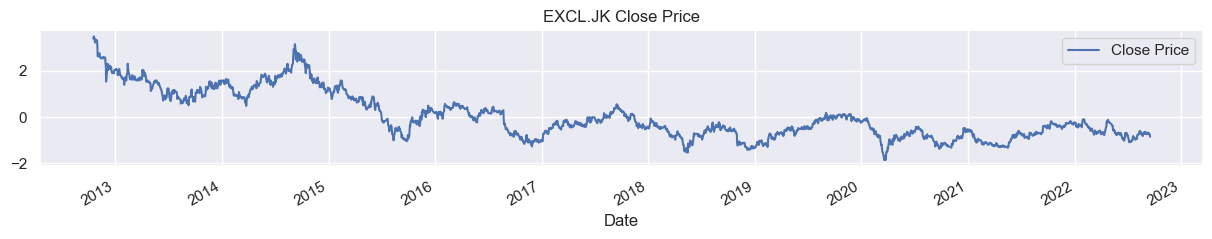

In [3]:
df['Close'].plot(figsize=(15,2))
plt.legend(['Close Price'])
plt.title('EXCL.JK Close Price')

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

print("The best hyperparameters are ",search.best_params_)

[0]	validation_0-rmse:1.05740
[1]	validation_0-rmse:1.04740
[2]	validation_0-rmse:1.03750
[3]	validation_0-rmse:1.02770
[4]	validation_0-rmse:1.01800
[5]	validation_0-rmse:1.00841
[6]	validation_0-rmse:0.99890
[7]	validation_0-rmse:0.98947
[8]	validation_0-rmse:0.98016
[9]	validation_0-rmse:0.97093
[10]	validation_0-rmse:0.96180
[11]	validation_0-rmse:0.95274
[12]	validation_0-rmse:0.94380
[13]	validation_0-rmse:0.93492
[14]	validation_0-rmse:0.92613
[15]	validation_0-rmse:0.91743
[16]	validation_0-rmse:0.90882
[17]	validation_0-rmse:0.90030
[18]	validation_0-rmse:0.89187
[19]	validation_0-rmse:0.88352
[20]	validation_0-rmse:0.87525
[21]	validation_0-rmse:0.86705
[22]	validation_0-rmse:0.85893
[23]	validation_0-rmse:0.85092
[24]	validation_0-rmse:0.84301
[25]	validation_0-rmse:0.83516
[26]	validation_0-rmse:0.82735
[27]	validation_0-rmse:0.81965
[28]	validation_0-rmse:0.81200
[29]	validation_0-rmse:0.80440
[30]	validation_0-rmse:0.79694
[31]	validation_0-rmse:0.78956
[32]	validation_0-

[259]	validation_0-rmse:0.17714
[260]	validation_0-rmse:0.17674
[261]	validation_0-rmse:0.17637
[262]	validation_0-rmse:0.17598
[263]	validation_0-rmse:0.17564
[264]	validation_0-rmse:0.17526
[265]	validation_0-rmse:0.17492
[266]	validation_0-rmse:0.17456
[267]	validation_0-rmse:0.17418
[268]	validation_0-rmse:0.17383
[269]	validation_0-rmse:0.17347
[270]	validation_0-rmse:0.17311
[271]	validation_0-rmse:0.17280
[272]	validation_0-rmse:0.17246
[273]	validation_0-rmse:0.17213
[274]	validation_0-rmse:0.17181
[275]	validation_0-rmse:0.17148
[276]	validation_0-rmse:0.17117
[277]	validation_0-rmse:0.17085
[278]	validation_0-rmse:0.17060
[279]	validation_0-rmse:0.17031
[280]	validation_0-rmse:0.17001
[281]	validation_0-rmse:0.16972
[282]	validation_0-rmse:0.16942
[283]	validation_0-rmse:0.16915
[284]	validation_0-rmse:0.16886
[285]	validation_0-rmse:0.16861
[286]	validation_0-rmse:0.16834
[287]	validation_0-rmse:0.16808
[288]	validation_0-rmse:0.16782
[289]	validation_0-rmse:0.16758
[290]	va

[16]	validation_0-rmse:0.90784
[17]	validation_0-rmse:0.89932
[18]	validation_0-rmse:0.89077
[19]	validation_0-rmse:0.88231
[20]	validation_0-rmse:0.87399
[21]	validation_0-rmse:0.86572
[22]	validation_0-rmse:0.85761
[23]	validation_0-rmse:0.84951
[24]	validation_0-rmse:0.84152
[25]	validation_0-rmse:0.83364
[26]	validation_0-rmse:0.82576
[27]	validation_0-rmse:0.81798
[28]	validation_0-rmse:0.81026
[29]	validation_0-rmse:0.80264
[30]	validation_0-rmse:0.79518
[31]	validation_0-rmse:0.78779
[32]	validation_0-rmse:0.78047
[33]	validation_0-rmse:0.77315
[34]	validation_0-rmse:0.76589
[35]	validation_0-rmse:0.75881
[36]	validation_0-rmse:0.75178
[37]	validation_0-rmse:0.74479
[38]	validation_0-rmse:0.73790
[39]	validation_0-rmse:0.73101
[40]	validation_0-rmse:0.72423
[41]	validation_0-rmse:0.71754
[42]	validation_0-rmse:0.71095
[43]	validation_0-rmse:0.70435
[44]	validation_0-rmse:0.69787
[45]	validation_0-rmse:0.69145
[46]	validation_0-rmse:0.68504
[47]	validation_0-rmse:0.67867
[48]	val

[275]	validation_0-rmse:0.16012
[276]	validation_0-rmse:0.15971
[277]	validation_0-rmse:0.15932
[278]	validation_0-rmse:0.15899
[279]	validation_0-rmse:0.15861
[280]	validation_0-rmse:0.15829
[281]	validation_0-rmse:0.15796
[282]	validation_0-rmse:0.15760
[283]	validation_0-rmse:0.15724
[284]	validation_0-rmse:0.15690
[285]	validation_0-rmse:0.15661
[286]	validation_0-rmse:0.15632
[287]	validation_0-rmse:0.15602
[288]	validation_0-rmse:0.15570
[289]	validation_0-rmse:0.15542
[290]	validation_0-rmse:0.15509
[291]	validation_0-rmse:0.15479
[292]	validation_0-rmse:0.15457
[293]	validation_0-rmse:0.15426
[294]	validation_0-rmse:0.15397
[295]	validation_0-rmse:0.15370
[296]	validation_0-rmse:0.15340
[297]	validation_0-rmse:0.15312
[298]	validation_0-rmse:0.15284
[299]	validation_0-rmse:0.15259
[300]	validation_0-rmse:0.15240
[301]	validation_0-rmse:0.15217
[302]	validation_0-rmse:0.15191
[303]	validation_0-rmse:0.15173
[304]	validation_0-rmse:0.15151
[305]	validation_0-rmse:0.15127
[306]	va

[32]	validation_0-rmse:0.77736
[33]	validation_0-rmse:0.77002
[34]	validation_0-rmse:0.76271
[35]	validation_0-rmse:0.75551
[36]	validation_0-rmse:0.74839
[37]	validation_0-rmse:0.74133
[38]	validation_0-rmse:0.73434
[39]	validation_0-rmse:0.72740
[40]	validation_0-rmse:0.72056
[41]	validation_0-rmse:0.71377
[42]	validation_0-rmse:0.70708
[43]	validation_0-rmse:0.70045
[44]	validation_0-rmse:0.69388
[45]	validation_0-rmse:0.68739
[46]	validation_0-rmse:0.68095
[47]	validation_0-rmse:0.67459
[48]	validation_0-rmse:0.66829
[49]	validation_0-rmse:0.66205
[50]	validation_0-rmse:0.65588
[51]	validation_0-rmse:0.64976
[52]	validation_0-rmse:0.64371
[53]	validation_0-rmse:0.63773
[54]	validation_0-rmse:0.63178
[55]	validation_0-rmse:0.62591
[56]	validation_0-rmse:0.62010
[57]	validation_0-rmse:0.61437
[58]	validation_0-rmse:0.60869
[59]	validation_0-rmse:0.60304
[60]	validation_0-rmse:0.59748
[61]	validation_0-rmse:0.59196
[62]	validation_0-rmse:0.58650
[63]	validation_0-rmse:0.58110
[64]	val

[291]	validation_0-rmse:0.14787
[292]	validation_0-rmse:0.14760
[293]	validation_0-rmse:0.14733
[294]	validation_0-rmse:0.14706
[295]	validation_0-rmse:0.14678
[296]	validation_0-rmse:0.14652
[297]	validation_0-rmse:0.14626
[298]	validation_0-rmse:0.14601
[299]	validation_0-rmse:0.14573
[300]	validation_0-rmse:0.14549
[301]	validation_0-rmse:0.14526
[302]	validation_0-rmse:0.14500
[303]	validation_0-rmse:0.14475
[304]	validation_0-rmse:0.14452
[305]	validation_0-rmse:0.14429
[306]	validation_0-rmse:0.14406
[307]	validation_0-rmse:0.14385
[308]	validation_0-rmse:0.14363
[309]	validation_0-rmse:0.14341
[310]	validation_0-rmse:0.14319
[311]	validation_0-rmse:0.14298
[312]	validation_0-rmse:0.14278
[313]	validation_0-rmse:0.14257
[314]	validation_0-rmse:0.14236
[315]	validation_0-rmse:0.14217
[316]	validation_0-rmse:0.14197
[317]	validation_0-rmse:0.14177
[318]	validation_0-rmse:0.14158
[319]	validation_0-rmse:0.14141
[320]	validation_0-rmse:0.14122
[321]	validation_0-rmse:0.14103
[322]	va

[49]	validation_0-rmse:0.67065
[50]	validation_0-rmse:0.66458
[51]	validation_0-rmse:0.65855
[52]	validation_0-rmse:0.65261
[53]	validation_0-rmse:0.64671
[54]	validation_0-rmse:0.64092
[55]	validation_0-rmse:0.63513
[56]	validation_0-rmse:0.62949
[57]	validation_0-rmse:0.62375
[58]	validation_0-rmse:0.61818
[59]	validation_0-rmse:0.61264
[60]	validation_0-rmse:0.60710
[61]	validation_0-rmse:0.60167
[62]	validation_0-rmse:0.59624
[63]	validation_0-rmse:0.59093
[64]	validation_0-rmse:0.58561
[65]	validation_0-rmse:0.58040
[66]	validation_0-rmse:0.57518
[67]	validation_0-rmse:0.57008
[68]	validation_0-rmse:0.56498
[69]	validation_0-rmse:0.55999
[70]	validation_0-rmse:0.55497
[71]	validation_0-rmse:0.55012
[72]	validation_0-rmse:0.54528
[73]	validation_0-rmse:0.54049
[74]	validation_0-rmse:0.53567
[75]	validation_0-rmse:0.53097
[76]	validation_0-rmse:0.52637
[77]	validation_0-rmse:0.52171
[78]	validation_0-rmse:0.51720
[79]	validation_0-rmse:0.51269
[80]	validation_0-rmse:0.50816
[81]	val

[307]	validation_0-rmse:0.14907
[308]	validation_0-rmse:0.14884
[309]	validation_0-rmse:0.14855
[310]	validation_0-rmse:0.14834
[311]	validation_0-rmse:0.14811
[312]	validation_0-rmse:0.14789
[313]	validation_0-rmse:0.14768
[314]	validation_0-rmse:0.14738
[315]	validation_0-rmse:0.14717
[316]	validation_0-rmse:0.14698
[317]	validation_0-rmse:0.14677
[318]	validation_0-rmse:0.14653
[319]	validation_0-rmse:0.14633
[320]	validation_0-rmse:0.14609
[321]	validation_0-rmse:0.14588
[322]	validation_0-rmse:0.14570
[323]	validation_0-rmse:0.14545
[324]	validation_0-rmse:0.14522
[325]	validation_0-rmse:0.14504
[326]	validation_0-rmse:0.14483
[327]	validation_0-rmse:0.14460
[328]	validation_0-rmse:0.14439
[329]	validation_0-rmse:0.14418
[330]	validation_0-rmse:0.14402
[331]	validation_0-rmse:0.14385
[332]	validation_0-rmse:0.14365
[333]	validation_0-rmse:0.14348
[334]	validation_0-rmse:0.14327
[335]	validation_0-rmse:0.14311
[336]	validation_0-rmse:0.14296
[337]	validation_0-rmse:0.14280
[338]	va

[66]	validation_0-rmse:0.56801
[67]	validation_0-rmse:0.56285
[68]	validation_0-rmse:0.55774
[69]	validation_0-rmse:0.55271
[70]	validation_0-rmse:0.54772
[71]	validation_0-rmse:0.54278
[72]	validation_0-rmse:0.53789
[73]	validation_0-rmse:0.53306
[74]	validation_0-rmse:0.52827
[75]	validation_0-rmse:0.52354
[76]	validation_0-rmse:0.51885
[77]	validation_0-rmse:0.51421
[78]	validation_0-rmse:0.50963
[79]	validation_0-rmse:0.50508
[80]	validation_0-rmse:0.50059
[81]	validation_0-rmse:0.49613
[82]	validation_0-rmse:0.49173
[83]	validation_0-rmse:0.48737
[84]	validation_0-rmse:0.48306
[85]	validation_0-rmse:0.47880
[86]	validation_0-rmse:0.47456
[87]	validation_0-rmse:0.47039
[88]	validation_0-rmse:0.46624
[89]	validation_0-rmse:0.46213
[90]	validation_0-rmse:0.45808
[91]	validation_0-rmse:0.45407
[92]	validation_0-rmse:0.45009
[93]	validation_0-rmse:0.44617
[94]	validation_0-rmse:0.44228
[95]	validation_0-rmse:0.43843
[96]	validation_0-rmse:0.43463
[97]	validation_0-rmse:0.43086
[98]	val

[324]	validation_0-rmse:0.14262
[325]	validation_0-rmse:0.14244
[326]	validation_0-rmse:0.14225
[327]	validation_0-rmse:0.14209
[328]	validation_0-rmse:0.14192
[329]	validation_0-rmse:0.14174
[330]	validation_0-rmse:0.14158
[331]	validation_0-rmse:0.14139
[332]	validation_0-rmse:0.14122
[333]	validation_0-rmse:0.14106
[334]	validation_0-rmse:0.14088
[335]	validation_0-rmse:0.14072
[336]	validation_0-rmse:0.14057
[337]	validation_0-rmse:0.14042
[338]	validation_0-rmse:0.14024
[339]	validation_0-rmse:0.14008
[340]	validation_0-rmse:0.13991
[341]	validation_0-rmse:0.13974
[342]	validation_0-rmse:0.13958
[343]	validation_0-rmse:0.13944
[344]	validation_0-rmse:0.13928
[345]	validation_0-rmse:0.13913
[346]	validation_0-rmse:0.13900
[347]	validation_0-rmse:0.13883
[348]	validation_0-rmse:0.13868
[349]	validation_0-rmse:0.13855
[350]	validation_0-rmse:0.13841
[351]	validation_0-rmse:0.13827
[352]	validation_0-rmse:0.13812
[353]	validation_0-rmse:0.13798
[354]	validation_0-rmse:0.13785
[355]	va

[83]	validation_0-rmse:0.49239
[84]	validation_0-rmse:0.48810
[85]	validation_0-rmse:0.48385
[86]	validation_0-rmse:0.47967
[87]	validation_0-rmse:0.47549
[88]	validation_0-rmse:0.47136
[89]	validation_0-rmse:0.46731
[90]	validation_0-rmse:0.46325
[91]	validation_0-rmse:0.45929
[92]	validation_0-rmse:0.45538
[93]	validation_0-rmse:0.45148
[94]	validation_0-rmse:0.44762
[95]	validation_0-rmse:0.44383
[96]	validation_0-rmse:0.44003
[97]	validation_0-rmse:0.43630
[98]	validation_0-rmse:0.43259
[99]	validation_0-rmse:0.42897
[100]	validation_0-rmse:0.42535
[101]	validation_0-rmse:0.42179
[102]	validation_0-rmse:0.41825
[103]	validation_0-rmse:0.41474
[104]	validation_0-rmse:0.41128
[105]	validation_0-rmse:0.40790
[106]	validation_0-rmse:0.40450
[107]	validation_0-rmse:0.40116
[108]	validation_0-rmse:0.39785
[109]	validation_0-rmse:0.39461
[110]	validation_0-rmse:0.39135
[111]	validation_0-rmse:0.38813
[112]	validation_0-rmse:0.38498
[113]	validation_0-rmse:0.38184
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.15849
[341]	validation_0-rmse:0.15835
[342]	validation_0-rmse:0.15824
[343]	validation_0-rmse:0.15807
[344]	validation_0-rmse:0.15797
[345]	validation_0-rmse:0.15780
[346]	validation_0-rmse:0.15770
[347]	validation_0-rmse:0.15754
[348]	validation_0-rmse:0.15741
[349]	validation_0-rmse:0.15731
[350]	validation_0-rmse:0.15715
[351]	validation_0-rmse:0.15707
[352]	validation_0-rmse:0.15692
[353]	validation_0-rmse:0.15681
[354]	validation_0-rmse:0.15673
[355]	validation_0-rmse:0.15658
[356]	validation_0-rmse:0.15643
[357]	validation_0-rmse:0.15633
[358]	validation_0-rmse:0.15624
[359]	validation_0-rmse:0.15610
[360]	validation_0-rmse:0.15600
[361]	validation_0-rmse:0.15590
[362]	validation_0-rmse:0.15581
[363]	validation_0-rmse:0.15572
[364]	validation_0-rmse:0.15565
[365]	validation_0-rmse:0.15551
[366]	validation_0-rmse:0.15544
[367]	validation_0-rmse:0.15536
[368]	validation_0-rmse:0.15522
[369]	validation_0-rmse:0.15516
[370]	validation_0-rmse:0.15507
[371]	va

[597]	validation_0-rmse:0.14513
[598]	validation_0-rmse:0.14510
[599]	validation_0-rmse:0.14506
[0]	validation_0-rmse:1.05732
[1]	validation_0-rmse:1.04723
[2]	validation_0-rmse:1.03725
[3]	validation_0-rmse:1.02737
[4]	validation_0-rmse:1.01764
[5]	validation_0-rmse:1.00796
[6]	validation_0-rmse:0.99843
[7]	validation_0-rmse:0.98896
[8]	validation_0-rmse:0.97961
[9]	validation_0-rmse:0.97030
[10]	validation_0-rmse:0.96106
[11]	validation_0-rmse:0.95200
[12]	validation_0-rmse:0.94291
[13]	validation_0-rmse:0.93399
[14]	validation_0-rmse:0.92521
[15]	validation_0-rmse:0.91645
[16]	validation_0-rmse:0.90784
[17]	validation_0-rmse:0.89932
[18]	validation_0-rmse:0.89077
[19]	validation_0-rmse:0.88231
[20]	validation_0-rmse:0.87399
[21]	validation_0-rmse:0.86572
[22]	validation_0-rmse:0.85761
[23]	validation_0-rmse:0.84951
[24]	validation_0-rmse:0.84152
[25]	validation_0-rmse:0.83364
[26]	validation_0-rmse:0.82576
[27]	validation_0-rmse:0.81798
[28]	validation_0-rmse:0.81026
[29]	validation

[257]	validation_0-rmse:0.16805
[258]	validation_0-rmse:0.16760
[259]	validation_0-rmse:0.16713
[260]	validation_0-rmse:0.16661
[261]	validation_0-rmse:0.16609
[262]	validation_0-rmse:0.16566
[263]	validation_0-rmse:0.16516
[264]	validation_0-rmse:0.16466
[265]	validation_0-rmse:0.16425
[266]	validation_0-rmse:0.16385
[267]	validation_0-rmse:0.16337
[268]	validation_0-rmse:0.16290
[269]	validation_0-rmse:0.16251
[270]	validation_0-rmse:0.16206
[271]	validation_0-rmse:0.16168
[272]	validation_0-rmse:0.16125
[273]	validation_0-rmse:0.16089
[274]	validation_0-rmse:0.16053
[275]	validation_0-rmse:0.16012
[276]	validation_0-rmse:0.15971
[277]	validation_0-rmse:0.15932
[278]	validation_0-rmse:0.15899
[279]	validation_0-rmse:0.15861
[280]	validation_0-rmse:0.15829
[281]	validation_0-rmse:0.15796
[282]	validation_0-rmse:0.15760
[283]	validation_0-rmse:0.15724
[284]	validation_0-rmse:0.15690
[285]	validation_0-rmse:0.15661
[286]	validation_0-rmse:0.15632
[287]	validation_0-rmse:0.15602
[288]	va

[514]	validation_0-rmse:0.13381
[515]	validation_0-rmse:0.13377
[516]	validation_0-rmse:0.13373
[517]	validation_0-rmse:0.13370
[518]	validation_0-rmse:0.13366
[519]	validation_0-rmse:0.13362
[520]	validation_0-rmse:0.13358
[521]	validation_0-rmse:0.13356
[522]	validation_0-rmse:0.13354
[523]	validation_0-rmse:0.13350
[524]	validation_0-rmse:0.13345
[525]	validation_0-rmse:0.13342
[526]	validation_0-rmse:0.13339
[527]	validation_0-rmse:0.13336
[528]	validation_0-rmse:0.13331
[529]	validation_0-rmse:0.13328
[530]	validation_0-rmse:0.13326
[531]	validation_0-rmse:0.13323
[532]	validation_0-rmse:0.13321
[533]	validation_0-rmse:0.13318
[534]	validation_0-rmse:0.13316
[535]	validation_0-rmse:0.13314
[536]	validation_0-rmse:0.13310
[537]	validation_0-rmse:0.13308
[538]	validation_0-rmse:0.13306
[539]	validation_0-rmse:0.13303
[540]	validation_0-rmse:0.13302
[541]	validation_0-rmse:0.13300
[542]	validation_0-rmse:0.13296
[543]	validation_0-rmse:0.13294
[544]	validation_0-rmse:0.13292
[545]	va

[174]	validation_0-rmse:0.23492
[175]	validation_0-rmse:0.23341
[176]	validation_0-rmse:0.23193
[177]	validation_0-rmse:0.23046
[178]	validation_0-rmse:0.22901
[179]	validation_0-rmse:0.22757
[180]	validation_0-rmse:0.22616
[181]	validation_0-rmse:0.22477
[182]	validation_0-rmse:0.22340
[183]	validation_0-rmse:0.22202
[184]	validation_0-rmse:0.22068
[185]	validation_0-rmse:0.21936
[186]	validation_0-rmse:0.21805
[187]	validation_0-rmse:0.21675
[188]	validation_0-rmse:0.21548
[189]	validation_0-rmse:0.21423
[190]	validation_0-rmse:0.21299
[191]	validation_0-rmse:0.21177
[192]	validation_0-rmse:0.21056
[193]	validation_0-rmse:0.20938
[194]	validation_0-rmse:0.20820
[195]	validation_0-rmse:0.20705
[196]	validation_0-rmse:0.20591
[197]	validation_0-rmse:0.20479
[198]	validation_0-rmse:0.20368
[199]	validation_0-rmse:0.20260
[200]	validation_0-rmse:0.20152
[201]	validation_0-rmse:0.20045
[202]	validation_0-rmse:0.19941
[203]	validation_0-rmse:0.19837
[204]	validation_0-rmse:0.19735
[205]	va

[431]	validation_0-rmse:0.12957
[432]	validation_0-rmse:0.12952
[433]	validation_0-rmse:0.12947
[434]	validation_0-rmse:0.12942
[435]	validation_0-rmse:0.12935
[436]	validation_0-rmse:0.12930
[437]	validation_0-rmse:0.12925
[438]	validation_0-rmse:0.12921
[439]	validation_0-rmse:0.12914
[440]	validation_0-rmse:0.12909
[441]	validation_0-rmse:0.12903
[442]	validation_0-rmse:0.12899
[443]	validation_0-rmse:0.12893
[444]	validation_0-rmse:0.12887
[445]	validation_0-rmse:0.12882
[446]	validation_0-rmse:0.12877
[447]	validation_0-rmse:0.12871
[448]	validation_0-rmse:0.12866
[449]	validation_0-rmse:0.12862
[450]	validation_0-rmse:0.12857
[451]	validation_0-rmse:0.12851
[452]	validation_0-rmse:0.12843
[453]	validation_0-rmse:0.12839
[454]	validation_0-rmse:0.12834
[455]	validation_0-rmse:0.12827
[456]	validation_0-rmse:0.12821
[457]	validation_0-rmse:0.12814
[458]	validation_0-rmse:0.12808
[459]	validation_0-rmse:0.12804
[460]	validation_0-rmse:0.12799
[461]	validation_0-rmse:0.12793
[462]	va

[91]	validation_0-rmse:0.46157
[92]	validation_0-rmse:0.45757
[93]	validation_0-rmse:0.45361
[94]	validation_0-rmse:0.44973
[95]	validation_0-rmse:0.44586
[96]	validation_0-rmse:0.44203
[97]	validation_0-rmse:0.43822
[98]	validation_0-rmse:0.43446
[99]	validation_0-rmse:0.43081
[100]	validation_0-rmse:0.42715
[101]	validation_0-rmse:0.42355
[102]	validation_0-rmse:0.41995
[103]	validation_0-rmse:0.41638
[104]	validation_0-rmse:0.41285
[105]	validation_0-rmse:0.40944
[106]	validation_0-rmse:0.40599
[107]	validation_0-rmse:0.40257
[108]	validation_0-rmse:0.39927
[109]	validation_0-rmse:0.39593
[110]	validation_0-rmse:0.39262
[111]	validation_0-rmse:0.38937
[112]	validation_0-rmse:0.38620
[113]	validation_0-rmse:0.38306
[114]	validation_0-rmse:0.37995
[115]	validation_0-rmse:0.37688
[116]	validation_0-rmse:0.37385
[117]	validation_0-rmse:0.37079
[118]	validation_0-rmse:0.36776
[119]	validation_0-rmse:0.36482
[120]	validation_0-rmse:0.36184
[121]	validation_0-rmse:0.35890
[122]	validation_

[348]	validation_0-rmse:0.14095
[349]	validation_0-rmse:0.14077
[350]	validation_0-rmse:0.14064
[351]	validation_0-rmse:0.14046
[352]	validation_0-rmse:0.14033
[353]	validation_0-rmse:0.14016
[354]	validation_0-rmse:0.14000
[355]	validation_0-rmse:0.13988
[356]	validation_0-rmse:0.13971
[357]	validation_0-rmse:0.13959
[358]	validation_0-rmse:0.13944
[359]	validation_0-rmse:0.13929
[360]	validation_0-rmse:0.13918
[361]	validation_0-rmse:0.13904
[362]	validation_0-rmse:0.13888
[363]	validation_0-rmse:0.13876
[364]	validation_0-rmse:0.13864
[365]	validation_0-rmse:0.13851
[366]	validation_0-rmse:0.13836
[367]	validation_0-rmse:0.13826
[368]	validation_0-rmse:0.13813
[369]	validation_0-rmse:0.13802
[370]	validation_0-rmse:0.13788
[371]	validation_0-rmse:0.13776
[372]	validation_0-rmse:0.13766
[373]	validation_0-rmse:0.13752
[374]	validation_0-rmse:0.13738
[375]	validation_0-rmse:0.13728
[376]	validation_0-rmse:0.13717
[377]	validation_0-rmse:0.13705
[378]	validation_0-rmse:0.13694
[379]	va

[5]	validation_0-rmse:1.00763
[6]	validation_0-rmse:0.99800
[7]	validation_0-rmse:0.98847
[8]	validation_0-rmse:0.97899
[9]	validation_0-rmse:0.96960
[10]	validation_0-rmse:0.96038
[11]	validation_0-rmse:0.95117
[12]	validation_0-rmse:0.94214
[13]	validation_0-rmse:0.93312
[14]	validation_0-rmse:0.92428
[15]	validation_0-rmse:0.91551
[16]	validation_0-rmse:0.90677
[17]	validation_0-rmse:0.89816
[18]	validation_0-rmse:0.88959
[19]	validation_0-rmse:0.88111
[20]	validation_0-rmse:0.87278
[21]	validation_0-rmse:0.86451
[22]	validation_0-rmse:0.85633
[23]	validation_0-rmse:0.84826
[24]	validation_0-rmse:0.84025
[25]	validation_0-rmse:0.83232
[26]	validation_0-rmse:0.82447
[27]	validation_0-rmse:0.81667
[28]	validation_0-rmse:0.80893
[29]	validation_0-rmse:0.80132
[30]	validation_0-rmse:0.79379
[31]	validation_0-rmse:0.78634
[32]	validation_0-rmse:0.77893
[33]	validation_0-rmse:0.77158
[34]	validation_0-rmse:0.76436
[35]	validation_0-rmse:0.75720
[36]	validation_0-rmse:0.75014
[37]	validati

[264]	validation_0-rmse:0.15969
[265]	validation_0-rmse:0.15929
[266]	validation_0-rmse:0.15887
[267]	validation_0-rmse:0.15845
[268]	validation_0-rmse:0.15807
[269]	validation_0-rmse:0.15766
[270]	validation_0-rmse:0.15727
[271]	validation_0-rmse:0.15690
[272]	validation_0-rmse:0.15653
[273]	validation_0-rmse:0.15615
[274]	validation_0-rmse:0.15577
[275]	validation_0-rmse:0.15541
[276]	validation_0-rmse:0.15504
[277]	validation_0-rmse:0.15471
[278]	validation_0-rmse:0.15437
[279]	validation_0-rmse:0.15403
[280]	validation_0-rmse:0.15368
[281]	validation_0-rmse:0.15334
[282]	validation_0-rmse:0.15303
[283]	validation_0-rmse:0.15272
[284]	validation_0-rmse:0.15242
[285]	validation_0-rmse:0.15210
[286]	validation_0-rmse:0.15177
[287]	validation_0-rmse:0.15147
[288]	validation_0-rmse:0.15115
[289]	validation_0-rmse:0.15085
[290]	validation_0-rmse:0.15055
[291]	validation_0-rmse:0.15027
[292]	validation_0-rmse:0.14999
[293]	validation_0-rmse:0.14970
[294]	validation_0-rmse:0.14942
[295]	va

[521]	validation_0-rmse:0.12635
[522]	validation_0-rmse:0.12630
[523]	validation_0-rmse:0.12626
[524]	validation_0-rmse:0.12620
[525]	validation_0-rmse:0.12617
[526]	validation_0-rmse:0.12612
[527]	validation_0-rmse:0.12610
[528]	validation_0-rmse:0.12605
[529]	validation_0-rmse:0.12602
[530]	validation_0-rmse:0.12598
[531]	validation_0-rmse:0.12595
[532]	validation_0-rmse:0.12590
[533]	validation_0-rmse:0.12586
[534]	validation_0-rmse:0.12583
[535]	validation_0-rmse:0.12580
[536]	validation_0-rmse:0.12576
[537]	validation_0-rmse:0.12572
[538]	validation_0-rmse:0.12569
[539]	validation_0-rmse:0.12564
[540]	validation_0-rmse:0.12561
[541]	validation_0-rmse:0.12557
[542]	validation_0-rmse:0.12554
[543]	validation_0-rmse:0.12552
[544]	validation_0-rmse:0.12547
[545]	validation_0-rmse:0.12543
[546]	validation_0-rmse:0.12541
[547]	validation_0-rmse:0.12537
[548]	validation_0-rmse:0.12535
[549]	validation_0-rmse:0.12530
[550]	validation_0-rmse:0.12527
[551]	validation_0-rmse:0.12524
[552]	va

[181]	validation_0-rmse:0.23764
[182]	validation_0-rmse:0.23630
[183]	validation_0-rmse:0.23507
[184]	validation_0-rmse:0.23378
[185]	validation_0-rmse:0.23256
[186]	validation_0-rmse:0.23129
[187]	validation_0-rmse:0.23013
[188]	validation_0-rmse:0.22889
[189]	validation_0-rmse:0.22777
[190]	validation_0-rmse:0.22657
[191]	validation_0-rmse:0.22545
[192]	validation_0-rmse:0.22427
[193]	validation_0-rmse:0.22321
[194]	validation_0-rmse:0.22216
[195]	validation_0-rmse:0.22103
[196]	validation_0-rmse:0.22000
[197]	validation_0-rmse:0.21900
[198]	validation_0-rmse:0.21788
[199]	validation_0-rmse:0.21690
[200]	validation_0-rmse:0.21585
[201]	validation_0-rmse:0.21482
[202]	validation_0-rmse:0.21390
[203]	validation_0-rmse:0.21297
[204]	validation_0-rmse:0.21198
[205]	validation_0-rmse:0.21105
[206]	validation_0-rmse:0.21017
[207]	validation_0-rmse:0.20921
[208]	validation_0-rmse:0.20837
[209]	validation_0-rmse:0.20745
[210]	validation_0-rmse:0.20661
[211]	validation_0-rmse:0.20576
[212]	va

[438]	validation_0-rmse:0.15035
[439]	validation_0-rmse:0.15026
[440]	validation_0-rmse:0.15020
[441]	validation_0-rmse:0.15013
[442]	validation_0-rmse:0.15007
[443]	validation_0-rmse:0.15001
[444]	validation_0-rmse:0.14995
[445]	validation_0-rmse:0.14988
[446]	validation_0-rmse:0.14983
[447]	validation_0-rmse:0.14977
[448]	validation_0-rmse:0.14970
[449]	validation_0-rmse:0.14965
[450]	validation_0-rmse:0.14961
[451]	validation_0-rmse:0.14958
[452]	validation_0-rmse:0.14949
[453]	validation_0-rmse:0.14946
[454]	validation_0-rmse:0.14941
[455]	validation_0-rmse:0.14938
[456]	validation_0-rmse:0.14932
[457]	validation_0-rmse:0.14929
[458]	validation_0-rmse:0.14922
[459]	validation_0-rmse:0.14917
[460]	validation_0-rmse:0.14914
[461]	validation_0-rmse:0.14912
[462]	validation_0-rmse:0.14907
[463]	validation_0-rmse:0.14904
[464]	validation_0-rmse:0.14896
[465]	validation_0-rmse:0.14892
[466]	validation_0-rmse:0.14889
[467]	validation_0-rmse:0.14884
[468]	validation_0-rmse:0.14881
[469]	va

[695]	validation_0-rmse:0.14292
[696]	validation_0-rmse:0.14289
[697]	validation_0-rmse:0.14287
[698]	validation_0-rmse:0.14285
[699]	validation_0-rmse:0.14284
[0]	validation_0-rmse:1.05732
[1]	validation_0-rmse:1.04723
[2]	validation_0-rmse:1.03725
[3]	validation_0-rmse:1.02737
[4]	validation_0-rmse:1.01764
[5]	validation_0-rmse:1.00796
[6]	validation_0-rmse:0.99843
[7]	validation_0-rmse:0.98896
[8]	validation_0-rmse:0.97961
[9]	validation_0-rmse:0.97030
[10]	validation_0-rmse:0.96106
[11]	validation_0-rmse:0.95200
[12]	validation_0-rmse:0.94291
[13]	validation_0-rmse:0.93399
[14]	validation_0-rmse:0.92521
[15]	validation_0-rmse:0.91645
[16]	validation_0-rmse:0.90784
[17]	validation_0-rmse:0.89932
[18]	validation_0-rmse:0.89077
[19]	validation_0-rmse:0.88231
[20]	validation_0-rmse:0.87399
[21]	validation_0-rmse:0.86572
[22]	validation_0-rmse:0.85761
[23]	validation_0-rmse:0.84951
[24]	validation_0-rmse:0.84152
[25]	validation_0-rmse:0.83364
[26]	validation_0-rmse:0.82576
[27]	validati

[255]	validation_0-rmse:0.16907
[256]	validation_0-rmse:0.16860
[257]	validation_0-rmse:0.16805
[258]	validation_0-rmse:0.16760
[259]	validation_0-rmse:0.16713
[260]	validation_0-rmse:0.16661
[261]	validation_0-rmse:0.16609
[262]	validation_0-rmse:0.16566
[263]	validation_0-rmse:0.16516
[264]	validation_0-rmse:0.16466
[265]	validation_0-rmse:0.16425
[266]	validation_0-rmse:0.16385
[267]	validation_0-rmse:0.16337
[268]	validation_0-rmse:0.16290
[269]	validation_0-rmse:0.16251
[270]	validation_0-rmse:0.16206
[271]	validation_0-rmse:0.16168
[272]	validation_0-rmse:0.16125
[273]	validation_0-rmse:0.16089
[274]	validation_0-rmse:0.16053
[275]	validation_0-rmse:0.16012
[276]	validation_0-rmse:0.15971
[277]	validation_0-rmse:0.15932
[278]	validation_0-rmse:0.15899
[279]	validation_0-rmse:0.15861
[280]	validation_0-rmse:0.15829
[281]	validation_0-rmse:0.15796
[282]	validation_0-rmse:0.15760
[283]	validation_0-rmse:0.15724
[284]	validation_0-rmse:0.15690
[285]	validation_0-rmse:0.15661
[286]	va

[512]	validation_0-rmse:0.13386
[513]	validation_0-rmse:0.13383
[514]	validation_0-rmse:0.13381
[515]	validation_0-rmse:0.13377
[516]	validation_0-rmse:0.13373
[517]	validation_0-rmse:0.13370
[518]	validation_0-rmse:0.13366
[519]	validation_0-rmse:0.13362
[520]	validation_0-rmse:0.13358
[521]	validation_0-rmse:0.13356
[522]	validation_0-rmse:0.13354
[523]	validation_0-rmse:0.13350
[524]	validation_0-rmse:0.13345
[525]	validation_0-rmse:0.13342
[526]	validation_0-rmse:0.13339
[527]	validation_0-rmse:0.13336
[528]	validation_0-rmse:0.13331
[529]	validation_0-rmse:0.13328
[530]	validation_0-rmse:0.13326
[531]	validation_0-rmse:0.13323
[532]	validation_0-rmse:0.13321
[533]	validation_0-rmse:0.13318
[534]	validation_0-rmse:0.13316
[535]	validation_0-rmse:0.13314
[536]	validation_0-rmse:0.13310
[537]	validation_0-rmse:0.13308
[538]	validation_0-rmse:0.13306
[539]	validation_0-rmse:0.13303
[540]	validation_0-rmse:0.13302
[541]	validation_0-rmse:0.13300
[542]	validation_0-rmse:0.13296
[543]	va

[71]	validation_0-rmse:0.53988
[72]	validation_0-rmse:0.53496
[73]	validation_0-rmse:0.53010
[74]	validation_0-rmse:0.52529
[75]	validation_0-rmse:0.52052
[76]	validation_0-rmse:0.51582
[77]	validation_0-rmse:0.51114
[78]	validation_0-rmse:0.50652
[79]	validation_0-rmse:0.50194
[80]	validation_0-rmse:0.49741
[81]	validation_0-rmse:0.49293
[82]	validation_0-rmse:0.48851
[83]	validation_0-rmse:0.48412
[84]	validation_0-rmse:0.47978
[85]	validation_0-rmse:0.47548
[86]	validation_0-rmse:0.47125
[87]	validation_0-rmse:0.46706
[88]	validation_0-rmse:0.46292
[89]	validation_0-rmse:0.45883
[90]	validation_0-rmse:0.45477
[91]	validation_0-rmse:0.45075
[92]	validation_0-rmse:0.44677
[93]	validation_0-rmse:0.44282
[94]	validation_0-rmse:0.43893
[95]	validation_0-rmse:0.43507
[96]	validation_0-rmse:0.43127
[97]	validation_0-rmse:0.42750
[98]	validation_0-rmse:0.42378
[99]	validation_0-rmse:0.42009
[100]	validation_0-rmse:0.41644
[101]	validation_0-rmse:0.41285
[102]	validation_0-rmse:0.40928
[103]

[328]	validation_0-rmse:0.13982
[329]	validation_0-rmse:0.13967
[330]	validation_0-rmse:0.13951
[331]	validation_0-rmse:0.13935
[332]	validation_0-rmse:0.13919
[333]	validation_0-rmse:0.13904
[334]	validation_0-rmse:0.13888
[335]	validation_0-rmse:0.13874
[336]	validation_0-rmse:0.13858
[337]	validation_0-rmse:0.13843
[338]	validation_0-rmse:0.13829
[339]	validation_0-rmse:0.13814
[340]	validation_0-rmse:0.13798
[341]	validation_0-rmse:0.13784
[342]	validation_0-rmse:0.13767
[343]	validation_0-rmse:0.13753
[344]	validation_0-rmse:0.13741
[345]	validation_0-rmse:0.13725
[346]	validation_0-rmse:0.13713
[347]	validation_0-rmse:0.13697
[348]	validation_0-rmse:0.13685
[349]	validation_0-rmse:0.13670
[350]	validation_0-rmse:0.13658
[351]	validation_0-rmse:0.13643
[352]	validation_0-rmse:0.13630
[353]	validation_0-rmse:0.13616
[354]	validation_0-rmse:0.13605
[355]	validation_0-rmse:0.13590
[356]	validation_0-rmse:0.13577
[357]	validation_0-rmse:0.13566
[358]	validation_0-rmse:0.13555
[359]	va

[585]	validation_0-rmse:0.12297
[586]	validation_0-rmse:0.12294
[587]	validation_0-rmse:0.12292
[588]	validation_0-rmse:0.12291
[589]	validation_0-rmse:0.12287
[590]	validation_0-rmse:0.12285
[591]	validation_0-rmse:0.12282
[592]	validation_0-rmse:0.12280
[593]	validation_0-rmse:0.12277
[594]	validation_0-rmse:0.12276
[595]	validation_0-rmse:0.12273
[596]	validation_0-rmse:0.12272
[597]	validation_0-rmse:0.12270
[598]	validation_0-rmse:0.12265
[599]	validation_0-rmse:0.12263
[600]	validation_0-rmse:0.12261
[601]	validation_0-rmse:0.12258
[602]	validation_0-rmse:0.12256
[603]	validation_0-rmse:0.12253
[604]	validation_0-rmse:0.12250
[605]	validation_0-rmse:0.12248
[606]	validation_0-rmse:0.12245
[607]	validation_0-rmse:0.12241
[608]	validation_0-rmse:0.12239
[609]	validation_0-rmse:0.12238
[610]	validation_0-rmse:0.12236
[611]	validation_0-rmse:0.12232
[612]	validation_0-rmse:0.12231
[613]	validation_0-rmse:0.12226
[614]	validation_0-rmse:0.12223
[615]	validation_0-rmse:0.12221
[616]	va

[145]	validation_0-rmse:0.29804
[146]	validation_0-rmse:0.29584
[147]	validation_0-rmse:0.29365
[148]	validation_0-rmse:0.29151
[149]	validation_0-rmse:0.28939
[150]	validation_0-rmse:0.28729
[151]	validation_0-rmse:0.28523
[152]	validation_0-rmse:0.28318
[153]	validation_0-rmse:0.28116
[154]	validation_0-rmse:0.27915
[155]	validation_0-rmse:0.27718
[156]	validation_0-rmse:0.27526
[157]	validation_0-rmse:0.27329
[158]	validation_0-rmse:0.27139
[159]	validation_0-rmse:0.26954
[160]	validation_0-rmse:0.26771
[161]	validation_0-rmse:0.26590
[162]	validation_0-rmse:0.26408
[163]	validation_0-rmse:0.26228
[164]	validation_0-rmse:0.26057
[165]	validation_0-rmse:0.25878
[166]	validation_0-rmse:0.25705
[167]	validation_0-rmse:0.25533
[168]	validation_0-rmse:0.25370
[169]	validation_0-rmse:0.25202
[170]	validation_0-rmse:0.25043
[171]	validation_0-rmse:0.24882
[172]	validation_0-rmse:0.24726
[173]	validation_0-rmse:0.24564
[174]	validation_0-rmse:0.24408
[175]	validation_0-rmse:0.24258
[176]	va

[402]	validation_0-rmse:0.13455
[403]	validation_0-rmse:0.13445
[404]	validation_0-rmse:0.13437
[405]	validation_0-rmse:0.13428
[406]	validation_0-rmse:0.13420
[407]	validation_0-rmse:0.13410
[408]	validation_0-rmse:0.13400
[409]	validation_0-rmse:0.13390
[410]	validation_0-rmse:0.13382
[411]	validation_0-rmse:0.13375
[412]	validation_0-rmse:0.13368
[413]	validation_0-rmse:0.13359
[414]	validation_0-rmse:0.13349
[415]	validation_0-rmse:0.13339
[416]	validation_0-rmse:0.13330
[417]	validation_0-rmse:0.13323
[418]	validation_0-rmse:0.13314
[419]	validation_0-rmse:0.13306
[420]	validation_0-rmse:0.13297
[421]	validation_0-rmse:0.13288
[422]	validation_0-rmse:0.13278
[423]	validation_0-rmse:0.13268
[424]	validation_0-rmse:0.13258
[425]	validation_0-rmse:0.13251
[426]	validation_0-rmse:0.13241
[427]	validation_0-rmse:0.13233
[428]	validation_0-rmse:0.13223
[429]	validation_0-rmse:0.13216
[430]	validation_0-rmse:0.13208
[431]	validation_0-rmse:0.13200
[432]	validation_0-rmse:0.13190
[433]	va

[659]	validation_0-rmse:0.12180
[660]	validation_0-rmse:0.12177
[661]	validation_0-rmse:0.12176
[662]	validation_0-rmse:0.12173
[663]	validation_0-rmse:0.12170
[664]	validation_0-rmse:0.12168
[665]	validation_0-rmse:0.12164
[666]	validation_0-rmse:0.12161
[667]	validation_0-rmse:0.12159
[668]	validation_0-rmse:0.12158
[669]	validation_0-rmse:0.12156
[670]	validation_0-rmse:0.12152
[671]	validation_0-rmse:0.12148
[672]	validation_0-rmse:0.12146
[673]	validation_0-rmse:0.12143
[674]	validation_0-rmse:0.12140
[675]	validation_0-rmse:0.12139
[676]	validation_0-rmse:0.12136
[677]	validation_0-rmse:0.12135
[678]	validation_0-rmse:0.12133
[679]	validation_0-rmse:0.12131
[680]	validation_0-rmse:0.12129
[681]	validation_0-rmse:0.12127
[682]	validation_0-rmse:0.12125
[683]	validation_0-rmse:0.12124
[684]	validation_0-rmse:0.12122
[685]	validation_0-rmse:0.12119
[686]	validation_0-rmse:0.12117
[687]	validation_0-rmse:0.12116
[688]	validation_0-rmse:0.12114
[689]	validation_0-rmse:0.12113
[690]	va

[219]	validation_0-rmse:0.18658
[220]	validation_0-rmse:0.18579
[221]	validation_0-rmse:0.18497
[222]	validation_0-rmse:0.18420
[223]	validation_0-rmse:0.18341
[224]	validation_0-rmse:0.18266
[225]	validation_0-rmse:0.18192
[226]	validation_0-rmse:0.18120
[227]	validation_0-rmse:0.18045
[228]	validation_0-rmse:0.17972
[229]	validation_0-rmse:0.17900
[230]	validation_0-rmse:0.17829
[231]	validation_0-rmse:0.17762
[232]	validation_0-rmse:0.17693
[233]	validation_0-rmse:0.17626
[234]	validation_0-rmse:0.17560
[235]	validation_0-rmse:0.17497
[236]	validation_0-rmse:0.17431
[237]	validation_0-rmse:0.17368
[238]	validation_0-rmse:0.17304
[239]	validation_0-rmse:0.17244
[240]	validation_0-rmse:0.17185
[241]	validation_0-rmse:0.17123
[242]	validation_0-rmse:0.17066
[243]	validation_0-rmse:0.17007
[244]	validation_0-rmse:0.16951
[245]	validation_0-rmse:0.16893
[246]	validation_0-rmse:0.16838
[247]	validation_0-rmse:0.16782
[248]	validation_0-rmse:0.16727
[249]	validation_0-rmse:0.16675
[250]	va

[476]	validation_0-rmse:0.12834
[477]	validation_0-rmse:0.12830
[478]	validation_0-rmse:0.12825
[479]	validation_0-rmse:0.12820
[480]	validation_0-rmse:0.12814
[481]	validation_0-rmse:0.12810
[482]	validation_0-rmse:0.12805
[483]	validation_0-rmse:0.12799
[484]	validation_0-rmse:0.12794
[485]	validation_0-rmse:0.12790
[486]	validation_0-rmse:0.12784
[487]	validation_0-rmse:0.12778
[488]	validation_0-rmse:0.12773
[489]	validation_0-rmse:0.12768
[490]	validation_0-rmse:0.12763
[491]	validation_0-rmse:0.12761
[492]	validation_0-rmse:0.12756
[493]	validation_0-rmse:0.12753
[494]	validation_0-rmse:0.12747
[495]	validation_0-rmse:0.12743
[496]	validation_0-rmse:0.12739
[497]	validation_0-rmse:0.12735
[498]	validation_0-rmse:0.12730
[499]	validation_0-rmse:0.12726
[500]	validation_0-rmse:0.12722
[501]	validation_0-rmse:0.12716
[502]	validation_0-rmse:0.12711
[503]	validation_0-rmse:0.12707
[504]	validation_0-rmse:0.12701
[505]	validation_0-rmse:0.12698
[506]	validation_0-rmse:0.12694
[507]	va

[34]	validation_0-rmse:0.76771
[35]	validation_0-rmse:0.76056
[36]	validation_0-rmse:0.75354
[37]	validation_0-rmse:0.74657
[38]	validation_0-rmse:0.73964
[39]	validation_0-rmse:0.73282
[40]	validation_0-rmse:0.72608
[41]	validation_0-rmse:0.71935
[42]	validation_0-rmse:0.71273
[43]	validation_0-rmse:0.70619
[44]	validation_0-rmse:0.69967
[45]	validation_0-rmse:0.69327
[46]	validation_0-rmse:0.68689
[47]	validation_0-rmse:0.68058
[48]	validation_0-rmse:0.67436
[49]	validation_0-rmse:0.66821
[50]	validation_0-rmse:0.66214
[51]	validation_0-rmse:0.65607
[52]	validation_0-rmse:0.65010
[53]	validation_0-rmse:0.64420
[54]	validation_0-rmse:0.63833
[55]	validation_0-rmse:0.63257
[56]	validation_0-rmse:0.62682
[57]	validation_0-rmse:0.62113
[58]	validation_0-rmse:0.61549
[59]	validation_0-rmse:0.60992
[60]	validation_0-rmse:0.60445
[61]	validation_0-rmse:0.59898
[62]	validation_0-rmse:0.59359
[63]	validation_0-rmse:0.58825
[64]	validation_0-rmse:0.58297
[65]	validation_0-rmse:0.57774
[66]	val

[293]	validation_0-rmse:0.16662
[294]	validation_0-rmse:0.16638
[295]	validation_0-rmse:0.16615
[296]	validation_0-rmse:0.16594
[297]	validation_0-rmse:0.16575
[298]	validation_0-rmse:0.16555
[299]	validation_0-rmse:0.16531
[300]	validation_0-rmse:0.16510
[301]	validation_0-rmse:0.16486
[302]	validation_0-rmse:0.16465
[303]	validation_0-rmse:0.16445
[304]	validation_0-rmse:0.16428
[305]	validation_0-rmse:0.16407
[306]	validation_0-rmse:0.16386
[307]	validation_0-rmse:0.16367
[308]	validation_0-rmse:0.16349
[309]	validation_0-rmse:0.16334
[310]	validation_0-rmse:0.16312
[311]	validation_0-rmse:0.16295
[312]	validation_0-rmse:0.16277
[313]	validation_0-rmse:0.16260
[314]	validation_0-rmse:0.16242
[315]	validation_0-rmse:0.16222
[316]	validation_0-rmse:0.16208
[317]	validation_0-rmse:0.16190
[318]	validation_0-rmse:0.16175
[319]	validation_0-rmse:0.16160
[320]	validation_0-rmse:0.16143
[321]	validation_0-rmse:0.16130
[322]	validation_0-rmse:0.16112
[323]	validation_0-rmse:0.16097
[324]	va

[550]	validation_0-rmse:0.14656
[551]	validation_0-rmse:0.14652
[552]	validation_0-rmse:0.14651
[553]	validation_0-rmse:0.14647
[554]	validation_0-rmse:0.14645
[555]	validation_0-rmse:0.14641
[556]	validation_0-rmse:0.14636
[557]	validation_0-rmse:0.14630
[558]	validation_0-rmse:0.14627
[559]	validation_0-rmse:0.14624
[560]	validation_0-rmse:0.14619
[561]	validation_0-rmse:0.14617
[562]	validation_0-rmse:0.14613
[563]	validation_0-rmse:0.14607
[564]	validation_0-rmse:0.14605
[565]	validation_0-rmse:0.14602
[566]	validation_0-rmse:0.14597
[567]	validation_0-rmse:0.14594
[568]	validation_0-rmse:0.14589
[569]	validation_0-rmse:0.14587
[570]	validation_0-rmse:0.14586
[571]	validation_0-rmse:0.14584
[572]	validation_0-rmse:0.14582
[573]	validation_0-rmse:0.14581
[574]	validation_0-rmse:0.14577
[575]	validation_0-rmse:0.14573
[576]	validation_0-rmse:0.14571
[577]	validation_0-rmse:0.14569
[578]	validation_0-rmse:0.14565
[579]	validation_0-rmse:0.14563
[580]	validation_0-rmse:0.14561
[581]	va

[807]	validation_0-rmse:0.14105
[808]	validation_0-rmse:0.14101
[809]	validation_0-rmse:0.14101
[810]	validation_0-rmse:0.14099
[811]	validation_0-rmse:0.14099
[812]	validation_0-rmse:0.14096
[813]	validation_0-rmse:0.14093
[814]	validation_0-rmse:0.14091
[815]	validation_0-rmse:0.14090
[816]	validation_0-rmse:0.14090
[817]	validation_0-rmse:0.14089
[818]	validation_0-rmse:0.14088
[819]	validation_0-rmse:0.14083
[820]	validation_0-rmse:0.14080
[821]	validation_0-rmse:0.14079
[822]	validation_0-rmse:0.14077
[823]	validation_0-rmse:0.14076
[824]	validation_0-rmse:0.14073
[825]	validation_0-rmse:0.14073
[826]	validation_0-rmse:0.14071
[827]	validation_0-rmse:0.14070
[828]	validation_0-rmse:0.14068
[829]	validation_0-rmse:0.14064
[830]	validation_0-rmse:0.14063
[831]	validation_0-rmse:0.14063
[832]	validation_0-rmse:0.14060
[833]	validation_0-rmse:0.14060
[834]	validation_0-rmse:0.14060
[835]	validation_0-rmse:0.14058
[836]	validation_0-rmse:0.14055
[837]	validation_0-rmse:0.14055
[838]	va

[66]	validation_0-rmse:0.57043
[67]	validation_0-rmse:0.56526
[68]	validation_0-rmse:0.56015
[69]	validation_0-rmse:0.55515
[70]	validation_0-rmse:0.55016
[71]	validation_0-rmse:0.54520
[72]	validation_0-rmse:0.54035
[73]	validation_0-rmse:0.53551
[74]	validation_0-rmse:0.53071
[75]	validation_0-rmse:0.52602
[76]	validation_0-rmse:0.52135
[77]	validation_0-rmse:0.51675
[78]	validation_0-rmse:0.51221
[79]	validation_0-rmse:0.50773
[80]	validation_0-rmse:0.50327
[81]	validation_0-rmse:0.49889
[82]	validation_0-rmse:0.49454
[83]	validation_0-rmse:0.49022
[84]	validation_0-rmse:0.48591
[85]	validation_0-rmse:0.48171
[86]	validation_0-rmse:0.47756
[87]	validation_0-rmse:0.47339
[88]	validation_0-rmse:0.46926
[89]	validation_0-rmse:0.46521
[90]	validation_0-rmse:0.46116
[91]	validation_0-rmse:0.45716
[92]	validation_0-rmse:0.45326
[93]	validation_0-rmse:0.44934
[94]	validation_0-rmse:0.44547
[95]	validation_0-rmse:0.44171
[96]	validation_0-rmse:0.43798
[97]	validation_0-rmse:0.43430
[98]	val

[324]	validation_0-rmse:0.14773
[325]	validation_0-rmse:0.14755
[326]	validation_0-rmse:0.14740
[327]	validation_0-rmse:0.14728
[328]	validation_0-rmse:0.14716
[329]	validation_0-rmse:0.14702
[330]	validation_0-rmse:0.14684
[331]	validation_0-rmse:0.14667
[332]	validation_0-rmse:0.14647
[333]	validation_0-rmse:0.14634
[334]	validation_0-rmse:0.14623
[335]	validation_0-rmse:0.14610
[336]	validation_0-rmse:0.14599
[337]	validation_0-rmse:0.14587
[338]	validation_0-rmse:0.14576
[339]	validation_0-rmse:0.14564
[340]	validation_0-rmse:0.14552
[341]	validation_0-rmse:0.14533
[342]	validation_0-rmse:0.14522
[343]	validation_0-rmse:0.14511
[344]	validation_0-rmse:0.14500
[345]	validation_0-rmse:0.14490
[346]	validation_0-rmse:0.14481
[347]	validation_0-rmse:0.14468
[348]	validation_0-rmse:0.14453
[349]	validation_0-rmse:0.14444
[350]	validation_0-rmse:0.14433
[351]	validation_0-rmse:0.14423
[352]	validation_0-rmse:0.14413
[353]	validation_0-rmse:0.14403
[354]	validation_0-rmse:0.14393
[355]	va

[581]	validation_0-rmse:0.13208
[582]	validation_0-rmse:0.13206
[583]	validation_0-rmse:0.13203
[584]	validation_0-rmse:0.13201
[585]	validation_0-rmse:0.13200
[586]	validation_0-rmse:0.13198
[587]	validation_0-rmse:0.13196
[588]	validation_0-rmse:0.13195
[589]	validation_0-rmse:0.13194
[590]	validation_0-rmse:0.13192
[591]	validation_0-rmse:0.13189
[592]	validation_0-rmse:0.13187
[593]	validation_0-rmse:0.13186
[594]	validation_0-rmse:0.13184
[595]	validation_0-rmse:0.13183
[596]	validation_0-rmse:0.13180
[597]	validation_0-rmse:0.13179
[598]	validation_0-rmse:0.13178
[599]	validation_0-rmse:0.13175
[600]	validation_0-rmse:0.13172
[601]	validation_0-rmse:0.13171
[602]	validation_0-rmse:0.13170
[603]	validation_0-rmse:0.13168
[604]	validation_0-rmse:0.13166
[605]	validation_0-rmse:0.13165
[606]	validation_0-rmse:0.13164
[607]	validation_0-rmse:0.13161
[608]	validation_0-rmse:0.13159
[609]	validation_0-rmse:0.13158
[610]	validation_0-rmse:0.13156
[611]	validation_0-rmse:0.13156
[612]	va

[838]	validation_0-rmse:0.12861
[839]	validation_0-rmse:0.12859
[840]	validation_0-rmse:0.12855
[841]	validation_0-rmse:0.12854
[842]	validation_0-rmse:0.12851
[843]	validation_0-rmse:0.12847
[844]	validation_0-rmse:0.12846
[845]	validation_0-rmse:0.12845
[846]	validation_0-rmse:0.12843
[847]	validation_0-rmse:0.12840
[848]	validation_0-rmse:0.12837
[849]	validation_0-rmse:0.12835
[850]	validation_0-rmse:0.12834
[851]	validation_0-rmse:0.12833
[852]	validation_0-rmse:0.12829
[853]	validation_0-rmse:0.12827
[854]	validation_0-rmse:0.12826
[855]	validation_0-rmse:0.12823
[856]	validation_0-rmse:0.12821
[857]	validation_0-rmse:0.12818
[858]	validation_0-rmse:0.12817
[859]	validation_0-rmse:0.12815
[860]	validation_0-rmse:0.12814
[861]	validation_0-rmse:0.12811
[862]	validation_0-rmse:0.12808
[863]	validation_0-rmse:0.12807
[864]	validation_0-rmse:0.12804
[865]	validation_0-rmse:0.12801
[866]	validation_0-rmse:0.12800
[867]	validation_0-rmse:0.12799
[868]	validation_0-rmse:0.12798
[869]	va

[98]	validation_0-rmse:0.42378
[99]	validation_0-rmse:0.42009
[100]	validation_0-rmse:0.41644
[101]	validation_0-rmse:0.41285
[102]	validation_0-rmse:0.40928
[103]	validation_0-rmse:0.40577
[104]	validation_0-rmse:0.40227
[105]	validation_0-rmse:0.39882
[106]	validation_0-rmse:0.39539
[107]	validation_0-rmse:0.39201
[108]	validation_0-rmse:0.38868
[109]	validation_0-rmse:0.38537
[110]	validation_0-rmse:0.38212
[111]	validation_0-rmse:0.37889
[112]	validation_0-rmse:0.37569
[113]	validation_0-rmse:0.37252
[114]	validation_0-rmse:0.36940
[115]	validation_0-rmse:0.36631
[116]	validation_0-rmse:0.36324
[117]	validation_0-rmse:0.36022
[118]	validation_0-rmse:0.35724
[119]	validation_0-rmse:0.35428
[120]	validation_0-rmse:0.35135
[121]	validation_0-rmse:0.34846
[122]	validation_0-rmse:0.34558
[123]	validation_0-rmse:0.34274
[124]	validation_0-rmse:0.33995
[125]	validation_0-rmse:0.33717
[126]	validation_0-rmse:0.33445
[127]	validation_0-rmse:0.33175
[128]	validation_0-rmse:0.32907
[129]	vali

[355]	validation_0-rmse:0.13590
[356]	validation_0-rmse:0.13577
[357]	validation_0-rmse:0.13566
[358]	validation_0-rmse:0.13555
[359]	validation_0-rmse:0.13541
[360]	validation_0-rmse:0.13529
[361]	validation_0-rmse:0.13518
[362]	validation_0-rmse:0.13506
[363]	validation_0-rmse:0.13495
[364]	validation_0-rmse:0.13483
[365]	validation_0-rmse:0.13471
[366]	validation_0-rmse:0.13462
[367]	validation_0-rmse:0.13451
[368]	validation_0-rmse:0.13441
[369]	validation_0-rmse:0.13429
[370]	validation_0-rmse:0.13419
[371]	validation_0-rmse:0.13408
[372]	validation_0-rmse:0.13398
[373]	validation_0-rmse:0.13387
[374]	validation_0-rmse:0.13378
[375]	validation_0-rmse:0.13367
[376]	validation_0-rmse:0.13357
[377]	validation_0-rmse:0.13347
[378]	validation_0-rmse:0.13338
[379]	validation_0-rmse:0.13328
[380]	validation_0-rmse:0.13319
[381]	validation_0-rmse:0.13309
[382]	validation_0-rmse:0.13300
[383]	validation_0-rmse:0.13290
[384]	validation_0-rmse:0.13281
[385]	validation_0-rmse:0.13272
[386]	va

[612]	validation_0-rmse:0.12231
[613]	validation_0-rmse:0.12226
[614]	validation_0-rmse:0.12223
[615]	validation_0-rmse:0.12221
[616]	validation_0-rmse:0.12218
[617]	validation_0-rmse:0.12216
[618]	validation_0-rmse:0.12214
[619]	validation_0-rmse:0.12211
[620]	validation_0-rmse:0.12209
[621]	validation_0-rmse:0.12207
[622]	validation_0-rmse:0.12206
[623]	validation_0-rmse:0.12203
[624]	validation_0-rmse:0.12201
[625]	validation_0-rmse:0.12199
[626]	validation_0-rmse:0.12196
[627]	validation_0-rmse:0.12195
[628]	validation_0-rmse:0.12190
[629]	validation_0-rmse:0.12188
[630]	validation_0-rmse:0.12186
[631]	validation_0-rmse:0.12183
[632]	validation_0-rmse:0.12181
[633]	validation_0-rmse:0.12180
[634]	validation_0-rmse:0.12179
[635]	validation_0-rmse:0.12175
[636]	validation_0-rmse:0.12173
[637]	validation_0-rmse:0.12171
[638]	validation_0-rmse:0.12169
[639]	validation_0-rmse:0.12167
[640]	validation_0-rmse:0.12165
[641]	validation_0-rmse:0.12163
[642]	validation_0-rmse:0.12160
[643]	va

[869]	validation_0-rmse:0.11629
[870]	validation_0-rmse:0.11625
[871]	validation_0-rmse:0.11623
[872]	validation_0-rmse:0.11621
[873]	validation_0-rmse:0.11620
[874]	validation_0-rmse:0.11618
[875]	validation_0-rmse:0.11618
[876]	validation_0-rmse:0.11615
[877]	validation_0-rmse:0.11612
[878]	validation_0-rmse:0.11608
[879]	validation_0-rmse:0.11607
[880]	validation_0-rmse:0.11605
[881]	validation_0-rmse:0.11602
[882]	validation_0-rmse:0.11601
[883]	validation_0-rmse:0.11598
[884]	validation_0-rmse:0.11597
[885]	validation_0-rmse:0.11595
[886]	validation_0-rmse:0.11594
[887]	validation_0-rmse:0.11592
[888]	validation_0-rmse:0.11591
[889]	validation_0-rmse:0.11589
[890]	validation_0-rmse:0.11588
[891]	validation_0-rmse:0.11585
[892]	validation_0-rmse:0.11583
[893]	validation_0-rmse:0.11581
[894]	validation_0-rmse:0.11580
[895]	validation_0-rmse:0.11579
[896]	validation_0-rmse:0.11577
[897]	validation_0-rmse:0.11576
[898]	validation_0-rmse:0.11574
[899]	validation_0-rmse:0.11573
[900]	va

[129]	validation_0-rmse:0.33682
[130]	validation_0-rmse:0.33419
[131]	validation_0-rmse:0.33157
[132]	validation_0-rmse:0.32899
[133]	validation_0-rmse:0.32648
[134]	validation_0-rmse:0.32395
[135]	validation_0-rmse:0.32146
[136]	validation_0-rmse:0.31900
[137]	validation_0-rmse:0.31657
[138]	validation_0-rmse:0.31420
[139]	validation_0-rmse:0.31177
[140]	validation_0-rmse:0.30942
[141]	validation_0-rmse:0.30708
[142]	validation_0-rmse:0.30479
[143]	validation_0-rmse:0.30253
[144]	validation_0-rmse:0.30029
[145]	validation_0-rmse:0.29804
[146]	validation_0-rmse:0.29584
[147]	validation_0-rmse:0.29365
[148]	validation_0-rmse:0.29151
[149]	validation_0-rmse:0.28939
[150]	validation_0-rmse:0.28729
[151]	validation_0-rmse:0.28523
[152]	validation_0-rmse:0.28318
[153]	validation_0-rmse:0.28116
[154]	validation_0-rmse:0.27915
[155]	validation_0-rmse:0.27718
[156]	validation_0-rmse:0.27526
[157]	validation_0-rmse:0.27329
[158]	validation_0-rmse:0.27139
[159]	validation_0-rmse:0.26954
[160]	va

[386]	validation_0-rmse:0.13607
[387]	validation_0-rmse:0.13599
[388]	validation_0-rmse:0.13588
[389]	validation_0-rmse:0.13578
[390]	validation_0-rmse:0.13569
[391]	validation_0-rmse:0.13557
[392]	validation_0-rmse:0.13547
[393]	validation_0-rmse:0.13537
[394]	validation_0-rmse:0.13527
[395]	validation_0-rmse:0.13517
[396]	validation_0-rmse:0.13509
[397]	validation_0-rmse:0.13500
[398]	validation_0-rmse:0.13492
[399]	validation_0-rmse:0.13482
[400]	validation_0-rmse:0.13473
[401]	validation_0-rmse:0.13464
[402]	validation_0-rmse:0.13455
[403]	validation_0-rmse:0.13445
[404]	validation_0-rmse:0.13437
[405]	validation_0-rmse:0.13428
[406]	validation_0-rmse:0.13420
[407]	validation_0-rmse:0.13410
[408]	validation_0-rmse:0.13400
[409]	validation_0-rmse:0.13390
[410]	validation_0-rmse:0.13382
[411]	validation_0-rmse:0.13375
[412]	validation_0-rmse:0.13368
[413]	validation_0-rmse:0.13359
[414]	validation_0-rmse:0.13349
[415]	validation_0-rmse:0.13339
[416]	validation_0-rmse:0.13330
[417]	va

[642]	validation_0-rmse:0.12224
[643]	validation_0-rmse:0.12221
[644]	validation_0-rmse:0.12217
[645]	validation_0-rmse:0.12214
[646]	validation_0-rmse:0.12212
[647]	validation_0-rmse:0.12209
[648]	validation_0-rmse:0.12207
[649]	validation_0-rmse:0.12205
[650]	validation_0-rmse:0.12203
[651]	validation_0-rmse:0.12199
[652]	validation_0-rmse:0.12196
[653]	validation_0-rmse:0.12195
[654]	validation_0-rmse:0.12191
[655]	validation_0-rmse:0.12189
[656]	validation_0-rmse:0.12187
[657]	validation_0-rmse:0.12185
[658]	validation_0-rmse:0.12181
[659]	validation_0-rmse:0.12180
[660]	validation_0-rmse:0.12177
[661]	validation_0-rmse:0.12176
[662]	validation_0-rmse:0.12173
[663]	validation_0-rmse:0.12170
[664]	validation_0-rmse:0.12168
[665]	validation_0-rmse:0.12164
[666]	validation_0-rmse:0.12161
[667]	validation_0-rmse:0.12159
[668]	validation_0-rmse:0.12158
[669]	validation_0-rmse:0.12156
[670]	validation_0-rmse:0.12152
[671]	validation_0-rmse:0.12148
[672]	validation_0-rmse:0.12146
[673]	va

[899]	validation_0-rmse:0.11770
[900]	validation_0-rmse:0.11767
[901]	validation_0-rmse:0.11768
[902]	validation_0-rmse:0.11767
[903]	validation_0-rmse:0.11765
[904]	validation_0-rmse:0.11763
[905]	validation_0-rmse:0.11761
[906]	validation_0-rmse:0.11759
[907]	validation_0-rmse:0.11757
[908]	validation_0-rmse:0.11757
[909]	validation_0-rmse:0.11758
[910]	validation_0-rmse:0.11756
[911]	validation_0-rmse:0.11754
[912]	validation_0-rmse:0.11751
[913]	validation_0-rmse:0.11748
[914]	validation_0-rmse:0.11748
[915]	validation_0-rmse:0.11746
[916]	validation_0-rmse:0.11746
[917]	validation_0-rmse:0.11746
[918]	validation_0-rmse:0.11746
[919]	validation_0-rmse:0.11746
[920]	validation_0-rmse:0.11744
[921]	validation_0-rmse:0.11743
[922]	validation_0-rmse:0.11740
[923]	validation_0-rmse:0.11738
[924]	validation_0-rmse:0.11738
[925]	validation_0-rmse:0.11736
[926]	validation_0-rmse:0.11735
[927]	validation_0-rmse:0.11735
[928]	validation_0-rmse:0.11733
[929]	validation_0-rmse:0.11733
[930]	va

[159]	validation_0-rmse:0.26336
[160]	validation_0-rmse:0.26154
[161]	validation_0-rmse:0.25975
[162]	validation_0-rmse:0.25796
[163]	validation_0-rmse:0.25622
[164]	validation_0-rmse:0.25448
[165]	validation_0-rmse:0.25275
[166]	validation_0-rmse:0.25104
[167]	validation_0-rmse:0.24938
[168]	validation_0-rmse:0.24771
[169]	validation_0-rmse:0.24610
[170]	validation_0-rmse:0.24449
[171]	validation_0-rmse:0.24288
[172]	validation_0-rmse:0.24131
[173]	validation_0-rmse:0.23975
[174]	validation_0-rmse:0.23823
[175]	validation_0-rmse:0.23671
[176]	validation_0-rmse:0.23520
[177]	validation_0-rmse:0.23372
[178]	validation_0-rmse:0.23225
[179]	validation_0-rmse:0.23083
[180]	validation_0-rmse:0.22940
[181]	validation_0-rmse:0.22799
[182]	validation_0-rmse:0.22661
[183]	validation_0-rmse:0.22523
[184]	validation_0-rmse:0.22388
[185]	validation_0-rmse:0.22257
[186]	validation_0-rmse:0.22125
[187]	validation_0-rmse:0.21996
[188]	validation_0-rmse:0.21867
[189]	validation_0-rmse:0.21741
[190]	va

[416]	validation_0-rmse:0.13203
[417]	validation_0-rmse:0.13195
[418]	validation_0-rmse:0.13189
[419]	validation_0-rmse:0.13181
[420]	validation_0-rmse:0.13176
[421]	validation_0-rmse:0.13169
[422]	validation_0-rmse:0.13161
[423]	validation_0-rmse:0.13156
[424]	validation_0-rmse:0.13148
[425]	validation_0-rmse:0.13143
[426]	validation_0-rmse:0.13137
[427]	validation_0-rmse:0.13129
[428]	validation_0-rmse:0.13125
[429]	validation_0-rmse:0.13118
[430]	validation_0-rmse:0.13110
[431]	validation_0-rmse:0.13106
[432]	validation_0-rmse:0.13099
[433]	validation_0-rmse:0.13095
[434]	validation_0-rmse:0.13087
[435]	validation_0-rmse:0.13083
[436]	validation_0-rmse:0.13076
[437]	validation_0-rmse:0.13071
[438]	validation_0-rmse:0.13065
[439]	validation_0-rmse:0.13060
[440]	validation_0-rmse:0.13053
[441]	validation_0-rmse:0.13046
[442]	validation_0-rmse:0.13038
[443]	validation_0-rmse:0.13035
[444]	validation_0-rmse:0.13028
[445]	validation_0-rmse:0.13021
[446]	validation_0-rmse:0.13013
[447]	va

[673]	validation_0-rmse:0.12196
[674]	validation_0-rmse:0.12193
[675]	validation_0-rmse:0.12191
[676]	validation_0-rmse:0.12189
[677]	validation_0-rmse:0.12187
[678]	validation_0-rmse:0.12185
[679]	validation_0-rmse:0.12182
[680]	validation_0-rmse:0.12179
[681]	validation_0-rmse:0.12176
[682]	validation_0-rmse:0.12174
[683]	validation_0-rmse:0.12172
[684]	validation_0-rmse:0.12169
[685]	validation_0-rmse:0.12168
[686]	validation_0-rmse:0.12166
[687]	validation_0-rmse:0.12164
[688]	validation_0-rmse:0.12162
[689]	validation_0-rmse:0.12160
[690]	validation_0-rmse:0.12158
[691]	validation_0-rmse:0.12156
[692]	validation_0-rmse:0.12154
[693]	validation_0-rmse:0.12152
[694]	validation_0-rmse:0.12150
[695]	validation_0-rmse:0.12148
[696]	validation_0-rmse:0.12146
[697]	validation_0-rmse:0.12142
[698]	validation_0-rmse:0.12140
[699]	validation_0-rmse:0.12138
[700]	validation_0-rmse:0.12136
[701]	validation_0-rmse:0.12134
[702]	validation_0-rmse:0.12132
[703]	validation_0-rmse:0.12130
[704]	va

[930]	validation_0-rmse:0.11730
[931]	validation_0-rmse:0.11729
[932]	validation_0-rmse:0.11727
[933]	validation_0-rmse:0.11726
[934]	validation_0-rmse:0.11725
[935]	validation_0-rmse:0.11724
[936]	validation_0-rmse:0.11723
[937]	validation_0-rmse:0.11721
[938]	validation_0-rmse:0.11720
[939]	validation_0-rmse:0.11716
[940]	validation_0-rmse:0.11716
[941]	validation_0-rmse:0.11715
[942]	validation_0-rmse:0.11713
[943]	validation_0-rmse:0.11711
[944]	validation_0-rmse:0.11710
[945]	validation_0-rmse:0.11709
[946]	validation_0-rmse:0.11708
[947]	validation_0-rmse:0.11707
[948]	validation_0-rmse:0.11706
[949]	validation_0-rmse:0.11705
[950]	validation_0-rmse:0.11704
[951]	validation_0-rmse:0.11703
[952]	validation_0-rmse:0.11703
[953]	validation_0-rmse:0.11702
[954]	validation_0-rmse:0.11702
[955]	validation_0-rmse:0.11699
[956]	validation_0-rmse:0.11699
[957]	validation_0-rmse:0.11696
[958]	validation_0-rmse:0.11696
[959]	validation_0-rmse:0.11695
[960]	validation_0-rmse:0.11693
[961]	va

[190]	validation_0-rmse:0.24026
[191]	validation_0-rmse:0.23911
[192]	validation_0-rmse:0.23801
[193]	validation_0-rmse:0.23689
[194]	validation_0-rmse:0.23582
[195]	validation_0-rmse:0.23474
[196]	validation_0-rmse:0.23370
[197]	validation_0-rmse:0.23260
[198]	validation_0-rmse:0.23160
[199]	validation_0-rmse:0.23054
[200]	validation_0-rmse:0.22954
[201]	validation_0-rmse:0.22856
[202]	validation_0-rmse:0.22760
[203]	validation_0-rmse:0.22667
[204]	validation_0-rmse:0.22573
[205]	validation_0-rmse:0.22482
[206]	validation_0-rmse:0.22385
[207]	validation_0-rmse:0.22297
[208]	validation_0-rmse:0.22206
[209]	validation_0-rmse:0.22120
[210]	validation_0-rmse:0.22031
[211]	validation_0-rmse:0.21940
[212]	validation_0-rmse:0.21857
[213]	validation_0-rmse:0.21772
[214]	validation_0-rmse:0.21692
[215]	validation_0-rmse:0.21606
[216]	validation_0-rmse:0.21527
[217]	validation_0-rmse:0.21449
[218]	validation_0-rmse:0.21370
[219]	validation_0-rmse:0.21295
[220]	validation_0-rmse:0.21221
[221]	va

[447]	validation_0-rmse:0.15862
[448]	validation_0-rmse:0.15858
[449]	validation_0-rmse:0.15850
[450]	validation_0-rmse:0.15846
[451]	validation_0-rmse:0.15841
[452]	validation_0-rmse:0.15835
[453]	validation_0-rmse:0.15828
[454]	validation_0-rmse:0.15822
[455]	validation_0-rmse:0.15817
[456]	validation_0-rmse:0.15811
[457]	validation_0-rmse:0.15808
[458]	validation_0-rmse:0.15804
[459]	validation_0-rmse:0.15798
[460]	validation_0-rmse:0.15791
[461]	validation_0-rmse:0.15787
[462]	validation_0-rmse:0.15781
[463]	validation_0-rmse:0.15775
[464]	validation_0-rmse:0.15770
[465]	validation_0-rmse:0.15766
[466]	validation_0-rmse:0.15759
[467]	validation_0-rmse:0.15752
[468]	validation_0-rmse:0.15745
[469]	validation_0-rmse:0.15740
[470]	validation_0-rmse:0.15732
[471]	validation_0-rmse:0.15727
[472]	validation_0-rmse:0.15722
[473]	validation_0-rmse:0.15714
[474]	validation_0-rmse:0.15711
[475]	validation_0-rmse:0.15707
[476]	validation_0-rmse:0.15703
[477]	validation_0-rmse:0.15696
[478]	va

[207]	validation_0-rmse:0.19270
[208]	validation_0-rmse:0.19177
[209]	validation_0-rmse:0.19085
[210]	validation_0-rmse:0.18993
[211]	validation_0-rmse:0.18903
[212]	validation_0-rmse:0.18815
[213]	validation_0-rmse:0.18728
[214]	validation_0-rmse:0.18642
[215]	validation_0-rmse:0.18557
[216]	validation_0-rmse:0.18477
[217]	validation_0-rmse:0.18395
[218]	validation_0-rmse:0.18315
[219]	validation_0-rmse:0.18237
[220]	validation_0-rmse:0.18159
[221]	validation_0-rmse:0.18083
[222]	validation_0-rmse:0.18009
[223]	validation_0-rmse:0.17934
[224]	validation_0-rmse:0.17861
[225]	validation_0-rmse:0.17790
[226]	validation_0-rmse:0.17721
[227]	validation_0-rmse:0.17652
[228]	validation_0-rmse:0.17583
[229]	validation_0-rmse:0.17515
[230]	validation_0-rmse:0.17446
[231]	validation_0-rmse:0.17381
[232]	validation_0-rmse:0.17314
[233]	validation_0-rmse:0.17251
[234]	validation_0-rmse:0.17186
[235]	validation_0-rmse:0.17125
[236]	validation_0-rmse:0.17062
[237]	validation_0-rmse:0.17002
[238]	va

[464]	validation_0-rmse:0.13100
[465]	validation_0-rmse:0.13095
[466]	validation_0-rmse:0.13088
[467]	validation_0-rmse:0.13084
[468]	validation_0-rmse:0.13079
[469]	validation_0-rmse:0.13072
[470]	validation_0-rmse:0.13067
[471]	validation_0-rmse:0.13061
[472]	validation_0-rmse:0.13058
[473]	validation_0-rmse:0.13053
[474]	validation_0-rmse:0.13049
[475]	validation_0-rmse:0.13045
[476]	validation_0-rmse:0.13039
[477]	validation_0-rmse:0.13035
[478]	validation_0-rmse:0.13032
[479]	validation_0-rmse:0.13026
[480]	validation_0-rmse:0.13022
[481]	validation_0-rmse:0.13018
[482]	validation_0-rmse:0.13014
[483]	validation_0-rmse:0.13009
[484]	validation_0-rmse:0.13006
[485]	validation_0-rmse:0.13002
[486]	validation_0-rmse:0.12997
[487]	validation_0-rmse:0.12994
[488]	validation_0-rmse:0.12990
[489]	validation_0-rmse:0.12985
[490]	validation_0-rmse:0.12981
[491]	validation_0-rmse:0.12978
[492]	validation_0-rmse:0.12973
[493]	validation_0-rmse:0.12969
[494]	validation_0-rmse:0.12965
[495]	va

[224]	validation_0-rmse:0.17148
[225]	validation_0-rmse:0.17068
[226]	validation_0-rmse:0.16990
[227]	validation_0-rmse:0.16912
[228]	validation_0-rmse:0.16835
[229]	validation_0-rmse:0.16762
[230]	validation_0-rmse:0.16688
[231]	validation_0-rmse:0.16615
[232]	validation_0-rmse:0.16542
[233]	validation_0-rmse:0.16473
[234]	validation_0-rmse:0.16405
[235]	validation_0-rmse:0.16336
[236]	validation_0-rmse:0.16268
[237]	validation_0-rmse:0.16201
[238]	validation_0-rmse:0.16134
[239]	validation_0-rmse:0.16069
[240]	validation_0-rmse:0.16006
[241]	validation_0-rmse:0.15943
[242]	validation_0-rmse:0.15882
[243]	validation_0-rmse:0.15822
[244]	validation_0-rmse:0.15761
[245]	validation_0-rmse:0.15702
[246]	validation_0-rmse:0.15643
[247]	validation_0-rmse:0.15584
[248]	validation_0-rmse:0.15528
[249]	validation_0-rmse:0.15473
[250]	validation_0-rmse:0.15416
[251]	validation_0-rmse:0.15361
[252]	validation_0-rmse:0.15309
[253]	validation_0-rmse:0.15256
[254]	validation_0-rmse:0.15204
[255]	va

[481]	validation_0-rmse:0.11398
[482]	validation_0-rmse:0.11394
[483]	validation_0-rmse:0.11388
[484]	validation_0-rmse:0.11385
[485]	validation_0-rmse:0.11380
[486]	validation_0-rmse:0.11374
[487]	validation_0-rmse:0.11369
[488]	validation_0-rmse:0.11364
[489]	validation_0-rmse:0.11360
[490]	validation_0-rmse:0.11357
[491]	validation_0-rmse:0.11351
[492]	validation_0-rmse:0.11348
[493]	validation_0-rmse:0.11344
[494]	validation_0-rmse:0.11340
[495]	validation_0-rmse:0.11337
[496]	validation_0-rmse:0.11332
[497]	validation_0-rmse:0.11330
[498]	validation_0-rmse:0.11326
[499]	validation_0-rmse:0.11322
[0]	validation_0-rmse:1.05725
[1]	validation_0-rmse:1.04710
[2]	validation_0-rmse:1.03707
[3]	validation_0-rmse:1.02713
[4]	validation_0-rmse:1.01728
[5]	validation_0-rmse:1.00754
[6]	validation_0-rmse:0.99790
[7]	validation_0-rmse:0.98835
[8]	validation_0-rmse:0.97887
[9]	validation_0-rmse:0.96949
[10]	validation_0-rmse:0.96020
[11]	validation_0-rmse:0.95102
[12]	validation_0-rmse:0.94192

[240]	validation_0-rmse:0.16768
[241]	validation_0-rmse:0.16700
[242]	validation_0-rmse:0.16636
[243]	validation_0-rmse:0.16573
[244]	validation_0-rmse:0.16507
[245]	validation_0-rmse:0.16442
[246]	validation_0-rmse:0.16380
[247]	validation_0-rmse:0.16320
[248]	validation_0-rmse:0.16265
[249]	validation_0-rmse:0.16202
[250]	validation_0-rmse:0.16144
[251]	validation_0-rmse:0.16084
[252]	validation_0-rmse:0.16027
[253]	validation_0-rmse:0.15970
[254]	validation_0-rmse:0.15912
[255]	validation_0-rmse:0.15857
[256]	validation_0-rmse:0.15808
[257]	validation_0-rmse:0.15755
[258]	validation_0-rmse:0.15700
[259]	validation_0-rmse:0.15653
[260]	validation_0-rmse:0.15601
[261]	validation_0-rmse:0.15549
[262]	validation_0-rmse:0.15500
[263]	validation_0-rmse:0.15450
[264]	validation_0-rmse:0.15401
[265]	validation_0-rmse:0.15348
[266]	validation_0-rmse:0.15305
[267]	validation_0-rmse:0.15257
[268]	validation_0-rmse:0.15211
[269]	validation_0-rmse:0.15163
[270]	validation_0-rmse:0.15117
[271]	va

[497]	validation_0-rmse:0.11470
[498]	validation_0-rmse:0.11464
[499]	validation_0-rmse:0.11458
[0]	validation_0-rmse:1.05718
[1]	validation_0-rmse:1.04697
[2]	validation_0-rmse:1.03687
[3]	validation_0-rmse:1.02686
[4]	validation_0-rmse:1.01696
[5]	validation_0-rmse:1.00714
[6]	validation_0-rmse:0.99744
[7]	validation_0-rmse:0.98782
[8]	validation_0-rmse:0.97831
[9]	validation_0-rmse:0.96889
[10]	validation_0-rmse:0.95956
[11]	validation_0-rmse:0.95033
[12]	validation_0-rmse:0.94119
[13]	validation_0-rmse:0.93215
[14]	validation_0-rmse:0.92319
[15]	validation_0-rmse:0.91433
[16]	validation_0-rmse:0.90556
[17]	validation_0-rmse:0.89687
[18]	validation_0-rmse:0.88828
[19]	validation_0-rmse:0.87978
[20]	validation_0-rmse:0.87136
[21]	validation_0-rmse:0.86300
[22]	validation_0-rmse:0.85475
[23]	validation_0-rmse:0.84658
[24]	validation_0-rmse:0.83850
[25]	validation_0-rmse:0.83049
[26]	validation_0-rmse:0.82256
[27]	validation_0-rmse:0.81472
[28]	validation_0-rmse:0.80696
[29]	validation

[257]	validation_0-rmse:0.15385
[258]	validation_0-rmse:0.15336
[259]	validation_0-rmse:0.15285
[260]	validation_0-rmse:0.15234
[261]	validation_0-rmse:0.15186
[262]	validation_0-rmse:0.15139
[263]	validation_0-rmse:0.15090
[264]	validation_0-rmse:0.15042
[265]	validation_0-rmse:0.14997
[266]	validation_0-rmse:0.14953
[267]	validation_0-rmse:0.14909
[268]	validation_0-rmse:0.14866
[269]	validation_0-rmse:0.14821
[270]	validation_0-rmse:0.14779
[271]	validation_0-rmse:0.14738
[272]	validation_0-rmse:0.14694
[273]	validation_0-rmse:0.14654
[274]	validation_0-rmse:0.14612
[275]	validation_0-rmse:0.14571
[276]	validation_0-rmse:0.14532
[277]	validation_0-rmse:0.14495
[278]	validation_0-rmse:0.14457
[279]	validation_0-rmse:0.14420
[280]	validation_0-rmse:0.14382
[281]	validation_0-rmse:0.14346
[282]	validation_0-rmse:0.14308
[283]	validation_0-rmse:0.14274
[284]	validation_0-rmse:0.14240
[285]	validation_0-rmse:0.14204
[286]	validation_0-rmse:0.14169
[287]	validation_0-rmse:0.14134
[288]	va

[14]	validation_0-rmse:0.92599
[15]	validation_0-rmse:0.91737
[16]	validation_0-rmse:0.90871
[17]	validation_0-rmse:0.90014
[18]	validation_0-rmse:0.89164
[19]	validation_0-rmse:0.88324
[20]	validation_0-rmse:0.87516
[21]	validation_0-rmse:0.86693
[22]	validation_0-rmse:0.85878
[23]	validation_0-rmse:0.85085
[24]	validation_0-rmse:0.84284
[25]	validation_0-rmse:0.83495
[26]	validation_0-rmse:0.82736
[27]	validation_0-rmse:0.81960
[28]	validation_0-rmse:0.81207
[29]	validation_0-rmse:0.80445
[30]	validation_0-rmse:0.79691
[31]	validation_0-rmse:0.78953
[32]	validation_0-rmse:0.78222
[33]	validation_0-rmse:0.77496
[34]	validation_0-rmse:0.76777
[35]	validation_0-rmse:0.76085
[36]	validation_0-rmse:0.75376
[37]	validation_0-rmse:0.74691
[38]	validation_0-rmse:0.74004
[39]	validation_0-rmse:0.73332
[40]	validation_0-rmse:0.72659
[41]	validation_0-rmse:0.72004
[42]	validation_0-rmse:0.71361
[43]	validation_0-rmse:0.70726
[44]	validation_0-rmse:0.70097
[45]	validation_0-rmse:0.69459
[46]	val

[273]	validation_0-rmse:0.18426
[274]	validation_0-rmse:0.18391
[275]	validation_0-rmse:0.18353
[276]	validation_0-rmse:0.18315
[277]	validation_0-rmse:0.18284
[278]	validation_0-rmse:0.18253
[279]	validation_0-rmse:0.18220
[280]	validation_0-rmse:0.18187
[281]	validation_0-rmse:0.18156
[282]	validation_0-rmse:0.18124
[283]	validation_0-rmse:0.18091
[284]	validation_0-rmse:0.18061
[285]	validation_0-rmse:0.18032
[286]	validation_0-rmse:0.18004
[287]	validation_0-rmse:0.17973
[288]	validation_0-rmse:0.17943
[289]	validation_0-rmse:0.17917
[290]	validation_0-rmse:0.17889
[291]	validation_0-rmse:0.17860
[292]	validation_0-rmse:0.17835
[293]	validation_0-rmse:0.17811
[294]	validation_0-rmse:0.17780
[295]	validation_0-rmse:0.17754
[296]	validation_0-rmse:0.17732
[297]	validation_0-rmse:0.17708
[298]	validation_0-rmse:0.17685
[299]	validation_0-rmse:0.17659
[300]	validation_0-rmse:0.17636
[301]	validation_0-rmse:0.17615
[302]	validation_0-rmse:0.17592
[303]	validation_0-rmse:0.17565
[304]	va

[530]	validation_0-rmse:0.15498
[531]	validation_0-rmse:0.15495
[532]	validation_0-rmse:0.15492
[533]	validation_0-rmse:0.15487
[534]	validation_0-rmse:0.15484
[535]	validation_0-rmse:0.15480
[536]	validation_0-rmse:0.15476
[537]	validation_0-rmse:0.15473
[538]	validation_0-rmse:0.15470
[539]	validation_0-rmse:0.15468
[540]	validation_0-rmse:0.15463
[541]	validation_0-rmse:0.15461
[542]	validation_0-rmse:0.15458
[543]	validation_0-rmse:0.15454
[544]	validation_0-rmse:0.15451
[545]	validation_0-rmse:0.15449
[546]	validation_0-rmse:0.15447
[547]	validation_0-rmse:0.15445
[548]	validation_0-rmse:0.15441
[549]	validation_0-rmse:0.15438
[550]	validation_0-rmse:0.15434
[551]	validation_0-rmse:0.15432
[552]	validation_0-rmse:0.15430
[553]	validation_0-rmse:0.15427
[554]	validation_0-rmse:0.15424
[555]	validation_0-rmse:0.15423
[556]	validation_0-rmse:0.15420
[557]	validation_0-rmse:0.15417
[558]	validation_0-rmse:0.15416
[559]	validation_0-rmse:0.15413
[560]	validation_0-rmse:0.15410
[561]	va

[190]	validation_0-rmse:0.21096
[191]	validation_0-rmse:0.20977
[192]	validation_0-rmse:0.20859
[193]	validation_0-rmse:0.20745
[194]	validation_0-rmse:0.20629
[195]	validation_0-rmse:0.20519
[196]	validation_0-rmse:0.20408
[197]	validation_0-rmse:0.20296
[198]	validation_0-rmse:0.20186
[199]	validation_0-rmse:0.20079
[200]	validation_0-rmse:0.19972
[201]	validation_0-rmse:0.19867
[202]	validation_0-rmse:0.19763
[203]	validation_0-rmse:0.19662
[204]	validation_0-rmse:0.19561
[205]	validation_0-rmse:0.19463
[206]	validation_0-rmse:0.19366
[207]	validation_0-rmse:0.19270
[208]	validation_0-rmse:0.19177
[209]	validation_0-rmse:0.19085
[210]	validation_0-rmse:0.18993
[211]	validation_0-rmse:0.18903
[212]	validation_0-rmse:0.18815
[213]	validation_0-rmse:0.18728
[214]	validation_0-rmse:0.18642
[215]	validation_0-rmse:0.18557
[216]	validation_0-rmse:0.18477
[217]	validation_0-rmse:0.18395
[218]	validation_0-rmse:0.18315
[219]	validation_0-rmse:0.18237
[220]	validation_0-rmse:0.18159
[221]	va

[447]	validation_0-rmse:0.13206
[448]	validation_0-rmse:0.13201
[449]	validation_0-rmse:0.13193
[450]	validation_0-rmse:0.13188
[451]	validation_0-rmse:0.13183
[452]	validation_0-rmse:0.13175
[453]	validation_0-rmse:0.13170
[454]	validation_0-rmse:0.13162
[455]	validation_0-rmse:0.13154
[456]	validation_0-rmse:0.13149
[457]	validation_0-rmse:0.13142
[458]	validation_0-rmse:0.13137
[459]	validation_0-rmse:0.13129
[460]	validation_0-rmse:0.13124
[461]	validation_0-rmse:0.13117
[462]	validation_0-rmse:0.13112
[463]	validation_0-rmse:0.13107
[464]	validation_0-rmse:0.13100
[465]	validation_0-rmse:0.13095
[466]	validation_0-rmse:0.13088
[467]	validation_0-rmse:0.13084
[468]	validation_0-rmse:0.13079
[469]	validation_0-rmse:0.13072
[470]	validation_0-rmse:0.13067
[471]	validation_0-rmse:0.13061
[472]	validation_0-rmse:0.13058
[473]	validation_0-rmse:0.13053
[474]	validation_0-rmse:0.13049
[475]	validation_0-rmse:0.13045
[476]	validation_0-rmse:0.13039
[477]	validation_0-rmse:0.13035
[478]	va

[107]	validation_0-rmse:0.38772
[108]	validation_0-rmse:0.38436
[109]	validation_0-rmse:0.38103
[110]	validation_0-rmse:0.37774
[111]	validation_0-rmse:0.37446
[112]	validation_0-rmse:0.37124
[113]	validation_0-rmse:0.36803
[114]	validation_0-rmse:0.36488
[115]	validation_0-rmse:0.36175
[116]	validation_0-rmse:0.35863
[117]	validation_0-rmse:0.35555
[118]	validation_0-rmse:0.35255
[119]	validation_0-rmse:0.34956
[120]	validation_0-rmse:0.34661
[121]	validation_0-rmse:0.34370
[122]	validation_0-rmse:0.34082
[123]	validation_0-rmse:0.33796
[124]	validation_0-rmse:0.33511
[125]	validation_0-rmse:0.33231
[126]	validation_0-rmse:0.32950
[127]	validation_0-rmse:0.32676
[128]	validation_0-rmse:0.32402
[129]	validation_0-rmse:0.32136
[130]	validation_0-rmse:0.31873
[131]	validation_0-rmse:0.31613
[132]	validation_0-rmse:0.31355
[133]	validation_0-rmse:0.31101
[134]	validation_0-rmse:0.30850
[135]	validation_0-rmse:0.30602
[136]	validation_0-rmse:0.30352
[137]	validation_0-rmse:0.30103
[138]	va

[364]	validation_0-rmse:0.12354
[365]	validation_0-rmse:0.12343
[366]	validation_0-rmse:0.12333
[367]	validation_0-rmse:0.12322
[368]	validation_0-rmse:0.12309
[369]	validation_0-rmse:0.12298
[370]	validation_0-rmse:0.12285
[371]	validation_0-rmse:0.12276
[372]	validation_0-rmse:0.12266
[373]	validation_0-rmse:0.12252
[374]	validation_0-rmse:0.12243
[375]	validation_0-rmse:0.12229
[376]	validation_0-rmse:0.12220
[377]	validation_0-rmse:0.12208
[378]	validation_0-rmse:0.12200
[379]	validation_0-rmse:0.12188
[380]	validation_0-rmse:0.12173
[381]	validation_0-rmse:0.12161
[382]	validation_0-rmse:0.12152
[383]	validation_0-rmse:0.12137
[384]	validation_0-rmse:0.12122
[385]	validation_0-rmse:0.12112
[386]	validation_0-rmse:0.12098
[387]	validation_0-rmse:0.12083
[388]	validation_0-rmse:0.12073
[389]	validation_0-rmse:0.12064
[390]	validation_0-rmse:0.12052
[391]	validation_0-rmse:0.12038
[392]	validation_0-rmse:0.12030
[393]	validation_0-rmse:0.12019
[394]	validation_0-rmse:0.12010
[395]	va

[21]	validation_0-rmse:0.86413
[22]	validation_0-rmse:0.85594
[23]	validation_0-rmse:0.84781
[24]	validation_0-rmse:0.83978
[25]	validation_0-rmse:0.83179
[26]	validation_0-rmse:0.82388
[27]	validation_0-rmse:0.81606
[28]	validation_0-rmse:0.80834
[29]	validation_0-rmse:0.80067
[30]	validation_0-rmse:0.79311
[31]	validation_0-rmse:0.78560
[32]	validation_0-rmse:0.77816
[33]	validation_0-rmse:0.77083
[34]	validation_0-rmse:0.76354
[35]	validation_0-rmse:0.75637
[36]	validation_0-rmse:0.74925
[37]	validation_0-rmse:0.74222
[38]	validation_0-rmse:0.73523
[39]	validation_0-rmse:0.72833
[40]	validation_0-rmse:0.72151
[41]	validation_0-rmse:0.71473
[42]	validation_0-rmse:0.70805
[43]	validation_0-rmse:0.70142
[44]	validation_0-rmse:0.69483
[45]	validation_0-rmse:0.68833
[46]	validation_0-rmse:0.68191
[47]	validation_0-rmse:0.67557
[48]	validation_0-rmse:0.66925
[49]	validation_0-rmse:0.66304
[50]	validation_0-rmse:0.65689
[51]	validation_0-rmse:0.65081
[52]	validation_0-rmse:0.64474
[53]	val

[280]	validation_0-rmse:0.14711
[281]	validation_0-rmse:0.14673
[282]	validation_0-rmse:0.14634
[283]	validation_0-rmse:0.14593
[284]	validation_0-rmse:0.14556
[285]	validation_0-rmse:0.14523
[286]	validation_0-rmse:0.14488
[287]	validation_0-rmse:0.14452
[288]	validation_0-rmse:0.14413
[289]	validation_0-rmse:0.14377
[290]	validation_0-rmse:0.14346
[291]	validation_0-rmse:0.14310
[292]	validation_0-rmse:0.14280
[293]	validation_0-rmse:0.14245
[294]	validation_0-rmse:0.14217
[295]	validation_0-rmse:0.14182
[296]	validation_0-rmse:0.14149
[297]	validation_0-rmse:0.14122
[298]	validation_0-rmse:0.14090
[299]	validation_0-rmse:0.14063
[300]	validation_0-rmse:0.14031
[301]	validation_0-rmse:0.14000
[302]	validation_0-rmse:0.13969
[303]	validation_0-rmse:0.13942
[304]	validation_0-rmse:0.13916
[305]	validation_0-rmse:0.13889
[306]	validation_0-rmse:0.13864
[307]	validation_0-rmse:0.13835
[308]	validation_0-rmse:0.13812
[309]	validation_0-rmse:0.13788
[310]	validation_0-rmse:0.13765
[311]	va

[537]	validation_0-rmse:0.11257
[538]	validation_0-rmse:0.11254
[539]	validation_0-rmse:0.11250
[540]	validation_0-rmse:0.11247
[541]	validation_0-rmse:0.11241
[542]	validation_0-rmse:0.11237
[543]	validation_0-rmse:0.11232
[544]	validation_0-rmse:0.11227
[545]	validation_0-rmse:0.11223
[546]	validation_0-rmse:0.11219
[547]	validation_0-rmse:0.11215
[548]	validation_0-rmse:0.11211
[549]	validation_0-rmse:0.11207
[550]	validation_0-rmse:0.11203
[551]	validation_0-rmse:0.11198
[552]	validation_0-rmse:0.11197
[553]	validation_0-rmse:0.11193
[554]	validation_0-rmse:0.11191
[555]	validation_0-rmse:0.11189
[556]	validation_0-rmse:0.11184
[557]	validation_0-rmse:0.11179
[558]	validation_0-rmse:0.11178
[559]	validation_0-rmse:0.11174
[560]	validation_0-rmse:0.11170
[561]	validation_0-rmse:0.11168
[562]	validation_0-rmse:0.11164
[563]	validation_0-rmse:0.11163
[564]	validation_0-rmse:0.11158
[565]	validation_0-rmse:0.11156
[566]	validation_0-rmse:0.11152
[567]	validation_0-rmse:0.11151
[568]	va

[197]	validation_0-rmse:0.20142
[198]	validation_0-rmse:0.20025
[199]	validation_0-rmse:0.19915
[200]	validation_0-rmse:0.19800
[201]	validation_0-rmse:0.19688
[202]	validation_0-rmse:0.19581
[203]	validation_0-rmse:0.19476
[204]	validation_0-rmse:0.19370
[205]	validation_0-rmse:0.19262
[206]	validation_0-rmse:0.19158
[207]	validation_0-rmse:0.19058
[208]	validation_0-rmse:0.18960
[209]	validation_0-rmse:0.18860
[210]	validation_0-rmse:0.18764
[211]	validation_0-rmse:0.18664
[212]	validation_0-rmse:0.18571
[213]	validation_0-rmse:0.18477
[214]	validation_0-rmse:0.18387
[215]	validation_0-rmse:0.18295
[216]	validation_0-rmse:0.18207
[217]	validation_0-rmse:0.18114
[218]	validation_0-rmse:0.18026
[219]	validation_0-rmse:0.17940
[220]	validation_0-rmse:0.17856
[221]	validation_0-rmse:0.17771
[222]	validation_0-rmse:0.17690
[223]	validation_0-rmse:0.17606
[224]	validation_0-rmse:0.17526
[225]	validation_0-rmse:0.17447
[226]	validation_0-rmse:0.17369
[227]	validation_0-rmse:0.17289
[228]	va

[454]	validation_0-rmse:0.11647
[455]	validation_0-rmse:0.11643
[456]	validation_0-rmse:0.11637
[457]	validation_0-rmse:0.11632
[458]	validation_0-rmse:0.11624
[459]	validation_0-rmse:0.11620
[460]	validation_0-rmse:0.11612
[461]	validation_0-rmse:0.11606
[462]	validation_0-rmse:0.11600
[463]	validation_0-rmse:0.11594
[464]	validation_0-rmse:0.11588
[465]	validation_0-rmse:0.11584
[466]	validation_0-rmse:0.11579
[467]	validation_0-rmse:0.11572
[468]	validation_0-rmse:0.11568
[469]	validation_0-rmse:0.11563
[470]	validation_0-rmse:0.11558
[471]	validation_0-rmse:0.11553
[472]	validation_0-rmse:0.11548
[473]	validation_0-rmse:0.11544
[474]	validation_0-rmse:0.11538
[475]	validation_0-rmse:0.11534
[476]	validation_0-rmse:0.11529
[477]	validation_0-rmse:0.11525
[478]	validation_0-rmse:0.11519
[479]	validation_0-rmse:0.11516
[480]	validation_0-rmse:0.11511
[481]	validation_0-rmse:0.11505
[482]	validation_0-rmse:0.11501
[483]	validation_0-rmse:0.11496
[484]	validation_0-rmse:0.11491
[485]	va

[114]	validation_0-rmse:0.38769
[115]	validation_0-rmse:0.38485
[116]	validation_0-rmse:0.38191
[117]	validation_0-rmse:0.37899
[118]	validation_0-rmse:0.37616
[119]	validation_0-rmse:0.37332
[120]	validation_0-rmse:0.37055
[121]	validation_0-rmse:0.36782
[122]	validation_0-rmse:0.36508
[123]	validation_0-rmse:0.36235
[124]	validation_0-rmse:0.35973
[125]	validation_0-rmse:0.35713
[126]	validation_0-rmse:0.35454
[127]	validation_0-rmse:0.35196
[128]	validation_0-rmse:0.34940
[129]	validation_0-rmse:0.34685
[130]	validation_0-rmse:0.34443
[131]	validation_0-rmse:0.34196
[132]	validation_0-rmse:0.33956
[133]	validation_0-rmse:0.33714
[134]	validation_0-rmse:0.33475
[135]	validation_0-rmse:0.33241
[136]	validation_0-rmse:0.33015
[137]	validation_0-rmse:0.32779
[138]	validation_0-rmse:0.32553
[139]	validation_0-rmse:0.32330
[140]	validation_0-rmse:0.32114
[141]	validation_0-rmse:0.31896
[142]	validation_0-rmse:0.31681
[143]	validation_0-rmse:0.31461
[144]	validation_0-rmse:0.31250
[145]	va

[371]	validation_0-rmse:0.16427
[372]	validation_0-rmse:0.16419
[373]	validation_0-rmse:0.16408
[374]	validation_0-rmse:0.16394
[375]	validation_0-rmse:0.16384
[376]	validation_0-rmse:0.16373
[377]	validation_0-rmse:0.16363
[378]	validation_0-rmse:0.16354
[379]	validation_0-rmse:0.16343
[380]	validation_0-rmse:0.16334
[381]	validation_0-rmse:0.16323
[382]	validation_0-rmse:0.16318
[383]	validation_0-rmse:0.16311
[384]	validation_0-rmse:0.16300
[385]	validation_0-rmse:0.16290
[386]	validation_0-rmse:0.16281
[387]	validation_0-rmse:0.16270
[388]	validation_0-rmse:0.16262
[389]	validation_0-rmse:0.16253
[390]	validation_0-rmse:0.16247
[391]	validation_0-rmse:0.16239
[392]	validation_0-rmse:0.16229
[393]	validation_0-rmse:0.16220
[394]	validation_0-rmse:0.16212
[395]	validation_0-rmse:0.16206
[396]	validation_0-rmse:0.16197
[397]	validation_0-rmse:0.16189
[398]	validation_0-rmse:0.16182
[399]	validation_0-rmse:0.16172
[400]	validation_0-rmse:0.16166
[401]	validation_0-rmse:0.16157
[402]	va

[628]	validation_0-rmse:0.15282
[629]	validation_0-rmse:0.15281
[630]	validation_0-rmse:0.15280
[631]	validation_0-rmse:0.15276
[632]	validation_0-rmse:0.15275
[633]	validation_0-rmse:0.15271
[634]	validation_0-rmse:0.15269
[635]	validation_0-rmse:0.15266
[636]	validation_0-rmse:0.15263
[637]	validation_0-rmse:0.15261
[638]	validation_0-rmse:0.15260
[639]	validation_0-rmse:0.15257
[640]	validation_0-rmse:0.15256
[641]	validation_0-rmse:0.15254
[642]	validation_0-rmse:0.15250
[643]	validation_0-rmse:0.15247
[644]	validation_0-rmse:0.15243
[645]	validation_0-rmse:0.15239
[646]	validation_0-rmse:0.15238
[647]	validation_0-rmse:0.15237
[648]	validation_0-rmse:0.15232
[649]	validation_0-rmse:0.15231
[650]	validation_0-rmse:0.15229
[651]	validation_0-rmse:0.15226
[652]	validation_0-rmse:0.15222
[653]	validation_0-rmse:0.15218
[654]	validation_0-rmse:0.15217
[655]	validation_0-rmse:0.15216
[656]	validation_0-rmse:0.15214
[657]	validation_0-rmse:0.15210
[658]	validation_0-rmse:0.15206
[659]	va

[187]	validation_0-rmse:0.21466
[188]	validation_0-rmse:0.21343
[189]	validation_0-rmse:0.21220
[190]	validation_0-rmse:0.21096
[191]	validation_0-rmse:0.20977
[192]	validation_0-rmse:0.20859
[193]	validation_0-rmse:0.20745
[194]	validation_0-rmse:0.20629
[195]	validation_0-rmse:0.20519
[196]	validation_0-rmse:0.20408
[197]	validation_0-rmse:0.20296
[198]	validation_0-rmse:0.20186
[199]	validation_0-rmse:0.20079
[200]	validation_0-rmse:0.19972
[201]	validation_0-rmse:0.19867
[202]	validation_0-rmse:0.19763
[203]	validation_0-rmse:0.19662
[204]	validation_0-rmse:0.19561
[205]	validation_0-rmse:0.19463
[206]	validation_0-rmse:0.19366
[207]	validation_0-rmse:0.19270
[208]	validation_0-rmse:0.19177
[209]	validation_0-rmse:0.19085
[210]	validation_0-rmse:0.18993
[211]	validation_0-rmse:0.18903
[212]	validation_0-rmse:0.18815
[213]	validation_0-rmse:0.18728
[214]	validation_0-rmse:0.18642
[215]	validation_0-rmse:0.18557
[216]	validation_0-rmse:0.18477
[217]	validation_0-rmse:0.18395
[218]	va

[444]	validation_0-rmse:0.13224
[445]	validation_0-rmse:0.13219
[446]	validation_0-rmse:0.13212
[447]	validation_0-rmse:0.13206
[448]	validation_0-rmse:0.13201
[449]	validation_0-rmse:0.13193
[450]	validation_0-rmse:0.13188
[451]	validation_0-rmse:0.13183
[452]	validation_0-rmse:0.13175
[453]	validation_0-rmse:0.13170
[454]	validation_0-rmse:0.13162
[455]	validation_0-rmse:0.13154
[456]	validation_0-rmse:0.13149
[457]	validation_0-rmse:0.13142
[458]	validation_0-rmse:0.13137
[459]	validation_0-rmse:0.13129
[460]	validation_0-rmse:0.13124
[461]	validation_0-rmse:0.13117
[462]	validation_0-rmse:0.13112
[463]	validation_0-rmse:0.13107
[464]	validation_0-rmse:0.13100
[465]	validation_0-rmse:0.13095
[466]	validation_0-rmse:0.13088
[467]	validation_0-rmse:0.13084
[468]	validation_0-rmse:0.13079
[469]	validation_0-rmse:0.13072
[470]	validation_0-rmse:0.13067
[471]	validation_0-rmse:0.13061
[472]	validation_0-rmse:0.13058
[473]	validation_0-rmse:0.13053
[474]	validation_0-rmse:0.13049
[475]	va

[1]	validation_0-rmse:1.04688
[2]	validation_0-rmse:1.03675
[3]	validation_0-rmse:1.02668
[4]	validation_0-rmse:1.01669
[5]	validation_0-rmse:1.00687
[6]	validation_0-rmse:0.99714
[7]	validation_0-rmse:0.98744
[8]	validation_0-rmse:0.97791
[9]	validation_0-rmse:0.96843
[10]	validation_0-rmse:0.95904
[11]	validation_0-rmse:0.94973
[12]	validation_0-rmse:0.94054
[13]	validation_0-rmse:0.93145
[14]	validation_0-rmse:0.92243
[15]	validation_0-rmse:0.91354
[16]	validation_0-rmse:0.90473
[17]	validation_0-rmse:0.89600
[18]	validation_0-rmse:0.88740
[19]	validation_0-rmse:0.87888
[20]	validation_0-rmse:0.87041
[21]	validation_0-rmse:0.86207
[22]	validation_0-rmse:0.85379
[23]	validation_0-rmse:0.84560
[24]	validation_0-rmse:0.83747
[25]	validation_0-rmse:0.82945
[26]	validation_0-rmse:0.82149
[27]	validation_0-rmse:0.81362
[28]	validation_0-rmse:0.80583
[29]	validation_0-rmse:0.79812
[30]	validation_0-rmse:0.79047
[31]	validation_0-rmse:0.78292
[32]	validation_0-rmse:0.77544
[33]	validation_0

[261]	validation_0-rmse:0.14865
[262]	validation_0-rmse:0.14819
[263]	validation_0-rmse:0.14773
[264]	validation_0-rmse:0.14729
[265]	validation_0-rmse:0.14685
[266]	validation_0-rmse:0.14642
[267]	validation_0-rmse:0.14598
[268]	validation_0-rmse:0.14556
[269]	validation_0-rmse:0.14513
[270]	validation_0-rmse:0.14472
[271]	validation_0-rmse:0.14432
[272]	validation_0-rmse:0.14393
[273]	validation_0-rmse:0.14352
[274]	validation_0-rmse:0.14315
[275]	validation_0-rmse:0.14277
[276]	validation_0-rmse:0.14241
[277]	validation_0-rmse:0.14203
[278]	validation_0-rmse:0.14166
[279]	validation_0-rmse:0.14131
[280]	validation_0-rmse:0.14095
[281]	validation_0-rmse:0.14060
[282]	validation_0-rmse:0.14027
[283]	validation_0-rmse:0.13994
[284]	validation_0-rmse:0.13960
[285]	validation_0-rmse:0.13929
[286]	validation_0-rmse:0.13896
[287]	validation_0-rmse:0.13865
[288]	validation_0-rmse:0.13834
[289]	validation_0-rmse:0.13803
[290]	validation_0-rmse:0.13773
[291]	validation_0-rmse:0.13744
[292]	va

[517]	validation_0-rmse:0.11247
[518]	validation_0-rmse:0.11243
[519]	validation_0-rmse:0.11238
[520]	validation_0-rmse:0.11233
[521]	validation_0-rmse:0.11230
[522]	validation_0-rmse:0.11227
[523]	validation_0-rmse:0.11223
[524]	validation_0-rmse:0.11219
[525]	validation_0-rmse:0.11214
[526]	validation_0-rmse:0.11210
[527]	validation_0-rmse:0.11207
[528]	validation_0-rmse:0.11203
[529]	validation_0-rmse:0.11200
[530]	validation_0-rmse:0.11197
[531]	validation_0-rmse:0.11192
[532]	validation_0-rmse:0.11189
[533]	validation_0-rmse:0.11184
[534]	validation_0-rmse:0.11179
[535]	validation_0-rmse:0.11176
[536]	validation_0-rmse:0.11172
[537]	validation_0-rmse:0.11169
[538]	validation_0-rmse:0.11165
[539]	validation_0-rmse:0.11161
[540]	validation_0-rmse:0.11157
[541]	validation_0-rmse:0.11154
[542]	validation_0-rmse:0.11149
[543]	validation_0-rmse:0.11146
[544]	validation_0-rmse:0.11142
[545]	validation_0-rmse:0.11138
[546]	validation_0-rmse:0.11135
[547]	validation_0-rmse:0.11131
[548]	va

[76]	validation_0-rmse:0.51705
[77]	validation_0-rmse:0.51237
[78]	validation_0-rmse:0.50774
[79]	validation_0-rmse:0.50314
[80]	validation_0-rmse:0.49868
[81]	validation_0-rmse:0.49422
[82]	validation_0-rmse:0.48980
[83]	validation_0-rmse:0.48543
[84]	validation_0-rmse:0.48116
[85]	validation_0-rmse:0.47685
[86]	validation_0-rmse:0.47262
[87]	validation_0-rmse:0.46847
[88]	validation_0-rmse:0.46433
[89]	validation_0-rmse:0.46019
[90]	validation_0-rmse:0.45618
[91]	validation_0-rmse:0.45220
[92]	validation_0-rmse:0.44821
[93]	validation_0-rmse:0.44427
[94]	validation_0-rmse:0.44041
[95]	validation_0-rmse:0.43657
[96]	validation_0-rmse:0.43280
[97]	validation_0-rmse:0.42910
[98]	validation_0-rmse:0.42536
[99]	validation_0-rmse:0.42173
[100]	validation_0-rmse:0.41813
[101]	validation_0-rmse:0.41455
[102]	validation_0-rmse:0.41102
[103]	validation_0-rmse:0.40746
[104]	validation_0-rmse:0.40403
[105]	validation_0-rmse:0.40054
[106]	validation_0-rmse:0.39716
[107]	validation_0-rmse:0.39381


[333]	validation_0-rmse:0.13251
[334]	validation_0-rmse:0.13233
[335]	validation_0-rmse:0.13212
[336]	validation_0-rmse:0.13192
[337]	validation_0-rmse:0.13171
[338]	validation_0-rmse:0.13150
[339]	validation_0-rmse:0.13131
[340]	validation_0-rmse:0.13111
[341]	validation_0-rmse:0.13092
[342]	validation_0-rmse:0.13075
[343]	validation_0-rmse:0.13058
[344]	validation_0-rmse:0.13038
[345]	validation_0-rmse:0.13018
[346]	validation_0-rmse:0.12998
[347]	validation_0-rmse:0.12979
[348]	validation_0-rmse:0.12961
[349]	validation_0-rmse:0.12942
[350]	validation_0-rmse:0.12924
[351]	validation_0-rmse:0.12906
[352]	validation_0-rmse:0.12886
[353]	validation_0-rmse:0.12869
[354]	validation_0-rmse:0.12852
[355]	validation_0-rmse:0.12833
[356]	validation_0-rmse:0.12816
[357]	validation_0-rmse:0.12798
[358]	validation_0-rmse:0.12781
[359]	validation_0-rmse:0.12765
[360]	validation_0-rmse:0.12750
[361]	validation_0-rmse:0.12733
[362]	validation_0-rmse:0.12717
[363]	validation_0-rmse:0.12701
[364]	va

[590]	validation_0-rmse:0.11081
[591]	validation_0-rmse:0.11079
[592]	validation_0-rmse:0.11073
[593]	validation_0-rmse:0.11071
[594]	validation_0-rmse:0.11066
[595]	validation_0-rmse:0.11063
[596]	validation_0-rmse:0.11058
[597]	validation_0-rmse:0.11056
[598]	validation_0-rmse:0.11052
[599]	validation_0-rmse:0.11050
[600]	validation_0-rmse:0.11046
[601]	validation_0-rmse:0.11044
[602]	validation_0-rmse:0.11040
[603]	validation_0-rmse:0.11036
[604]	validation_0-rmse:0.11034
[605]	validation_0-rmse:0.11030
[606]	validation_0-rmse:0.11029
[607]	validation_0-rmse:0.11025
[608]	validation_0-rmse:0.11021
[609]	validation_0-rmse:0.11019
[610]	validation_0-rmse:0.11016
[611]	validation_0-rmse:0.11010
[612]	validation_0-rmse:0.11008
[613]	validation_0-rmse:0.11004
[614]	validation_0-rmse:0.11002
[615]	validation_0-rmse:0.10997
[616]	validation_0-rmse:0.10993
[617]	validation_0-rmse:0.10992
[618]	validation_0-rmse:0.10987
[619]	validation_0-rmse:0.10983
[620]	validation_0-rmse:0.10981
[621]	va

[149]	validation_0-rmse:0.27707
[150]	validation_0-rmse:0.27498
[151]	validation_0-rmse:0.27291
[152]	validation_0-rmse:0.27089
[153]	validation_0-rmse:0.26887
[154]	validation_0-rmse:0.26688
[155]	validation_0-rmse:0.26493
[156]	validation_0-rmse:0.26301
[157]	validation_0-rmse:0.26110
[158]	validation_0-rmse:0.25922
[159]	validation_0-rmse:0.25737
[160]	validation_0-rmse:0.25553
[161]	validation_0-rmse:0.25372
[162]	validation_0-rmse:0.25192
[163]	validation_0-rmse:0.25015
[164]	validation_0-rmse:0.24840
[165]	validation_0-rmse:0.24664
[166]	validation_0-rmse:0.24494
[167]	validation_0-rmse:0.24325
[168]	validation_0-rmse:0.24159
[169]	validation_0-rmse:0.23995
[170]	validation_0-rmse:0.23833
[171]	validation_0-rmse:0.23672
[172]	validation_0-rmse:0.23515
[173]	validation_0-rmse:0.23356
[174]	validation_0-rmse:0.23203
[175]	validation_0-rmse:0.23048
[176]	validation_0-rmse:0.22898
[177]	validation_0-rmse:0.22750
[178]	validation_0-rmse:0.22604
[179]	validation_0-rmse:0.22460
[180]	va

[406]	validation_0-rmse:0.12014
[407]	validation_0-rmse:0.12000
[408]	validation_0-rmse:0.11991
[409]	validation_0-rmse:0.11983
[410]	validation_0-rmse:0.11972
[411]	validation_0-rmse:0.11963
[412]	validation_0-rmse:0.11955
[413]	validation_0-rmse:0.11947
[414]	validation_0-rmse:0.11936
[415]	validation_0-rmse:0.11929
[416]	validation_0-rmse:0.11915
[417]	validation_0-rmse:0.11907
[418]	validation_0-rmse:0.11900
[419]	validation_0-rmse:0.11893
[420]	validation_0-rmse:0.11889
[421]	validation_0-rmse:0.11884
[422]	validation_0-rmse:0.11873
[423]	validation_0-rmse:0.11867
[424]	validation_0-rmse:0.11857
[425]	validation_0-rmse:0.11850
[426]	validation_0-rmse:0.11842
[427]	validation_0-rmse:0.11835
[428]	validation_0-rmse:0.11827
[429]	validation_0-rmse:0.11818
[430]	validation_0-rmse:0.11811
[431]	validation_0-rmse:0.11803
[432]	validation_0-rmse:0.11796
[433]	validation_0-rmse:0.11787
[434]	validation_0-rmse:0.11780
[435]	validation_0-rmse:0.11773
[436]	validation_0-rmse:0.11765
[437]	va

[663]	validation_0-rmse:0.10785
[664]	validation_0-rmse:0.10783
[665]	validation_0-rmse:0.10778
[666]	validation_0-rmse:0.10776
[667]	validation_0-rmse:0.10775
[668]	validation_0-rmse:0.10773
[669]	validation_0-rmse:0.10772
[670]	validation_0-rmse:0.10767
[671]	validation_0-rmse:0.10763
[672]	validation_0-rmse:0.10760
[673]	validation_0-rmse:0.10758
[674]	validation_0-rmse:0.10756
[675]	validation_0-rmse:0.10753
[676]	validation_0-rmse:0.10751
[677]	validation_0-rmse:0.10749
[678]	validation_0-rmse:0.10745
[679]	validation_0-rmse:0.10742
[680]	validation_0-rmse:0.10741
[681]	validation_0-rmse:0.10738
[682]	validation_0-rmse:0.10736
[683]	validation_0-rmse:0.10734
[684]	validation_0-rmse:0.10732
[685]	validation_0-rmse:0.10730
[686]	validation_0-rmse:0.10727
[687]	validation_0-rmse:0.10725
[688]	validation_0-rmse:0.10723
[689]	validation_0-rmse:0.10721
[690]	validation_0-rmse:0.10717
[691]	validation_0-rmse:0.10714
[692]	validation_0-rmse:0.10712
[693]	validation_0-rmse:0.10711
[694]	va

[223]	validation_0-rmse:0.20998
[224]	validation_0-rmse:0.20927
[225]	validation_0-rmse:0.20858
[226]	validation_0-rmse:0.20787
[227]	validation_0-rmse:0.20721
[228]	validation_0-rmse:0.20653
[229]	validation_0-rmse:0.20588
[230]	validation_0-rmse:0.20523
[231]	validation_0-rmse:0.20460
[232]	validation_0-rmse:0.20396
[233]	validation_0-rmse:0.20335
[234]	validation_0-rmse:0.20273
[235]	validation_0-rmse:0.20209
[236]	validation_0-rmse:0.20149
[237]	validation_0-rmse:0.20093
[238]	validation_0-rmse:0.20036
[239]	validation_0-rmse:0.19982
[240]	validation_0-rmse:0.19927
[241]	validation_0-rmse:0.19866
[242]	validation_0-rmse:0.19810
[243]	validation_0-rmse:0.19758
[244]	validation_0-rmse:0.19703
[245]	validation_0-rmse:0.19652
[246]	validation_0-rmse:0.19595
[247]	validation_0-rmse:0.19548
[248]	validation_0-rmse:0.19498
[249]	validation_0-rmse:0.19450
[250]	validation_0-rmse:0.19405
[251]	validation_0-rmse:0.19358
[252]	validation_0-rmse:0.19306
[253]	validation_0-rmse:0.19258
[254]	va

[480]	validation_0-rmse:0.15679
[481]	validation_0-rmse:0.15676
[482]	validation_0-rmse:0.15673
[483]	validation_0-rmse:0.15670
[484]	validation_0-rmse:0.15662
[485]	validation_0-rmse:0.15659
[486]	validation_0-rmse:0.15655
[487]	validation_0-rmse:0.15649
[488]	validation_0-rmse:0.15646
[489]	validation_0-rmse:0.15640
[490]	validation_0-rmse:0.15637
[491]	validation_0-rmse:0.15633
[492]	validation_0-rmse:0.15627
[493]	validation_0-rmse:0.15625
[494]	validation_0-rmse:0.15621
[495]	validation_0-rmse:0.15617
[496]	validation_0-rmse:0.15611
[497]	validation_0-rmse:0.15609
[498]	validation_0-rmse:0.15606
[499]	validation_0-rmse:0.15602
[500]	validation_0-rmse:0.15597
[501]	validation_0-rmse:0.15595
[502]	validation_0-rmse:0.15592
[503]	validation_0-rmse:0.15590
[504]	validation_0-rmse:0.15586
[505]	validation_0-rmse:0.15582
[506]	validation_0-rmse:0.15577
[507]	validation_0-rmse:0.15574
[508]	validation_0-rmse:0.15570
[509]	validation_0-rmse:0.15567
[510]	validation_0-rmse:0.15564
[511]	va

[737]	validation_0-rmse:0.15080
[738]	validation_0-rmse:0.15078
[739]	validation_0-rmse:0.15075
[740]	validation_0-rmse:0.15075
[741]	validation_0-rmse:0.15074
[742]	validation_0-rmse:0.15069
[743]	validation_0-rmse:0.15067
[744]	validation_0-rmse:0.15064
[745]	validation_0-rmse:0.15064
[746]	validation_0-rmse:0.15063
[747]	validation_0-rmse:0.15064
[748]	validation_0-rmse:0.15062
[749]	validation_0-rmse:0.15061
[750]	validation_0-rmse:0.15059
[751]	validation_0-rmse:0.15057
[752]	validation_0-rmse:0.15053
[753]	validation_0-rmse:0.15053
[754]	validation_0-rmse:0.15050
[755]	validation_0-rmse:0.15047
[756]	validation_0-rmse:0.15046
[757]	validation_0-rmse:0.15045
[758]	validation_0-rmse:0.15044
[759]	validation_0-rmse:0.15043
[760]	validation_0-rmse:0.15043
[761]	validation_0-rmse:0.15043
[762]	validation_0-rmse:0.15043
[763]	validation_0-rmse:0.15040
[764]	validation_0-rmse:0.15040
[765]	validation_0-rmse:0.15036
[766]	validation_0-rmse:0.15035
[767]	validation_0-rmse:0.15034
[768]	va

[994]	validation_0-rmse:0.14733
[995]	validation_0-rmse:0.14732
[996]	validation_0-rmse:0.14731
[997]	validation_0-rmse:0.14731
[998]	validation_0-rmse:0.14729
[999]	validation_0-rmse:0.14727
[0]	validation_0-rmse:1.05721
[1]	validation_0-rmse:1.04703
[2]	validation_0-rmse:1.03695
[3]	validation_0-rmse:1.02697
[4]	validation_0-rmse:1.01713
[5]	validation_0-rmse:1.00735
[6]	validation_0-rmse:0.99770
[7]	validation_0-rmse:0.98816
[8]	validation_0-rmse:0.97867
[9]	validation_0-rmse:0.96932
[10]	validation_0-rmse:0.96005
[11]	validation_0-rmse:0.95088
[12]	validation_0-rmse:0.94178
[13]	validation_0-rmse:0.93280
[14]	validation_0-rmse:0.92391
[15]	validation_0-rmse:0.91507
[16]	validation_0-rmse:0.90633
[17]	validation_0-rmse:0.89768
[18]	validation_0-rmse:0.88915
[19]	validation_0-rmse:0.88065
[20]	validation_0-rmse:0.87229
[21]	validation_0-rmse:0.86396
[22]	validation_0-rmse:0.85576
[23]	validation_0-rmse:0.84763
[24]	validation_0-rmse:0.83960
[25]	validation_0-rmse:0.83165
[26]	validat

[254]	validation_0-rmse:0.16117
[255]	validation_0-rmse:0.16071
[256]	validation_0-rmse:0.16027
[257]	validation_0-rmse:0.15984
[258]	validation_0-rmse:0.15940
[259]	validation_0-rmse:0.15897
[260]	validation_0-rmse:0.15856
[261]	validation_0-rmse:0.15816
[262]	validation_0-rmse:0.15776
[263]	validation_0-rmse:0.15737
[264]	validation_0-rmse:0.15699
[265]	validation_0-rmse:0.15660
[266]	validation_0-rmse:0.15622
[267]	validation_0-rmse:0.15586
[268]	validation_0-rmse:0.15548
[269]	validation_0-rmse:0.15512
[270]	validation_0-rmse:0.15477
[271]	validation_0-rmse:0.15443
[272]	validation_0-rmse:0.15409
[273]	validation_0-rmse:0.15376
[274]	validation_0-rmse:0.15342
[275]	validation_0-rmse:0.15309
[276]	validation_0-rmse:0.15276
[277]	validation_0-rmse:0.15244
[278]	validation_0-rmse:0.15212
[279]	validation_0-rmse:0.15183
[280]	validation_0-rmse:0.15153
[281]	validation_0-rmse:0.15122
[282]	validation_0-rmse:0.15093
[283]	validation_0-rmse:0.15064
[284]	validation_0-rmse:0.15037
[285]	va

[511]	validation_0-rmse:0.12903
[512]	validation_0-rmse:0.12900
[513]	validation_0-rmse:0.12897
[514]	validation_0-rmse:0.12894
[515]	validation_0-rmse:0.12891
[516]	validation_0-rmse:0.12886
[517]	validation_0-rmse:0.12883
[518]	validation_0-rmse:0.12880
[519]	validation_0-rmse:0.12877
[520]	validation_0-rmse:0.12873
[521]	validation_0-rmse:0.12871
[522]	validation_0-rmse:0.12868
[523]	validation_0-rmse:0.12864
[524]	validation_0-rmse:0.12861
[525]	validation_0-rmse:0.12859
[526]	validation_0-rmse:0.12855
[527]	validation_0-rmse:0.12853
[528]	validation_0-rmse:0.12851
[529]	validation_0-rmse:0.12849
[530]	validation_0-rmse:0.12847
[531]	validation_0-rmse:0.12843
[532]	validation_0-rmse:0.12840
[533]	validation_0-rmse:0.12837
[534]	validation_0-rmse:0.12834
[535]	validation_0-rmse:0.12832
[536]	validation_0-rmse:0.12830
[537]	validation_0-rmse:0.12827
[538]	validation_0-rmse:0.12823
[539]	validation_0-rmse:0.12821
[540]	validation_0-rmse:0.12819
[541]	validation_0-rmse:0.12817
[542]	va

[768]	validation_0-rmse:0.12467
[769]	validation_0-rmse:0.12466
[770]	validation_0-rmse:0.12464
[771]	validation_0-rmse:0.12463
[772]	validation_0-rmse:0.12462
[773]	validation_0-rmse:0.12461
[774]	validation_0-rmse:0.12460
[775]	validation_0-rmse:0.12456
[776]	validation_0-rmse:0.12455
[777]	validation_0-rmse:0.12454
[778]	validation_0-rmse:0.12453
[779]	validation_0-rmse:0.12449
[780]	validation_0-rmse:0.12445
[781]	validation_0-rmse:0.12444
[782]	validation_0-rmse:0.12443
[783]	validation_0-rmse:0.12439
[784]	validation_0-rmse:0.12438
[785]	validation_0-rmse:0.12437
[786]	validation_0-rmse:0.12435
[787]	validation_0-rmse:0.12434
[788]	validation_0-rmse:0.12430
[789]	validation_0-rmse:0.12429
[790]	validation_0-rmse:0.12428
[791]	validation_0-rmse:0.12427
[792]	validation_0-rmse:0.12425
[793]	validation_0-rmse:0.12424
[794]	validation_0-rmse:0.12424
[795]	validation_0-rmse:0.12423
[796]	validation_0-rmse:0.12421
[797]	validation_0-rmse:0.12421
[798]	validation_0-rmse:0.12420
[799]	va

[25]	validation_0-rmse:0.82945
[26]	validation_0-rmse:0.82149
[27]	validation_0-rmse:0.81362
[28]	validation_0-rmse:0.80583
[29]	validation_0-rmse:0.79812
[30]	validation_0-rmse:0.79047
[31]	validation_0-rmse:0.78292
[32]	validation_0-rmse:0.77544
[33]	validation_0-rmse:0.76802
[34]	validation_0-rmse:0.76071
[35]	validation_0-rmse:0.75344
[36]	validation_0-rmse:0.74625
[37]	validation_0-rmse:0.73914
[38]	validation_0-rmse:0.73209
[39]	validation_0-rmse:0.72514
[40]	validation_0-rmse:0.71824
[41]	validation_0-rmse:0.71144
[42]	validation_0-rmse:0.70470
[43]	validation_0-rmse:0.69800
[44]	validation_0-rmse:0.69140
[45]	validation_0-rmse:0.68484
[46]	validation_0-rmse:0.67838
[47]	validation_0-rmse:0.67196
[48]	validation_0-rmse:0.66561
[49]	validation_0-rmse:0.65934
[50]	validation_0-rmse:0.65311
[51]	validation_0-rmse:0.64695
[52]	validation_0-rmse:0.64088
[53]	validation_0-rmse:0.63484
[54]	validation_0-rmse:0.62887
[55]	validation_0-rmse:0.62295
[56]	validation_0-rmse:0.61710
[57]	val

[284]	validation_0-rmse:0.13960
[285]	validation_0-rmse:0.13929
[286]	validation_0-rmse:0.13896
[287]	validation_0-rmse:0.13865
[288]	validation_0-rmse:0.13834
[289]	validation_0-rmse:0.13803
[290]	validation_0-rmse:0.13773
[291]	validation_0-rmse:0.13744
[292]	validation_0-rmse:0.13716
[293]	validation_0-rmse:0.13687
[294]	validation_0-rmse:0.13659
[295]	validation_0-rmse:0.13633
[296]	validation_0-rmse:0.13605
[297]	validation_0-rmse:0.13578
[298]	validation_0-rmse:0.13552
[299]	validation_0-rmse:0.13525
[300]	validation_0-rmse:0.13500
[301]	validation_0-rmse:0.13474
[302]	validation_0-rmse:0.13447
[303]	validation_0-rmse:0.13420
[304]	validation_0-rmse:0.13396
[305]	validation_0-rmse:0.13372
[306]	validation_0-rmse:0.13347
[307]	validation_0-rmse:0.13322
[308]	validation_0-rmse:0.13298
[309]	validation_0-rmse:0.13276
[310]	validation_0-rmse:0.13251
[311]	validation_0-rmse:0.13229
[312]	validation_0-rmse:0.13205
[313]	validation_0-rmse:0.13185
[314]	validation_0-rmse:0.13162
[315]	va

[541]	validation_0-rmse:0.11154
[542]	validation_0-rmse:0.11149
[543]	validation_0-rmse:0.11146
[544]	validation_0-rmse:0.11142
[545]	validation_0-rmse:0.11138
[546]	validation_0-rmse:0.11135
[547]	validation_0-rmse:0.11131
[548]	validation_0-rmse:0.11127
[549]	validation_0-rmse:0.11124
[550]	validation_0-rmse:0.11120
[551]	validation_0-rmse:0.11117
[552]	validation_0-rmse:0.11112
[553]	validation_0-rmse:0.11108
[554]	validation_0-rmse:0.11104
[555]	validation_0-rmse:0.11099
[556]	validation_0-rmse:0.11095
[557]	validation_0-rmse:0.11089
[558]	validation_0-rmse:0.11085
[559]	validation_0-rmse:0.11082
[560]	validation_0-rmse:0.11078
[561]	validation_0-rmse:0.11075
[562]	validation_0-rmse:0.11072
[563]	validation_0-rmse:0.11067
[564]	validation_0-rmse:0.11065
[565]	validation_0-rmse:0.11061
[566]	validation_0-rmse:0.11057
[567]	validation_0-rmse:0.11053
[568]	validation_0-rmse:0.11049
[569]	validation_0-rmse:0.11046
[570]	validation_0-rmse:0.11043
[571]	validation_0-rmse:0.11041
[572]	va

[798]	validation_0-rmse:0.10373
[799]	validation_0-rmse:0.10370
[800]	validation_0-rmse:0.10368
[801]	validation_0-rmse:0.10365
[802]	validation_0-rmse:0.10360
[803]	validation_0-rmse:0.10359
[804]	validation_0-rmse:0.10357
[805]	validation_0-rmse:0.10355
[806]	validation_0-rmse:0.10355
[807]	validation_0-rmse:0.10352
[808]	validation_0-rmse:0.10351
[809]	validation_0-rmse:0.10350
[810]	validation_0-rmse:0.10346
[811]	validation_0-rmse:0.10344
[812]	validation_0-rmse:0.10341
[813]	validation_0-rmse:0.10339
[814]	validation_0-rmse:0.10339
[815]	validation_0-rmse:0.10337
[816]	validation_0-rmse:0.10335
[817]	validation_0-rmse:0.10334
[818]	validation_0-rmse:0.10333
[819]	validation_0-rmse:0.10332
[820]	validation_0-rmse:0.10330
[821]	validation_0-rmse:0.10326
[822]	validation_0-rmse:0.10324
[823]	validation_0-rmse:0.10321
[824]	validation_0-rmse:0.10319
[825]	validation_0-rmse:0.10318
[826]	validation_0-rmse:0.10317
[827]	validation_0-rmse:0.10315
[828]	validation_0-rmse:0.10314
[829]	va

[57]	validation_0-rmse:0.61548
[58]	validation_0-rmse:0.60980
[59]	validation_0-rmse:0.60419
[60]	validation_0-rmse:0.59863
[61]	validation_0-rmse:0.59313
[62]	validation_0-rmse:0.58771
[63]	validation_0-rmse:0.58232
[64]	validation_0-rmse:0.57697
[65]	validation_0-rmse:0.57169
[66]	validation_0-rmse:0.56645
[67]	validation_0-rmse:0.56129
[68]	validation_0-rmse:0.55614
[69]	validation_0-rmse:0.55108
[70]	validation_0-rmse:0.54605
[71]	validation_0-rmse:0.54110
[72]	validation_0-rmse:0.53619
[73]	validation_0-rmse:0.53134
[74]	validation_0-rmse:0.52652
[75]	validation_0-rmse:0.52175
[76]	validation_0-rmse:0.51705
[77]	validation_0-rmse:0.51237
[78]	validation_0-rmse:0.50774
[79]	validation_0-rmse:0.50314
[80]	validation_0-rmse:0.49868
[81]	validation_0-rmse:0.49422
[82]	validation_0-rmse:0.48980
[83]	validation_0-rmse:0.48543
[84]	validation_0-rmse:0.48116
[85]	validation_0-rmse:0.47685
[86]	validation_0-rmse:0.47262
[87]	validation_0-rmse:0.46847
[88]	validation_0-rmse:0.46433
[89]	val

[315]	validation_0-rmse:0.13641
[316]	validation_0-rmse:0.13618
[317]	validation_0-rmse:0.13592
[318]	validation_0-rmse:0.13570
[319]	validation_0-rmse:0.13549
[320]	validation_0-rmse:0.13525
[321]	validation_0-rmse:0.13500
[322]	validation_0-rmse:0.13479
[323]	validation_0-rmse:0.13456
[324]	validation_0-rmse:0.13435
[325]	validation_0-rmse:0.13415
[326]	validation_0-rmse:0.13392
[327]	validation_0-rmse:0.13373
[328]	validation_0-rmse:0.13351
[329]	validation_0-rmse:0.13332
[330]	validation_0-rmse:0.13310
[331]	validation_0-rmse:0.13290
[332]	validation_0-rmse:0.13269
[333]	validation_0-rmse:0.13251
[334]	validation_0-rmse:0.13233
[335]	validation_0-rmse:0.13212
[336]	validation_0-rmse:0.13192
[337]	validation_0-rmse:0.13171
[338]	validation_0-rmse:0.13150
[339]	validation_0-rmse:0.13131
[340]	validation_0-rmse:0.13111
[341]	validation_0-rmse:0.13092
[342]	validation_0-rmse:0.13075
[343]	validation_0-rmse:0.13058
[344]	validation_0-rmse:0.13038
[345]	validation_0-rmse:0.13018
[346]	va

[571]	validation_0-rmse:0.11139
[572]	validation_0-rmse:0.11134
[573]	validation_0-rmse:0.11133
[574]	validation_0-rmse:0.11128
[575]	validation_0-rmse:0.11127
[576]	validation_0-rmse:0.11123
[577]	validation_0-rmse:0.11122
[578]	validation_0-rmse:0.11118
[579]	validation_0-rmse:0.11116
[580]	validation_0-rmse:0.11112
[581]	validation_0-rmse:0.11110
[582]	validation_0-rmse:0.11105
[583]	validation_0-rmse:0.11103
[584]	validation_0-rmse:0.11098
[585]	validation_0-rmse:0.11096
[586]	validation_0-rmse:0.11092
[587]	validation_0-rmse:0.11090
[588]	validation_0-rmse:0.11086
[589]	validation_0-rmse:0.11084
[590]	validation_0-rmse:0.11081
[591]	validation_0-rmse:0.11079
[592]	validation_0-rmse:0.11073
[593]	validation_0-rmse:0.11071
[594]	validation_0-rmse:0.11066
[595]	validation_0-rmse:0.11063
[596]	validation_0-rmse:0.11058
[597]	validation_0-rmse:0.11056
[598]	validation_0-rmse:0.11052
[599]	validation_0-rmse:0.11050
[600]	validation_0-rmse:0.11046
[601]	validation_0-rmse:0.11044
[602]	va

[828]	validation_0-rmse:0.10479
[829]	validation_0-rmse:0.10477
[830]	validation_0-rmse:0.10474
[831]	validation_0-rmse:0.10474
[832]	validation_0-rmse:0.10471
[833]	validation_0-rmse:0.10468
[834]	validation_0-rmse:0.10466
[835]	validation_0-rmse:0.10464
[836]	validation_0-rmse:0.10463
[837]	validation_0-rmse:0.10462
[838]	validation_0-rmse:0.10460
[839]	validation_0-rmse:0.10459
[840]	validation_0-rmse:0.10458
[841]	validation_0-rmse:0.10454
[842]	validation_0-rmse:0.10452
[843]	validation_0-rmse:0.10449
[844]	validation_0-rmse:0.10446
[845]	validation_0-rmse:0.10444
[846]	validation_0-rmse:0.10443
[847]	validation_0-rmse:0.10442
[848]	validation_0-rmse:0.10442
[849]	validation_0-rmse:0.10441
[850]	validation_0-rmse:0.10438
[851]	validation_0-rmse:0.10435
[852]	validation_0-rmse:0.10434
[853]	validation_0-rmse:0.10431
[854]	validation_0-rmse:0.10430
[855]	validation_0-rmse:0.10429
[856]	validation_0-rmse:0.10425
[857]	validation_0-rmse:0.10424
[858]	validation_0-rmse:0.10421
[859]	va

[88]	validation_0-rmse:0.46115
[89]	validation_0-rmse:0.45703
[90]	validation_0-rmse:0.45294
[91]	validation_0-rmse:0.44891
[92]	validation_0-rmse:0.44492
[93]	validation_0-rmse:0.44098
[94]	validation_0-rmse:0.43707
[95]	validation_0-rmse:0.43320
[96]	validation_0-rmse:0.42939
[97]	validation_0-rmse:0.42561
[98]	validation_0-rmse:0.42187
[99]	validation_0-rmse:0.41818
[100]	validation_0-rmse:0.41452
[101]	validation_0-rmse:0.41089
[102]	validation_0-rmse:0.40734
[103]	validation_0-rmse:0.40379
[104]	validation_0-rmse:0.40029
[105]	validation_0-rmse:0.39685
[106]	validation_0-rmse:0.39342
[107]	validation_0-rmse:0.39003
[108]	validation_0-rmse:0.38667
[109]	validation_0-rmse:0.38338
[110]	validation_0-rmse:0.38009
[111]	validation_0-rmse:0.37687
[112]	validation_0-rmse:0.37366
[113]	validation_0-rmse:0.37047
[114]	validation_0-rmse:0.36733
[115]	validation_0-rmse:0.36421
[116]	validation_0-rmse:0.36117
[117]	validation_0-rmse:0.35813
[118]	validation_0-rmse:0.35515
[119]	validation_0-r

[345]	validation_0-rmse:0.12768
[346]	validation_0-rmse:0.12748
[347]	validation_0-rmse:0.12730
[348]	validation_0-rmse:0.12712
[349]	validation_0-rmse:0.12697
[350]	validation_0-rmse:0.12678
[351]	validation_0-rmse:0.12659
[352]	validation_0-rmse:0.12641
[353]	validation_0-rmse:0.12625
[354]	validation_0-rmse:0.12608
[355]	validation_0-rmse:0.12591
[356]	validation_0-rmse:0.12573
[357]	validation_0-rmse:0.12557
[358]	validation_0-rmse:0.12542
[359]	validation_0-rmse:0.12526
[360]	validation_0-rmse:0.12510
[361]	validation_0-rmse:0.12495
[362]	validation_0-rmse:0.12480
[363]	validation_0-rmse:0.12466
[364]	validation_0-rmse:0.12453
[365]	validation_0-rmse:0.12439
[366]	validation_0-rmse:0.12425
[367]	validation_0-rmse:0.12410
[368]	validation_0-rmse:0.12398
[369]	validation_0-rmse:0.12385
[370]	validation_0-rmse:0.12371
[371]	validation_0-rmse:0.12357
[372]	validation_0-rmse:0.12344
[373]	validation_0-rmse:0.12331
[374]	validation_0-rmse:0.12319
[375]	validation_0-rmse:0.12307
[376]	va

[602]	validation_0-rmse:0.10974
[603]	validation_0-rmse:0.10972
[604]	validation_0-rmse:0.10969
[605]	validation_0-rmse:0.10966
[606]	validation_0-rmse:0.10962
[607]	validation_0-rmse:0.10960
[608]	validation_0-rmse:0.10954
[609]	validation_0-rmse:0.10951
[610]	validation_0-rmse:0.10948
[611]	validation_0-rmse:0.10946
[612]	validation_0-rmse:0.10940
[613]	validation_0-rmse:0.10936
[614]	validation_0-rmse:0.10933
[615]	validation_0-rmse:0.10931
[616]	validation_0-rmse:0.10928
[617]	validation_0-rmse:0.10925
[618]	validation_0-rmse:0.10923
[619]	validation_0-rmse:0.10918
[620]	validation_0-rmse:0.10915
[621]	validation_0-rmse:0.10912
[622]	validation_0-rmse:0.10910
[623]	validation_0-rmse:0.10905
[624]	validation_0-rmse:0.10903
[625]	validation_0-rmse:0.10900
[626]	validation_0-rmse:0.10898
[627]	validation_0-rmse:0.10893
[628]	validation_0-rmse:0.10889
[629]	validation_0-rmse:0.10887
[630]	validation_0-rmse:0.10886
[631]	validation_0-rmse:0.10881
[632]	validation_0-rmse:0.10878
[633]	va

[859]	validation_0-rmse:0.10354
[860]	validation_0-rmse:0.10350
[861]	validation_0-rmse:0.10348
[862]	validation_0-rmse:0.10344
[863]	validation_0-rmse:0.10340
[864]	validation_0-rmse:0.10338
[865]	validation_0-rmse:0.10335
[866]	validation_0-rmse:0.10333
[867]	validation_0-rmse:0.10333
[868]	validation_0-rmse:0.10334
[869]	validation_0-rmse:0.10331
[870]	validation_0-rmse:0.10330
[871]	validation_0-rmse:0.10329
[872]	validation_0-rmse:0.10327
[873]	validation_0-rmse:0.10327
[874]	validation_0-rmse:0.10324
[875]	validation_0-rmse:0.10322
[876]	validation_0-rmse:0.10318
[877]	validation_0-rmse:0.10318
[878]	validation_0-rmse:0.10315
[879]	validation_0-rmse:0.10313
[880]	validation_0-rmse:0.10313
[881]	validation_0-rmse:0.10309
[882]	validation_0-rmse:0.10307
[883]	validation_0-rmse:0.10304
[884]	validation_0-rmse:0.10302
[885]	validation_0-rmse:0.10300
[886]	validation_0-rmse:0.10296
[887]	validation_0-rmse:0.10295
[888]	validation_0-rmse:0.10292
[889]	validation_0-rmse:0.10291
[890]	va

[119]	validation_0-rmse:0.37765
[120]	validation_0-rmse:0.37484
[121]	validation_0-rmse:0.37210
[122]	validation_0-rmse:0.36939
[123]	validation_0-rmse:0.36674
[124]	validation_0-rmse:0.36405
[125]	validation_0-rmse:0.36144
[126]	validation_0-rmse:0.35883
[127]	validation_0-rmse:0.35630
[128]	validation_0-rmse:0.35374
[129]	validation_0-rmse:0.35124
[130]	validation_0-rmse:0.34880
[131]	validation_0-rmse:0.34634
[132]	validation_0-rmse:0.34383
[133]	validation_0-rmse:0.34144
[134]	validation_0-rmse:0.33905
[135]	validation_0-rmse:0.33667
[136]	validation_0-rmse:0.33433
[137]	validation_0-rmse:0.33203
[138]	validation_0-rmse:0.32974
[139]	validation_0-rmse:0.32752
[140]	validation_0-rmse:0.32536
[141]	validation_0-rmse:0.32306
[142]	validation_0-rmse:0.32092
[143]	validation_0-rmse:0.31882
[144]	validation_0-rmse:0.31659
[145]	validation_0-rmse:0.31452
[146]	validation_0-rmse:0.31234
[147]	validation_0-rmse:0.31028
[148]	validation_0-rmse:0.30829
[149]	validation_0-rmse:0.30631
[150]	va

[376]	validation_0-rmse:0.16170
[377]	validation_0-rmse:0.16160
[378]	validation_0-rmse:0.16151
[379]	validation_0-rmse:0.16138
[380]	validation_0-rmse:0.16128
[381]	validation_0-rmse:0.16119
[382]	validation_0-rmse:0.16109
[383]	validation_0-rmse:0.16097
[384]	validation_0-rmse:0.16089
[385]	validation_0-rmse:0.16081
[386]	validation_0-rmse:0.16073
[387]	validation_0-rmse:0.16066
[388]	validation_0-rmse:0.16057
[389]	validation_0-rmse:0.16050
[390]	validation_0-rmse:0.16039
[391]	validation_0-rmse:0.16032
[392]	validation_0-rmse:0.16026
[393]	validation_0-rmse:0.16019
[394]	validation_0-rmse:0.16008
[395]	validation_0-rmse:0.16002
[396]	validation_0-rmse:0.15991
[397]	validation_0-rmse:0.15985
[398]	validation_0-rmse:0.15976
[399]	validation_0-rmse:0.15969
[400]	validation_0-rmse:0.15960
[401]	validation_0-rmse:0.15951
[402]	validation_0-rmse:0.15944
[403]	validation_0-rmse:0.15935
[404]	validation_0-rmse:0.15929
[405]	validation_0-rmse:0.15921
[406]	validation_0-rmse:0.15915
[407]	va

[136]	validation_0-rmse:0.30422
[137]	validation_0-rmse:0.30184
[138]	validation_0-rmse:0.29947
[139]	validation_0-rmse:0.29706
[140]	validation_0-rmse:0.29468
[141]	validation_0-rmse:0.29239
[142]	validation_0-rmse:0.29014
[143]	validation_0-rmse:0.28790
[144]	validation_0-rmse:0.28570
[145]	validation_0-rmse:0.28344
[146]	validation_0-rmse:0.28129
[147]	validation_0-rmse:0.27915
[148]	validation_0-rmse:0.27698
[149]	validation_0-rmse:0.27484
[150]	validation_0-rmse:0.27283
[151]	validation_0-rmse:0.27073
[152]	validation_0-rmse:0.26877
[153]	validation_0-rmse:0.26673
[154]	validation_0-rmse:0.26481
[155]	validation_0-rmse:0.26281
[156]	validation_0-rmse:0.26087
[157]	validation_0-rmse:0.25903
[158]	validation_0-rmse:0.25711
[159]	validation_0-rmse:0.25532
[160]	validation_0-rmse:0.25348
[161]	validation_0-rmse:0.25167
[162]	validation_0-rmse:0.24993
[163]	validation_0-rmse:0.24812
[164]	validation_0-rmse:0.24643
[165]	validation_0-rmse:0.24472
[166]	validation_0-rmse:0.24306
[167]	va

[393]	validation_0-rmse:0.13015
[394]	validation_0-rmse:0.13009
[395]	validation_0-rmse:0.13005
[396]	validation_0-rmse:0.13002
[397]	validation_0-rmse:0.12996
[398]	validation_0-rmse:0.12991
[399]	validation_0-rmse:0.12985
[400]	validation_0-rmse:0.12979
[401]	validation_0-rmse:0.12975
[402]	validation_0-rmse:0.12969
[403]	validation_0-rmse:0.12962
[404]	validation_0-rmse:0.12958
[405]	validation_0-rmse:0.12951
[406]	validation_0-rmse:0.12944
[407]	validation_0-rmse:0.12938
[408]	validation_0-rmse:0.12935
[409]	validation_0-rmse:0.12928
[410]	validation_0-rmse:0.12923
[411]	validation_0-rmse:0.12917
[412]	validation_0-rmse:0.12910
[413]	validation_0-rmse:0.12908
[414]	validation_0-rmse:0.12903
[415]	validation_0-rmse:0.12897
[416]	validation_0-rmse:0.12892
[417]	validation_0-rmse:0.12886
[418]	validation_0-rmse:0.12880
[419]	validation_0-rmse:0.12877
[420]	validation_0-rmse:0.12873
[421]	validation_0-rmse:0.12871
[422]	validation_0-rmse:0.12866
[423]	validation_0-rmse:0.12859
[424]	va

[153]	validation_0-rmse:0.26166
[154]	validation_0-rmse:0.25961
[155]	validation_0-rmse:0.25759
[156]	validation_0-rmse:0.25557
[157]	validation_0-rmse:0.25357
[158]	validation_0-rmse:0.25157
[159]	validation_0-rmse:0.24963
[160]	validation_0-rmse:0.24770
[161]	validation_0-rmse:0.24577
[162]	validation_0-rmse:0.24390
[163]	validation_0-rmse:0.24205
[164]	validation_0-rmse:0.24021
[165]	validation_0-rmse:0.23838
[166]	validation_0-rmse:0.23660
[167]	validation_0-rmse:0.23479
[168]	validation_0-rmse:0.23304
[169]	validation_0-rmse:0.23131
[170]	validation_0-rmse:0.22961
[171]	validation_0-rmse:0.22789
[172]	validation_0-rmse:0.22622
[173]	validation_0-rmse:0.22457
[174]	validation_0-rmse:0.22292
[175]	validation_0-rmse:0.22131
[176]	validation_0-rmse:0.21972
[177]	validation_0-rmse:0.21815
[178]	validation_0-rmse:0.21658
[179]	validation_0-rmse:0.21505
[180]	validation_0-rmse:0.21354
[181]	validation_0-rmse:0.21204
[182]	validation_0-rmse:0.21056
[183]	validation_0-rmse:0.20908
[184]	va

[410]	validation_0-rmse:0.10415
[411]	validation_0-rmse:0.10403
[412]	validation_0-rmse:0.10393
[413]	validation_0-rmse:0.10382
[414]	validation_0-rmse:0.10371
[415]	validation_0-rmse:0.10361
[416]	validation_0-rmse:0.10351
[417]	validation_0-rmse:0.10340
[418]	validation_0-rmse:0.10331
[419]	validation_0-rmse:0.10322
[420]	validation_0-rmse:0.10311
[421]	validation_0-rmse:0.10303
[422]	validation_0-rmse:0.10293
[423]	validation_0-rmse:0.10283
[424]	validation_0-rmse:0.10273
[425]	validation_0-rmse:0.10264
[426]	validation_0-rmse:0.10255
[427]	validation_0-rmse:0.10248
[428]	validation_0-rmse:0.10239
[429]	validation_0-rmse:0.10231
[430]	validation_0-rmse:0.10221
[431]	validation_0-rmse:0.10210
[432]	validation_0-rmse:0.10203
[433]	validation_0-rmse:0.10196
[434]	validation_0-rmse:0.10186
[435]	validation_0-rmse:0.10177
[436]	validation_0-rmse:0.10171
[437]	validation_0-rmse:0.10162
[438]	validation_0-rmse:0.10154
[439]	validation_0-rmse:0.10146
[440]	validation_0-rmse:0.10136
[441]	va

[170]	validation_0-rmse:0.23792
[171]	validation_0-rmse:0.23626
[172]	validation_0-rmse:0.23462
[173]	validation_0-rmse:0.23298
[174]	validation_0-rmse:0.23133
[175]	validation_0-rmse:0.22975
[176]	validation_0-rmse:0.22818
[177]	validation_0-rmse:0.22659
[178]	validation_0-rmse:0.22505
[179]	validation_0-rmse:0.22355
[180]	validation_0-rmse:0.22201
[181]	validation_0-rmse:0.22050
[182]	validation_0-rmse:0.21904
[183]	validation_0-rmse:0.21760
[184]	validation_0-rmse:0.21612
[185]	validation_0-rmse:0.21468
[186]	validation_0-rmse:0.21327
[187]	validation_0-rmse:0.21192
[188]	validation_0-rmse:0.21052
[189]	validation_0-rmse:0.20916
[190]	validation_0-rmse:0.20781
[191]	validation_0-rmse:0.20648
[192]	validation_0-rmse:0.20517
[193]	validation_0-rmse:0.20385
[194]	validation_0-rmse:0.20260
[195]	validation_0-rmse:0.20136
[196]	validation_0-rmse:0.20011
[197]	validation_0-rmse:0.19884
[198]	validation_0-rmse:0.19760
[199]	validation_0-rmse:0.19643
[200]	validation_0-rmse:0.19520
[201]	va

[427]	validation_0-rmse:0.10853
[428]	validation_0-rmse:0.10844
[429]	validation_0-rmse:0.10836
[430]	validation_0-rmse:0.10827
[431]	validation_0-rmse:0.10819
[432]	validation_0-rmse:0.10808
[433]	validation_0-rmse:0.10802
[434]	validation_0-rmse:0.10793
[435]	validation_0-rmse:0.10784
[436]	validation_0-rmse:0.10775
[437]	validation_0-rmse:0.10765
[438]	validation_0-rmse:0.10757
[439]	validation_0-rmse:0.10751
[440]	validation_0-rmse:0.10741
[441]	validation_0-rmse:0.10731
[442]	validation_0-rmse:0.10724
[443]	validation_0-rmse:0.10718
[444]	validation_0-rmse:0.10710
[445]	validation_0-rmse:0.10702
[446]	validation_0-rmse:0.10693
[447]	validation_0-rmse:0.10686
[448]	validation_0-rmse:0.10675
[449]	validation_0-rmse:0.10668
[450]	validation_0-rmse:0.10659
[451]	validation_0-rmse:0.10654
[452]	validation_0-rmse:0.10645
[453]	validation_0-rmse:0.10635
[454]	validation_0-rmse:0.10628
[455]	validation_0-rmse:0.10618
[456]	validation_0-rmse:0.10611
[457]	validation_0-rmse:0.10604
[458]	va

[187]	validation_0-rmse:0.20855
[188]	validation_0-rmse:0.20722
[189]	validation_0-rmse:0.20583
[190]	validation_0-rmse:0.20449
[191]	validation_0-rmse:0.20319
[192]	validation_0-rmse:0.20186
[193]	validation_0-rmse:0.20061
[194]	validation_0-rmse:0.19931
[195]	validation_0-rmse:0.19807
[196]	validation_0-rmse:0.19679
[197]	validation_0-rmse:0.19556
[198]	validation_0-rmse:0.19432
[199]	validation_0-rmse:0.19312
[200]	validation_0-rmse:0.19194
[201]	validation_0-rmse:0.19075
[202]	validation_0-rmse:0.18961
[203]	validation_0-rmse:0.18846
[204]	validation_0-rmse:0.18734
[205]	validation_0-rmse:0.18621
[206]	validation_0-rmse:0.18512
[207]	validation_0-rmse:0.18400
[208]	validation_0-rmse:0.18292
[209]	validation_0-rmse:0.18187
[210]	validation_0-rmse:0.18079
[211]	validation_0-rmse:0.17977
[212]	validation_0-rmse:0.17871
[213]	validation_0-rmse:0.17772
[214]	validation_0-rmse:0.17672
[215]	validation_0-rmse:0.17574
[216]	validation_0-rmse:0.17481
[217]	validation_0-rmse:0.17382
[218]	va

[444]	validation_0-rmse:0.10204
[445]	validation_0-rmse:0.10196
[446]	validation_0-rmse:0.10189
[447]	validation_0-rmse:0.10181
[448]	validation_0-rmse:0.10173
[449]	validation_0-rmse:0.10165
[450]	validation_0-rmse:0.10155
[451]	validation_0-rmse:0.10148
[452]	validation_0-rmse:0.10141
[453]	validation_0-rmse:0.10135
[454]	validation_0-rmse:0.10126
[455]	validation_0-rmse:0.10121
[456]	validation_0-rmse:0.10111
[457]	validation_0-rmse:0.10103
[458]	validation_0-rmse:0.10093
[459]	validation_0-rmse:0.10087
[460]	validation_0-rmse:0.10083
[461]	validation_0-rmse:0.10077
[462]	validation_0-rmse:0.10072
[463]	validation_0-rmse:0.10065
[464]	validation_0-rmse:0.10060
[465]	validation_0-rmse:0.10052
[466]	validation_0-rmse:0.10046
[467]	validation_0-rmse:0.10041
[468]	validation_0-rmse:0.10034
[469]	validation_0-rmse:0.10029
[470]	validation_0-rmse:0.10024
[471]	validation_0-rmse:0.10016
[472]	validation_0-rmse:0.10011
[473]	validation_0-rmse:0.10004
[474]	validation_0-rmse:0.10000
[475]	va

[204]	validation_0-rmse:0.22683
[205]	validation_0-rmse:0.22580
[206]	validation_0-rmse:0.22487
[207]	validation_0-rmse:0.22387
[208]	validation_0-rmse:0.22295
[209]	validation_0-rmse:0.22203
[210]	validation_0-rmse:0.22103
[211]	validation_0-rmse:0.22015
[212]	validation_0-rmse:0.21921
[213]	validation_0-rmse:0.21835
[214]	validation_0-rmse:0.21751
[215]	validation_0-rmse:0.21664
[216]	validation_0-rmse:0.21580
[217]	validation_0-rmse:0.21500
[218]	validation_0-rmse:0.21418
[219]	validation_0-rmse:0.21340
[220]	validation_0-rmse:0.21262
[221]	validation_0-rmse:0.21188
[222]	validation_0-rmse:0.21115
[223]	validation_0-rmse:0.21040
[224]	validation_0-rmse:0.20962
[225]	validation_0-rmse:0.20887
[226]	validation_0-rmse:0.20814
[227]	validation_0-rmse:0.20742
[228]	validation_0-rmse:0.20675
[229]	validation_0-rmse:0.20604
[230]	validation_0-rmse:0.20534
[231]	validation_0-rmse:0.20465
[232]	validation_0-rmse:0.20398
[233]	validation_0-rmse:0.20332
[234]	validation_0-rmse:0.20266
[235]	va

[461]	validation_0-rmse:0.15597
[462]	validation_0-rmse:0.15593
[463]	validation_0-rmse:0.15587
[464]	validation_0-rmse:0.15581
[465]	validation_0-rmse:0.15576
[466]	validation_0-rmse:0.15570
[467]	validation_0-rmse:0.15564
[468]	validation_0-rmse:0.15559
[469]	validation_0-rmse:0.15556
[470]	validation_0-rmse:0.15550
[471]	validation_0-rmse:0.15545
[472]	validation_0-rmse:0.15540
[473]	validation_0-rmse:0.15534
[474]	validation_0-rmse:0.15528
[475]	validation_0-rmse:0.15526
[476]	validation_0-rmse:0.15521
[477]	validation_0-rmse:0.15515
[478]	validation_0-rmse:0.15511
[479]	validation_0-rmse:0.15506
[480]	validation_0-rmse:0.15501
[481]	validation_0-rmse:0.15498
[482]	validation_0-rmse:0.15493
[483]	validation_0-rmse:0.15488
[484]	validation_0-rmse:0.15483
[485]	validation_0-rmse:0.15477
[486]	validation_0-rmse:0.15474
[487]	validation_0-rmse:0.15470
[488]	validation_0-rmse:0.15466
[489]	validation_0-rmse:0.15461
[490]	validation_0-rmse:0.15456
[491]	validation_0-rmse:0.15449
[492]	va

[121]	validation_0-rmse:0.34413
[122]	validation_0-rmse:0.34119
[123]	validation_0-rmse:0.33830
[124]	validation_0-rmse:0.33551
[125]	validation_0-rmse:0.33269
[126]	validation_0-rmse:0.32996
[127]	validation_0-rmse:0.32726
[128]	validation_0-rmse:0.32453
[129]	validation_0-rmse:0.32192
[130]	validation_0-rmse:0.31925
[131]	validation_0-rmse:0.31670
[132]	validation_0-rmse:0.31414
[133]	validation_0-rmse:0.31162
[134]	validation_0-rmse:0.30915
[135]	validation_0-rmse:0.30663
[136]	validation_0-rmse:0.30422
[137]	validation_0-rmse:0.30184
[138]	validation_0-rmse:0.29947
[139]	validation_0-rmse:0.29706
[140]	validation_0-rmse:0.29468
[141]	validation_0-rmse:0.29239
[142]	validation_0-rmse:0.29014
[143]	validation_0-rmse:0.28790
[144]	validation_0-rmse:0.28570
[145]	validation_0-rmse:0.28344
[146]	validation_0-rmse:0.28129
[147]	validation_0-rmse:0.27915
[148]	validation_0-rmse:0.27698
[149]	validation_0-rmse:0.27484
[150]	validation_0-rmse:0.27283
[151]	validation_0-rmse:0.27073
[152]	va

[378]	validation_0-rmse:0.13098
[379]	validation_0-rmse:0.13092
[380]	validation_0-rmse:0.13085
[381]	validation_0-rmse:0.13078
[382]	validation_0-rmse:0.13072
[383]	validation_0-rmse:0.13065
[384]	validation_0-rmse:0.13059
[385]	validation_0-rmse:0.13054
[386]	validation_0-rmse:0.13050
[387]	validation_0-rmse:0.13047
[388]	validation_0-rmse:0.13040
[389]	validation_0-rmse:0.13034
[390]	validation_0-rmse:0.13029
[391]	validation_0-rmse:0.13025
[392]	validation_0-rmse:0.13021
[393]	validation_0-rmse:0.13015
[394]	validation_0-rmse:0.13009
[395]	validation_0-rmse:0.13005
[396]	validation_0-rmse:0.13002
[397]	validation_0-rmse:0.12996
[398]	validation_0-rmse:0.12991
[399]	validation_0-rmse:0.12985
[400]	validation_0-rmse:0.12979
[401]	validation_0-rmse:0.12975
[402]	validation_0-rmse:0.12969
[403]	validation_0-rmse:0.12962
[404]	validation_0-rmse:0.12958
[405]	validation_0-rmse:0.12951
[406]	validation_0-rmse:0.12944
[407]	validation_0-rmse:0.12938
[408]	validation_0-rmse:0.12935
[409]	va

[36]	validation_0-rmse:0.74609
[37]	validation_0-rmse:0.73896
[38]	validation_0-rmse:0.73191
[39]	validation_0-rmse:0.72494
[40]	validation_0-rmse:0.71802
[41]	validation_0-rmse:0.71118
[42]	validation_0-rmse:0.70442
[43]	validation_0-rmse:0.69772
[44]	validation_0-rmse:0.69108
[45]	validation_0-rmse:0.68451
[46]	validation_0-rmse:0.67803
[47]	validation_0-rmse:0.67159
[48]	validation_0-rmse:0.66523
[49]	validation_0-rmse:0.65892
[50]	validation_0-rmse:0.65271
[51]	validation_0-rmse:0.64653
[52]	validation_0-rmse:0.64042
[53]	validation_0-rmse:0.63439
[54]	validation_0-rmse:0.62841
[55]	validation_0-rmse:0.62248
[56]	validation_0-rmse:0.61661
[57]	validation_0-rmse:0.61082
[58]	validation_0-rmse:0.60507
[59]	validation_0-rmse:0.59938
[60]	validation_0-rmse:0.59375
[61]	validation_0-rmse:0.58820
[62]	validation_0-rmse:0.58269
[63]	validation_0-rmse:0.57724
[64]	validation_0-rmse:0.57186
[65]	validation_0-rmse:0.56650
[66]	validation_0-rmse:0.56122
[67]	validation_0-rmse:0.55599
[68]	val

[295]	validation_0-rmse:0.12317
[296]	validation_0-rmse:0.12287
[297]	validation_0-rmse:0.12256
[298]	validation_0-rmse:0.12227
[299]	validation_0-rmse:0.12200
[300]	validation_0-rmse:0.12170
[301]	validation_0-rmse:0.12139
[302]	validation_0-rmse:0.12111
[303]	validation_0-rmse:0.12084
[304]	validation_0-rmse:0.12057
[305]	validation_0-rmse:0.12034
[306]	validation_0-rmse:0.12007
[307]	validation_0-rmse:0.11980
[308]	validation_0-rmse:0.11949
[309]	validation_0-rmse:0.11924
[310]	validation_0-rmse:0.11894
[311]	validation_0-rmse:0.11868
[312]	validation_0-rmse:0.11841
[313]	validation_0-rmse:0.11813
[314]	validation_0-rmse:0.11787
[315]	validation_0-rmse:0.11762
[316]	validation_0-rmse:0.11740
[317]	validation_0-rmse:0.11717
[318]	validation_0-rmse:0.11694
[319]	validation_0-rmse:0.11671
[320]	validation_0-rmse:0.11647
[321]	validation_0-rmse:0.11624
[322]	validation_0-rmse:0.11602
[323]	validation_0-rmse:0.11580
[324]	validation_0-rmse:0.11559
[325]	validation_0-rmse:0.11537
[326]	va

[552]	validation_0-rmse:0.09578
[553]	validation_0-rmse:0.09575
[554]	validation_0-rmse:0.09569
[555]	validation_0-rmse:0.09566
[556]	validation_0-rmse:0.09561
[557]	validation_0-rmse:0.09557
[558]	validation_0-rmse:0.09553
[559]	validation_0-rmse:0.09549
[560]	validation_0-rmse:0.09545
[561]	validation_0-rmse:0.09539
[562]	validation_0-rmse:0.09535
[563]	validation_0-rmse:0.09531
[564]	validation_0-rmse:0.09527
[565]	validation_0-rmse:0.09523
[566]	validation_0-rmse:0.09519
[567]	validation_0-rmse:0.09515
[568]	validation_0-rmse:0.09511
[569]	validation_0-rmse:0.09507
[570]	validation_0-rmse:0.09503
[571]	validation_0-rmse:0.09499
[572]	validation_0-rmse:0.09495
[573]	validation_0-rmse:0.09492
[574]	validation_0-rmse:0.09488
[575]	validation_0-rmse:0.09484
[576]	validation_0-rmse:0.09483
[577]	validation_0-rmse:0.09479
[578]	validation_0-rmse:0.09476
[579]	validation_0-rmse:0.09472
[580]	validation_0-rmse:0.09469
[581]	validation_0-rmse:0.09465
[582]	validation_0-rmse:0.09462
[583]	va

[212]	validation_0-rmse:0.18212
[213]	validation_0-rmse:0.18114
[214]	validation_0-rmse:0.18017
[215]	validation_0-rmse:0.17917
[216]	validation_0-rmse:0.17822
[217]	validation_0-rmse:0.17728
[218]	validation_0-rmse:0.17635
[219]	validation_0-rmse:0.17542
[220]	validation_0-rmse:0.17446
[221]	validation_0-rmse:0.17357
[222]	validation_0-rmse:0.17269
[223]	validation_0-rmse:0.17176
[224]	validation_0-rmse:0.17090
[225]	validation_0-rmse:0.17004
[226]	validation_0-rmse:0.16916
[227]	validation_0-rmse:0.16829
[228]	validation_0-rmse:0.16746
[229]	validation_0-rmse:0.16662
[230]	validation_0-rmse:0.16582
[231]	validation_0-rmse:0.16504
[232]	validation_0-rmse:0.16422
[233]	validation_0-rmse:0.16346
[234]	validation_0-rmse:0.16271
[235]	validation_0-rmse:0.16192
[236]	validation_0-rmse:0.16114
[237]	validation_0-rmse:0.16038
[238]	validation_0-rmse:0.15968
[239]	validation_0-rmse:0.15897
[240]	validation_0-rmse:0.15825
[241]	validation_0-rmse:0.15756
[242]	validation_0-rmse:0.15688
[243]	va

[469]	validation_0-rmse:0.10522
[470]	validation_0-rmse:0.10513
[471]	validation_0-rmse:0.10505
[472]	validation_0-rmse:0.10501
[473]	validation_0-rmse:0.10495
[474]	validation_0-rmse:0.10488
[475]	validation_0-rmse:0.10484
[476]	validation_0-rmse:0.10477
[477]	validation_0-rmse:0.10471
[478]	validation_0-rmse:0.10467
[479]	validation_0-rmse:0.10464
[480]	validation_0-rmse:0.10457
[481]	validation_0-rmse:0.10450
[482]	validation_0-rmse:0.10447
[483]	validation_0-rmse:0.10441
[484]	validation_0-rmse:0.10438
[485]	validation_0-rmse:0.10435
[486]	validation_0-rmse:0.10430
[487]	validation_0-rmse:0.10427
[488]	validation_0-rmse:0.10422
[489]	validation_0-rmse:0.10418
[490]	validation_0-rmse:0.10416
[491]	validation_0-rmse:0.10410
[492]	validation_0-rmse:0.10407
[493]	validation_0-rmse:0.10403
[494]	validation_0-rmse:0.10398
[495]	validation_0-rmse:0.10395
[496]	validation_0-rmse:0.10391
[497]	validation_0-rmse:0.10384
[498]	validation_0-rmse:0.10378
[499]	validation_0-rmse:0.10374
[500]	va

[129]	validation_0-rmse:0.32279
[130]	validation_0-rmse:0.32012
[131]	validation_0-rmse:0.31746
[132]	validation_0-rmse:0.31484
[133]	validation_0-rmse:0.31225
[134]	validation_0-rmse:0.30972
[135]	validation_0-rmse:0.30716
[136]	validation_0-rmse:0.30464
[137]	validation_0-rmse:0.30217
[138]	validation_0-rmse:0.29976
[139]	validation_0-rmse:0.29731
[140]	validation_0-rmse:0.29491
[141]	validation_0-rmse:0.29252
[142]	validation_0-rmse:0.29017
[143]	validation_0-rmse:0.28786
[144]	validation_0-rmse:0.28558
[145]	validation_0-rmse:0.28332
[146]	validation_0-rmse:0.28106
[147]	validation_0-rmse:0.27886
[148]	validation_0-rmse:0.27668
[149]	validation_0-rmse:0.27451
[150]	validation_0-rmse:0.27236
[151]	validation_0-rmse:0.27026
[152]	validation_0-rmse:0.26816
[153]	validation_0-rmse:0.26610
[154]	validation_0-rmse:0.26407
[155]	validation_0-rmse:0.26204
[156]	validation_0-rmse:0.26002
[157]	validation_0-rmse:0.25805
[158]	validation_0-rmse:0.25609
[159]	validation_0-rmse:0.25421
[160]	va

[386]	validation_0-rmse:0.10822
[387]	validation_0-rmse:0.10809
[388]	validation_0-rmse:0.10792
[389]	validation_0-rmse:0.10779
[390]	validation_0-rmse:0.10766
[391]	validation_0-rmse:0.10754
[392]	validation_0-rmse:0.10740
[393]	validation_0-rmse:0.10727
[394]	validation_0-rmse:0.10714
[395]	validation_0-rmse:0.10703
[396]	validation_0-rmse:0.10688
[397]	validation_0-rmse:0.10673
[398]	validation_0-rmse:0.10662
[399]	validation_0-rmse:0.10650
[400]	validation_0-rmse:0.10640
[401]	validation_0-rmse:0.10628
[402]	validation_0-rmse:0.10614
[403]	validation_0-rmse:0.10603
[404]	validation_0-rmse:0.10589
[405]	validation_0-rmse:0.10579
[406]	validation_0-rmse:0.10567
[407]	validation_0-rmse:0.10556
[408]	validation_0-rmse:0.10546
[409]	validation_0-rmse:0.10534
[410]	validation_0-rmse:0.10522
[411]	validation_0-rmse:0.10512
[412]	validation_0-rmse:0.10501
[413]	validation_0-rmse:0.10492
[414]	validation_0-rmse:0.10480
[415]	validation_0-rmse:0.10470
[416]	validation_0-rmse:0.10460
[417]	va

[44]	validation_0-rmse:0.70118
[45]	validation_0-rmse:0.69492
[46]	validation_0-rmse:0.68868
[47]	validation_0-rmse:0.68257
[48]	validation_0-rmse:0.67648
[49]	validation_0-rmse:0.67048
[50]	validation_0-rmse:0.66465
[51]	validation_0-rmse:0.65880
[52]	validation_0-rmse:0.65298
[53]	validation_0-rmse:0.64727
[54]	validation_0-rmse:0.64161
[55]	validation_0-rmse:0.63595
[56]	validation_0-rmse:0.63038
[57]	validation_0-rmse:0.62487
[58]	validation_0-rmse:0.61954
[59]	validation_0-rmse:0.61427
[60]	validation_0-rmse:0.60898
[61]	validation_0-rmse:0.60382
[62]	validation_0-rmse:0.59870
[63]	validation_0-rmse:0.59352
[64]	validation_0-rmse:0.58853
[65]	validation_0-rmse:0.58347
[66]	validation_0-rmse:0.57853
[67]	validation_0-rmse:0.57358
[68]	validation_0-rmse:0.56869
[69]	validation_0-rmse:0.56387
[70]	validation_0-rmse:0.55905
[71]	validation_0-rmse:0.55431
[72]	validation_0-rmse:0.54961
[73]	validation_0-rmse:0.54494
[74]	validation_0-rmse:0.54039
[75]	validation_0-rmse:0.53583
[76]	val

[301]	validation_0-rmse:0.17437
[302]	validation_0-rmse:0.17409
[303]	validation_0-rmse:0.17391
[304]	validation_0-rmse:0.17362
[305]	validation_0-rmse:0.17337
[306]	validation_0-rmse:0.17314
[307]	validation_0-rmse:0.17292
[308]	validation_0-rmse:0.17266
[309]	validation_0-rmse:0.17239
[310]	validation_0-rmse:0.17215
[311]	validation_0-rmse:0.17190
[312]	validation_0-rmse:0.17171
[313]	validation_0-rmse:0.17149
[314]	validation_0-rmse:0.17130
[315]	validation_0-rmse:0.17110
[316]	validation_0-rmse:0.17087
[317]	validation_0-rmse:0.17072
[318]	validation_0-rmse:0.17050
[319]	validation_0-rmse:0.17024
[320]	validation_0-rmse:0.17004
[321]	validation_0-rmse:0.16981
[322]	validation_0-rmse:0.16962
[323]	validation_0-rmse:0.16943
[324]	validation_0-rmse:0.16924
[325]	validation_0-rmse:0.16906
[326]	validation_0-rmse:0.16893
[327]	validation_0-rmse:0.16872
[328]	validation_0-rmse:0.16852
[329]	validation_0-rmse:0.16835
[330]	validation_0-rmse:0.16815
[331]	validation_0-rmse:0.16797
[332]	va

[558]	validation_0-rmse:0.15189
[559]	validation_0-rmse:0.15186
[560]	validation_0-rmse:0.15184
[561]	validation_0-rmse:0.15183
[562]	validation_0-rmse:0.15181
[563]	validation_0-rmse:0.15178
[564]	validation_0-rmse:0.15176
[565]	validation_0-rmse:0.15173
[566]	validation_0-rmse:0.15173
[567]	validation_0-rmse:0.15170
[568]	validation_0-rmse:0.15168
[569]	validation_0-rmse:0.15165
[570]	validation_0-rmse:0.15163
[571]	validation_0-rmse:0.15161
[572]	validation_0-rmse:0.15158
[573]	validation_0-rmse:0.15156
[574]	validation_0-rmse:0.15152
[575]	validation_0-rmse:0.15150
[576]	validation_0-rmse:0.15147
[577]	validation_0-rmse:0.15145
[578]	validation_0-rmse:0.15143
[579]	validation_0-rmse:0.15139
[580]	validation_0-rmse:0.15135
[581]	validation_0-rmse:0.15132
[582]	validation_0-rmse:0.15127
[583]	validation_0-rmse:0.15125
[584]	validation_0-rmse:0.15121
[585]	validation_0-rmse:0.15119
[586]	validation_0-rmse:0.15117
[587]	validation_0-rmse:0.15113
[588]	validation_0-rmse:0.15110
[589]	va

[118]	validation_0-rmse:0.35295
[119]	validation_0-rmse:0.34993
[120]	validation_0-rmse:0.34702
[121]	validation_0-rmse:0.34413
[122]	validation_0-rmse:0.34119
[123]	validation_0-rmse:0.33830
[124]	validation_0-rmse:0.33551
[125]	validation_0-rmse:0.33269
[126]	validation_0-rmse:0.32996
[127]	validation_0-rmse:0.32726
[128]	validation_0-rmse:0.32453
[129]	validation_0-rmse:0.32192
[130]	validation_0-rmse:0.31925
[131]	validation_0-rmse:0.31670
[132]	validation_0-rmse:0.31414
[133]	validation_0-rmse:0.31162
[134]	validation_0-rmse:0.30915
[135]	validation_0-rmse:0.30663
[136]	validation_0-rmse:0.30422
[137]	validation_0-rmse:0.30184
[138]	validation_0-rmse:0.29947
[139]	validation_0-rmse:0.29706
[140]	validation_0-rmse:0.29468
[141]	validation_0-rmse:0.29239
[142]	validation_0-rmse:0.29014
[143]	validation_0-rmse:0.28790
[144]	validation_0-rmse:0.28570
[145]	validation_0-rmse:0.28344
[146]	validation_0-rmse:0.28129
[147]	validation_0-rmse:0.27915
[148]	validation_0-rmse:0.27698
[149]	va

[375]	validation_0-rmse:0.13116
[376]	validation_0-rmse:0.13112
[377]	validation_0-rmse:0.13105
[378]	validation_0-rmse:0.13098
[379]	validation_0-rmse:0.13092
[380]	validation_0-rmse:0.13085
[381]	validation_0-rmse:0.13078
[382]	validation_0-rmse:0.13072
[383]	validation_0-rmse:0.13065
[384]	validation_0-rmse:0.13059
[385]	validation_0-rmse:0.13054
[386]	validation_0-rmse:0.13050
[387]	validation_0-rmse:0.13047
[388]	validation_0-rmse:0.13040
[389]	validation_0-rmse:0.13034
[390]	validation_0-rmse:0.13029
[391]	validation_0-rmse:0.13025
[392]	validation_0-rmse:0.13021
[393]	validation_0-rmse:0.13015
[394]	validation_0-rmse:0.13009
[395]	validation_0-rmse:0.13005
[396]	validation_0-rmse:0.13002
[397]	validation_0-rmse:0.12996
[398]	validation_0-rmse:0.12991
[399]	validation_0-rmse:0.12985
[400]	validation_0-rmse:0.12979
[401]	validation_0-rmse:0.12975
[402]	validation_0-rmse:0.12969
[403]	validation_0-rmse:0.12962
[404]	validation_0-rmse:0.12958
[405]	validation_0-rmse:0.12951
[406]	va

[632]	validation_0-rmse:0.12307
[633]	validation_0-rmse:0.12305
[634]	validation_0-rmse:0.12304
[635]	validation_0-rmse:0.12305
[636]	validation_0-rmse:0.12303
[637]	validation_0-rmse:0.12302
[638]	validation_0-rmse:0.12301
[639]	validation_0-rmse:0.12299
[640]	validation_0-rmse:0.12300
[641]	validation_0-rmse:0.12298
[642]	validation_0-rmse:0.12297
[643]	validation_0-rmse:0.12296
[644]	validation_0-rmse:0.12296
[645]	validation_0-rmse:0.12296
[646]	validation_0-rmse:0.12295
[647]	validation_0-rmse:0.12294
[648]	validation_0-rmse:0.12293
[649]	validation_0-rmse:0.12293
[650]	validation_0-rmse:0.12292
[651]	validation_0-rmse:0.12291
[652]	validation_0-rmse:0.12290
[653]	validation_0-rmse:0.12292
[654]	validation_0-rmse:0.12290
[655]	validation_0-rmse:0.12286
[656]	validation_0-rmse:0.12285
[657]	validation_0-rmse:0.12284
[658]	validation_0-rmse:0.12283
[659]	validation_0-rmse:0.12284
[660]	validation_0-rmse:0.12281
[661]	validation_0-rmse:0.12280
[662]	validation_0-rmse:0.12281
[663]	va

[192]	validation_0-rmse:0.19661
[193]	validation_0-rmse:0.19527
[194]	validation_0-rmse:0.19400
[195]	validation_0-rmse:0.19272
[196]	validation_0-rmse:0.19146
[197]	validation_0-rmse:0.19023
[198]	validation_0-rmse:0.18901
[199]	validation_0-rmse:0.18779
[200]	validation_0-rmse:0.18661
[201]	validation_0-rmse:0.18541
[202]	validation_0-rmse:0.18425
[203]	validation_0-rmse:0.18310
[204]	validation_0-rmse:0.18196
[205]	validation_0-rmse:0.18086
[206]	validation_0-rmse:0.17974
[207]	validation_0-rmse:0.17865
[208]	validation_0-rmse:0.17757
[209]	validation_0-rmse:0.17650
[210]	validation_0-rmse:0.17544
[211]	validation_0-rmse:0.17441
[212]	validation_0-rmse:0.17339
[213]	validation_0-rmse:0.17239
[214]	validation_0-rmse:0.17140
[215]	validation_0-rmse:0.17040
[216]	validation_0-rmse:0.16944
[217]	validation_0-rmse:0.16847
[218]	validation_0-rmse:0.16754
[219]	validation_0-rmse:0.16661
[220]	validation_0-rmse:0.16568
[221]	validation_0-rmse:0.16478
[222]	validation_0-rmse:0.16388
[223]	va

[449]	validation_0-rmse:0.10074
[450]	validation_0-rmse:0.10067
[451]	validation_0-rmse:0.10059
[452]	validation_0-rmse:0.10054
[453]	validation_0-rmse:0.10047
[454]	validation_0-rmse:0.10040
[455]	validation_0-rmse:0.10032
[456]	validation_0-rmse:0.10027
[457]	validation_0-rmse:0.10021
[458]	validation_0-rmse:0.10014
[459]	validation_0-rmse:0.10008
[460]	validation_0-rmse:0.09999
[461]	validation_0-rmse:0.09993
[462]	validation_0-rmse:0.09986
[463]	validation_0-rmse:0.09980
[464]	validation_0-rmse:0.09972
[465]	validation_0-rmse:0.09966
[466]	validation_0-rmse:0.09958
[467]	validation_0-rmse:0.09952
[468]	validation_0-rmse:0.09945
[469]	validation_0-rmse:0.09939
[470]	validation_0-rmse:0.09932
[471]	validation_0-rmse:0.09925
[472]	validation_0-rmse:0.09916
[473]	validation_0-rmse:0.09911
[474]	validation_0-rmse:0.09905
[475]	validation_0-rmse:0.09900
[476]	validation_0-rmse:0.09894
[477]	validation_0-rmse:0.09888
[478]	validation_0-rmse:0.09885
[479]	validation_0-rmse:0.09881
[480]	va

[6]	validation_0-rmse:0.99811
[7]	validation_0-rmse:0.98859
[8]	validation_0-rmse:0.97915
[9]	validation_0-rmse:0.96982
[10]	validation_0-rmse:0.96059
[11]	validation_0-rmse:0.95140
[12]	validation_0-rmse:0.94234
[13]	validation_0-rmse:0.93337
[14]	validation_0-rmse:0.92449
[15]	validation_0-rmse:0.91572
[16]	validation_0-rmse:0.90702
[17]	validation_0-rmse:0.89842
[18]	validation_0-rmse:0.88989
[19]	validation_0-rmse:0.88147
[20]	validation_0-rmse:0.87313
[21]	validation_0-rmse:0.86486
[22]	validation_0-rmse:0.85669
[23]	validation_0-rmse:0.84858
[24]	validation_0-rmse:0.84057
[25]	validation_0-rmse:0.83264
[26]	validation_0-rmse:0.82480
[27]	validation_0-rmse:0.81702
[28]	validation_0-rmse:0.80933
[29]	validation_0-rmse:0.80170
[30]	validation_0-rmse:0.79408
[31]	validation_0-rmse:0.78664
[32]	validation_0-rmse:0.77925
[33]	validation_0-rmse:0.77192
[34]	validation_0-rmse:0.76467
[35]	validation_0-rmse:0.75753
[36]	validation_0-rmse:0.75043
[37]	validation_0-rmse:0.74339
[38]	validat

[266]	validation_0-rmse:0.14281
[267]	validation_0-rmse:0.14234
[268]	validation_0-rmse:0.14187
[269]	validation_0-rmse:0.14140
[270]	validation_0-rmse:0.14094
[271]	validation_0-rmse:0.14049
[272]	validation_0-rmse:0.14002
[273]	validation_0-rmse:0.13954
[274]	validation_0-rmse:0.13911
[275]	validation_0-rmse:0.13867
[276]	validation_0-rmse:0.13824
[277]	validation_0-rmse:0.13782
[278]	validation_0-rmse:0.13739
[279]	validation_0-rmse:0.13697
[280]	validation_0-rmse:0.13653
[281]	validation_0-rmse:0.13613
[282]	validation_0-rmse:0.13570
[283]	validation_0-rmse:0.13530
[284]	validation_0-rmse:0.13490
[285]	validation_0-rmse:0.13453
[286]	validation_0-rmse:0.13415
[287]	validation_0-rmse:0.13378
[288]	validation_0-rmse:0.13338
[289]	validation_0-rmse:0.13303
[290]	validation_0-rmse:0.13269
[291]	validation_0-rmse:0.13232
[292]	validation_0-rmse:0.13197
[293]	validation_0-rmse:0.13164
[294]	validation_0-rmse:0.13132
[295]	validation_0-rmse:0.13097
[296]	validation_0-rmse:0.13063
[297]	va

[523]	validation_0-rmse:0.10261
[524]	validation_0-rmse:0.10255
[525]	validation_0-rmse:0.10251
[526]	validation_0-rmse:0.10245
[527]	validation_0-rmse:0.10241
[528]	validation_0-rmse:0.10237
[529]	validation_0-rmse:0.10233
[530]	validation_0-rmse:0.10230
[531]	validation_0-rmse:0.10225
[532]	validation_0-rmse:0.10222
[533]	validation_0-rmse:0.10218
[534]	validation_0-rmse:0.10215
[535]	validation_0-rmse:0.10211
[536]	validation_0-rmse:0.10208
[537]	validation_0-rmse:0.10204
[538]	validation_0-rmse:0.10201
[539]	validation_0-rmse:0.10197
[540]	validation_0-rmse:0.10193
[541]	validation_0-rmse:0.10190
[542]	validation_0-rmse:0.10187
[543]	validation_0-rmse:0.10184
[544]	validation_0-rmse:0.10181
[545]	validation_0-rmse:0.10178
[546]	validation_0-rmse:0.10174
[547]	validation_0-rmse:0.10170
[548]	validation_0-rmse:0.10167
[549]	validation_0-rmse:0.10163
[550]	validation_0-rmse:0.10160
[551]	validation_0-rmse:0.10156
[552]	validation_0-rmse:0.10152
[553]	validation_0-rmse:0.10149
[554]	va

[82]	validation_0-rmse:0.48635
[83]	validation_0-rmse:0.48194
[84]	validation_0-rmse:0.47760
[85]	validation_0-rmse:0.47327
[86]	validation_0-rmse:0.46899
[87]	validation_0-rmse:0.46477
[88]	validation_0-rmse:0.46061
[89]	validation_0-rmse:0.45646
[90]	validation_0-rmse:0.45237
[91]	validation_0-rmse:0.44833
[92]	validation_0-rmse:0.44433
[93]	validation_0-rmse:0.44038
[94]	validation_0-rmse:0.43647
[95]	validation_0-rmse:0.43258
[96]	validation_0-rmse:0.42875
[97]	validation_0-rmse:0.42494
[98]	validation_0-rmse:0.42121
[99]	validation_0-rmse:0.41748
[100]	validation_0-rmse:0.41380
[101]	validation_0-rmse:0.41017
[102]	validation_0-rmse:0.40660
[103]	validation_0-rmse:0.40303
[104]	validation_0-rmse:0.39951
[105]	validation_0-rmse:0.39603
[106]	validation_0-rmse:0.39261
[107]	validation_0-rmse:0.38922
[108]	validation_0-rmse:0.38583
[109]	validation_0-rmse:0.38247
[110]	validation_0-rmse:0.37916
[111]	validation_0-rmse:0.37592
[112]	validation_0-rmse:0.37270
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.11565
[340]	validation_0-rmse:0.11547
[341]	validation_0-rmse:0.11529
[342]	validation_0-rmse:0.11510
[343]	validation_0-rmse:0.11492
[344]	validation_0-rmse:0.11473
[345]	validation_0-rmse:0.11457
[346]	validation_0-rmse:0.11435
[347]	validation_0-rmse:0.11418
[348]	validation_0-rmse:0.11401
[349]	validation_0-rmse:0.11383
[350]	validation_0-rmse:0.11366
[351]	validation_0-rmse:0.11348
[352]	validation_0-rmse:0.11332
[353]	validation_0-rmse:0.11316
[354]	validation_0-rmse:0.11300
[355]	validation_0-rmse:0.11286
[356]	validation_0-rmse:0.11269
[357]	validation_0-rmse:0.11255
[358]	validation_0-rmse:0.11240
[359]	validation_0-rmse:0.11226
[360]	validation_0-rmse:0.11212
[361]	validation_0-rmse:0.11197
[362]	validation_0-rmse:0.11184
[363]	validation_0-rmse:0.11170
[364]	validation_0-rmse:0.11156
[365]	validation_0-rmse:0.11138
[366]	validation_0-rmse:0.11119
[367]	validation_0-rmse:0.11104
[368]	validation_0-rmse:0.11087
[369]	validation_0-rmse:0.11069
[370]	va

[596]	validation_0-rmse:0.09455
[597]	validation_0-rmse:0.09452
[598]	validation_0-rmse:0.09449
[599]	validation_0-rmse:0.09444
[600]	validation_0-rmse:0.09440
[601]	validation_0-rmse:0.09435
[602]	validation_0-rmse:0.09431
[603]	validation_0-rmse:0.09426
[604]	validation_0-rmse:0.09421
[605]	validation_0-rmse:0.09418
[606]	validation_0-rmse:0.09414
[607]	validation_0-rmse:0.09410
[608]	validation_0-rmse:0.09407
[609]	validation_0-rmse:0.09402
[610]	validation_0-rmse:0.09399
[611]	validation_0-rmse:0.09396
[612]	validation_0-rmse:0.09393
[613]	validation_0-rmse:0.09388
[614]	validation_0-rmse:0.09385
[615]	validation_0-rmse:0.09381
[616]	validation_0-rmse:0.09377
[617]	validation_0-rmse:0.09372
[618]	validation_0-rmse:0.09369
[619]	validation_0-rmse:0.09366
[620]	validation_0-rmse:0.09362
[621]	validation_0-rmse:0.09358
[622]	validation_0-rmse:0.09355
[623]	validation_0-rmse:0.09351
[624]	validation_0-rmse:0.09347
[625]	validation_0-rmse:0.09346
[626]	validation_0-rmse:0.09344
[627]	va

[156]	validation_0-rmse:0.29302
[157]	validation_0-rmse:0.29119
[158]	validation_0-rmse:0.28942
[159]	validation_0-rmse:0.28763
[160]	validation_0-rmse:0.28581
[161]	validation_0-rmse:0.28411
[162]	validation_0-rmse:0.28231
[163]	validation_0-rmse:0.28061
[164]	validation_0-rmse:0.27897
[165]	validation_0-rmse:0.27723
[166]	validation_0-rmse:0.27567
[167]	validation_0-rmse:0.27398
[168]	validation_0-rmse:0.27236
[169]	validation_0-rmse:0.27084
[170]	validation_0-rmse:0.26919
[171]	validation_0-rmse:0.26770
[172]	validation_0-rmse:0.26611
[173]	validation_0-rmse:0.26467
[174]	validation_0-rmse:0.26322
[175]	validation_0-rmse:0.26182
[176]	validation_0-rmse:0.26043
[177]	validation_0-rmse:0.25899
[178]	validation_0-rmse:0.25765
[179]	validation_0-rmse:0.25617
[180]	validation_0-rmse:0.25485
[181]	validation_0-rmse:0.25342
[182]	validation_0-rmse:0.25213
[183]	validation_0-rmse:0.25081
[184]	validation_0-rmse:0.24956
[185]	validation_0-rmse:0.24820
[186]	validation_0-rmse:0.24698
[187]	va

[413]	validation_0-rmse:0.15864
[414]	validation_0-rmse:0.15856
[415]	validation_0-rmse:0.15851
[416]	validation_0-rmse:0.15844
[417]	validation_0-rmse:0.15840
[418]	validation_0-rmse:0.15833
[419]	validation_0-rmse:0.15828
[420]	validation_0-rmse:0.15821
[421]	validation_0-rmse:0.15816
[422]	validation_0-rmse:0.15808
[423]	validation_0-rmse:0.15799
[424]	validation_0-rmse:0.15794
[425]	validation_0-rmse:0.15790
[426]	validation_0-rmse:0.15784
[427]	validation_0-rmse:0.15777
[428]	validation_0-rmse:0.15772
[429]	validation_0-rmse:0.15767
[430]	validation_0-rmse:0.15761
[431]	validation_0-rmse:0.15754
[432]	validation_0-rmse:0.15749
[433]	validation_0-rmse:0.15742
[434]	validation_0-rmse:0.15737
[435]	validation_0-rmse:0.15730
[436]	validation_0-rmse:0.15725
[437]	validation_0-rmse:0.15717
[438]	validation_0-rmse:0.15707
[439]	validation_0-rmse:0.15702
[440]	validation_0-rmse:0.15697
[441]	validation_0-rmse:0.15692
[442]	validation_0-rmse:0.15688
[443]	validation_0-rmse:0.15680
[444]	va

[670]	validation_0-rmse:0.14889
[671]	validation_0-rmse:0.14885
[672]	validation_0-rmse:0.14881
[673]	validation_0-rmse:0.14880
[674]	validation_0-rmse:0.14878
[675]	validation_0-rmse:0.14877
[676]	validation_0-rmse:0.14874
[677]	validation_0-rmse:0.14871
[678]	validation_0-rmse:0.14868
[679]	validation_0-rmse:0.14866
[680]	validation_0-rmse:0.14863
[681]	validation_0-rmse:0.14862
[682]	validation_0-rmse:0.14859
[683]	validation_0-rmse:0.14858
[684]	validation_0-rmse:0.14857
[685]	validation_0-rmse:0.14853
[686]	validation_0-rmse:0.14850
[687]	validation_0-rmse:0.14848
[688]	validation_0-rmse:0.14846
[689]	validation_0-rmse:0.14846
[690]	validation_0-rmse:0.14844
[691]	validation_0-rmse:0.14842
[692]	validation_0-rmse:0.14840
[693]	validation_0-rmse:0.14837
[694]	validation_0-rmse:0.14835
[695]	validation_0-rmse:0.14835
[696]	validation_0-rmse:0.14835
[697]	validation_0-rmse:0.14833
[698]	validation_0-rmse:0.14831
[699]	validation_0-rmse:0.14830
[700]	validation_0-rmse:0.14828
[701]	va

[927]	validation_0-rmse:0.14561
[928]	validation_0-rmse:0.14560
[929]	validation_0-rmse:0.14560
[930]	validation_0-rmse:0.14559
[931]	validation_0-rmse:0.14558
[932]	validation_0-rmse:0.14557
[933]	validation_0-rmse:0.14556
[934]	validation_0-rmse:0.14555
[935]	validation_0-rmse:0.14553
[936]	validation_0-rmse:0.14551
[937]	validation_0-rmse:0.14550
[938]	validation_0-rmse:0.14550
[939]	validation_0-rmse:0.14549
[940]	validation_0-rmse:0.14548
[941]	validation_0-rmse:0.14548
[942]	validation_0-rmse:0.14546
[943]	validation_0-rmse:0.14545
[944]	validation_0-rmse:0.14545
[945]	validation_0-rmse:0.14544
[946]	validation_0-rmse:0.14543
[947]	validation_0-rmse:0.14543
[948]	validation_0-rmse:0.14542
[949]	validation_0-rmse:0.14541
[950]	validation_0-rmse:0.14540
[951]	validation_0-rmse:0.14539
[952]	validation_0-rmse:0.14538
[953]	validation_0-rmse:0.14539
[954]	validation_0-rmse:0.14537
[955]	validation_0-rmse:0.14536
[956]	validation_0-rmse:0.14535
[957]	validation_0-rmse:0.14534
[958]	va

[187]	validation_0-rmse:0.21212
[188]	validation_0-rmse:0.21089
[189]	validation_0-rmse:0.20966
[190]	validation_0-rmse:0.20841
[191]	validation_0-rmse:0.20719
[192]	validation_0-rmse:0.20599
[193]	validation_0-rmse:0.20484
[194]	validation_0-rmse:0.20366
[195]	validation_0-rmse:0.20253
[196]	validation_0-rmse:0.20139
[197]	validation_0-rmse:0.20026
[198]	validation_0-rmse:0.19915
[199]	validation_0-rmse:0.19810
[200]	validation_0-rmse:0.19703
[201]	validation_0-rmse:0.19602
[202]	validation_0-rmse:0.19498
[203]	validation_0-rmse:0.19402
[204]	validation_0-rmse:0.19300
[205]	validation_0-rmse:0.19199
[206]	validation_0-rmse:0.19106
[207]	validation_0-rmse:0.19009
[208]	validation_0-rmse:0.18910
[209]	validation_0-rmse:0.18812
[210]	validation_0-rmse:0.18718
[211]	validation_0-rmse:0.18623
[212]	validation_0-rmse:0.18536
[213]	validation_0-rmse:0.18448
[214]	validation_0-rmse:0.18364
[215]	validation_0-rmse:0.18278
[216]	validation_0-rmse:0.18190
[217]	validation_0-rmse:0.18105
[218]	va

[444]	validation_0-rmse:0.12764
[445]	validation_0-rmse:0.12763
[446]	validation_0-rmse:0.12759
[447]	validation_0-rmse:0.12758
[448]	validation_0-rmse:0.12757
[449]	validation_0-rmse:0.12751
[450]	validation_0-rmse:0.12746
[451]	validation_0-rmse:0.12744
[452]	validation_0-rmse:0.12739
[453]	validation_0-rmse:0.12736
[454]	validation_0-rmse:0.12731
[455]	validation_0-rmse:0.12728
[456]	validation_0-rmse:0.12723
[457]	validation_0-rmse:0.12722
[458]	validation_0-rmse:0.12716
[459]	validation_0-rmse:0.12714
[460]	validation_0-rmse:0.12713
[461]	validation_0-rmse:0.12709
[462]	validation_0-rmse:0.12703
[463]	validation_0-rmse:0.12700
[464]	validation_0-rmse:0.12696
[465]	validation_0-rmse:0.12692
[466]	validation_0-rmse:0.12690
[467]	validation_0-rmse:0.12685
[468]	validation_0-rmse:0.12681
[469]	validation_0-rmse:0.12678
[470]	validation_0-rmse:0.12673
[471]	validation_0-rmse:0.12669
[472]	validation_0-rmse:0.12666
[473]	validation_0-rmse:0.12662
[474]	validation_0-rmse:0.12659
[475]	va

[701]	validation_0-rmse:0.12239
[702]	validation_0-rmse:0.12237
[703]	validation_0-rmse:0.12236
[704]	validation_0-rmse:0.12233
[705]	validation_0-rmse:0.12232
[706]	validation_0-rmse:0.12232
[707]	validation_0-rmse:0.12230
[708]	validation_0-rmse:0.12229
[709]	validation_0-rmse:0.12229
[710]	validation_0-rmse:0.12226
[711]	validation_0-rmse:0.12224
[712]	validation_0-rmse:0.12223
[713]	validation_0-rmse:0.12222
[714]	validation_0-rmse:0.12221
[715]	validation_0-rmse:0.12221
[716]	validation_0-rmse:0.12219
[717]	validation_0-rmse:0.12217
[718]	validation_0-rmse:0.12216
[719]	validation_0-rmse:0.12216
[720]	validation_0-rmse:0.12214
[721]	validation_0-rmse:0.12215
[722]	validation_0-rmse:0.12214
[723]	validation_0-rmse:0.12211
[724]	validation_0-rmse:0.12210
[725]	validation_0-rmse:0.12208
[726]	validation_0-rmse:0.12206
[727]	validation_0-rmse:0.12204
[728]	validation_0-rmse:0.12203
[729]	validation_0-rmse:0.12203
[730]	validation_0-rmse:0.12200
[731]	validation_0-rmse:0.12199
[732]	va

[958]	validation_0-rmse:0.12025
[959]	validation_0-rmse:0.12024
[960]	validation_0-rmse:0.12023
[961]	validation_0-rmse:0.12022
[962]	validation_0-rmse:0.12021
[963]	validation_0-rmse:0.12020
[964]	validation_0-rmse:0.12019
[965]	validation_0-rmse:0.12019
[966]	validation_0-rmse:0.12018
[967]	validation_0-rmse:0.12018
[968]	validation_0-rmse:0.12019
[969]	validation_0-rmse:0.12017
[970]	validation_0-rmse:0.12017
[971]	validation_0-rmse:0.12017
[972]	validation_0-rmse:0.12016
[973]	validation_0-rmse:0.12014
[974]	validation_0-rmse:0.12012
[975]	validation_0-rmse:0.12011
[976]	validation_0-rmse:0.12011
[977]	validation_0-rmse:0.12011
[978]	validation_0-rmse:0.12010
[979]	validation_0-rmse:0.12009
[980]	validation_0-rmse:0.12007
[981]	validation_0-rmse:0.12006
[982]	validation_0-rmse:0.12006
[983]	validation_0-rmse:0.12005
[984]	validation_0-rmse:0.12004
[985]	validation_0-rmse:0.12002
[986]	validation_0-rmse:0.12001
[987]	validation_0-rmse:0.12000
[988]	validation_0-rmse:0.11999
[989]	va

[218]	validation_0-rmse:0.16754
[219]	validation_0-rmse:0.16661
[220]	validation_0-rmse:0.16568
[221]	validation_0-rmse:0.16478
[222]	validation_0-rmse:0.16388
[223]	validation_0-rmse:0.16303
[224]	validation_0-rmse:0.16215
[225]	validation_0-rmse:0.16129
[226]	validation_0-rmse:0.16046
[227]	validation_0-rmse:0.15962
[228]	validation_0-rmse:0.15879
[229]	validation_0-rmse:0.15797
[230]	validation_0-rmse:0.15719
[231]	validation_0-rmse:0.15639
[232]	validation_0-rmse:0.15560
[233]	validation_0-rmse:0.15481
[234]	validation_0-rmse:0.15405
[235]	validation_0-rmse:0.15329
[236]	validation_0-rmse:0.15256
[237]	validation_0-rmse:0.15182
[238]	validation_0-rmse:0.15110
[239]	validation_0-rmse:0.15037
[240]	validation_0-rmse:0.14968
[241]	validation_0-rmse:0.14899
[242]	validation_0-rmse:0.14829
[243]	validation_0-rmse:0.14761
[244]	validation_0-rmse:0.14694
[245]	validation_0-rmse:0.14629
[246]	validation_0-rmse:0.14562
[247]	validation_0-rmse:0.14500
[248]	validation_0-rmse:0.14437
[249]	va

[475]	validation_0-rmse:0.09900
[476]	validation_0-rmse:0.09894
[477]	validation_0-rmse:0.09888
[478]	validation_0-rmse:0.09885
[479]	validation_0-rmse:0.09881
[480]	validation_0-rmse:0.09872
[481]	validation_0-rmse:0.09869
[482]	validation_0-rmse:0.09860
[483]	validation_0-rmse:0.09858
[484]	validation_0-rmse:0.09855
[485]	validation_0-rmse:0.09850
[486]	validation_0-rmse:0.09847
[487]	validation_0-rmse:0.09838
[488]	validation_0-rmse:0.09837
[489]	validation_0-rmse:0.09828
[490]	validation_0-rmse:0.09825
[491]	validation_0-rmse:0.09819
[492]	validation_0-rmse:0.09817
[493]	validation_0-rmse:0.09813
[494]	validation_0-rmse:0.09805
[495]	validation_0-rmse:0.09801
[496]	validation_0-rmse:0.09800
[497]	validation_0-rmse:0.09792
[498]	validation_0-rmse:0.09788
[499]	validation_0-rmse:0.09784
[500]	validation_0-rmse:0.09781
[501]	validation_0-rmse:0.09777
[502]	validation_0-rmse:0.09773
[503]	validation_0-rmse:0.09770
[504]	validation_0-rmse:0.09767
[505]	validation_0-rmse:0.09763
[506]	va

[732]	validation_0-rmse:0.09029
[733]	validation_0-rmse:0.09027
[734]	validation_0-rmse:0.09027
[735]	validation_0-rmse:0.09025
[736]	validation_0-rmse:0.09022
[737]	validation_0-rmse:0.09021
[738]	validation_0-rmse:0.09020
[739]	validation_0-rmse:0.09016
[740]	validation_0-rmse:0.09013
[741]	validation_0-rmse:0.09009
[742]	validation_0-rmse:0.09006
[743]	validation_0-rmse:0.09004
[744]	validation_0-rmse:0.09003
[745]	validation_0-rmse:0.09000
[746]	validation_0-rmse:0.08996
[747]	validation_0-rmse:0.08992
[748]	validation_0-rmse:0.08990
[749]	validation_0-rmse:0.08987
[750]	validation_0-rmse:0.08987
[751]	validation_0-rmse:0.08985
[752]	validation_0-rmse:0.08984
[753]	validation_0-rmse:0.08983
[754]	validation_0-rmse:0.08979
[755]	validation_0-rmse:0.08976
[756]	validation_0-rmse:0.08974
[757]	validation_0-rmse:0.08973
[758]	validation_0-rmse:0.08971
[759]	validation_0-rmse:0.08969
[760]	validation_0-rmse:0.08968
[761]	validation_0-rmse:0.08967
[762]	validation_0-rmse:0.08963
[763]	va

[989]	validation_0-rmse:0.08542
[990]	validation_0-rmse:0.08541
[991]	validation_0-rmse:0.08540
[992]	validation_0-rmse:0.08537
[993]	validation_0-rmse:0.08536
[994]	validation_0-rmse:0.08534
[995]	validation_0-rmse:0.08533
[996]	validation_0-rmse:0.08532
[997]	validation_0-rmse:0.08531
[998]	validation_0-rmse:0.08529
[999]	validation_0-rmse:0.08529
[0]	validation_0-rmse:1.05728
[1]	validation_0-rmse:1.04717
[2]	validation_0-rmse:1.03716
[3]	validation_0-rmse:1.02726
[4]	validation_0-rmse:1.01744
[5]	validation_0-rmse:1.00773
[6]	validation_0-rmse:0.99811
[7]	validation_0-rmse:0.98859
[8]	validation_0-rmse:0.97915
[9]	validation_0-rmse:0.96982
[10]	validation_0-rmse:0.96059
[11]	validation_0-rmse:0.95140
[12]	validation_0-rmse:0.94234
[13]	validation_0-rmse:0.93337
[14]	validation_0-rmse:0.92449
[15]	validation_0-rmse:0.91572
[16]	validation_0-rmse:0.90702
[17]	validation_0-rmse:0.89842
[18]	validation_0-rmse:0.88989
[19]	validation_0-rmse:0.88147
[20]	validation_0-rmse:0.87313
[21]	va

[249]	validation_0-rmse:0.15226
[250]	validation_0-rmse:0.15165
[251]	validation_0-rmse:0.15105
[252]	validation_0-rmse:0.15044
[253]	validation_0-rmse:0.14985
[254]	validation_0-rmse:0.14927
[255]	validation_0-rmse:0.14868
[256]	validation_0-rmse:0.14810
[257]	validation_0-rmse:0.14751
[258]	validation_0-rmse:0.14696
[259]	validation_0-rmse:0.14642
[260]	validation_0-rmse:0.14590
[261]	validation_0-rmse:0.14537
[262]	validation_0-rmse:0.14487
[263]	validation_0-rmse:0.14437
[264]	validation_0-rmse:0.14383
[265]	validation_0-rmse:0.14331
[266]	validation_0-rmse:0.14281
[267]	validation_0-rmse:0.14234
[268]	validation_0-rmse:0.14187
[269]	validation_0-rmse:0.14140
[270]	validation_0-rmse:0.14094
[271]	validation_0-rmse:0.14049
[272]	validation_0-rmse:0.14002
[273]	validation_0-rmse:0.13954
[274]	validation_0-rmse:0.13911
[275]	validation_0-rmse:0.13867
[276]	validation_0-rmse:0.13824
[277]	validation_0-rmse:0.13782
[278]	validation_0-rmse:0.13739
[279]	validation_0-rmse:0.13697
[280]	va

[506]	validation_0-rmse:0.10339
[507]	validation_0-rmse:0.10335
[508]	validation_0-rmse:0.10331
[509]	validation_0-rmse:0.10326
[510]	validation_0-rmse:0.10323
[511]	validation_0-rmse:0.10317
[512]	validation_0-rmse:0.10313
[513]	validation_0-rmse:0.10307
[514]	validation_0-rmse:0.10303
[515]	validation_0-rmse:0.10298
[516]	validation_0-rmse:0.10294
[517]	validation_0-rmse:0.10289
[518]	validation_0-rmse:0.10285
[519]	validation_0-rmse:0.10281
[520]	validation_0-rmse:0.10276
[521]	validation_0-rmse:0.10272
[522]	validation_0-rmse:0.10265
[523]	validation_0-rmse:0.10261
[524]	validation_0-rmse:0.10255
[525]	validation_0-rmse:0.10251
[526]	validation_0-rmse:0.10245
[527]	validation_0-rmse:0.10241
[528]	validation_0-rmse:0.10237
[529]	validation_0-rmse:0.10233
[530]	validation_0-rmse:0.10230
[531]	validation_0-rmse:0.10225
[532]	validation_0-rmse:0.10222
[533]	validation_0-rmse:0.10218
[534]	validation_0-rmse:0.10215
[535]	validation_0-rmse:0.10211
[536]	validation_0-rmse:0.10208
[537]	va

[763]	validation_0-rmse:0.09577
[764]	validation_0-rmse:0.09576
[765]	validation_0-rmse:0.09571
[766]	validation_0-rmse:0.09570
[767]	validation_0-rmse:0.09565
[768]	validation_0-rmse:0.09564
[769]	validation_0-rmse:0.09561
[770]	validation_0-rmse:0.09559
[771]	validation_0-rmse:0.09556
[772]	validation_0-rmse:0.09555
[773]	validation_0-rmse:0.09552
[774]	validation_0-rmse:0.09549
[775]	validation_0-rmse:0.09544
[776]	validation_0-rmse:0.09543
[777]	validation_0-rmse:0.09540
[778]	validation_0-rmse:0.09535
[779]	validation_0-rmse:0.09534
[780]	validation_0-rmse:0.09532
[781]	validation_0-rmse:0.09529
[782]	validation_0-rmse:0.09526
[783]	validation_0-rmse:0.09524
[784]	validation_0-rmse:0.09522
[785]	validation_0-rmse:0.09518
[786]	validation_0-rmse:0.09517
[787]	validation_0-rmse:0.09515
[788]	validation_0-rmse:0.09512
[789]	validation_0-rmse:0.09509
[790]	validation_0-rmse:0.09507
[791]	validation_0-rmse:0.09506
[792]	validation_0-rmse:0.09502
[793]	validation_0-rmse:0.09500
[794]	va

[20]	validation_0-rmse:0.87114
[21]	validation_0-rmse:0.86280
[22]	validation_0-rmse:0.85453
[23]	validation_0-rmse:0.84635
[24]	validation_0-rmse:0.83825
[25]	validation_0-rmse:0.83024
[26]	validation_0-rmse:0.82230
[27]	validation_0-rmse:0.81444
[28]	validation_0-rmse:0.80666
[29]	validation_0-rmse:0.79896
[30]	validation_0-rmse:0.79134
[31]	validation_0-rmse:0.78380
[32]	validation_0-rmse:0.77632
[33]	validation_0-rmse:0.76893
[34]	validation_0-rmse:0.76161
[35]	validation_0-rmse:0.75436
[36]	validation_0-rmse:0.74718
[37]	validation_0-rmse:0.74008
[38]	validation_0-rmse:0.73305
[39]	validation_0-rmse:0.72609
[40]	validation_0-rmse:0.71921
[41]	validation_0-rmse:0.71240
[42]	validation_0-rmse:0.70566
[43]	validation_0-rmse:0.69898
[44]	validation_0-rmse:0.69237
[45]	validation_0-rmse:0.68584
[46]	validation_0-rmse:0.67937
[47]	validation_0-rmse:0.67300
[48]	validation_0-rmse:0.66670
[49]	validation_0-rmse:0.66045
[50]	validation_0-rmse:0.65427
[51]	validation_0-rmse:0.64813
[52]	val

[279]	validation_0-rmse:0.13304
[280]	validation_0-rmse:0.13262
[281]	validation_0-rmse:0.13220
[282]	validation_0-rmse:0.13178
[283]	validation_0-rmse:0.13139
[284]	validation_0-rmse:0.13099
[285]	validation_0-rmse:0.13061
[286]	validation_0-rmse:0.13021
[287]	validation_0-rmse:0.12982
[288]	validation_0-rmse:0.12945
[289]	validation_0-rmse:0.12906
[290]	validation_0-rmse:0.12869
[291]	validation_0-rmse:0.12833
[292]	validation_0-rmse:0.12797
[293]	validation_0-rmse:0.12761
[294]	validation_0-rmse:0.12726
[295]	validation_0-rmse:0.12692
[296]	validation_0-rmse:0.12659
[297]	validation_0-rmse:0.12627
[298]	validation_0-rmse:0.12595
[299]	validation_0-rmse:0.12562
[300]	validation_0-rmse:0.12531
[301]	validation_0-rmse:0.12498
[302]	validation_0-rmse:0.12468
[303]	validation_0-rmse:0.12437
[304]	validation_0-rmse:0.12408
[305]	validation_0-rmse:0.12377
[306]	validation_0-rmse:0.12347
[307]	validation_0-rmse:0.12318
[308]	validation_0-rmse:0.12290
[309]	validation_0-rmse:0.12263
[310]	va

[536]	validation_0-rmse:0.09677
[537]	validation_0-rmse:0.09672
[538]	validation_0-rmse:0.09668
[539]	validation_0-rmse:0.09663
[540]	validation_0-rmse:0.09659
[541]	validation_0-rmse:0.09655
[542]	validation_0-rmse:0.09651
[543]	validation_0-rmse:0.09646
[544]	validation_0-rmse:0.09641
[545]	validation_0-rmse:0.09636
[546]	validation_0-rmse:0.09632
[547]	validation_0-rmse:0.09629
[548]	validation_0-rmse:0.09625
[549]	validation_0-rmse:0.09621
[550]	validation_0-rmse:0.09616
[551]	validation_0-rmse:0.09611
[552]	validation_0-rmse:0.09606
[553]	validation_0-rmse:0.09602
[554]	validation_0-rmse:0.09598
[555]	validation_0-rmse:0.09593
[556]	validation_0-rmse:0.09588
[557]	validation_0-rmse:0.09584
[558]	validation_0-rmse:0.09580
[559]	validation_0-rmse:0.09577
[560]	validation_0-rmse:0.09574
[561]	validation_0-rmse:0.09570
[562]	validation_0-rmse:0.09567
[563]	validation_0-rmse:0.09563
[564]	validation_0-rmse:0.09559
[565]	validation_0-rmse:0.09556
[566]	validation_0-rmse:0.09553
[567]	va

[793]	validation_0-rmse:0.09006
[794]	validation_0-rmse:0.09001
[795]	validation_0-rmse:0.09000
[796]	validation_0-rmse:0.09000
[797]	validation_0-rmse:0.08999
[798]	validation_0-rmse:0.08994
[799]	validation_0-rmse:0.08993
[800]	validation_0-rmse:0.08992
[801]	validation_0-rmse:0.08991
[802]	validation_0-rmse:0.08990
[803]	validation_0-rmse:0.08985
[804]	validation_0-rmse:0.08981
[805]	validation_0-rmse:0.08980
[806]	validation_0-rmse:0.08979
[807]	validation_0-rmse:0.08976
[808]	validation_0-rmse:0.08975
[809]	validation_0-rmse:0.08974
[810]	validation_0-rmse:0.08973
[811]	validation_0-rmse:0.08970
[812]	validation_0-rmse:0.08970
[813]	validation_0-rmse:0.08968
[814]	validation_0-rmse:0.08965
[815]	validation_0-rmse:0.08965
[816]	validation_0-rmse:0.08960
[817]	validation_0-rmse:0.08960
[818]	validation_0-rmse:0.08957
[819]	validation_0-rmse:0.08957
[820]	validation_0-rmse:0.08952
[821]	validation_0-rmse:0.08951
[822]	validation_0-rmse:0.08950
[823]	validation_0-rmse:0.08948
[824]	va

[51]	validation_0-rmse:0.51819
[52]	validation_0-rmse:0.51137
[53]	validation_0-rmse:0.50464
[54]	validation_0-rmse:0.49804
[55]	validation_0-rmse:0.49150
[56]	validation_0-rmse:0.48513
[57]	validation_0-rmse:0.47880
[58]	validation_0-rmse:0.47259
[59]	validation_0-rmse:0.46646
[60]	validation_0-rmse:0.46048
[61]	validation_0-rmse:0.45452
[62]	validation_0-rmse:0.44872
[63]	validation_0-rmse:0.44295
[64]	validation_0-rmse:0.43731
[65]	validation_0-rmse:0.43176
[66]	validation_0-rmse:0.42635
[67]	validation_0-rmse:0.42096
[68]	validation_0-rmse:0.41563
[69]	validation_0-rmse:0.41043
[70]	validation_0-rmse:0.40530
[71]	validation_0-rmse:0.40033
[72]	validation_0-rmse:0.39538
[73]	validation_0-rmse:0.39048
[74]	validation_0-rmse:0.38575
[75]	validation_0-rmse:0.38104
[76]	validation_0-rmse:0.37643
[77]	validation_0-rmse:0.37186
[78]	validation_0-rmse:0.36744
[79]	validation_0-rmse:0.36301
[80]	validation_0-rmse:0.35873
[81]	validation_0-rmse:0.35445
[82]	validation_0-rmse:0.35024
[83]	val

[309]	validation_0-rmse:0.14922
[310]	validation_0-rmse:0.14918
[311]	validation_0-rmse:0.14915
[312]	validation_0-rmse:0.14910
[313]	validation_0-rmse:0.14907
[314]	validation_0-rmse:0.14900
[315]	validation_0-rmse:0.14892
[316]	validation_0-rmse:0.14888
[317]	validation_0-rmse:0.14881
[318]	validation_0-rmse:0.14877
[319]	validation_0-rmse:0.14873
[320]	validation_0-rmse:0.14865
[321]	validation_0-rmse:0.14863
[322]	validation_0-rmse:0.14860
[323]	validation_0-rmse:0.14854
[324]	validation_0-rmse:0.14850
[325]	validation_0-rmse:0.14848
[326]	validation_0-rmse:0.14845
[327]	validation_0-rmse:0.14834
[328]	validation_0-rmse:0.14826
[329]	validation_0-rmse:0.14819
[330]	validation_0-rmse:0.14816
[331]	validation_0-rmse:0.14807
[332]	validation_0-rmse:0.14804
[333]	validation_0-rmse:0.14797
[334]	validation_0-rmse:0.14794
[335]	validation_0-rmse:0.14787
[336]	validation_0-rmse:0.14785
[337]	validation_0-rmse:0.14781
[338]	validation_0-rmse:0.14780
[339]	validation_0-rmse:0.14777
[340]	va

[68]	validation_0-rmse:0.41388
[69]	validation_0-rmse:0.40874
[70]	validation_0-rmse:0.40369
[71]	validation_0-rmse:0.39872
[72]	validation_0-rmse:0.39377
[73]	validation_0-rmse:0.38886
[74]	validation_0-rmse:0.38414
[75]	validation_0-rmse:0.37944
[76]	validation_0-rmse:0.37488
[77]	validation_0-rmse:0.37030
[78]	validation_0-rmse:0.36589
[79]	validation_0-rmse:0.36154
[80]	validation_0-rmse:0.35721
[81]	validation_0-rmse:0.35300
[82]	validation_0-rmse:0.34884
[83]	validation_0-rmse:0.34475
[84]	validation_0-rmse:0.34071
[85]	validation_0-rmse:0.33679
[86]	validation_0-rmse:0.33288
[87]	validation_0-rmse:0.32909
[88]	validation_0-rmse:0.32537
[89]	validation_0-rmse:0.32167
[90]	validation_0-rmse:0.31798
[91]	validation_0-rmse:0.31441
[92]	validation_0-rmse:0.31089
[93]	validation_0-rmse:0.30743
[94]	validation_0-rmse:0.30410
[95]	validation_0-rmse:0.30082
[96]	validation_0-rmse:0.29755
[97]	validation_0-rmse:0.29438
[98]	validation_0-rmse:0.29123
[99]	validation_0-rmse:0.28814
[100]	va

[326]	validation_0-rmse:0.13471
[327]	validation_0-rmse:0.13469
[328]	validation_0-rmse:0.13461
[329]	validation_0-rmse:0.13459
[330]	validation_0-rmse:0.13455
[331]	validation_0-rmse:0.13453
[332]	validation_0-rmse:0.13449
[333]	validation_0-rmse:0.13443
[334]	validation_0-rmse:0.13441
[335]	validation_0-rmse:0.13436
[336]	validation_0-rmse:0.13429
[337]	validation_0-rmse:0.13423
[338]	validation_0-rmse:0.13420
[339]	validation_0-rmse:0.13415
[340]	validation_0-rmse:0.13411
[341]	validation_0-rmse:0.13404
[342]	validation_0-rmse:0.13399
[343]	validation_0-rmse:0.13394
[344]	validation_0-rmse:0.13389
[345]	validation_0-rmse:0.13383
[346]	validation_0-rmse:0.13380
[347]	validation_0-rmse:0.13373
[348]	validation_0-rmse:0.13366
[349]	validation_0-rmse:0.13362
[350]	validation_0-rmse:0.13356
[351]	validation_0-rmse:0.13349
[352]	validation_0-rmse:0.13342
[353]	validation_0-rmse:0.13339
[354]	validation_0-rmse:0.13333
[355]	validation_0-rmse:0.13330
[356]	validation_0-rmse:0.13325
[357]	va

[85]	validation_0-rmse:0.32820
[86]	validation_0-rmse:0.32426
[87]	validation_0-rmse:0.32039
[88]	validation_0-rmse:0.31658
[89]	validation_0-rmse:0.31284
[90]	validation_0-rmse:0.30913
[91]	validation_0-rmse:0.30553
[92]	validation_0-rmse:0.30198
[93]	validation_0-rmse:0.29849
[94]	validation_0-rmse:0.29505
[95]	validation_0-rmse:0.29169
[96]	validation_0-rmse:0.28839
[97]	validation_0-rmse:0.28515
[98]	validation_0-rmse:0.28197
[99]	validation_0-rmse:0.27884
[100]	validation_0-rmse:0.27577
[101]	validation_0-rmse:0.27273
[102]	validation_0-rmse:0.26976
[103]	validation_0-rmse:0.26684
[104]	validation_0-rmse:0.26398
[105]	validation_0-rmse:0.26118
[106]	validation_0-rmse:0.25844
[107]	validation_0-rmse:0.25572
[108]	validation_0-rmse:0.25306
[109]	validation_0-rmse:0.25046
[110]	validation_0-rmse:0.24788
[111]	validation_0-rmse:0.24537
[112]	validation_0-rmse:0.24291
[113]	validation_0-rmse:0.24048
[114]	validation_0-rmse:0.23812
[115]	validation_0-rmse:0.23579
[116]	validation_0-rmse

[342]	validation_0-rmse:0.12550
[343]	validation_0-rmse:0.12547
[344]	validation_0-rmse:0.12539
[345]	validation_0-rmse:0.12534
[346]	validation_0-rmse:0.12529
[347]	validation_0-rmse:0.12521
[348]	validation_0-rmse:0.12518
[349]	validation_0-rmse:0.12515
[350]	validation_0-rmse:0.12507
[351]	validation_0-rmse:0.12500
[352]	validation_0-rmse:0.12495
[353]	validation_0-rmse:0.12488
[354]	validation_0-rmse:0.12483
[355]	validation_0-rmse:0.12480
[356]	validation_0-rmse:0.12476
[357]	validation_0-rmse:0.12469
[358]	validation_0-rmse:0.12463
[359]	validation_0-rmse:0.12456
[360]	validation_0-rmse:0.12448
[361]	validation_0-rmse:0.12442
[362]	validation_0-rmse:0.12438
[363]	validation_0-rmse:0.12433
[364]	validation_0-rmse:0.12428
[365]	validation_0-rmse:0.12419
[366]	validation_0-rmse:0.12413
[367]	validation_0-rmse:0.12410
[368]	validation_0-rmse:0.12402
[369]	validation_0-rmse:0.12393
[370]	validation_0-rmse:0.12390
[371]	validation_0-rmse:0.12382
[372]	validation_0-rmse:0.12377
[373]	va

[102]	validation_0-rmse:0.27937
[103]	validation_0-rmse:0.27640
[104]	validation_0-rmse:0.27355
[105]	validation_0-rmse:0.27071
[106]	validation_0-rmse:0.26784
[107]	validation_0-rmse:0.26508
[108]	validation_0-rmse:0.26238
[109]	validation_0-rmse:0.25971
[110]	validation_0-rmse:0.25718
[111]	validation_0-rmse:0.25456
[112]	validation_0-rmse:0.25207
[113]	validation_0-rmse:0.24968
[114]	validation_0-rmse:0.24720
[115]	validation_0-rmse:0.24484
[116]	validation_0-rmse:0.24257
[117]	validation_0-rmse:0.24032
[118]	validation_0-rmse:0.23805
[119]	validation_0-rmse:0.23592
[120]	validation_0-rmse:0.23383
[121]	validation_0-rmse:0.23170
[122]	validation_0-rmse:0.22969
[123]	validation_0-rmse:0.22763
[124]	validation_0-rmse:0.22556
[125]	validation_0-rmse:0.22366
[126]	validation_0-rmse:0.22180
[127]	validation_0-rmse:0.21996
[128]	validation_0-rmse:0.21816
[129]	validation_0-rmse:0.21628
[130]	validation_0-rmse:0.21448
[131]	validation_0-rmse:0.21280
[132]	validation_0-rmse:0.21104
[133]	va

[359]	validation_0-rmse:0.12560
[360]	validation_0-rmse:0.12556
[361]	validation_0-rmse:0.12548
[362]	validation_0-rmse:0.12541
[363]	validation_0-rmse:0.12537
[364]	validation_0-rmse:0.12533
[365]	validation_0-rmse:0.12528
[366]	validation_0-rmse:0.12524
[367]	validation_0-rmse:0.12518
[368]	validation_0-rmse:0.12513
[369]	validation_0-rmse:0.12509
[370]	validation_0-rmse:0.12505
[371]	validation_0-rmse:0.12499
[372]	validation_0-rmse:0.12493
[373]	validation_0-rmse:0.12489
[374]	validation_0-rmse:0.12486
[375]	validation_0-rmse:0.12479
[376]	validation_0-rmse:0.12475
[377]	validation_0-rmse:0.12470
[378]	validation_0-rmse:0.12465
[379]	validation_0-rmse:0.12462
[380]	validation_0-rmse:0.12458
[381]	validation_0-rmse:0.12453
[382]	validation_0-rmse:0.12445
[383]	validation_0-rmse:0.12442
[384]	validation_0-rmse:0.12439
[385]	validation_0-rmse:0.12435
[386]	validation_0-rmse:0.12429
[387]	validation_0-rmse:0.12421
[388]	validation_0-rmse:0.12418
[389]	validation_0-rmse:0.12415
[390]	va

[119]	validation_0-rmse:0.23020
[120]	validation_0-rmse:0.22808
[121]	validation_0-rmse:0.22599
[122]	validation_0-rmse:0.22396
[123]	validation_0-rmse:0.22196
[124]	validation_0-rmse:0.22003
[125]	validation_0-rmse:0.21810
[126]	validation_0-rmse:0.21623
[127]	validation_0-rmse:0.21438
[128]	validation_0-rmse:0.21257
[129]	validation_0-rmse:0.21079
[130]	validation_0-rmse:0.20905
[131]	validation_0-rmse:0.20737
[132]	validation_0-rmse:0.20570
[133]	validation_0-rmse:0.20408
[134]	validation_0-rmse:0.20248
[135]	validation_0-rmse:0.20096
[136]	validation_0-rmse:0.19940
[137]	validation_0-rmse:0.19790
[138]	validation_0-rmse:0.19647
[139]	validation_0-rmse:0.19501
[140]	validation_0-rmse:0.19359
[141]	validation_0-rmse:0.19222
[142]	validation_0-rmse:0.19090
[143]	validation_0-rmse:0.18957
[144]	validation_0-rmse:0.18831
[145]	validation_0-rmse:0.18705
[146]	validation_0-rmse:0.18580
[147]	validation_0-rmse:0.18463
[148]	validation_0-rmse:0.18344
[149]	validation_0-rmse:0.18226
[150]	va

[376]	validation_0-rmse:0.12476
[377]	validation_0-rmse:0.12470
[378]	validation_0-rmse:0.12466
[379]	validation_0-rmse:0.12461
[380]	validation_0-rmse:0.12457
[381]	validation_0-rmse:0.12451
[382]	validation_0-rmse:0.12448
[383]	validation_0-rmse:0.12442
[384]	validation_0-rmse:0.12439
[385]	validation_0-rmse:0.12435
[386]	validation_0-rmse:0.12429
[387]	validation_0-rmse:0.12426
[388]	validation_0-rmse:0.12421
[389]	validation_0-rmse:0.12416
[390]	validation_0-rmse:0.12413
[391]	validation_0-rmse:0.12407
[392]	validation_0-rmse:0.12404
[393]	validation_0-rmse:0.12399
[394]	validation_0-rmse:0.12396
[395]	validation_0-rmse:0.12392
[396]	validation_0-rmse:0.12387
[397]	validation_0-rmse:0.12381
[398]	validation_0-rmse:0.12377
[399]	validation_0-rmse:0.12371
[400]	validation_0-rmse:0.12368
[401]	validation_0-rmse:0.12363
[402]	validation_0-rmse:0.12360
[403]	validation_0-rmse:0.12356
[404]	validation_0-rmse:0.12353
[405]	validation_0-rmse:0.12348
[406]	validation_0-rmse:0.12345
[407]	va

[136]	validation_0-rmse:0.21131
[137]	validation_0-rmse:0.21001
[138]	validation_0-rmse:0.20869
[139]	validation_0-rmse:0.20732
[140]	validation_0-rmse:0.20610
[141]	validation_0-rmse:0.20478
[142]	validation_0-rmse:0.20356
[143]	validation_0-rmse:0.20239
[144]	validation_0-rmse:0.20122
[145]	validation_0-rmse:0.20010
[146]	validation_0-rmse:0.19897
[147]	validation_0-rmse:0.19781
[148]	validation_0-rmse:0.19674
[149]	validation_0-rmse:0.19576
[150]	validation_0-rmse:0.19467
[151]	validation_0-rmse:0.19367
[152]	validation_0-rmse:0.19272
[153]	validation_0-rmse:0.19176
[154]	validation_0-rmse:0.19087
[155]	validation_0-rmse:0.18990
[156]	validation_0-rmse:0.18900
[157]	validation_0-rmse:0.18820
[158]	validation_0-rmse:0.18730
[159]	validation_0-rmse:0.18649
[160]	validation_0-rmse:0.18568
[161]	validation_0-rmse:0.18495
[162]	validation_0-rmse:0.18417
[163]	validation_0-rmse:0.18341
[164]	validation_0-rmse:0.18262
[165]	validation_0-rmse:0.18190
[166]	validation_0-rmse:0.18123
[167]	va

[393]	validation_0-rmse:0.14556
[394]	validation_0-rmse:0.14554
[395]	validation_0-rmse:0.14551
[396]	validation_0-rmse:0.14549
[397]	validation_0-rmse:0.14546
[398]	validation_0-rmse:0.14542
[399]	validation_0-rmse:0.14537
[400]	validation_0-rmse:0.14531
[401]	validation_0-rmse:0.14525
[402]	validation_0-rmse:0.14520
[403]	validation_0-rmse:0.14515
[404]	validation_0-rmse:0.14511
[405]	validation_0-rmse:0.14506
[406]	validation_0-rmse:0.14503
[407]	validation_0-rmse:0.14497
[408]	validation_0-rmse:0.14491
[409]	validation_0-rmse:0.14489
[410]	validation_0-rmse:0.14484
[411]	validation_0-rmse:0.14481
[412]	validation_0-rmse:0.14476
[413]	validation_0-rmse:0.14473
[414]	validation_0-rmse:0.14468
[415]	validation_0-rmse:0.14465
[416]	validation_0-rmse:0.14460
[417]	validation_0-rmse:0.14458
[418]	validation_0-rmse:0.14454
[419]	validation_0-rmse:0.14452
[420]	validation_0-rmse:0.14450
[421]	validation_0-rmse:0.14447
[422]	validation_0-rmse:0.14441
[423]	validation_0-rmse:0.14437
[424]	va

[51]	validation_0-rmse:0.51587
[52]	validation_0-rmse:0.50909
[53]	validation_0-rmse:0.50244
[54]	validation_0-rmse:0.49583
[55]	validation_0-rmse:0.48938
[56]	validation_0-rmse:0.48298
[57]	validation_0-rmse:0.47663
[58]	validation_0-rmse:0.47039
[59]	validation_0-rmse:0.46423
[60]	validation_0-rmse:0.45831
[61]	validation_0-rmse:0.45244
[62]	validation_0-rmse:0.44658
[63]	validation_0-rmse:0.44089
[64]	validation_0-rmse:0.43532
[65]	validation_0-rmse:0.42986
[66]	validation_0-rmse:0.42445
[67]	validation_0-rmse:0.41915
[68]	validation_0-rmse:0.41388
[69]	validation_0-rmse:0.40874
[70]	validation_0-rmse:0.40369
[71]	validation_0-rmse:0.39872
[72]	validation_0-rmse:0.39377
[73]	validation_0-rmse:0.38886
[74]	validation_0-rmse:0.38414
[75]	validation_0-rmse:0.37944
[76]	validation_0-rmse:0.37488
[77]	validation_0-rmse:0.37030
[78]	validation_0-rmse:0.36589
[79]	validation_0-rmse:0.36154
[80]	validation_0-rmse:0.35721
[81]	validation_0-rmse:0.35300
[82]	validation_0-rmse:0.34884
[83]	val

[309]	validation_0-rmse:0.13575
[310]	validation_0-rmse:0.13570
[311]	validation_0-rmse:0.13562
[312]	validation_0-rmse:0.13558
[313]	validation_0-rmse:0.13549
[314]	validation_0-rmse:0.13541
[315]	validation_0-rmse:0.13533
[316]	validation_0-rmse:0.13529
[317]	validation_0-rmse:0.13524
[318]	validation_0-rmse:0.13516
[319]	validation_0-rmse:0.13511
[320]	validation_0-rmse:0.13503
[321]	validation_0-rmse:0.13495
[322]	validation_0-rmse:0.13492
[323]	validation_0-rmse:0.13490
[324]	validation_0-rmse:0.13482
[325]	validation_0-rmse:0.13479
[326]	validation_0-rmse:0.13471
[327]	validation_0-rmse:0.13469
[328]	validation_0-rmse:0.13461
[329]	validation_0-rmse:0.13459
[330]	validation_0-rmse:0.13455
[331]	validation_0-rmse:0.13453
[332]	validation_0-rmse:0.13449
[333]	validation_0-rmse:0.13443
[334]	validation_0-rmse:0.13441
[335]	validation_0-rmse:0.13436
[336]	validation_0-rmse:0.13429
[337]	validation_0-rmse:0.13423
[338]	validation_0-rmse:0.13420
[339]	validation_0-rmse:0.13415
[340]	va

[566]	validation_0-rmse:0.12847
[567]	validation_0-rmse:0.12843
[568]	validation_0-rmse:0.12840
[569]	validation_0-rmse:0.12840
[570]	validation_0-rmse:0.12838
[571]	validation_0-rmse:0.12834
[572]	validation_0-rmse:0.12828
[573]	validation_0-rmse:0.12826
[574]	validation_0-rmse:0.12823
[575]	validation_0-rmse:0.12822
[576]	validation_0-rmse:0.12817
[577]	validation_0-rmse:0.12814
[578]	validation_0-rmse:0.12813
[579]	validation_0-rmse:0.12808
[580]	validation_0-rmse:0.12806
[581]	validation_0-rmse:0.12805
[582]	validation_0-rmse:0.12799
[583]	validation_0-rmse:0.12797
[584]	validation_0-rmse:0.12795
[585]	validation_0-rmse:0.12792
[586]	validation_0-rmse:0.12786
[587]	validation_0-rmse:0.12783
[588]	validation_0-rmse:0.12781
[589]	validation_0-rmse:0.12777
[590]	validation_0-rmse:0.12774
[591]	validation_0-rmse:0.12773
[592]	validation_0-rmse:0.12768
[593]	validation_0-rmse:0.12767
[594]	validation_0-rmse:0.12764
[595]	validation_0-rmse:0.12760
[596]	validation_0-rmse:0.12756
[597]	va

[226]	validation_0-rmse:0.13786
[227]	validation_0-rmse:0.13765
[228]	validation_0-rmse:0.13740
[229]	validation_0-rmse:0.13719
[230]	validation_0-rmse:0.13700
[231]	validation_0-rmse:0.13678
[232]	validation_0-rmse:0.13660
[233]	validation_0-rmse:0.13640
[234]	validation_0-rmse:0.13620
[235]	validation_0-rmse:0.13602
[236]	validation_0-rmse:0.13586
[237]	validation_0-rmse:0.13566
[238]	validation_0-rmse:0.13546
[239]	validation_0-rmse:0.13529
[240]	validation_0-rmse:0.13513
[241]	validation_0-rmse:0.13494
[242]	validation_0-rmse:0.13476
[243]	validation_0-rmse:0.13460
[244]	validation_0-rmse:0.13445
[245]	validation_0-rmse:0.13427
[246]	validation_0-rmse:0.13411
[247]	validation_0-rmse:0.13396
[248]	validation_0-rmse:0.13379
[249]	validation_0-rmse:0.13364
[250]	validation_0-rmse:0.13350
[251]	validation_0-rmse:0.13336
[252]	validation_0-rmse:0.13325
[253]	validation_0-rmse:0.13311
[254]	validation_0-rmse:0.13296
[255]	validation_0-rmse:0.13282
[256]	validation_0-rmse:0.13269
[257]	va

[483]	validation_0-rmse:0.11940
[484]	validation_0-rmse:0.11935
[485]	validation_0-rmse:0.11933
[486]	validation_0-rmse:0.11929
[487]	validation_0-rmse:0.11927
[488]	validation_0-rmse:0.11924
[489]	validation_0-rmse:0.11919
[490]	validation_0-rmse:0.11917
[491]	validation_0-rmse:0.11916
[492]	validation_0-rmse:0.11914
[493]	validation_0-rmse:0.11911
[494]	validation_0-rmse:0.11909
[495]	validation_0-rmse:0.11908
[496]	validation_0-rmse:0.11905
[497]	validation_0-rmse:0.11903
[498]	validation_0-rmse:0.11894
[499]	validation_0-rmse:0.11890
[500]	validation_0-rmse:0.11888
[501]	validation_0-rmse:0.11886
[502]	validation_0-rmse:0.11885
[503]	validation_0-rmse:0.11881
[504]	validation_0-rmse:0.11875
[505]	validation_0-rmse:0.11871
[506]	validation_0-rmse:0.11870
[507]	validation_0-rmse:0.11868
[508]	validation_0-rmse:0.11866
[509]	validation_0-rmse:0.11862
[510]	validation_0-rmse:0.11859
[511]	validation_0-rmse:0.11857
[512]	validation_0-rmse:0.11856
[513]	validation_0-rmse:0.11848
[514]	va

[143]	validation_0-rmse:0.19444
[144]	validation_0-rmse:0.19318
[145]	validation_0-rmse:0.19191
[146]	validation_0-rmse:0.19062
[147]	validation_0-rmse:0.18932
[148]	validation_0-rmse:0.18802
[149]	validation_0-rmse:0.18688
[150]	validation_0-rmse:0.18569
[151]	validation_0-rmse:0.18450
[152]	validation_0-rmse:0.18340
[153]	validation_0-rmse:0.18234
[154]	validation_0-rmse:0.18129
[155]	validation_0-rmse:0.18019
[156]	validation_0-rmse:0.17909
[157]	validation_0-rmse:0.17812
[158]	validation_0-rmse:0.17716
[159]	validation_0-rmse:0.17622
[160]	validation_0-rmse:0.17524
[161]	validation_0-rmse:0.17434
[162]	validation_0-rmse:0.17346
[163]	validation_0-rmse:0.17252
[164]	validation_0-rmse:0.17168
[165]	validation_0-rmse:0.17088
[166]	validation_0-rmse:0.17008
[167]	validation_0-rmse:0.16923
[168]	validation_0-rmse:0.16847
[169]	validation_0-rmse:0.16764
[170]	validation_0-rmse:0.16690
[171]	validation_0-rmse:0.16621
[172]	validation_0-rmse:0.16544
[173]	validation_0-rmse:0.16478
[174]	va

[400]	validation_0-rmse:0.12358
[401]	validation_0-rmse:0.12353
[402]	validation_0-rmse:0.12348
[403]	validation_0-rmse:0.12342
[404]	validation_0-rmse:0.12337
[405]	validation_0-rmse:0.12332
[406]	validation_0-rmse:0.12327
[407]	validation_0-rmse:0.12323
[408]	validation_0-rmse:0.12315
[409]	validation_0-rmse:0.12311
[410]	validation_0-rmse:0.12308
[411]	validation_0-rmse:0.12302
[412]	validation_0-rmse:0.12297
[413]	validation_0-rmse:0.12294
[414]	validation_0-rmse:0.12289
[415]	validation_0-rmse:0.12282
[416]	validation_0-rmse:0.12275
[417]	validation_0-rmse:0.12270
[418]	validation_0-rmse:0.12266
[419]	validation_0-rmse:0.12263
[420]	validation_0-rmse:0.12258
[421]	validation_0-rmse:0.12253
[422]	validation_0-rmse:0.12250
[423]	validation_0-rmse:0.12245
[424]	validation_0-rmse:0.12241
[425]	validation_0-rmse:0.12238
[426]	validation_0-rmse:0.12234
[427]	validation_0-rmse:0.12227
[428]	validation_0-rmse:0.12222
[429]	validation_0-rmse:0.12217
[430]	validation_0-rmse:0.12213
[431]	va

[59]	validation_0-rmse:0.46121
[60]	validation_0-rmse:0.45516
[61]	validation_0-rmse:0.44918
[62]	validation_0-rmse:0.44331
[63]	validation_0-rmse:0.43753
[64]	validation_0-rmse:0.43184
[65]	validation_0-rmse:0.42626
[66]	validation_0-rmse:0.42075
[67]	validation_0-rmse:0.41532
[68]	validation_0-rmse:0.40999
[69]	validation_0-rmse:0.40474
[70]	validation_0-rmse:0.39959
[71]	validation_0-rmse:0.39451
[72]	validation_0-rmse:0.38951
[73]	validation_0-rmse:0.38461
[74]	validation_0-rmse:0.37978
[75]	validation_0-rmse:0.37503
[76]	validation_0-rmse:0.37036
[77]	validation_0-rmse:0.36578
[78]	validation_0-rmse:0.36126
[79]	validation_0-rmse:0.35681
[80]	validation_0-rmse:0.35244
[81]	validation_0-rmse:0.34813
[82]	validation_0-rmse:0.34391
[83]	validation_0-rmse:0.33975
[84]	validation_0-rmse:0.33564
[85]	validation_0-rmse:0.33165
[86]	validation_0-rmse:0.32770
[87]	validation_0-rmse:0.32384
[88]	validation_0-rmse:0.32002
[89]	validation_0-rmse:0.31626
[90]	validation_0-rmse:0.31257
[91]	val

[317]	validation_0-rmse:0.12841
[318]	validation_0-rmse:0.12834
[319]	validation_0-rmse:0.12826
[320]	validation_0-rmse:0.12819
[321]	validation_0-rmse:0.12811
[322]	validation_0-rmse:0.12804
[323]	validation_0-rmse:0.12799
[324]	validation_0-rmse:0.12790
[325]	validation_0-rmse:0.12781
[326]	validation_0-rmse:0.12772
[327]	validation_0-rmse:0.12765
[328]	validation_0-rmse:0.12759
[329]	validation_0-rmse:0.12750
[330]	validation_0-rmse:0.12744
[331]	validation_0-rmse:0.12736
[332]	validation_0-rmse:0.12728
[333]	validation_0-rmse:0.12721
[334]	validation_0-rmse:0.12713
[335]	validation_0-rmse:0.12704
[336]	validation_0-rmse:0.12697
[337]	validation_0-rmse:0.12691
[338]	validation_0-rmse:0.12682
[339]	validation_0-rmse:0.12676
[340]	validation_0-rmse:0.12667
[341]	validation_0-rmse:0.12663
[342]	validation_0-rmse:0.12654
[343]	validation_0-rmse:0.12648
[344]	validation_0-rmse:0.12643
[345]	validation_0-rmse:0.12636
[346]	validation_0-rmse:0.12630
[347]	validation_0-rmse:0.12623
[348]	va

[574]	validation_0-rmse:0.11830
[575]	validation_0-rmse:0.11827
[576]	validation_0-rmse:0.11823
[577]	validation_0-rmse:0.11820
[578]	validation_0-rmse:0.11816
[579]	validation_0-rmse:0.11813
[580]	validation_0-rmse:0.11809
[581]	validation_0-rmse:0.11807
[582]	validation_0-rmse:0.11805
[583]	validation_0-rmse:0.11803
[584]	validation_0-rmse:0.11801
[585]	validation_0-rmse:0.11800
[586]	validation_0-rmse:0.11798
[587]	validation_0-rmse:0.11794
[588]	validation_0-rmse:0.11792
[589]	validation_0-rmse:0.11786
[590]	validation_0-rmse:0.11784
[591]	validation_0-rmse:0.11782
[592]	validation_0-rmse:0.11781
[593]	validation_0-rmse:0.11779
[594]	validation_0-rmse:0.11775
[595]	validation_0-rmse:0.11773
[596]	validation_0-rmse:0.11771
[597]	validation_0-rmse:0.11770
[598]	validation_0-rmse:0.11769
[599]	validation_0-rmse:0.11767
[0]	validation_0-rmse:1.05235
[1]	validation_0-rmse:1.03744
[2]	validation_0-rmse:1.02273
[3]	validation_0-rmse:1.00827
[4]	validation_0-rmse:0.99401
[5]	validation_0-r

[234]	validation_0-rmse:0.15712
[235]	validation_0-rmse:0.15694
[236]	validation_0-rmse:0.15679
[237]	validation_0-rmse:0.15664
[238]	validation_0-rmse:0.15650
[239]	validation_0-rmse:0.15628
[240]	validation_0-rmse:0.15617
[241]	validation_0-rmse:0.15602
[242]	validation_0-rmse:0.15581
[243]	validation_0-rmse:0.15571
[244]	validation_0-rmse:0.15557
[245]	validation_0-rmse:0.15543
[246]	validation_0-rmse:0.15534
[247]	validation_0-rmse:0.15520
[248]	validation_0-rmse:0.15507
[249]	validation_0-rmse:0.15494
[250]	validation_0-rmse:0.15482
[251]	validation_0-rmse:0.15463
[252]	validation_0-rmse:0.15455
[253]	validation_0-rmse:0.15444
[254]	validation_0-rmse:0.15432
[255]	validation_0-rmse:0.15420
[256]	validation_0-rmse:0.15409
[257]	validation_0-rmse:0.15396
[258]	validation_0-rmse:0.15379
[259]	validation_0-rmse:0.15369
[260]	validation_0-rmse:0.15358
[261]	validation_0-rmse:0.15346
[262]	validation_0-rmse:0.15335
[263]	validation_0-rmse:0.15325
[264]	validation_0-rmse:0.15316
[265]	va

[491]	validation_0-rmse:0.14238
[492]	validation_0-rmse:0.14234
[493]	validation_0-rmse:0.14231
[494]	validation_0-rmse:0.14229
[495]	validation_0-rmse:0.14227
[496]	validation_0-rmse:0.14224
[497]	validation_0-rmse:0.14222
[498]	validation_0-rmse:0.14219
[499]	validation_0-rmse:0.14217
[500]	validation_0-rmse:0.14216
[501]	validation_0-rmse:0.14212
[502]	validation_0-rmse:0.14209
[503]	validation_0-rmse:0.14208
[504]	validation_0-rmse:0.14206
[505]	validation_0-rmse:0.14203
[506]	validation_0-rmse:0.14203
[507]	validation_0-rmse:0.14202
[508]	validation_0-rmse:0.14199
[509]	validation_0-rmse:0.14194
[510]	validation_0-rmse:0.14191
[511]	validation_0-rmse:0.14189
[512]	validation_0-rmse:0.14187
[513]	validation_0-rmse:0.14184
[514]	validation_0-rmse:0.14183
[515]	validation_0-rmse:0.14178
[516]	validation_0-rmse:0.14175
[517]	validation_0-rmse:0.14170
[518]	validation_0-rmse:0.14165
[519]	validation_0-rmse:0.14163
[520]	validation_0-rmse:0.14161
[521]	validation_0-rmse:0.14160
[522]	va

[49]	validation_0-rmse:0.52988
[50]	validation_0-rmse:0.52278
[51]	validation_0-rmse:0.51587
[52]	validation_0-rmse:0.50909
[53]	validation_0-rmse:0.50244
[54]	validation_0-rmse:0.49583
[55]	validation_0-rmse:0.48938
[56]	validation_0-rmse:0.48298
[57]	validation_0-rmse:0.47663
[58]	validation_0-rmse:0.47039
[59]	validation_0-rmse:0.46423
[60]	validation_0-rmse:0.45831
[61]	validation_0-rmse:0.45244
[62]	validation_0-rmse:0.44658
[63]	validation_0-rmse:0.44089
[64]	validation_0-rmse:0.43532
[65]	validation_0-rmse:0.42986
[66]	validation_0-rmse:0.42445
[67]	validation_0-rmse:0.41915
[68]	validation_0-rmse:0.41388
[69]	validation_0-rmse:0.40874
[70]	validation_0-rmse:0.40369
[71]	validation_0-rmse:0.39872
[72]	validation_0-rmse:0.39377
[73]	validation_0-rmse:0.38886
[74]	validation_0-rmse:0.38414
[75]	validation_0-rmse:0.37944
[76]	validation_0-rmse:0.37488
[77]	validation_0-rmse:0.37030
[78]	validation_0-rmse:0.36589
[79]	validation_0-rmse:0.36154
[80]	validation_0-rmse:0.35721
[81]	val

[307]	validation_0-rmse:0.13585
[308]	validation_0-rmse:0.13580
[309]	validation_0-rmse:0.13575
[310]	validation_0-rmse:0.13570
[311]	validation_0-rmse:0.13562
[312]	validation_0-rmse:0.13558
[313]	validation_0-rmse:0.13549
[314]	validation_0-rmse:0.13541
[315]	validation_0-rmse:0.13533
[316]	validation_0-rmse:0.13529
[317]	validation_0-rmse:0.13524
[318]	validation_0-rmse:0.13516
[319]	validation_0-rmse:0.13511
[320]	validation_0-rmse:0.13503
[321]	validation_0-rmse:0.13495
[322]	validation_0-rmse:0.13492
[323]	validation_0-rmse:0.13490
[324]	validation_0-rmse:0.13482
[325]	validation_0-rmse:0.13479
[326]	validation_0-rmse:0.13471
[327]	validation_0-rmse:0.13469
[328]	validation_0-rmse:0.13461
[329]	validation_0-rmse:0.13459
[330]	validation_0-rmse:0.13455
[331]	validation_0-rmse:0.13453
[332]	validation_0-rmse:0.13449
[333]	validation_0-rmse:0.13443
[334]	validation_0-rmse:0.13441
[335]	validation_0-rmse:0.13436
[336]	validation_0-rmse:0.13429
[337]	validation_0-rmse:0.13423
[338]	va

[564]	validation_0-rmse:0.12853
[565]	validation_0-rmse:0.12848
[566]	validation_0-rmse:0.12847
[567]	validation_0-rmse:0.12843
[568]	validation_0-rmse:0.12840
[569]	validation_0-rmse:0.12840
[570]	validation_0-rmse:0.12838
[571]	validation_0-rmse:0.12834
[572]	validation_0-rmse:0.12828
[573]	validation_0-rmse:0.12826
[574]	validation_0-rmse:0.12823
[575]	validation_0-rmse:0.12822
[576]	validation_0-rmse:0.12817
[577]	validation_0-rmse:0.12814
[578]	validation_0-rmse:0.12813
[579]	validation_0-rmse:0.12808
[580]	validation_0-rmse:0.12806
[581]	validation_0-rmse:0.12805
[582]	validation_0-rmse:0.12799
[583]	validation_0-rmse:0.12797
[584]	validation_0-rmse:0.12795
[585]	validation_0-rmse:0.12792
[586]	validation_0-rmse:0.12786
[587]	validation_0-rmse:0.12783
[588]	validation_0-rmse:0.12781
[589]	validation_0-rmse:0.12777
[590]	validation_0-rmse:0.12774
[591]	validation_0-rmse:0.12773
[592]	validation_0-rmse:0.12768
[593]	validation_0-rmse:0.12767
[594]	validation_0-rmse:0.12764
[595]	va

[124]	validation_0-rmse:0.21680
[125]	validation_0-rmse:0.21489
[126]	validation_0-rmse:0.21302
[127]	validation_0-rmse:0.21119
[128]	validation_0-rmse:0.20940
[129]	validation_0-rmse:0.20764
[130]	validation_0-rmse:0.20592
[131]	validation_0-rmse:0.20424
[132]	validation_0-rmse:0.20260
[133]	validation_0-rmse:0.20099
[134]	validation_0-rmse:0.19940
[135]	validation_0-rmse:0.19786
[136]	validation_0-rmse:0.19635
[137]	validation_0-rmse:0.19487
[138]	validation_0-rmse:0.19340
[139]	validation_0-rmse:0.19198
[140]	validation_0-rmse:0.19058
[141]	validation_0-rmse:0.18921
[142]	validation_0-rmse:0.18788
[143]	validation_0-rmse:0.18656
[144]	validation_0-rmse:0.18528
[145]	validation_0-rmse:0.18402
[146]	validation_0-rmse:0.18280
[147]	validation_0-rmse:0.18160
[148]	validation_0-rmse:0.18043
[149]	validation_0-rmse:0.17927
[150]	validation_0-rmse:0.17816
[151]	validation_0-rmse:0.17707
[152]	validation_0-rmse:0.17602
[153]	validation_0-rmse:0.17497
[154]	validation_0-rmse:0.17396
[155]	va

[381]	validation_0-rmse:0.12330
[382]	validation_0-rmse:0.12327
[383]	validation_0-rmse:0.12323
[384]	validation_0-rmse:0.12317
[385]	validation_0-rmse:0.12315
[386]	validation_0-rmse:0.12311
[387]	validation_0-rmse:0.12310
[388]	validation_0-rmse:0.12304
[389]	validation_0-rmse:0.12300
[390]	validation_0-rmse:0.12295
[391]	validation_0-rmse:0.12294
[392]	validation_0-rmse:0.12289
[393]	validation_0-rmse:0.12285
[394]	validation_0-rmse:0.12282
[395]	validation_0-rmse:0.12275
[396]	validation_0-rmse:0.12273
[397]	validation_0-rmse:0.12270
[398]	validation_0-rmse:0.12266
[399]	validation_0-rmse:0.12262
[400]	validation_0-rmse:0.12257
[401]	validation_0-rmse:0.12253
[402]	validation_0-rmse:0.12251
[403]	validation_0-rmse:0.12247
[404]	validation_0-rmse:0.12245
[405]	validation_0-rmse:0.12239
[406]	validation_0-rmse:0.12236
[407]	validation_0-rmse:0.12232
[408]	validation_0-rmse:0.12228
[409]	validation_0-rmse:0.12224
[410]	validation_0-rmse:0.12217
[411]	validation_0-rmse:0.12214
[412]	va

[638]	validation_0-rmse:0.11457
[639]	validation_0-rmse:0.11454
[640]	validation_0-rmse:0.11453
[641]	validation_0-rmse:0.11450
[642]	validation_0-rmse:0.11446
[643]	validation_0-rmse:0.11443
[644]	validation_0-rmse:0.11439
[645]	validation_0-rmse:0.11436
[646]	validation_0-rmse:0.11433
[647]	validation_0-rmse:0.11430
[648]	validation_0-rmse:0.11427
[649]	validation_0-rmse:0.11425
[650]	validation_0-rmse:0.11421
[651]	validation_0-rmse:0.11419
[652]	validation_0-rmse:0.11417
[653]	validation_0-rmse:0.11414
[654]	validation_0-rmse:0.11411
[655]	validation_0-rmse:0.11410
[656]	validation_0-rmse:0.11407
[657]	validation_0-rmse:0.11404
[658]	validation_0-rmse:0.11399
[659]	validation_0-rmse:0.11397
[660]	validation_0-rmse:0.11396
[661]	validation_0-rmse:0.11391
[662]	validation_0-rmse:0.11391
[663]	validation_0-rmse:0.11388
[664]	validation_0-rmse:0.11384
[665]	validation_0-rmse:0.11382
[666]	validation_0-rmse:0.11377
[667]	validation_0-rmse:0.11374
[668]	validation_0-rmse:0.11373
[669]	va

[198]	validation_0-rmse:0.15131
[199]	validation_0-rmse:0.15091
[200]	validation_0-rmse:0.15047
[201]	validation_0-rmse:0.15012
[202]	validation_0-rmse:0.14975
[203]	validation_0-rmse:0.14930
[204]	validation_0-rmse:0.14898
[205]	validation_0-rmse:0.14863
[206]	validation_0-rmse:0.14822
[207]	validation_0-rmse:0.14791
[208]	validation_0-rmse:0.14757
[209]	validation_0-rmse:0.14715
[210]	validation_0-rmse:0.14678
[211]	validation_0-rmse:0.14643
[212]	validation_0-rmse:0.14614
[213]	validation_0-rmse:0.14579
[214]	validation_0-rmse:0.14545
[215]	validation_0-rmse:0.14510
[216]	validation_0-rmse:0.14482
[217]	validation_0-rmse:0.14455
[218]	validation_0-rmse:0.14423
[219]	validation_0-rmse:0.14398
[220]	validation_0-rmse:0.14373
[221]	validation_0-rmse:0.14346
[222]	validation_0-rmse:0.14316
[223]	validation_0-rmse:0.14287
[224]	validation_0-rmse:0.14258
[225]	validation_0-rmse:0.14230
[226]	validation_0-rmse:0.14208
[227]	validation_0-rmse:0.14184
[228]	validation_0-rmse:0.14157
[229]	va

[455]	validation_0-rmse:0.12120
[456]	validation_0-rmse:0.12113
[457]	validation_0-rmse:0.12111
[458]	validation_0-rmse:0.12106
[459]	validation_0-rmse:0.12105
[460]	validation_0-rmse:0.12104
[461]	validation_0-rmse:0.12100
[462]	validation_0-rmse:0.12097
[463]	validation_0-rmse:0.12095
[464]	validation_0-rmse:0.12094
[465]	validation_0-rmse:0.12091
[466]	validation_0-rmse:0.12088
[467]	validation_0-rmse:0.12086
[468]	validation_0-rmse:0.12083
[469]	validation_0-rmse:0.12078
[470]	validation_0-rmse:0.12075
[471]	validation_0-rmse:0.12071
[472]	validation_0-rmse:0.12068
[473]	validation_0-rmse:0.12064
[474]	validation_0-rmse:0.12062
[475]	validation_0-rmse:0.12061
[476]	validation_0-rmse:0.12057
[477]	validation_0-rmse:0.12055
[478]	validation_0-rmse:0.12052
[479]	validation_0-rmse:0.12050
[480]	validation_0-rmse:0.12047
[481]	validation_0-rmse:0.12044
[482]	validation_0-rmse:0.12040
[483]	validation_0-rmse:0.12038
[484]	validation_0-rmse:0.12036
[485]	validation_0-rmse:0.12035
[486]	va

[12]	validation_0-rmse:0.88499
[13]	validation_0-rmse:0.87243
[14]	validation_0-rmse:0.85996
[15]	validation_0-rmse:0.84769
[16]	validation_0-rmse:0.83569
[17]	validation_0-rmse:0.82384
[18]	validation_0-rmse:0.81221
[19]	validation_0-rmse:0.80068
[20]	validation_0-rmse:0.78932
[21]	validation_0-rmse:0.77821
[22]	validation_0-rmse:0.76730
[23]	validation_0-rmse:0.75652
[24]	validation_0-rmse:0.74585
[25]	validation_0-rmse:0.73540
[26]	validation_0-rmse:0.72511
[27]	validation_0-rmse:0.71497
[28]	validation_0-rmse:0.70497
[29]	validation_0-rmse:0.69514
[30]	validation_0-rmse:0.68546
[31]	validation_0-rmse:0.67592
[32]	validation_0-rmse:0.66648
[33]	validation_0-rmse:0.65725
[34]	validation_0-rmse:0.64815
[35]	validation_0-rmse:0.63914
[36]	validation_0-rmse:0.63035
[37]	validation_0-rmse:0.62163
[38]	validation_0-rmse:0.61310
[39]	validation_0-rmse:0.60469
[40]	validation_0-rmse:0.59641
[41]	validation_0-rmse:0.58825
[42]	validation_0-rmse:0.58021
[43]	validation_0-rmse:0.57230
[44]	val

[271]	validation_0-rmse:0.13264
[272]	validation_0-rmse:0.13254
[273]	validation_0-rmse:0.13242
[274]	validation_0-rmse:0.13233
[275]	validation_0-rmse:0.13224
[276]	validation_0-rmse:0.13212
[277]	validation_0-rmse:0.13204
[278]	validation_0-rmse:0.13195
[279]	validation_0-rmse:0.13187
[280]	validation_0-rmse:0.13176
[281]	validation_0-rmse:0.13164
[282]	validation_0-rmse:0.13156
[283]	validation_0-rmse:0.13148
[284]	validation_0-rmse:0.13141
[285]	validation_0-rmse:0.13132
[286]	validation_0-rmse:0.13125
[287]	validation_0-rmse:0.13115
[288]	validation_0-rmse:0.13107
[289]	validation_0-rmse:0.13096
[290]	validation_0-rmse:0.13085
[291]	validation_0-rmse:0.13078
[292]	validation_0-rmse:0.13068
[293]	validation_0-rmse:0.13057
[294]	validation_0-rmse:0.13046
[295]	validation_0-rmse:0.13035
[296]	validation_0-rmse:0.13023
[297]	validation_0-rmse:0.13013
[298]	validation_0-rmse:0.13002
[299]	validation_0-rmse:0.12997
[300]	validation_0-rmse:0.12988
[301]	validation_0-rmse:0.12978
[302]	va

[528]	validation_0-rmse:0.11946
[529]	validation_0-rmse:0.11944
[530]	validation_0-rmse:0.11942
[531]	validation_0-rmse:0.11939
[532]	validation_0-rmse:0.11937
[533]	validation_0-rmse:0.11934
[534]	validation_0-rmse:0.11932
[535]	validation_0-rmse:0.11930
[536]	validation_0-rmse:0.11927
[537]	validation_0-rmse:0.11925
[538]	validation_0-rmse:0.11921
[539]	validation_0-rmse:0.11919
[540]	validation_0-rmse:0.11914
[541]	validation_0-rmse:0.11912
[542]	validation_0-rmse:0.11909
[543]	validation_0-rmse:0.11907
[544]	validation_0-rmse:0.11906
[545]	validation_0-rmse:0.11903
[546]	validation_0-rmse:0.11902
[547]	validation_0-rmse:0.11899
[548]	validation_0-rmse:0.11897
[549]	validation_0-rmse:0.11895
[550]	validation_0-rmse:0.11890
[551]	validation_0-rmse:0.11885
[552]	validation_0-rmse:0.11883
[553]	validation_0-rmse:0.11882
[554]	validation_0-rmse:0.11880
[555]	validation_0-rmse:0.11876
[556]	validation_0-rmse:0.11874
[557]	validation_0-rmse:0.11872
[558]	validation_0-rmse:0.11868
[559]	va

[88]	validation_0-rmse:0.32675
[89]	validation_0-rmse:0.32307
[90]	validation_0-rmse:0.31961
[91]	validation_0-rmse:0.31602
[92]	validation_0-rmse:0.31250
[93]	validation_0-rmse:0.30922
[94]	validation_0-rmse:0.30584
[95]	validation_0-rmse:0.30249
[96]	validation_0-rmse:0.29923
[97]	validation_0-rmse:0.29601
[98]	validation_0-rmse:0.29303
[99]	validation_0-rmse:0.28996
[100]	validation_0-rmse:0.28688
[101]	validation_0-rmse:0.28406
[102]	validation_0-rmse:0.28110
[103]	validation_0-rmse:0.27825
[104]	validation_0-rmse:0.27545
[105]	validation_0-rmse:0.27270
[106]	validation_0-rmse:0.26997
[107]	validation_0-rmse:0.26745
[108]	validation_0-rmse:0.26481
[109]	validation_0-rmse:0.26225
[110]	validation_0-rmse:0.25974
[111]	validation_0-rmse:0.25730
[112]	validation_0-rmse:0.25503
[113]	validation_0-rmse:0.25267
[114]	validation_0-rmse:0.25030
[115]	validation_0-rmse:0.24817
[116]	validation_0-rmse:0.24609
[117]	validation_0-rmse:0.24390
[118]	validation_0-rmse:0.24178
[119]	validation_0-r

[345]	validation_0-rmse:0.14736
[346]	validation_0-rmse:0.14735
[347]	validation_0-rmse:0.14727
[348]	validation_0-rmse:0.14717
[349]	validation_0-rmse:0.14716
[350]	validation_0-rmse:0.14709
[351]	validation_0-rmse:0.14707
[352]	validation_0-rmse:0.14704
[353]	validation_0-rmse:0.14703
[354]	validation_0-rmse:0.14699
[355]	validation_0-rmse:0.14694
[356]	validation_0-rmse:0.14696
[357]	validation_0-rmse:0.14692
[358]	validation_0-rmse:0.14689
[359]	validation_0-rmse:0.14685
[360]	validation_0-rmse:0.14679
[361]	validation_0-rmse:0.14677
[362]	validation_0-rmse:0.14671
[363]	validation_0-rmse:0.14673
[364]	validation_0-rmse:0.14670
[365]	validation_0-rmse:0.14668
[366]	validation_0-rmse:0.14665
[367]	validation_0-rmse:0.14663
[368]	validation_0-rmse:0.14658
[369]	validation_0-rmse:0.14648
[370]	validation_0-rmse:0.14644
[371]	validation_0-rmse:0.14643
[372]	validation_0-rmse:0.14639
[373]	validation_0-rmse:0.14632
[374]	validation_0-rmse:0.14629
[375]	validation_0-rmse:0.14627
[376]	va

[602]	validation_0-rmse:0.13941
[603]	validation_0-rmse:0.13937
[604]	validation_0-rmse:0.13934
[605]	validation_0-rmse:0.13933
[606]	validation_0-rmse:0.13932
[607]	validation_0-rmse:0.13929
[608]	validation_0-rmse:0.13923
[609]	validation_0-rmse:0.13919
[610]	validation_0-rmse:0.13918
[611]	validation_0-rmse:0.13914
[612]	validation_0-rmse:0.13913
[613]	validation_0-rmse:0.13910
[614]	validation_0-rmse:0.13909
[615]	validation_0-rmse:0.13904
[616]	validation_0-rmse:0.13900
[617]	validation_0-rmse:0.13900
[618]	validation_0-rmse:0.13897
[619]	validation_0-rmse:0.13893
[620]	validation_0-rmse:0.13892
[621]	validation_0-rmse:0.13891
[622]	validation_0-rmse:0.13887
[623]	validation_0-rmse:0.13882
[624]	validation_0-rmse:0.13881
[625]	validation_0-rmse:0.13877
[626]	validation_0-rmse:0.13874
[627]	validation_0-rmse:0.13873
[628]	validation_0-rmse:0.13871
[629]	validation_0-rmse:0.13869
[630]	validation_0-rmse:0.13868
[631]	validation_0-rmse:0.13863
[632]	validation_0-rmse:0.13859
[633]	va

[859]	validation_0-rmse:0.13634
[860]	validation_0-rmse:0.13631
[861]	validation_0-rmse:0.13631
[862]	validation_0-rmse:0.13629
[863]	validation_0-rmse:0.13628
[864]	validation_0-rmse:0.13632
[865]	validation_0-rmse:0.13631
[866]	validation_0-rmse:0.13631
[867]	validation_0-rmse:0.13629
[868]	validation_0-rmse:0.13627
[869]	validation_0-rmse:0.13628
[870]	validation_0-rmse:0.13631
[871]	validation_0-rmse:0.13631
[872]	validation_0-rmse:0.13630
[873]	validation_0-rmse:0.13630
[874]	validation_0-rmse:0.13629
[875]	validation_0-rmse:0.13628
[876]	validation_0-rmse:0.13627
[877]	validation_0-rmse:0.13630
[878]	validation_0-rmse:0.13630
[879]	validation_0-rmse:0.13630
[880]	validation_0-rmse:0.13630
[881]	validation_0-rmse:0.13629
[882]	validation_0-rmse:0.13629
[883]	validation_0-rmse:0.13628
[884]	validation_0-rmse:0.13627
[885]	validation_0-rmse:0.13626
[886]	validation_0-rmse:0.13630
[887]	validation_0-rmse:0.13630
[888]	validation_0-rmse:0.13630
[889]	validation_0-rmse:0.13629
[890]	va

[119]	validation_0-rmse:0.23707
[120]	validation_0-rmse:0.23498
[121]	validation_0-rmse:0.23289
[122]	validation_0-rmse:0.23088
[123]	validation_0-rmse:0.22894
[124]	validation_0-rmse:0.22701
[125]	validation_0-rmse:0.22513
[126]	validation_0-rmse:0.22316
[127]	validation_0-rmse:0.22137
[128]	validation_0-rmse:0.21959
[129]	validation_0-rmse:0.21786
[130]	validation_0-rmse:0.21615
[131]	validation_0-rmse:0.21437
[132]	validation_0-rmse:0.21273
[133]	validation_0-rmse:0.21110
[134]	validation_0-rmse:0.20956
[135]	validation_0-rmse:0.20791
[136]	validation_0-rmse:0.20638
[137]	validation_0-rmse:0.20490
[138]	validation_0-rmse:0.20334
[139]	validation_0-rmse:0.20192
[140]	validation_0-rmse:0.20033
[141]	validation_0-rmse:0.19898
[142]	validation_0-rmse:0.19765
[143]	validation_0-rmse:0.19635
[144]	validation_0-rmse:0.19504
[145]	validation_0-rmse:0.19381
[146]	validation_0-rmse:0.19240
[147]	validation_0-rmse:0.19118
[148]	validation_0-rmse:0.18983
[149]	validation_0-rmse:0.18868
[150]	va

[375]	validation_0-rmse:0.13253
[376]	validation_0-rmse:0.13251
[377]	validation_0-rmse:0.13246
[378]	validation_0-rmse:0.13242
[379]	validation_0-rmse:0.13239
[380]	validation_0-rmse:0.13235
[381]	validation_0-rmse:0.13233
[382]	validation_0-rmse:0.13230
[383]	validation_0-rmse:0.13226
[384]	validation_0-rmse:0.13226
[385]	validation_0-rmse:0.13223
[386]	validation_0-rmse:0.13219
[387]	validation_0-rmse:0.13213
[388]	validation_0-rmse:0.13212
[389]	validation_0-rmse:0.13209
[390]	validation_0-rmse:0.13205
[391]	validation_0-rmse:0.13204
[392]	validation_0-rmse:0.13201
[393]	validation_0-rmse:0.13197
[394]	validation_0-rmse:0.13195
[395]	validation_0-rmse:0.13194
[396]	validation_0-rmse:0.13193
[397]	validation_0-rmse:0.13189
[398]	validation_0-rmse:0.13187
[399]	validation_0-rmse:0.13185
[400]	validation_0-rmse:0.13181
[401]	validation_0-rmse:0.13179
[402]	validation_0-rmse:0.13178
[403]	validation_0-rmse:0.13174
[404]	validation_0-rmse:0.13172
[405]	validation_0-rmse:0.13170
[406]	va

[632]	validation_0-rmse:0.12674
[633]	validation_0-rmse:0.12670
[634]	validation_0-rmse:0.12666
[635]	validation_0-rmse:0.12664
[636]	validation_0-rmse:0.12663
[637]	validation_0-rmse:0.12662
[638]	validation_0-rmse:0.12662
[639]	validation_0-rmse:0.12660
[640]	validation_0-rmse:0.12660
[641]	validation_0-rmse:0.12659
[642]	validation_0-rmse:0.12658
[643]	validation_0-rmse:0.12658
[644]	validation_0-rmse:0.12656
[645]	validation_0-rmse:0.12656
[646]	validation_0-rmse:0.12656
[647]	validation_0-rmse:0.12655
[648]	validation_0-rmse:0.12653
[649]	validation_0-rmse:0.12651
[650]	validation_0-rmse:0.12651
[651]	validation_0-rmse:0.12651
[652]	validation_0-rmse:0.12650
[653]	validation_0-rmse:0.12649
[654]	validation_0-rmse:0.12647
[655]	validation_0-rmse:0.12647
[656]	validation_0-rmse:0.12646
[657]	validation_0-rmse:0.12646
[658]	validation_0-rmse:0.12646
[659]	validation_0-rmse:0.12646
[660]	validation_0-rmse:0.12644
[661]	validation_0-rmse:0.12642
[662]	validation_0-rmse:0.12642
[663]	va

[889]	validation_0-rmse:0.12297
[890]	validation_0-rmse:0.12294
[891]	validation_0-rmse:0.12292
[892]	validation_0-rmse:0.12291
[893]	validation_0-rmse:0.12290
[894]	validation_0-rmse:0.12289
[895]	validation_0-rmse:0.12288
[896]	validation_0-rmse:0.12288
[897]	validation_0-rmse:0.12287
[898]	validation_0-rmse:0.12286
[899]	validation_0-rmse:0.12284
[900]	validation_0-rmse:0.12280
[901]	validation_0-rmse:0.12280
[902]	validation_0-rmse:0.12279
[903]	validation_0-rmse:0.12278
[904]	validation_0-rmse:0.12276
[905]	validation_0-rmse:0.12274
[906]	validation_0-rmse:0.12272
[907]	validation_0-rmse:0.12269
[908]	validation_0-rmse:0.12268
[909]	validation_0-rmse:0.12266
[910]	validation_0-rmse:0.12265
[911]	validation_0-rmse:0.12265
[912]	validation_0-rmse:0.12263
[913]	validation_0-rmse:0.12262
[914]	validation_0-rmse:0.12261
[915]	validation_0-rmse:0.12259
[916]	validation_0-rmse:0.12257
[917]	validation_0-rmse:0.12254
[918]	validation_0-rmse:0.12254
[919]	validation_0-rmse:0.12254
[920]	va

[149]	validation_0-rmse:0.17927
[150]	validation_0-rmse:0.17816
[151]	validation_0-rmse:0.17707
[152]	validation_0-rmse:0.17602
[153]	validation_0-rmse:0.17497
[154]	validation_0-rmse:0.17396
[155]	validation_0-rmse:0.17295
[156]	validation_0-rmse:0.17198
[157]	validation_0-rmse:0.17103
[158]	validation_0-rmse:0.17010
[159]	validation_0-rmse:0.16919
[160]	validation_0-rmse:0.16830
[161]	validation_0-rmse:0.16742
[162]	validation_0-rmse:0.16657
[163]	validation_0-rmse:0.16574
[164]	validation_0-rmse:0.16494
[165]	validation_0-rmse:0.16415
[166]	validation_0-rmse:0.16337
[167]	validation_0-rmse:0.16261
[168]	validation_0-rmse:0.16184
[169]	validation_0-rmse:0.16112
[170]	validation_0-rmse:0.16039
[171]	validation_0-rmse:0.15971
[172]	validation_0-rmse:0.15899
[173]	validation_0-rmse:0.15833
[174]	validation_0-rmse:0.15768
[175]	validation_0-rmse:0.15706
[176]	validation_0-rmse:0.15645
[177]	validation_0-rmse:0.15587
[178]	validation_0-rmse:0.15529
[179]	validation_0-rmse:0.15469
[180]	va

[406]	validation_0-rmse:0.12236
[407]	validation_0-rmse:0.12232
[408]	validation_0-rmse:0.12228
[409]	validation_0-rmse:0.12224
[410]	validation_0-rmse:0.12217
[411]	validation_0-rmse:0.12214
[412]	validation_0-rmse:0.12211
[413]	validation_0-rmse:0.12208
[414]	validation_0-rmse:0.12202
[415]	validation_0-rmse:0.12199
[416]	validation_0-rmse:0.12195
[417]	validation_0-rmse:0.12191
[418]	validation_0-rmse:0.12184
[419]	validation_0-rmse:0.12182
[420]	validation_0-rmse:0.12179
[421]	validation_0-rmse:0.12176
[422]	validation_0-rmse:0.12173
[423]	validation_0-rmse:0.12170
[424]	validation_0-rmse:0.12166
[425]	validation_0-rmse:0.12158
[426]	validation_0-rmse:0.12155
[427]	validation_0-rmse:0.12153
[428]	validation_0-rmse:0.12148
[429]	validation_0-rmse:0.12141
[430]	validation_0-rmse:0.12136
[431]	validation_0-rmse:0.12133
[432]	validation_0-rmse:0.12132
[433]	validation_0-rmse:0.12125
[434]	validation_0-rmse:0.12123
[435]	validation_0-rmse:0.12119
[436]	validation_0-rmse:0.12116
[437]	va

[663]	validation_0-rmse:0.11388
[664]	validation_0-rmse:0.11384
[665]	validation_0-rmse:0.11382
[666]	validation_0-rmse:0.11377
[667]	validation_0-rmse:0.11374
[668]	validation_0-rmse:0.11373
[669]	validation_0-rmse:0.11372
[670]	validation_0-rmse:0.11369
[671]	validation_0-rmse:0.11368
[672]	validation_0-rmse:0.11364
[673]	validation_0-rmse:0.11362
[674]	validation_0-rmse:0.11361
[675]	validation_0-rmse:0.11359
[676]	validation_0-rmse:0.11357
[677]	validation_0-rmse:0.11355
[678]	validation_0-rmse:0.11353
[679]	validation_0-rmse:0.11352
[680]	validation_0-rmse:0.11348
[681]	validation_0-rmse:0.11345
[682]	validation_0-rmse:0.11342
[683]	validation_0-rmse:0.11341
[684]	validation_0-rmse:0.11340
[685]	validation_0-rmse:0.11335
[686]	validation_0-rmse:0.11333
[687]	validation_0-rmse:0.11332
[688]	validation_0-rmse:0.11331
[689]	validation_0-rmse:0.11329
[690]	validation_0-rmse:0.11328
[691]	validation_0-rmse:0.11323
[692]	validation_0-rmse:0.11318
[693]	validation_0-rmse:0.11315
[694]	va

[920]	validation_0-rmse:0.10826
[921]	validation_0-rmse:0.10825
[922]	validation_0-rmse:0.10824
[923]	validation_0-rmse:0.10823
[924]	validation_0-rmse:0.10821
[925]	validation_0-rmse:0.10818
[926]	validation_0-rmse:0.10818
[927]	validation_0-rmse:0.10816
[928]	validation_0-rmse:0.10815
[929]	validation_0-rmse:0.10815
[930]	validation_0-rmse:0.10812
[931]	validation_0-rmse:0.10811
[932]	validation_0-rmse:0.10809
[933]	validation_0-rmse:0.10808
[934]	validation_0-rmse:0.10808
[935]	validation_0-rmse:0.10804
[936]	validation_0-rmse:0.10802
[937]	validation_0-rmse:0.10799
[938]	validation_0-rmse:0.10797
[939]	validation_0-rmse:0.10795
[940]	validation_0-rmse:0.10792
[941]	validation_0-rmse:0.10791
[942]	validation_0-rmse:0.10791
[943]	validation_0-rmse:0.10789
[944]	validation_0-rmse:0.10788
[945]	validation_0-rmse:0.10785
[946]	validation_0-rmse:0.10785
[947]	validation_0-rmse:0.10784
[948]	validation_0-rmse:0.10784
[949]	validation_0-rmse:0.10783
[950]	validation_0-rmse:0.10781
[951]	va

[180]	validation_0-rmse:0.16022
[181]	validation_0-rmse:0.15963
[182]	validation_0-rmse:0.15908
[183]	validation_0-rmse:0.15854
[184]	validation_0-rmse:0.15801
[185]	validation_0-rmse:0.15746
[186]	validation_0-rmse:0.15683
[187]	validation_0-rmse:0.15637
[188]	validation_0-rmse:0.15586
[189]	validation_0-rmse:0.15537
[190]	validation_0-rmse:0.15489
[191]	validation_0-rmse:0.15443
[192]	validation_0-rmse:0.15396
[193]	validation_0-rmse:0.15351
[194]	validation_0-rmse:0.15308
[195]	validation_0-rmse:0.15264
[196]	validation_0-rmse:0.15219
[197]	validation_0-rmse:0.15169
[198]	validation_0-rmse:0.15131
[199]	validation_0-rmse:0.15091
[200]	validation_0-rmse:0.15047
[201]	validation_0-rmse:0.15012
[202]	validation_0-rmse:0.14975
[203]	validation_0-rmse:0.14930
[204]	validation_0-rmse:0.14898
[205]	validation_0-rmse:0.14863
[206]	validation_0-rmse:0.14822
[207]	validation_0-rmse:0.14791
[208]	validation_0-rmse:0.14757
[209]	validation_0-rmse:0.14715
[210]	validation_0-rmse:0.14678
[211]	va

[437]	validation_0-rmse:0.12182
[438]	validation_0-rmse:0.12179
[439]	validation_0-rmse:0.12174
[440]	validation_0-rmse:0.12170
[441]	validation_0-rmse:0.12169
[442]	validation_0-rmse:0.12166
[443]	validation_0-rmse:0.12162
[444]	validation_0-rmse:0.12157
[445]	validation_0-rmse:0.12155
[446]	validation_0-rmse:0.12153
[447]	validation_0-rmse:0.12146
[448]	validation_0-rmse:0.12142
[449]	validation_0-rmse:0.12137
[450]	validation_0-rmse:0.12134
[451]	validation_0-rmse:0.12131
[452]	validation_0-rmse:0.12129
[453]	validation_0-rmse:0.12128
[454]	validation_0-rmse:0.12124
[455]	validation_0-rmse:0.12120
[456]	validation_0-rmse:0.12113
[457]	validation_0-rmse:0.12111
[458]	validation_0-rmse:0.12106
[459]	validation_0-rmse:0.12105
[460]	validation_0-rmse:0.12104
[461]	validation_0-rmse:0.12100
[462]	validation_0-rmse:0.12097
[463]	validation_0-rmse:0.12095
[464]	validation_0-rmse:0.12094
[465]	validation_0-rmse:0.12091
[466]	validation_0-rmse:0.12088
[467]	validation_0-rmse:0.12086
[468]	va

[694]	validation_0-rmse:0.11507
[695]	validation_0-rmse:0.11507
[696]	validation_0-rmse:0.11505
[697]	validation_0-rmse:0.11500
[698]	validation_0-rmse:0.11496
[699]	validation_0-rmse:0.11494
[700]	validation_0-rmse:0.11491
[701]	validation_0-rmse:0.11492
[702]	validation_0-rmse:0.11492
[703]	validation_0-rmse:0.11492
[704]	validation_0-rmse:0.11488
[705]	validation_0-rmse:0.11483
[706]	validation_0-rmse:0.11480
[707]	validation_0-rmse:0.11479
[708]	validation_0-rmse:0.11480
[709]	validation_0-rmse:0.11477
[710]	validation_0-rmse:0.11476
[711]	validation_0-rmse:0.11475
[712]	validation_0-rmse:0.11474
[713]	validation_0-rmse:0.11472
[714]	validation_0-rmse:0.11473
[715]	validation_0-rmse:0.11469
[716]	validation_0-rmse:0.11468
[717]	validation_0-rmse:0.11468
[718]	validation_0-rmse:0.11465
[719]	validation_0-rmse:0.11464
[720]	validation_0-rmse:0.11462
[721]	validation_0-rmse:0.11463
[722]	validation_0-rmse:0.11464
[723]	validation_0-rmse:0.11461
[724]	validation_0-rmse:0.11462
[725]	va

[951]	validation_0-rmse:0.11071
[952]	validation_0-rmse:0.11070
[953]	validation_0-rmse:0.11068
[954]	validation_0-rmse:0.11064
[955]	validation_0-rmse:0.11066
[956]	validation_0-rmse:0.11063
[957]	validation_0-rmse:0.11062
[958]	validation_0-rmse:0.11061
[959]	validation_0-rmse:0.11060
[960]	validation_0-rmse:0.11059
[961]	validation_0-rmse:0.11058
[962]	validation_0-rmse:0.11056
[963]	validation_0-rmse:0.11053
[964]	validation_0-rmse:0.11050
[965]	validation_0-rmse:0.11047
[966]	validation_0-rmse:0.11046
[967]	validation_0-rmse:0.11045
[968]	validation_0-rmse:0.11043
[969]	validation_0-rmse:0.11038
[970]	validation_0-rmse:0.11036
[971]	validation_0-rmse:0.11035
[972]	validation_0-rmse:0.11033
[973]	validation_0-rmse:0.11035
[974]	validation_0-rmse:0.11033
[975]	validation_0-rmse:0.11028
[976]	validation_0-rmse:0.11024
[977]	validation_0-rmse:0.11022
[978]	validation_0-rmse:0.11019
[979]	validation_0-rmse:0.11016
[980]	validation_0-rmse:0.11015
[981]	validation_0-rmse:0.11012
[982]	va

[211]	validation_0-rmse:0.14384
[212]	validation_0-rmse:0.14355
[213]	validation_0-rmse:0.14326
[214]	validation_0-rmse:0.14300
[215]	validation_0-rmse:0.14272
[216]	validation_0-rmse:0.14245
[217]	validation_0-rmse:0.14215
[218]	validation_0-rmse:0.14190
[219]	validation_0-rmse:0.14163
[220]	validation_0-rmse:0.14138
[221]	validation_0-rmse:0.14113
[222]	validation_0-rmse:0.14089
[223]	validation_0-rmse:0.14062
[224]	validation_0-rmse:0.14039
[225]	validation_0-rmse:0.14017
[226]	validation_0-rmse:0.13995
[227]	validation_0-rmse:0.13974
[228]	validation_0-rmse:0.13952
[229]	validation_0-rmse:0.13927
[230]	validation_0-rmse:0.13902
[231]	validation_0-rmse:0.13879
[232]	validation_0-rmse:0.13859
[233]	validation_0-rmse:0.13837
[234]	validation_0-rmse:0.13816
[235]	validation_0-rmse:0.13798
[236]	validation_0-rmse:0.13780
[237]	validation_0-rmse:0.13762
[238]	validation_0-rmse:0.13740
[239]	validation_0-rmse:0.13722
[240]	validation_0-rmse:0.13704
[241]	validation_0-rmse:0.13684
[242]	va

[468]	validation_0-rmse:0.12117
[469]	validation_0-rmse:0.12114
[470]	validation_0-rmse:0.12110
[471]	validation_0-rmse:0.12104
[472]	validation_0-rmse:0.12101
[473]	validation_0-rmse:0.12097
[474]	validation_0-rmse:0.12095
[475]	validation_0-rmse:0.12092
[476]	validation_0-rmse:0.12090
[477]	validation_0-rmse:0.12089
[478]	validation_0-rmse:0.12085
[479]	validation_0-rmse:0.12080
[480]	validation_0-rmse:0.12076
[481]	validation_0-rmse:0.12074
[482]	validation_0-rmse:0.12071
[483]	validation_0-rmse:0.12069
[484]	validation_0-rmse:0.12067
[485]	validation_0-rmse:0.12065
[486]	validation_0-rmse:0.12063
[487]	validation_0-rmse:0.12060
[488]	validation_0-rmse:0.12058
[489]	validation_0-rmse:0.12056
[490]	validation_0-rmse:0.12053
[491]	validation_0-rmse:0.12050
[492]	validation_0-rmse:0.12048
[493]	validation_0-rmse:0.12043
[494]	validation_0-rmse:0.12039
[495]	validation_0-rmse:0.12034
[496]	validation_0-rmse:0.12032
[497]	validation_0-rmse:0.12030
[498]	validation_0-rmse:0.12026
[499]	va

[725]	validation_0-rmse:0.11499
[726]	validation_0-rmse:0.11498
[727]	validation_0-rmse:0.11496
[728]	validation_0-rmse:0.11494
[729]	validation_0-rmse:0.11494
[730]	validation_0-rmse:0.11492
[731]	validation_0-rmse:0.11487
[732]	validation_0-rmse:0.11486
[733]	validation_0-rmse:0.11484
[734]	validation_0-rmse:0.11484
[735]	validation_0-rmse:0.11482
[736]	validation_0-rmse:0.11477
[737]	validation_0-rmse:0.11473
[738]	validation_0-rmse:0.11472
[739]	validation_0-rmse:0.11471
[740]	validation_0-rmse:0.11470
[741]	validation_0-rmse:0.11468
[742]	validation_0-rmse:0.11467
[743]	validation_0-rmse:0.11462
[744]	validation_0-rmse:0.11456
[745]	validation_0-rmse:0.11455
[746]	validation_0-rmse:0.11452
[747]	validation_0-rmse:0.11450
[748]	validation_0-rmse:0.11450
[749]	validation_0-rmse:0.11448
[750]	validation_0-rmse:0.11446
[751]	validation_0-rmse:0.11444
[752]	validation_0-rmse:0.11443
[753]	validation_0-rmse:0.11442
[754]	validation_0-rmse:0.11440
[755]	validation_0-rmse:0.11437
[756]	va

[982]	validation_0-rmse:0.10978
[983]	validation_0-rmse:0.10976
[984]	validation_0-rmse:0.10973
[985]	validation_0-rmse:0.10970
[986]	validation_0-rmse:0.10966
[987]	validation_0-rmse:0.10963
[988]	validation_0-rmse:0.10961
[989]	validation_0-rmse:0.10960
[990]	validation_0-rmse:0.10958
[991]	validation_0-rmse:0.10958
[992]	validation_0-rmse:0.10956
[993]	validation_0-rmse:0.10955
[994]	validation_0-rmse:0.10953
[995]	validation_0-rmse:0.10952
[996]	validation_0-rmse:0.10951
[997]	validation_0-rmse:0.10949
[998]	validation_0-rmse:0.10949
[999]	validation_0-rmse:0.10946
[0]	validation_0-rmse:1.05220
[1]	validation_0-rmse:1.03713
[2]	validation_0-rmse:1.02233
[3]	validation_0-rmse:1.00769
[4]	validation_0-rmse:0.99333
[5]	validation_0-rmse:0.97954
[6]	validation_0-rmse:0.96599
[7]	validation_0-rmse:0.95227
[8]	validation_0-rmse:0.93876
[9]	validation_0-rmse:0.92580
[10]	validation_0-rmse:0.91264
[11]	validation_0-rmse:0.89972
[12]	validation_0-rmse:0.88699
[13]	validation_0-rmse:0.87467


[242]	validation_0-rmse:0.16457
[243]	validation_0-rmse:0.16442
[244]	validation_0-rmse:0.16430
[245]	validation_0-rmse:0.16416
[246]	validation_0-rmse:0.16398
[247]	validation_0-rmse:0.16384
[248]	validation_0-rmse:0.16371
[249]	validation_0-rmse:0.16355
[250]	validation_0-rmse:0.16337
[251]	validation_0-rmse:0.16324
[252]	validation_0-rmse:0.16308
[253]	validation_0-rmse:0.16296
[254]	validation_0-rmse:0.16274
[255]	validation_0-rmse:0.16259
[256]	validation_0-rmse:0.16245
[257]	validation_0-rmse:0.16233
[258]	validation_0-rmse:0.16220
[259]	validation_0-rmse:0.16208
[260]	validation_0-rmse:0.16196
[261]	validation_0-rmse:0.16186
[262]	validation_0-rmse:0.16172
[263]	validation_0-rmse:0.16161
[264]	validation_0-rmse:0.16146
[265]	validation_0-rmse:0.16135
[266]	validation_0-rmse:0.16126
[267]	validation_0-rmse:0.16115
[268]	validation_0-rmse:0.16105
[269]	validation_0-rmse:0.16091
[270]	validation_0-rmse:0.16077
[271]	validation_0-rmse:0.16063
[272]	validation_0-rmse:0.16055
[273]	va

[499]	validation_0-rmse:0.14956
[0]	validation_0-rmse:1.05207
[1]	validation_0-rmse:1.03688
[2]	validation_0-rmse:1.02192
[3]	validation_0-rmse:1.00723
[4]	validation_0-rmse:0.99276
[5]	validation_0-rmse:0.97847
[6]	validation_0-rmse:0.96440
[7]	validation_0-rmse:0.95058
[8]	validation_0-rmse:0.93696
[9]	validation_0-rmse:0.92356
[10]	validation_0-rmse:0.91032
[11]	validation_0-rmse:0.89733
[12]	validation_0-rmse:0.88446
[13]	validation_0-rmse:0.87182
[14]	validation_0-rmse:0.85940
[15]	validation_0-rmse:0.84718
[16]	validation_0-rmse:0.83516
[17]	validation_0-rmse:0.82323
[18]	validation_0-rmse:0.81151
[19]	validation_0-rmse:0.80002
[20]	validation_0-rmse:0.78871
[21]	validation_0-rmse:0.77749
[22]	validation_0-rmse:0.76632
[23]	validation_0-rmse:0.75552
[24]	validation_0-rmse:0.74488
[25]	validation_0-rmse:0.73440
[26]	validation_0-rmse:0.72389
[27]	validation_0-rmse:0.71334
[28]	validation_0-rmse:0.70329
[29]	validation_0-rmse:0.69306
[30]	validation_0-rmse:0.68297
[31]	validation_0

[259]	validation_0-rmse:0.13551
[260]	validation_0-rmse:0.13539
[261]	validation_0-rmse:0.13527
[262]	validation_0-rmse:0.13518
[263]	validation_0-rmse:0.13510
[264]	validation_0-rmse:0.13506
[265]	validation_0-rmse:0.13496
[266]	validation_0-rmse:0.13488
[267]	validation_0-rmse:0.13479
[268]	validation_0-rmse:0.13469
[269]	validation_0-rmse:0.13460
[270]	validation_0-rmse:0.13450
[271]	validation_0-rmse:0.13438
[272]	validation_0-rmse:0.13428
[273]	validation_0-rmse:0.13417
[274]	validation_0-rmse:0.13410
[275]	validation_0-rmse:0.13403
[276]	validation_0-rmse:0.13396
[277]	validation_0-rmse:0.13385
[278]	validation_0-rmse:0.13380
[279]	validation_0-rmse:0.13369
[280]	validation_0-rmse:0.13363
[281]	validation_0-rmse:0.13354
[282]	validation_0-rmse:0.13344
[283]	validation_0-rmse:0.13340
[284]	validation_0-rmse:0.13331
[285]	validation_0-rmse:0.13323
[286]	validation_0-rmse:0.13315
[287]	validation_0-rmse:0.13308
[288]	validation_0-rmse:0.13300
[289]	validation_0-rmse:0.13290
[290]	va

[16]	validation_0-rmse:0.83290
[17]	validation_0-rmse:0.82094
[18]	validation_0-rmse:0.80914
[19]	validation_0-rmse:0.79751
[20]	validation_0-rmse:0.78609
[21]	validation_0-rmse:0.77485
[22]	validation_0-rmse:0.76374
[23]	validation_0-rmse:0.75278
[24]	validation_0-rmse:0.74202
[25]	validation_0-rmse:0.73140
[26]	validation_0-rmse:0.72099
[27]	validation_0-rmse:0.71074
[28]	validation_0-rmse:0.70061
[29]	validation_0-rmse:0.69066
[30]	validation_0-rmse:0.68083
[31]	validation_0-rmse:0.67116
[32]	validation_0-rmse:0.66164
[33]	validation_0-rmse:0.65227
[34]	validation_0-rmse:0.64307
[35]	validation_0-rmse:0.63399
[36]	validation_0-rmse:0.62504
[37]	validation_0-rmse:0.61623
[38]	validation_0-rmse:0.60756
[39]	validation_0-rmse:0.59902
[40]	validation_0-rmse:0.59061
[41]	validation_0-rmse:0.58237
[42]	validation_0-rmse:0.57422
[43]	validation_0-rmse:0.56623
[44]	validation_0-rmse:0.55833
[45]	validation_0-rmse:0.55058
[46]	validation_0-rmse:0.54295
[47]	validation_0-rmse:0.53544
[48]	val

[275]	validation_0-rmse:0.11787
[276]	validation_0-rmse:0.11773
[277]	validation_0-rmse:0.11760
[278]	validation_0-rmse:0.11748
[279]	validation_0-rmse:0.11739
[280]	validation_0-rmse:0.11727
[281]	validation_0-rmse:0.11715
[282]	validation_0-rmse:0.11702
[283]	validation_0-rmse:0.11690
[284]	validation_0-rmse:0.11683
[285]	validation_0-rmse:0.11674
[286]	validation_0-rmse:0.11663
[287]	validation_0-rmse:0.11652
[288]	validation_0-rmse:0.11645
[289]	validation_0-rmse:0.11631
[290]	validation_0-rmse:0.11624
[291]	validation_0-rmse:0.11614
[292]	validation_0-rmse:0.11604
[293]	validation_0-rmse:0.11597
[294]	validation_0-rmse:0.11584
[295]	validation_0-rmse:0.11578
[296]	validation_0-rmse:0.11568
[297]	validation_0-rmse:0.11557
[298]	validation_0-rmse:0.11544
[299]	validation_0-rmse:0.11535
[300]	validation_0-rmse:0.11519
[301]	validation_0-rmse:0.11514
[302]	validation_0-rmse:0.11502
[303]	validation_0-rmse:0.11491
[304]	validation_0-rmse:0.11484
[305]	validation_0-rmse:0.11474
[306]	va

[33]	validation_0-rmse:0.65610
[34]	validation_0-rmse:0.64694
[35]	validation_0-rmse:0.63794
[36]	validation_0-rmse:0.62910
[37]	validation_0-rmse:0.62040
[38]	validation_0-rmse:0.61184
[39]	validation_0-rmse:0.60334
[40]	validation_0-rmse:0.59502
[41]	validation_0-rmse:0.58682
[42]	validation_0-rmse:0.57877
[43]	validation_0-rmse:0.57080
[44]	validation_0-rmse:0.56298
[45]	validation_0-rmse:0.55530
[46]	validation_0-rmse:0.54773
[47]	validation_0-rmse:0.54023
[48]	validation_0-rmse:0.53289
[49]	validation_0-rmse:0.52567
[50]	validation_0-rmse:0.51852
[51]	validation_0-rmse:0.51148
[52]	validation_0-rmse:0.50456
[53]	validation_0-rmse:0.49778
[54]	validation_0-rmse:0.49108
[55]	validation_0-rmse:0.48445
[56]	validation_0-rmse:0.47798
[57]	validation_0-rmse:0.47168
[58]	validation_0-rmse:0.46541
[59]	validation_0-rmse:0.45925
[60]	validation_0-rmse:0.45314
[61]	validation_0-rmse:0.44723
[62]	validation_0-rmse:0.44142
[63]	validation_0-rmse:0.43558
[64]	validation_0-rmse:0.42995
[65]	val

[292]	validation_0-rmse:0.11872
[293]	validation_0-rmse:0.11864
[294]	validation_0-rmse:0.11853
[295]	validation_0-rmse:0.11843
[296]	validation_0-rmse:0.11827
[297]	validation_0-rmse:0.11813
[298]	validation_0-rmse:0.11803
[299]	validation_0-rmse:0.11790
[300]	validation_0-rmse:0.11774
[301]	validation_0-rmse:0.11762
[302]	validation_0-rmse:0.11751
[303]	validation_0-rmse:0.11737
[304]	validation_0-rmse:0.11726
[305]	validation_0-rmse:0.11716
[306]	validation_0-rmse:0.11707
[307]	validation_0-rmse:0.11693
[308]	validation_0-rmse:0.11684
[309]	validation_0-rmse:0.11674
[310]	validation_0-rmse:0.11665
[311]	validation_0-rmse:0.11652
[312]	validation_0-rmse:0.11643
[313]	validation_0-rmse:0.11634
[314]	validation_0-rmse:0.11621
[315]	validation_0-rmse:0.11613
[316]	validation_0-rmse:0.11604
[317]	validation_0-rmse:0.11591
[318]	validation_0-rmse:0.11580
[319]	validation_0-rmse:0.11567
[320]	validation_0-rmse:0.11560
[321]	validation_0-rmse:0.11550
[322]	validation_0-rmse:0.11537
[323]	va

[50]	validation_0-rmse:0.51562
[51]	validation_0-rmse:0.50859
[52]	validation_0-rmse:0.50165
[53]	validation_0-rmse:0.49484
[54]	validation_0-rmse:0.48812
[55]	validation_0-rmse:0.48152
[56]	validation_0-rmse:0.47503
[57]	validation_0-rmse:0.46864
[58]	validation_0-rmse:0.46235
[59]	validation_0-rmse:0.45615
[60]	validation_0-rmse:0.45005
[61]	validation_0-rmse:0.44405
[62]	validation_0-rmse:0.43815
[63]	validation_0-rmse:0.43234
[64]	validation_0-rmse:0.42662
[65]	validation_0-rmse:0.42099
[66]	validation_0-rmse:0.41546
[67]	validation_0-rmse:0.41001
[68]	validation_0-rmse:0.40465
[69]	validation_0-rmse:0.39938
[70]	validation_0-rmse:0.39419
[71]	validation_0-rmse:0.38914
[72]	validation_0-rmse:0.38412
[73]	validation_0-rmse:0.37918
[74]	validation_0-rmse:0.37438
[75]	validation_0-rmse:0.36959
[76]	validation_0-rmse:0.36489
[77]	validation_0-rmse:0.36031
[78]	validation_0-rmse:0.35577
[79]	validation_0-rmse:0.35130
[80]	validation_0-rmse:0.34695
[81]	validation_0-rmse:0.34262
[82]	val

[308]	validation_0-rmse:0.11566
[309]	validation_0-rmse:0.11559
[310]	validation_0-rmse:0.11549
[311]	validation_0-rmse:0.11533
[312]	validation_0-rmse:0.11526
[313]	validation_0-rmse:0.11520
[314]	validation_0-rmse:0.11504
[315]	validation_0-rmse:0.11499
[316]	validation_0-rmse:0.11489
[317]	validation_0-rmse:0.11474
[318]	validation_0-rmse:0.11467
[319]	validation_0-rmse:0.11462
[320]	validation_0-rmse:0.11448
[321]	validation_0-rmse:0.11443
[322]	validation_0-rmse:0.11438
[323]	validation_0-rmse:0.11430
[324]	validation_0-rmse:0.11423
[325]	validation_0-rmse:0.11418
[326]	validation_0-rmse:0.11404
[327]	validation_0-rmse:0.11394
[328]	validation_0-rmse:0.11389
[329]	validation_0-rmse:0.11374
[330]	validation_0-rmse:0.11368
[331]	validation_0-rmse:0.11358
[332]	validation_0-rmse:0.11347
[333]	validation_0-rmse:0.11342
[334]	validation_0-rmse:0.11334
[335]	validation_0-rmse:0.11326
[336]	validation_0-rmse:0.11317
[337]	validation_0-rmse:0.11310
[338]	validation_0-rmse:0.11301
[339]	va

[67]	validation_0-rmse:0.42843
[68]	validation_0-rmse:0.42320
[69]	validation_0-rmse:0.41814
[70]	validation_0-rmse:0.41335
[71]	validation_0-rmse:0.40854
[72]	validation_0-rmse:0.40384
[73]	validation_0-rmse:0.39920
[74]	validation_0-rmse:0.39465
[75]	validation_0-rmse:0.39014
[76]	validation_0-rmse:0.38583
[77]	validation_0-rmse:0.38140
[78]	validation_0-rmse:0.37706
[79]	validation_0-rmse:0.37279
[80]	validation_0-rmse:0.36865
[81]	validation_0-rmse:0.36450
[82]	validation_0-rmse:0.36055
[83]	validation_0-rmse:0.35657
[84]	validation_0-rmse:0.35265
[85]	validation_0-rmse:0.34881
[86]	validation_0-rmse:0.34504
[87]	validation_0-rmse:0.34130
[88]	validation_0-rmse:0.33771
[89]	validation_0-rmse:0.33423
[90]	validation_0-rmse:0.33072
[91]	validation_0-rmse:0.32730
[92]	validation_0-rmse:0.32390
[93]	validation_0-rmse:0.32067
[94]	validation_0-rmse:0.31741
[95]	validation_0-rmse:0.31430
[96]	validation_0-rmse:0.31113
[97]	validation_0-rmse:0.30805
[98]	validation_0-rmse:0.30502
[99]	val

[325]	validation_0-rmse:0.15579
[326]	validation_0-rmse:0.15570
[327]	validation_0-rmse:0.15568
[328]	validation_0-rmse:0.15559
[329]	validation_0-rmse:0.15554
[330]	validation_0-rmse:0.15545
[331]	validation_0-rmse:0.15542
[332]	validation_0-rmse:0.15536
[333]	validation_0-rmse:0.15527
[334]	validation_0-rmse:0.15522
[335]	validation_0-rmse:0.15517
[336]	validation_0-rmse:0.15512
[337]	validation_0-rmse:0.15508
[338]	validation_0-rmse:0.15502
[339]	validation_0-rmse:0.15499
[340]	validation_0-rmse:0.15494
[341]	validation_0-rmse:0.15488
[342]	validation_0-rmse:0.15483
[343]	validation_0-rmse:0.15475
[344]	validation_0-rmse:0.15470
[345]	validation_0-rmse:0.15465
[346]	validation_0-rmse:0.15459
[347]	validation_0-rmse:0.15454
[348]	validation_0-rmse:0.15449
[349]	validation_0-rmse:0.15445
[350]	validation_0-rmse:0.15438
[351]	validation_0-rmse:0.15433
[352]	validation_0-rmse:0.15429
[353]	validation_0-rmse:0.15426
[354]	validation_0-rmse:0.15422
[355]	validation_0-rmse:0.15417
[356]	va

[581]	validation_0-rmse:0.14783
[582]	validation_0-rmse:0.14781
[583]	validation_0-rmse:0.14777
[584]	validation_0-rmse:0.14776
[585]	validation_0-rmse:0.14776
[586]	validation_0-rmse:0.14773
[587]	validation_0-rmse:0.14772
[588]	validation_0-rmse:0.14769
[589]	validation_0-rmse:0.14767
[590]	validation_0-rmse:0.14766
[591]	validation_0-rmse:0.14766
[592]	validation_0-rmse:0.14764
[593]	validation_0-rmse:0.14760
[594]	validation_0-rmse:0.14758
[595]	validation_0-rmse:0.14757
[596]	validation_0-rmse:0.14756
[597]	validation_0-rmse:0.14755
[598]	validation_0-rmse:0.14752
[599]	validation_0-rmse:0.14751
[0]	validation_0-rmse:1.05207
[1]	validation_0-rmse:1.03688
[2]	validation_0-rmse:1.02192
[3]	validation_0-rmse:1.00723
[4]	validation_0-rmse:0.99276
[5]	validation_0-rmse:0.97847
[6]	validation_0-rmse:0.96440
[7]	validation_0-rmse:0.95058
[8]	validation_0-rmse:0.93696
[9]	validation_0-rmse:0.92356
[10]	validation_0-rmse:0.91032
[11]	validation_0-rmse:0.89733
[12]	validation_0-rmse:0.88446

[241]	validation_0-rmse:0.13750
[242]	validation_0-rmse:0.13734
[243]	validation_0-rmse:0.13722
[244]	validation_0-rmse:0.13708
[245]	validation_0-rmse:0.13697
[246]	validation_0-rmse:0.13684
[247]	validation_0-rmse:0.13673
[248]	validation_0-rmse:0.13662
[249]	validation_0-rmse:0.13648
[250]	validation_0-rmse:0.13633
[251]	validation_0-rmse:0.13627
[252]	validation_0-rmse:0.13613
[253]	validation_0-rmse:0.13606
[254]	validation_0-rmse:0.13593
[255]	validation_0-rmse:0.13586
[256]	validation_0-rmse:0.13573
[257]	validation_0-rmse:0.13563
[258]	validation_0-rmse:0.13554
[259]	validation_0-rmse:0.13551
[260]	validation_0-rmse:0.13539
[261]	validation_0-rmse:0.13527
[262]	validation_0-rmse:0.13518
[263]	validation_0-rmse:0.13510
[264]	validation_0-rmse:0.13506
[265]	validation_0-rmse:0.13496
[266]	validation_0-rmse:0.13488
[267]	validation_0-rmse:0.13479
[268]	validation_0-rmse:0.13469
[269]	validation_0-rmse:0.13460
[270]	validation_0-rmse:0.13450
[271]	validation_0-rmse:0.13438
[272]	va

[498]	validation_0-rmse:0.12549
[499]	validation_0-rmse:0.12548
[500]	validation_0-rmse:0.12548
[501]	validation_0-rmse:0.12546
[502]	validation_0-rmse:0.12548
[503]	validation_0-rmse:0.12546
[504]	validation_0-rmse:0.12544
[505]	validation_0-rmse:0.12540
[506]	validation_0-rmse:0.12541
[507]	validation_0-rmse:0.12540
[508]	validation_0-rmse:0.12538
[509]	validation_0-rmse:0.12537
[510]	validation_0-rmse:0.12535
[511]	validation_0-rmse:0.12534
[512]	validation_0-rmse:0.12535
[513]	validation_0-rmse:0.12533
[514]	validation_0-rmse:0.12532
[515]	validation_0-rmse:0.12530
[516]	validation_0-rmse:0.12530
[517]	validation_0-rmse:0.12528
[518]	validation_0-rmse:0.12526
[519]	validation_0-rmse:0.12524
[520]	validation_0-rmse:0.12524
[521]	validation_0-rmse:0.12521
[522]	validation_0-rmse:0.12519
[523]	validation_0-rmse:0.12518
[524]	validation_0-rmse:0.12517
[525]	validation_0-rmse:0.12516
[526]	validation_0-rmse:0.12515
[527]	validation_0-rmse:0.12513
[528]	validation_0-rmse:0.12513
[529]	va

[158]	validation_0-rmse:0.16134
[159]	validation_0-rmse:0.16038
[160]	validation_0-rmse:0.15942
[161]	validation_0-rmse:0.15850
[162]	validation_0-rmse:0.15761
[163]	validation_0-rmse:0.15672
[164]	validation_0-rmse:0.15583
[165]	validation_0-rmse:0.15498
[166]	validation_0-rmse:0.15414
[167]	validation_0-rmse:0.15333
[168]	validation_0-rmse:0.15254
[169]	validation_0-rmse:0.15177
[170]	validation_0-rmse:0.15103
[171]	validation_0-rmse:0.15028
[172]	validation_0-rmse:0.14956
[173]	validation_0-rmse:0.14884
[174]	validation_0-rmse:0.14815
[175]	validation_0-rmse:0.14750
[176]	validation_0-rmse:0.14683
[177]	validation_0-rmse:0.14619
[178]	validation_0-rmse:0.14556
[179]	validation_0-rmse:0.14492
[180]	validation_0-rmse:0.14432
[181]	validation_0-rmse:0.14374
[182]	validation_0-rmse:0.14315
[183]	validation_0-rmse:0.14259
[184]	validation_0-rmse:0.14203
[185]	validation_0-rmse:0.14147
[186]	validation_0-rmse:0.14094
[187]	validation_0-rmse:0.14045
[188]	validation_0-rmse:0.13993
[189]	va

[414]	validation_0-rmse:0.10831
[415]	validation_0-rmse:0.10827
[416]	validation_0-rmse:0.10820
[417]	validation_0-rmse:0.10820
[418]	validation_0-rmse:0.10818
[419]	validation_0-rmse:0.10814
[420]	validation_0-rmse:0.10810
[421]	validation_0-rmse:0.10799
[422]	validation_0-rmse:0.10792
[423]	validation_0-rmse:0.10792
[424]	validation_0-rmse:0.10790
[425]	validation_0-rmse:0.10782
[426]	validation_0-rmse:0.10782
[427]	validation_0-rmse:0.10780
[428]	validation_0-rmse:0.10776
[429]	validation_0-rmse:0.10776
[430]	validation_0-rmse:0.10765
[431]	validation_0-rmse:0.10763
[432]	validation_0-rmse:0.10760
[433]	validation_0-rmse:0.10754
[434]	validation_0-rmse:0.10750
[435]	validation_0-rmse:0.10746
[436]	validation_0-rmse:0.10745
[437]	validation_0-rmse:0.10735
[438]	validation_0-rmse:0.10732
[439]	validation_0-rmse:0.10727
[440]	validation_0-rmse:0.10725
[441]	validation_0-rmse:0.10714
[442]	validation_0-rmse:0.10710
[443]	validation_0-rmse:0.10706
[444]	validation_0-rmse:0.10696
[445]	va

[73]	validation_0-rmse:0.38317
[74]	validation_0-rmse:0.37828
[75]	validation_0-rmse:0.37355
[76]	validation_0-rmse:0.36897
[77]	validation_0-rmse:0.36440
[78]	validation_0-rmse:0.35984
[79]	validation_0-rmse:0.35543
[80]	validation_0-rmse:0.35110
[81]	validation_0-rmse:0.34676
[82]	validation_0-rmse:0.34260
[83]	validation_0-rmse:0.33842
[84]	validation_0-rmse:0.33431
[85]	validation_0-rmse:0.33035
[86]	validation_0-rmse:0.32638
[87]	validation_0-rmse:0.32253
[88]	validation_0-rmse:0.31867
[89]	validation_0-rmse:0.31494
[90]	validation_0-rmse:0.31131
[91]	validation_0-rmse:0.30764
[92]	validation_0-rmse:0.30410
[93]	validation_0-rmse:0.30057
[94]	validation_0-rmse:0.29712
[95]	validation_0-rmse:0.29378
[96]	validation_0-rmse:0.29053
[97]	validation_0-rmse:0.28725
[98]	validation_0-rmse:0.28401
[99]	validation_0-rmse:0.28089
[100]	validation_0-rmse:0.27777
[101]	validation_0-rmse:0.27475
[102]	validation_0-rmse:0.27177
[103]	validation_0-rmse:0.26881
[104]	validation_0-rmse:0.26593
[10

[330]	validation_0-rmse:0.11465
[331]	validation_0-rmse:0.11459
[332]	validation_0-rmse:0.11448
[333]	validation_0-rmse:0.11439
[334]	validation_0-rmse:0.11429
[335]	validation_0-rmse:0.11423
[336]	validation_0-rmse:0.11412
[337]	validation_0-rmse:0.11404
[338]	validation_0-rmse:0.11395
[339]	validation_0-rmse:0.11389
[340]	validation_0-rmse:0.11378
[341]	validation_0-rmse:0.11372
[342]	validation_0-rmse:0.11364
[343]	validation_0-rmse:0.11355
[344]	validation_0-rmse:0.11344
[345]	validation_0-rmse:0.11335
[346]	validation_0-rmse:0.11328
[347]	validation_0-rmse:0.11322
[348]	validation_0-rmse:0.11313
[349]	validation_0-rmse:0.11305
[350]	validation_0-rmse:0.11298
[351]	validation_0-rmse:0.11290
[352]	validation_0-rmse:0.11285
[353]	validation_0-rmse:0.11278
[354]	validation_0-rmse:0.11272
[355]	validation_0-rmse:0.11266
[356]	validation_0-rmse:0.11257
[357]	validation_0-rmse:0.11250
[358]	validation_0-rmse:0.11242
[359]	validation_0-rmse:0.11234
[360]	validation_0-rmse:0.11225
[361]	va

[587]	validation_0-rmse:0.10428
[588]	validation_0-rmse:0.10425
[589]	validation_0-rmse:0.10424
[590]	validation_0-rmse:0.10419
[591]	validation_0-rmse:0.10414
[592]	validation_0-rmse:0.10411
[593]	validation_0-rmse:0.10407
[594]	validation_0-rmse:0.10404
[595]	validation_0-rmse:0.10402
[596]	validation_0-rmse:0.10398
[597]	validation_0-rmse:0.10391
[598]	validation_0-rmse:0.10389
[599]	validation_0-rmse:0.10386
[0]	validation_0-rmse:1.05203
[1]	validation_0-rmse:1.03679
[2]	validation_0-rmse:1.02179
[3]	validation_0-rmse:1.00701
[4]	validation_0-rmse:0.99244
[5]	validation_0-rmse:0.97810
[6]	validation_0-rmse:0.96396
[7]	validation_0-rmse:0.95005
[8]	validation_0-rmse:0.93635
[9]	validation_0-rmse:0.92286
[10]	validation_0-rmse:0.90957
[11]	validation_0-rmse:0.89649
[12]	validation_0-rmse:0.88360
[13]	validation_0-rmse:0.87089
[14]	validation_0-rmse:0.85839
[15]	validation_0-rmse:0.84608
[16]	validation_0-rmse:0.83397
[17]	validation_0-rmse:0.82203
[18]	validation_0-rmse:0.81026
[19]	

[247]	validation_0-rmse:0.12358
[248]	validation_0-rmse:0.12338
[249]	validation_0-rmse:0.12318
[250]	validation_0-rmse:0.12299
[251]	validation_0-rmse:0.12279
[252]	validation_0-rmse:0.12262
[253]	validation_0-rmse:0.12246
[254]	validation_0-rmse:0.12229
[255]	validation_0-rmse:0.12211
[256]	validation_0-rmse:0.12195
[257]	validation_0-rmse:0.12178
[258]	validation_0-rmse:0.12166
[259]	validation_0-rmse:0.12149
[260]	validation_0-rmse:0.12135
[261]	validation_0-rmse:0.12124
[262]	validation_0-rmse:0.12110
[263]	validation_0-rmse:0.12096
[264]	validation_0-rmse:0.12087
[265]	validation_0-rmse:0.12072
[266]	validation_0-rmse:0.12051
[267]	validation_0-rmse:0.12038
[268]	validation_0-rmse:0.12026
[269]	validation_0-rmse:0.12014
[270]	validation_0-rmse:0.12001
[271]	validation_0-rmse:0.11990
[272]	validation_0-rmse:0.11973
[273]	validation_0-rmse:0.11959
[274]	validation_0-rmse:0.11938
[275]	validation_0-rmse:0.11926
[276]	validation_0-rmse:0.11915
[277]	validation_0-rmse:0.11901
[278]	va

[504]	validation_0-rmse:0.10495
[505]	validation_0-rmse:0.10490
[506]	validation_0-rmse:0.10488
[507]	validation_0-rmse:0.10485
[508]	validation_0-rmse:0.10484
[509]	validation_0-rmse:0.10480
[510]	validation_0-rmse:0.10478
[511]	validation_0-rmse:0.10474
[512]	validation_0-rmse:0.10470
[513]	validation_0-rmse:0.10470
[514]	validation_0-rmse:0.10466
[515]	validation_0-rmse:0.10464
[516]	validation_0-rmse:0.10461
[517]	validation_0-rmse:0.10456
[518]	validation_0-rmse:0.10455
[519]	validation_0-rmse:0.10454
[520]	validation_0-rmse:0.10450
[521]	validation_0-rmse:0.10447
[522]	validation_0-rmse:0.10446
[523]	validation_0-rmse:0.10443
[524]	validation_0-rmse:0.10439
[525]	validation_0-rmse:0.10436
[526]	validation_0-rmse:0.10435
[527]	validation_0-rmse:0.10431
[528]	validation_0-rmse:0.10430
[529]	validation_0-rmse:0.10429
[530]	validation_0-rmse:0.10426
[531]	validation_0-rmse:0.10422
[532]	validation_0-rmse:0.10421
[533]	validation_0-rmse:0.10416
[534]	validation_0-rmse:0.10413
[535]	va

[164]	validation_0-rmse:0.19532
[165]	validation_0-rmse:0.19450
[166]	validation_0-rmse:0.19381
[167]	validation_0-rmse:0.19310
[168]	validation_0-rmse:0.19232
[169]	validation_0-rmse:0.19162
[170]	validation_0-rmse:0.19095
[171]	validation_0-rmse:0.19022
[172]	validation_0-rmse:0.18962
[173]	validation_0-rmse:0.18901
[174]	validation_0-rmse:0.18838
[175]	validation_0-rmse:0.18771
[176]	validation_0-rmse:0.18707
[177]	validation_0-rmse:0.18648
[178]	validation_0-rmse:0.18584
[179]	validation_0-rmse:0.18529
[180]	validation_0-rmse:0.18468
[181]	validation_0-rmse:0.18416
[182]	validation_0-rmse:0.18368
[183]	validation_0-rmse:0.18320
[184]	validation_0-rmse:0.18264
[185]	validation_0-rmse:0.18217
[186]	validation_0-rmse:0.18162
[187]	validation_0-rmse:0.18115
[188]	validation_0-rmse:0.18066
[189]	validation_0-rmse:0.18019
[190]	validation_0-rmse:0.17970
[191]	validation_0-rmse:0.17925
[192]	validation_0-rmse:0.17886
[193]	validation_0-rmse:0.17844
[194]	validation_0-rmse:0.17804
[195]	va

[420]	validation_0-rmse:0.15194
[421]	validation_0-rmse:0.15191
[422]	validation_0-rmse:0.15187
[423]	validation_0-rmse:0.15183
[424]	validation_0-rmse:0.15181
[425]	validation_0-rmse:0.15180
[426]	validation_0-rmse:0.15175
[427]	validation_0-rmse:0.15174
[428]	validation_0-rmse:0.15170
[429]	validation_0-rmse:0.15166
[430]	validation_0-rmse:0.15162
[431]	validation_0-rmse:0.15159
[432]	validation_0-rmse:0.15154
[433]	validation_0-rmse:0.15151
[434]	validation_0-rmse:0.15149
[435]	validation_0-rmse:0.15149
[436]	validation_0-rmse:0.15147
[437]	validation_0-rmse:0.15142
[438]	validation_0-rmse:0.15139
[439]	validation_0-rmse:0.15135
[440]	validation_0-rmse:0.15134
[441]	validation_0-rmse:0.15129
[442]	validation_0-rmse:0.15126
[443]	validation_0-rmse:0.15124
[444]	validation_0-rmse:0.15122
[445]	validation_0-rmse:0.15118
[446]	validation_0-rmse:0.15111
[447]	validation_0-rmse:0.15107
[448]	validation_0-rmse:0.15105
[449]	validation_0-rmse:0.15101
[450]	validation_0-rmse:0.15098
[451]	va

[677]	validation_0-rmse:0.14627
[678]	validation_0-rmse:0.14626
[679]	validation_0-rmse:0.14626
[680]	validation_0-rmse:0.14624
[681]	validation_0-rmse:0.14623
[682]	validation_0-rmse:0.14622
[683]	validation_0-rmse:0.14621
[684]	validation_0-rmse:0.14620
[685]	validation_0-rmse:0.14620
[686]	validation_0-rmse:0.14617
[687]	validation_0-rmse:0.14615
[688]	validation_0-rmse:0.14614
[689]	validation_0-rmse:0.14611
[690]	validation_0-rmse:0.14611
[691]	validation_0-rmse:0.14611
[692]	validation_0-rmse:0.14610
[693]	validation_0-rmse:0.14610
[694]	validation_0-rmse:0.14609
[695]	validation_0-rmse:0.14608
[696]	validation_0-rmse:0.14608
[697]	validation_0-rmse:0.14607
[698]	validation_0-rmse:0.14607
[699]	validation_0-rmse:0.14604
[0]	validation_0-rmse:1.05207
[1]	validation_0-rmse:1.03688
[2]	validation_0-rmse:1.02192
[3]	validation_0-rmse:1.00723
[4]	validation_0-rmse:0.99276
[5]	validation_0-rmse:0.97847
[6]	validation_0-rmse:0.96440
[7]	validation_0-rmse:0.95058
[8]	validation_0-rmse:0.

[237]	validation_0-rmse:0.13806
[238]	validation_0-rmse:0.13792
[239]	validation_0-rmse:0.13773
[240]	validation_0-rmse:0.13761
[241]	validation_0-rmse:0.13750
[242]	validation_0-rmse:0.13734
[243]	validation_0-rmse:0.13722
[244]	validation_0-rmse:0.13708
[245]	validation_0-rmse:0.13697
[246]	validation_0-rmse:0.13684
[247]	validation_0-rmse:0.13673
[248]	validation_0-rmse:0.13662
[249]	validation_0-rmse:0.13648
[250]	validation_0-rmse:0.13633
[251]	validation_0-rmse:0.13627
[252]	validation_0-rmse:0.13613
[253]	validation_0-rmse:0.13606
[254]	validation_0-rmse:0.13593
[255]	validation_0-rmse:0.13586
[256]	validation_0-rmse:0.13573
[257]	validation_0-rmse:0.13563
[258]	validation_0-rmse:0.13554
[259]	validation_0-rmse:0.13551
[260]	validation_0-rmse:0.13539
[261]	validation_0-rmse:0.13527
[262]	validation_0-rmse:0.13518
[263]	validation_0-rmse:0.13510
[264]	validation_0-rmse:0.13506
[265]	validation_0-rmse:0.13496
[266]	validation_0-rmse:0.13488
[267]	validation_0-rmse:0.13479
[268]	va

[494]	validation_0-rmse:0.12555
[495]	validation_0-rmse:0.12554
[496]	validation_0-rmse:0.12552
[497]	validation_0-rmse:0.12551
[498]	validation_0-rmse:0.12549
[499]	validation_0-rmse:0.12548
[500]	validation_0-rmse:0.12548
[501]	validation_0-rmse:0.12546
[502]	validation_0-rmse:0.12548
[503]	validation_0-rmse:0.12546
[504]	validation_0-rmse:0.12544
[505]	validation_0-rmse:0.12540
[506]	validation_0-rmse:0.12541
[507]	validation_0-rmse:0.12540
[508]	validation_0-rmse:0.12538
[509]	validation_0-rmse:0.12537
[510]	validation_0-rmse:0.12535
[511]	validation_0-rmse:0.12534
[512]	validation_0-rmse:0.12535
[513]	validation_0-rmse:0.12533
[514]	validation_0-rmse:0.12532
[515]	validation_0-rmse:0.12530
[516]	validation_0-rmse:0.12530
[517]	validation_0-rmse:0.12528
[518]	validation_0-rmse:0.12526
[519]	validation_0-rmse:0.12524
[520]	validation_0-rmse:0.12524
[521]	validation_0-rmse:0.12521
[522]	validation_0-rmse:0.12519
[523]	validation_0-rmse:0.12518
[524]	validation_0-rmse:0.12517
[525]	va

[52]	validation_0-rmse:0.49963
[53]	validation_0-rmse:0.49281
[54]	validation_0-rmse:0.48608
[55]	validation_0-rmse:0.47946
[56]	validation_0-rmse:0.47295
[57]	validation_0-rmse:0.46655
[58]	validation_0-rmse:0.46025
[59]	validation_0-rmse:0.45403
[60]	validation_0-rmse:0.44792
[61]	validation_0-rmse:0.44190
[62]	validation_0-rmse:0.43598
[63]	validation_0-rmse:0.43015
[64]	validation_0-rmse:0.42442
[65]	validation_0-rmse:0.41878
[66]	validation_0-rmse:0.41322
[67]	validation_0-rmse:0.40776
[68]	validation_0-rmse:0.40240
[69]	validation_0-rmse:0.39712
[70]	validation_0-rmse:0.39193
[71]	validation_0-rmse:0.38682
[72]	validation_0-rmse:0.38179
[73]	validation_0-rmse:0.37684
[74]	validation_0-rmse:0.37198
[75]	validation_0-rmse:0.36721
[76]	validation_0-rmse:0.36249
[77]	validation_0-rmse:0.35786
[78]	validation_0-rmse:0.35328
[79]	validation_0-rmse:0.34879
[80]	validation_0-rmse:0.34435
[81]	validation_0-rmse:0.33998
[82]	validation_0-rmse:0.33569
[83]	validation_0-rmse:0.33149
[84]	val

[309]	validation_0-rmse:0.11442
[310]	validation_0-rmse:0.11434
[311]	validation_0-rmse:0.11427
[312]	validation_0-rmse:0.11420
[313]	validation_0-rmse:0.11411
[314]	validation_0-rmse:0.11405
[315]	validation_0-rmse:0.11398
[316]	validation_0-rmse:0.11391
[317]	validation_0-rmse:0.11385
[318]	validation_0-rmse:0.11378
[319]	validation_0-rmse:0.11369
[320]	validation_0-rmse:0.11363
[321]	validation_0-rmse:0.11356
[322]	validation_0-rmse:0.11348
[323]	validation_0-rmse:0.11342
[324]	validation_0-rmse:0.11336
[325]	validation_0-rmse:0.11330
[326]	validation_0-rmse:0.11323
[327]	validation_0-rmse:0.11315
[328]	validation_0-rmse:0.11307
[329]	validation_0-rmse:0.11301
[330]	validation_0-rmse:0.11297
[331]	validation_0-rmse:0.11289
[332]	validation_0-rmse:0.11285
[333]	validation_0-rmse:0.11279
[334]	validation_0-rmse:0.11274
[335]	validation_0-rmse:0.11270
[336]	validation_0-rmse:0.11262
[337]	validation_0-rmse:0.11257
[338]	validation_0-rmse:0.11250
[339]	validation_0-rmse:0.11243
[340]	va

[566]	validation_0-rmse:0.10219
[567]	validation_0-rmse:0.10215
[568]	validation_0-rmse:0.10214
[569]	validation_0-rmse:0.10212
[570]	validation_0-rmse:0.10211
[571]	validation_0-rmse:0.10210
[572]	validation_0-rmse:0.10208
[573]	validation_0-rmse:0.10202
[574]	validation_0-rmse:0.10199
[575]	validation_0-rmse:0.10198
[576]	validation_0-rmse:0.10196
[577]	validation_0-rmse:0.10194
[578]	validation_0-rmse:0.10193
[579]	validation_0-rmse:0.10188
[580]	validation_0-rmse:0.10185
[581]	validation_0-rmse:0.10179
[582]	validation_0-rmse:0.10175
[583]	validation_0-rmse:0.10171
[584]	validation_0-rmse:0.10169
[585]	validation_0-rmse:0.10169
[586]	validation_0-rmse:0.10163
[587]	validation_0-rmse:0.10160
[588]	validation_0-rmse:0.10158
[589]	validation_0-rmse:0.10157
[590]	validation_0-rmse:0.10155
[591]	validation_0-rmse:0.10152
[592]	validation_0-rmse:0.10148
[593]	validation_0-rmse:0.10146
[594]	validation_0-rmse:0.10144
[595]	validation_0-rmse:0.10141
[596]	validation_0-rmse:0.10137
[597]	va

[126]	validation_0-rmse:0.21417
[127]	validation_0-rmse:0.21229
[128]	validation_0-rmse:0.21041
[129]	validation_0-rmse:0.20859
[130]	validation_0-rmse:0.20685
[131]	validation_0-rmse:0.20515
[132]	validation_0-rmse:0.20340
[133]	validation_0-rmse:0.20177
[134]	validation_0-rmse:0.20015
[135]	validation_0-rmse:0.19853
[136]	validation_0-rmse:0.19699
[137]	validation_0-rmse:0.19545
[138]	validation_0-rmse:0.19391
[139]	validation_0-rmse:0.19252
[140]	validation_0-rmse:0.19101
[141]	validation_0-rmse:0.18964
[142]	validation_0-rmse:0.18824
[143]	validation_0-rmse:0.18682
[144]	validation_0-rmse:0.18551
[145]	validation_0-rmse:0.18413
[146]	validation_0-rmse:0.18284
[147]	validation_0-rmse:0.18156
[148]	validation_0-rmse:0.18026
[149]	validation_0-rmse:0.17903
[150]	validation_0-rmse:0.17776
[151]	validation_0-rmse:0.17663
[152]	validation_0-rmse:0.17555
[153]	validation_0-rmse:0.17442
[154]	validation_0-rmse:0.17326
[155]	validation_0-rmse:0.17222
[156]	validation_0-rmse:0.17111
[157]	va

[383]	validation_0-rmse:0.11085
[384]	validation_0-rmse:0.11079
[385]	validation_0-rmse:0.11073
[386]	validation_0-rmse:0.11069
[387]	validation_0-rmse:0.11063
[388]	validation_0-rmse:0.11060
[389]	validation_0-rmse:0.11056
[390]	validation_0-rmse:0.11052
[391]	validation_0-rmse:0.11046
[392]	validation_0-rmse:0.11042
[393]	validation_0-rmse:0.11035
[394]	validation_0-rmse:0.11032
[395]	validation_0-rmse:0.11026
[396]	validation_0-rmse:0.11022
[397]	validation_0-rmse:0.11017
[398]	validation_0-rmse:0.11016
[399]	validation_0-rmse:0.11008
[400]	validation_0-rmse:0.11005
[401]	validation_0-rmse:0.10999
[402]	validation_0-rmse:0.10996
[403]	validation_0-rmse:0.10990
[404]	validation_0-rmse:0.10984
[405]	validation_0-rmse:0.10978
[406]	validation_0-rmse:0.10975
[407]	validation_0-rmse:0.10970
[408]	validation_0-rmse:0.10963
[409]	validation_0-rmse:0.10961
[410]	validation_0-rmse:0.10957
[411]	validation_0-rmse:0.10952
[412]	validation_0-rmse:0.10946
[413]	validation_0-rmse:0.10944
[414]	va

[640]	validation_0-rmse:0.10260
[641]	validation_0-rmse:0.10254
[642]	validation_0-rmse:0.10252
[643]	validation_0-rmse:0.10249
[644]	validation_0-rmse:0.10250
[645]	validation_0-rmse:0.10248
[646]	validation_0-rmse:0.10242
[647]	validation_0-rmse:0.10241
[648]	validation_0-rmse:0.10237
[649]	validation_0-rmse:0.10236
[650]	validation_0-rmse:0.10236
[651]	validation_0-rmse:0.10232
[652]	validation_0-rmse:0.10229
[653]	validation_0-rmse:0.10230
[654]	validation_0-rmse:0.10226
[655]	validation_0-rmse:0.10224
[656]	validation_0-rmse:0.10218
[657]	validation_0-rmse:0.10215
[658]	validation_0-rmse:0.10209
[659]	validation_0-rmse:0.10204
[660]	validation_0-rmse:0.10201
[661]	validation_0-rmse:0.10196
[662]	validation_0-rmse:0.10190
[663]	validation_0-rmse:0.10187
[664]	validation_0-rmse:0.10186
[665]	validation_0-rmse:0.10183
[666]	validation_0-rmse:0.10180
[667]	validation_0-rmse:0.10175
[668]	validation_0-rmse:0.10169
[669]	validation_0-rmse:0.10164
[670]	validation_0-rmse:0.10160
[671]	va

[200]	validation_0-rmse:0.13708
[201]	validation_0-rmse:0.13669
[202]	validation_0-rmse:0.13627
[203]	validation_0-rmse:0.13586
[204]	validation_0-rmse:0.13550
[205]	validation_0-rmse:0.13513
[206]	validation_0-rmse:0.13477
[207]	validation_0-rmse:0.13438
[208]	validation_0-rmse:0.13402
[209]	validation_0-rmse:0.13366
[210]	validation_0-rmse:0.13331
[211]	validation_0-rmse:0.13295
[212]	validation_0-rmse:0.13262
[213]	validation_0-rmse:0.13228
[214]	validation_0-rmse:0.13191
[215]	validation_0-rmse:0.13158
[216]	validation_0-rmse:0.13128
[217]	validation_0-rmse:0.13095
[218]	validation_0-rmse:0.13066
[219]	validation_0-rmse:0.13041
[220]	validation_0-rmse:0.13012
[221]	validation_0-rmse:0.12980
[222]	validation_0-rmse:0.12954
[223]	validation_0-rmse:0.12930
[224]	validation_0-rmse:0.12902
[225]	validation_0-rmse:0.12879
[226]	validation_0-rmse:0.12850
[227]	validation_0-rmse:0.12820
[228]	validation_0-rmse:0.12797
[229]	validation_0-rmse:0.12775
[230]	validation_0-rmse:0.12747
[231]	va

[457]	validation_0-rmse:0.10665
[458]	validation_0-rmse:0.10662
[459]	validation_0-rmse:0.10660
[460]	validation_0-rmse:0.10657
[461]	validation_0-rmse:0.10654
[462]	validation_0-rmse:0.10648
[463]	validation_0-rmse:0.10645
[464]	validation_0-rmse:0.10643
[465]	validation_0-rmse:0.10638
[466]	validation_0-rmse:0.10633
[467]	validation_0-rmse:0.10629
[468]	validation_0-rmse:0.10624
[469]	validation_0-rmse:0.10620
[470]	validation_0-rmse:0.10612
[471]	validation_0-rmse:0.10607
[472]	validation_0-rmse:0.10603
[473]	validation_0-rmse:0.10601
[474]	validation_0-rmse:0.10600
[475]	validation_0-rmse:0.10595
[476]	validation_0-rmse:0.10590
[477]	validation_0-rmse:0.10586
[478]	validation_0-rmse:0.10582
[479]	validation_0-rmse:0.10575
[480]	validation_0-rmse:0.10571
[481]	validation_0-rmse:0.10566
[482]	validation_0-rmse:0.10564
[483]	validation_0-rmse:0.10560
[484]	validation_0-rmse:0.10556
[485]	validation_0-rmse:0.10554
[486]	validation_0-rmse:0.10551
[487]	validation_0-rmse:0.10547
[488]	va

[14]	validation_0-rmse:0.86230
[15]	validation_0-rmse:0.85050
[16]	validation_0-rmse:0.83853
[17]	validation_0-rmse:0.82696
[18]	validation_0-rmse:0.81533
[19]	validation_0-rmse:0.80399
[20]	validation_0-rmse:0.79276
[21]	validation_0-rmse:0.78203
[22]	validation_0-rmse:0.77107
[23]	validation_0-rmse:0.76035
[24]	validation_0-rmse:0.74974
[25]	validation_0-rmse:0.73940
[26]	validation_0-rmse:0.72922
[27]	validation_0-rmse:0.71930
[28]	validation_0-rmse:0.70967
[29]	validation_0-rmse:0.70008
[30]	validation_0-rmse:0.69076
[31]	validation_0-rmse:0.68158
[32]	validation_0-rmse:0.67250
[33]	validation_0-rmse:0.66359
[34]	validation_0-rmse:0.65460
[35]	validation_0-rmse:0.64584
[36]	validation_0-rmse:0.63711
[37]	validation_0-rmse:0.62848
[38]	validation_0-rmse:0.62013
[39]	validation_0-rmse:0.61192
[40]	validation_0-rmse:0.60389
[41]	validation_0-rmse:0.59594
[42]	validation_0-rmse:0.58825
[43]	validation_0-rmse:0.58062
[44]	validation_0-rmse:0.57301
[45]	validation_0-rmse:0.56544
[46]	val

[273]	validation_0-rmse:0.16044
[274]	validation_0-rmse:0.16028
[275]	validation_0-rmse:0.16014
[276]	validation_0-rmse:0.16006
[277]	validation_0-rmse:0.15994
[278]	validation_0-rmse:0.15985
[279]	validation_0-rmse:0.15973
[280]	validation_0-rmse:0.15959
[281]	validation_0-rmse:0.15951
[282]	validation_0-rmse:0.15937
[283]	validation_0-rmse:0.15930
[284]	validation_0-rmse:0.15919
[285]	validation_0-rmse:0.15911
[286]	validation_0-rmse:0.15902
[287]	validation_0-rmse:0.15889
[288]	validation_0-rmse:0.15876
[289]	validation_0-rmse:0.15870
[290]	validation_0-rmse:0.15864
[291]	validation_0-rmse:0.15855
[292]	validation_0-rmse:0.15850
[293]	validation_0-rmse:0.15842
[294]	validation_0-rmse:0.15834
[295]	validation_0-rmse:0.15823
[296]	validation_0-rmse:0.15817
[297]	validation_0-rmse:0.15811
[298]	validation_0-rmse:0.15804
[299]	validation_0-rmse:0.15794
[300]	validation_0-rmse:0.15782
[301]	validation_0-rmse:0.15770
[302]	validation_0-rmse:0.15761
[303]	validation_0-rmse:0.15749
[304]	va

[530]	validation_0-rmse:0.14879
[531]	validation_0-rmse:0.14879
[532]	validation_0-rmse:0.14878
[533]	validation_0-rmse:0.14876
[534]	validation_0-rmse:0.14875
[535]	validation_0-rmse:0.14871
[536]	validation_0-rmse:0.14867
[537]	validation_0-rmse:0.14864
[538]	validation_0-rmse:0.14859
[539]	validation_0-rmse:0.14856
[540]	validation_0-rmse:0.14855
[541]	validation_0-rmse:0.14853
[542]	validation_0-rmse:0.14852
[543]	validation_0-rmse:0.14850
[544]	validation_0-rmse:0.14848
[545]	validation_0-rmse:0.14845
[546]	validation_0-rmse:0.14844
[547]	validation_0-rmse:0.14841
[548]	validation_0-rmse:0.14838
[549]	validation_0-rmse:0.14836
[550]	validation_0-rmse:0.14835
[551]	validation_0-rmse:0.14833
[552]	validation_0-rmse:0.14832
[553]	validation_0-rmse:0.14831
[554]	validation_0-rmse:0.14829
[555]	validation_0-rmse:0.14827
[556]	validation_0-rmse:0.14826
[557]	validation_0-rmse:0.14824
[558]	validation_0-rmse:0.14822
[559]	validation_0-rmse:0.14820
[560]	validation_0-rmse:0.14819
[561]	va

[787]	validation_0-rmse:0.14485
[788]	validation_0-rmse:0.14485
[789]	validation_0-rmse:0.14484
[790]	validation_0-rmse:0.14483
[791]	validation_0-rmse:0.14483
[792]	validation_0-rmse:0.14482
[793]	validation_0-rmse:0.14480
[794]	validation_0-rmse:0.14479
[795]	validation_0-rmse:0.14482
[796]	validation_0-rmse:0.14481
[797]	validation_0-rmse:0.14478
[798]	validation_0-rmse:0.14475
[799]	validation_0-rmse:0.14474
[800]	validation_0-rmse:0.14474
[801]	validation_0-rmse:0.14477
[802]	validation_0-rmse:0.14476
[803]	validation_0-rmse:0.14475
[804]	validation_0-rmse:0.14475
[805]	validation_0-rmse:0.14474
[806]	validation_0-rmse:0.14470
[807]	validation_0-rmse:0.14469
[808]	validation_0-rmse:0.14469
[809]	validation_0-rmse:0.14473
[810]	validation_0-rmse:0.14473
[811]	validation_0-rmse:0.14470
[812]	validation_0-rmse:0.14466
[813]	validation_0-rmse:0.14466
[814]	validation_0-rmse:0.14465
[815]	validation_0-rmse:0.14465
[816]	validation_0-rmse:0.14464
[817]	validation_0-rmse:0.14463
[818]	va

[45]	validation_0-rmse:0.55121
[46]	validation_0-rmse:0.54352
[47]	validation_0-rmse:0.53596
[48]	validation_0-rmse:0.52861
[49]	validation_0-rmse:0.52127
[50]	validation_0-rmse:0.51405
[51]	validation_0-rmse:0.50704
[52]	validation_0-rmse:0.50006
[53]	validation_0-rmse:0.49328
[54]	validation_0-rmse:0.48661
[55]	validation_0-rmse:0.48005
[56]	validation_0-rmse:0.47358
[57]	validation_0-rmse:0.46722
[58]	validation_0-rmse:0.46076
[59]	validation_0-rmse:0.45460
[60]	validation_0-rmse:0.44855
[61]	validation_0-rmse:0.44240
[62]	validation_0-rmse:0.43654
[63]	validation_0-rmse:0.43059
[64]	validation_0-rmse:0.42484
[65]	validation_0-rmse:0.41927
[66]	validation_0-rmse:0.41378
[67]	validation_0-rmse:0.40838
[68]	validation_0-rmse:0.40291
[69]	validation_0-rmse:0.39769
[70]	validation_0-rmse:0.39241
[71]	validation_0-rmse:0.38738
[72]	validation_0-rmse:0.38228
[73]	validation_0-rmse:0.37742
[74]	validation_0-rmse:0.37263
[75]	validation_0-rmse:0.36785
[76]	validation_0-rmse:0.36324
[77]	val

[302]	validation_0-rmse:0.13200
[303]	validation_0-rmse:0.13196
[304]	validation_0-rmse:0.13188
[305]	validation_0-rmse:0.13177
[306]	validation_0-rmse:0.13172
[307]	validation_0-rmse:0.13166
[308]	validation_0-rmse:0.13155
[309]	validation_0-rmse:0.13150
[310]	validation_0-rmse:0.13139
[311]	validation_0-rmse:0.13134
[312]	validation_0-rmse:0.13124
[313]	validation_0-rmse:0.13120
[314]	validation_0-rmse:0.13113
[315]	validation_0-rmse:0.13108
[316]	validation_0-rmse:0.13100
[317]	validation_0-rmse:0.13091
[318]	validation_0-rmse:0.13085
[319]	validation_0-rmse:0.13076
[320]	validation_0-rmse:0.13071
[321]	validation_0-rmse:0.13066
[322]	validation_0-rmse:0.13061
[323]	validation_0-rmse:0.13056
[324]	validation_0-rmse:0.13048
[325]	validation_0-rmse:0.13043
[326]	validation_0-rmse:0.13037
[327]	validation_0-rmse:0.13032
[328]	validation_0-rmse:0.13027
[329]	validation_0-rmse:0.13022
[330]	validation_0-rmse:0.13014
[331]	validation_0-rmse:0.13010
[332]	validation_0-rmse:0.13004
[333]	va

[559]	validation_0-rmse:0.12450
[560]	validation_0-rmse:0.12449
[561]	validation_0-rmse:0.12447
[562]	validation_0-rmse:0.12447
[563]	validation_0-rmse:0.12443
[564]	validation_0-rmse:0.12441
[565]	validation_0-rmse:0.12441
[566]	validation_0-rmse:0.12438
[567]	validation_0-rmse:0.12435
[568]	validation_0-rmse:0.12434
[569]	validation_0-rmse:0.12433
[570]	validation_0-rmse:0.12431
[571]	validation_0-rmse:0.12430
[572]	validation_0-rmse:0.12426
[573]	validation_0-rmse:0.12423
[574]	validation_0-rmse:0.12421
[575]	validation_0-rmse:0.12418
[576]	validation_0-rmse:0.12417
[577]	validation_0-rmse:0.12416
[578]	validation_0-rmse:0.12413
[579]	validation_0-rmse:0.12410
[580]	validation_0-rmse:0.12409
[581]	validation_0-rmse:0.12405
[582]	validation_0-rmse:0.12404
[583]	validation_0-rmse:0.12402
[584]	validation_0-rmse:0.12399
[585]	validation_0-rmse:0.12399
[586]	validation_0-rmse:0.12397
[587]	validation_0-rmse:0.12394
[588]	validation_0-rmse:0.12392
[589]	validation_0-rmse:0.12391
[590]	va

[816]	validation_0-rmse:0.12147
[817]	validation_0-rmse:0.12147
[818]	validation_0-rmse:0.12149
[819]	validation_0-rmse:0.12148
[820]	validation_0-rmse:0.12148
[821]	validation_0-rmse:0.12147
[822]	validation_0-rmse:0.12146
[823]	validation_0-rmse:0.12147
[824]	validation_0-rmse:0.12147
[825]	validation_0-rmse:0.12146
[826]	validation_0-rmse:0.12146
[827]	validation_0-rmse:0.12142
[828]	validation_0-rmse:0.12141
[829]	validation_0-rmse:0.12142
[830]	validation_0-rmse:0.12138
[831]	validation_0-rmse:0.12138
[832]	validation_0-rmse:0.12136
[833]	validation_0-rmse:0.12135
[834]	validation_0-rmse:0.12135
[835]	validation_0-rmse:0.12134
[836]	validation_0-rmse:0.12133
[837]	validation_0-rmse:0.12132
[838]	validation_0-rmse:0.12131
[839]	validation_0-rmse:0.12129
[840]	validation_0-rmse:0.12128
[841]	validation_0-rmse:0.12127
[842]	validation_0-rmse:0.12125
[843]	validation_0-rmse:0.12124
[844]	validation_0-rmse:0.12123
[845]	validation_0-rmse:0.12122
[846]	validation_0-rmse:0.12122
[847]	va

[75]	validation_0-rmse:0.36721
[76]	validation_0-rmse:0.36249
[77]	validation_0-rmse:0.35786
[78]	validation_0-rmse:0.35328
[79]	validation_0-rmse:0.34879
[80]	validation_0-rmse:0.34435
[81]	validation_0-rmse:0.33998
[82]	validation_0-rmse:0.33569
[83]	validation_0-rmse:0.33149
[84]	validation_0-rmse:0.32737
[85]	validation_0-rmse:0.32327
[86]	validation_0-rmse:0.31929
[87]	validation_0-rmse:0.31535
[88]	validation_0-rmse:0.31142
[89]	validation_0-rmse:0.30759
[90]	validation_0-rmse:0.30388
[91]	validation_0-rmse:0.30024
[92]	validation_0-rmse:0.29659
[93]	validation_0-rmse:0.29299
[94]	validation_0-rmse:0.28953
[95]	validation_0-rmse:0.28613
[96]	validation_0-rmse:0.28280
[97]	validation_0-rmse:0.27953
[98]	validation_0-rmse:0.27631
[99]	validation_0-rmse:0.27309
[100]	validation_0-rmse:0.26999
[101]	validation_0-rmse:0.26693
[102]	validation_0-rmse:0.26392
[103]	validation_0-rmse:0.26094
[104]	validation_0-rmse:0.25804
[105]	validation_0-rmse:0.25516
[106]	validation_0-rmse:0.25236
[

[332]	validation_0-rmse:0.11285
[333]	validation_0-rmse:0.11279
[334]	validation_0-rmse:0.11274
[335]	validation_0-rmse:0.11270
[336]	validation_0-rmse:0.11262
[337]	validation_0-rmse:0.11257
[338]	validation_0-rmse:0.11250
[339]	validation_0-rmse:0.11243
[340]	validation_0-rmse:0.11237
[341]	validation_0-rmse:0.11233
[342]	validation_0-rmse:0.11228
[343]	validation_0-rmse:0.11221
[344]	validation_0-rmse:0.11217
[345]	validation_0-rmse:0.11211
[346]	validation_0-rmse:0.11203
[347]	validation_0-rmse:0.11196
[348]	validation_0-rmse:0.11189
[349]	validation_0-rmse:0.11184
[350]	validation_0-rmse:0.11177
[351]	validation_0-rmse:0.11170
[352]	validation_0-rmse:0.11164
[353]	validation_0-rmse:0.11157
[354]	validation_0-rmse:0.11151
[355]	validation_0-rmse:0.11146
[356]	validation_0-rmse:0.11140
[357]	validation_0-rmse:0.11135
[358]	validation_0-rmse:0.11129
[359]	validation_0-rmse:0.11123
[360]	validation_0-rmse:0.11117
[361]	validation_0-rmse:0.11112
[362]	validation_0-rmse:0.11106
[363]	va

[589]	validation_0-rmse:0.10157
[590]	validation_0-rmse:0.10155
[591]	validation_0-rmse:0.10152
[592]	validation_0-rmse:0.10148
[593]	validation_0-rmse:0.10146
[594]	validation_0-rmse:0.10144
[595]	validation_0-rmse:0.10141
[596]	validation_0-rmse:0.10137
[597]	validation_0-rmse:0.10135
[598]	validation_0-rmse:0.10131
[599]	validation_0-rmse:0.10131
[600]	validation_0-rmse:0.10129
[601]	validation_0-rmse:0.10126
[602]	validation_0-rmse:0.10122
[603]	validation_0-rmse:0.10115
[604]	validation_0-rmse:0.10112
[605]	validation_0-rmse:0.10110
[606]	validation_0-rmse:0.10108
[607]	validation_0-rmse:0.10105
[608]	validation_0-rmse:0.10102
[609]	validation_0-rmse:0.10101
[610]	validation_0-rmse:0.10097
[611]	validation_0-rmse:0.10096
[612]	validation_0-rmse:0.10094
[613]	validation_0-rmse:0.10092
[614]	validation_0-rmse:0.10091
[615]	validation_0-rmse:0.10087
[616]	validation_0-rmse:0.10085
[617]	validation_0-rmse:0.10082
[618]	validation_0-rmse:0.10079
[619]	validation_0-rmse:0.10076
[620]	va

[846]	validation_0-rmse:0.09457
[847]	validation_0-rmse:0.09456
[848]	validation_0-rmse:0.09454
[849]	validation_0-rmse:0.09452
[850]	validation_0-rmse:0.09450
[851]	validation_0-rmse:0.09447
[852]	validation_0-rmse:0.09443
[853]	validation_0-rmse:0.09443
[854]	validation_0-rmse:0.09439
[855]	validation_0-rmse:0.09437
[856]	validation_0-rmse:0.09436
[857]	validation_0-rmse:0.09433
[858]	validation_0-rmse:0.09432
[859]	validation_0-rmse:0.09430
[860]	validation_0-rmse:0.09428
[861]	validation_0-rmse:0.09427
[862]	validation_0-rmse:0.09425
[863]	validation_0-rmse:0.09423
[864]	validation_0-rmse:0.09422
[865]	validation_0-rmse:0.09420
[866]	validation_0-rmse:0.09419
[867]	validation_0-rmse:0.09417
[868]	validation_0-rmse:0.09415
[869]	validation_0-rmse:0.09413
[870]	validation_0-rmse:0.09412
[871]	validation_0-rmse:0.09411
[872]	validation_0-rmse:0.09410
[873]	validation_0-rmse:0.09409
[874]	validation_0-rmse:0.09408
[875]	validation_0-rmse:0.09403
[876]	validation_0-rmse:0.09401
[877]	va

[106]	validation_0-rmse:0.26022
[107]	validation_0-rmse:0.25752
[108]	validation_0-rmse:0.25487
[109]	validation_0-rmse:0.25227
[110]	validation_0-rmse:0.24966
[111]	validation_0-rmse:0.24716
[112]	validation_0-rmse:0.24471
[113]	validation_0-rmse:0.24223
[114]	validation_0-rmse:0.23986
[115]	validation_0-rmse:0.23752
[116]	validation_0-rmse:0.23518
[117]	validation_0-rmse:0.23290
[118]	validation_0-rmse:0.23062
[119]	validation_0-rmse:0.22845
[120]	validation_0-rmse:0.22631
[121]	validation_0-rmse:0.22417
[122]	validation_0-rmse:0.22213
[123]	validation_0-rmse:0.22006
[124]	validation_0-rmse:0.21810
[125]	validation_0-rmse:0.21612
[126]	validation_0-rmse:0.21417
[127]	validation_0-rmse:0.21229
[128]	validation_0-rmse:0.21041
[129]	validation_0-rmse:0.20859
[130]	validation_0-rmse:0.20685
[131]	validation_0-rmse:0.20515
[132]	validation_0-rmse:0.20340
[133]	validation_0-rmse:0.20177
[134]	validation_0-rmse:0.20015
[135]	validation_0-rmse:0.19853
[136]	validation_0-rmse:0.19699
[137]	va

[363]	validation_0-rmse:0.11206
[364]	validation_0-rmse:0.11198
[365]	validation_0-rmse:0.11192
[366]	validation_0-rmse:0.11184
[367]	validation_0-rmse:0.11177
[368]	validation_0-rmse:0.11170
[369]	validation_0-rmse:0.11162
[370]	validation_0-rmse:0.11156
[371]	validation_0-rmse:0.11152
[372]	validation_0-rmse:0.11147
[373]	validation_0-rmse:0.11143
[374]	validation_0-rmse:0.11135
[375]	validation_0-rmse:0.11130
[376]	validation_0-rmse:0.11123
[377]	validation_0-rmse:0.11117
[378]	validation_0-rmse:0.11113
[379]	validation_0-rmse:0.11105
[380]	validation_0-rmse:0.11099
[381]	validation_0-rmse:0.11096
[382]	validation_0-rmse:0.11088
[383]	validation_0-rmse:0.11085
[384]	validation_0-rmse:0.11079
[385]	validation_0-rmse:0.11073
[386]	validation_0-rmse:0.11069
[387]	validation_0-rmse:0.11063
[388]	validation_0-rmse:0.11060
[389]	validation_0-rmse:0.11056
[390]	validation_0-rmse:0.11052
[391]	validation_0-rmse:0.11046
[392]	validation_0-rmse:0.11042
[393]	validation_0-rmse:0.11035
[394]	va

[620]	validation_0-rmse:0.10315
[621]	validation_0-rmse:0.10313
[622]	validation_0-rmse:0.10310
[623]	validation_0-rmse:0.10303
[624]	validation_0-rmse:0.10304
[625]	validation_0-rmse:0.10301
[626]	validation_0-rmse:0.10295
[627]	validation_0-rmse:0.10293
[628]	validation_0-rmse:0.10291
[629]	validation_0-rmse:0.10287
[630]	validation_0-rmse:0.10287
[631]	validation_0-rmse:0.10281
[632]	validation_0-rmse:0.10279
[633]	validation_0-rmse:0.10275
[634]	validation_0-rmse:0.10273
[635]	validation_0-rmse:0.10274
[636]	validation_0-rmse:0.10271
[637]	validation_0-rmse:0.10265
[638]	validation_0-rmse:0.10263
[639]	validation_0-rmse:0.10259
[640]	validation_0-rmse:0.10260
[641]	validation_0-rmse:0.10254
[642]	validation_0-rmse:0.10252
[643]	validation_0-rmse:0.10249
[644]	validation_0-rmse:0.10250
[645]	validation_0-rmse:0.10248
[646]	validation_0-rmse:0.10242
[647]	validation_0-rmse:0.10241
[648]	validation_0-rmse:0.10237
[649]	validation_0-rmse:0.10236
[650]	validation_0-rmse:0.10236
[651]	va

[876]	validation_0-rmse:0.09486
[877]	validation_0-rmse:0.09481
[878]	validation_0-rmse:0.09479
[879]	validation_0-rmse:0.09477
[880]	validation_0-rmse:0.09473
[881]	validation_0-rmse:0.09470
[882]	validation_0-rmse:0.09464
[883]	validation_0-rmse:0.09460
[884]	validation_0-rmse:0.09456
[885]	validation_0-rmse:0.09453
[886]	validation_0-rmse:0.09450
[887]	validation_0-rmse:0.09445
[888]	validation_0-rmse:0.09441
[889]	validation_0-rmse:0.09440
[890]	validation_0-rmse:0.09437
[891]	validation_0-rmse:0.09433
[892]	validation_0-rmse:0.09429
[893]	validation_0-rmse:0.09426
[894]	validation_0-rmse:0.09423
[895]	validation_0-rmse:0.09420
[896]	validation_0-rmse:0.09416
[897]	validation_0-rmse:0.09413
[898]	validation_0-rmse:0.09410
[899]	validation_0-rmse:0.09409
[900]	validation_0-rmse:0.09405
[901]	validation_0-rmse:0.09403
[902]	validation_0-rmse:0.09401
[903]	validation_0-rmse:0.09398
[904]	validation_0-rmse:0.09397
[905]	validation_0-rmse:0.09393
[906]	validation_0-rmse:0.09390
[907]	va

[136]	validation_0-rmse:0.19278
[137]	validation_0-rmse:0.19118
[138]	validation_0-rmse:0.18970
[139]	validation_0-rmse:0.18823
[140]	validation_0-rmse:0.18681
[141]	validation_0-rmse:0.18533
[142]	validation_0-rmse:0.18395
[143]	validation_0-rmse:0.18260
[144]	validation_0-rmse:0.18123
[145]	validation_0-rmse:0.17994
[146]	validation_0-rmse:0.17864
[147]	validation_0-rmse:0.17742
[148]	validation_0-rmse:0.17615
[149]	validation_0-rmse:0.17496
[150]	validation_0-rmse:0.17377
[151]	validation_0-rmse:0.17262
[152]	validation_0-rmse:0.17148
[153]	validation_0-rmse:0.17036
[154]	validation_0-rmse:0.16923
[155]	validation_0-rmse:0.16817
[156]	validation_0-rmse:0.16710
[157]	validation_0-rmse:0.16609
[158]	validation_0-rmse:0.16505
[159]	validation_0-rmse:0.16406
[160]	validation_0-rmse:0.16307
[161]	validation_0-rmse:0.16213
[162]	validation_0-rmse:0.16122
[163]	validation_0-rmse:0.16032
[164]	validation_0-rmse:0.15941
[165]	validation_0-rmse:0.15854
[166]	validation_0-rmse:0.15766
[167]	va

[393]	validation_0-rmse:0.10961
[394]	validation_0-rmse:0.10955
[395]	validation_0-rmse:0.10947
[396]	validation_0-rmse:0.10942
[397]	validation_0-rmse:0.10939
[398]	validation_0-rmse:0.10934
[399]	validation_0-rmse:0.10929
[400]	validation_0-rmse:0.10925
[401]	validation_0-rmse:0.10919
[402]	validation_0-rmse:0.10915
[403]	validation_0-rmse:0.10909
[404]	validation_0-rmse:0.10906
[405]	validation_0-rmse:0.10900
[406]	validation_0-rmse:0.10895
[407]	validation_0-rmse:0.10889
[408]	validation_0-rmse:0.10884
[409]	validation_0-rmse:0.10878
[410]	validation_0-rmse:0.10874
[411]	validation_0-rmse:0.10870
[412]	validation_0-rmse:0.10863
[413]	validation_0-rmse:0.10857
[414]	validation_0-rmse:0.10851
[415]	validation_0-rmse:0.10847
[416]	validation_0-rmse:0.10843
[417]	validation_0-rmse:0.10838
[418]	validation_0-rmse:0.10836
[419]	validation_0-rmse:0.10828
[420]	validation_0-rmse:0.10821
[421]	validation_0-rmse:0.10816
[422]	validation_0-rmse:0.10810
[423]	validation_0-rmse:0.10806
[424]	va

[650]	validation_0-rmse:0.10027
[651]	validation_0-rmse:0.10025
[652]	validation_0-rmse:0.10023
[653]	validation_0-rmse:0.10017
[654]	validation_0-rmse:0.10015
[655]	validation_0-rmse:0.10013
[656]	validation_0-rmse:0.10011
[657]	validation_0-rmse:0.10006
[658]	validation_0-rmse:0.10004
[659]	validation_0-rmse:0.09998
[660]	validation_0-rmse:0.09995
[661]	validation_0-rmse:0.09988
[662]	validation_0-rmse:0.09986
[663]	validation_0-rmse:0.09983
[664]	validation_0-rmse:0.09980
[665]	validation_0-rmse:0.09976
[666]	validation_0-rmse:0.09974
[667]	validation_0-rmse:0.09972
[668]	validation_0-rmse:0.09970
[669]	validation_0-rmse:0.09967
[670]	validation_0-rmse:0.09964
[671]	validation_0-rmse:0.09961
[672]	validation_0-rmse:0.09958
[673]	validation_0-rmse:0.09956
[674]	validation_0-rmse:0.09953
[675]	validation_0-rmse:0.09951
[676]	validation_0-rmse:0.09945
[677]	validation_0-rmse:0.09944
[678]	validation_0-rmse:0.09939
[679]	validation_0-rmse:0.09933
[680]	validation_0-rmse:0.09932
[681]	va

[906]	validation_0-rmse:0.09384
[907]	validation_0-rmse:0.09383
[908]	validation_0-rmse:0.09382
[909]	validation_0-rmse:0.09378
[910]	validation_0-rmse:0.09376
[911]	validation_0-rmse:0.09374
[912]	validation_0-rmse:0.09374
[913]	validation_0-rmse:0.09372
[914]	validation_0-rmse:0.09370
[915]	validation_0-rmse:0.09369
[916]	validation_0-rmse:0.09368
[917]	validation_0-rmse:0.09365
[918]	validation_0-rmse:0.09364
[919]	validation_0-rmse:0.09360
[920]	validation_0-rmse:0.09358
[921]	validation_0-rmse:0.09355
[922]	validation_0-rmse:0.09352
[923]	validation_0-rmse:0.09349
[924]	validation_0-rmse:0.09346
[925]	validation_0-rmse:0.09343
[926]	validation_0-rmse:0.09343
[927]	validation_0-rmse:0.09340
[928]	validation_0-rmse:0.09340
[929]	validation_0-rmse:0.09337
[930]	validation_0-rmse:0.09334
[931]	validation_0-rmse:0.09331
[932]	validation_0-rmse:0.09328
[933]	validation_0-rmse:0.09325
[934]	validation_0-rmse:0.09325
[935]	validation_0-rmse:0.09325
[936]	validation_0-rmse:0.09323
[937]	va

[165]	validation_0-rmse:0.19373
[166]	validation_0-rmse:0.19292
[167]	validation_0-rmse:0.19222
[168]	validation_0-rmse:0.19154
[169]	validation_0-rmse:0.19080
[170]	validation_0-rmse:0.19004
[171]	validation_0-rmse:0.18942
[172]	validation_0-rmse:0.18871
[173]	validation_0-rmse:0.18801
[174]	validation_0-rmse:0.18737
[175]	validation_0-rmse:0.18662
[176]	validation_0-rmse:0.18607
[177]	validation_0-rmse:0.18546
[178]	validation_0-rmse:0.18490
[179]	validation_0-rmse:0.18429
[180]	validation_0-rmse:0.18370
[181]	validation_0-rmse:0.18313
[182]	validation_0-rmse:0.18255
[183]	validation_0-rmse:0.18199
[184]	validation_0-rmse:0.18151
[185]	validation_0-rmse:0.18101
[186]	validation_0-rmse:0.18048
[187]	validation_0-rmse:0.17993
[188]	validation_0-rmse:0.17943
[189]	validation_0-rmse:0.17890
[190]	validation_0-rmse:0.17839
[191]	validation_0-rmse:0.17790
[192]	validation_0-rmse:0.17742
[193]	validation_0-rmse:0.17697
[194]	validation_0-rmse:0.17650
[195]	validation_0-rmse:0.17607
[196]	va

[422]	validation_0-rmse:0.14954
[423]	validation_0-rmse:0.14951
[424]	validation_0-rmse:0.14949
[425]	validation_0-rmse:0.14944
[426]	validation_0-rmse:0.14940
[427]	validation_0-rmse:0.14938
[428]	validation_0-rmse:0.14934
[429]	validation_0-rmse:0.14929
[430]	validation_0-rmse:0.14925
[431]	validation_0-rmse:0.14921
[432]	validation_0-rmse:0.14918
[433]	validation_0-rmse:0.14916
[434]	validation_0-rmse:0.14916
[435]	validation_0-rmse:0.14910
[436]	validation_0-rmse:0.14908
[437]	validation_0-rmse:0.14902
[438]	validation_0-rmse:0.14898
[439]	validation_0-rmse:0.14891
[440]	validation_0-rmse:0.14887
[441]	validation_0-rmse:0.14885
[442]	validation_0-rmse:0.14880
[443]	validation_0-rmse:0.14877
[444]	validation_0-rmse:0.14873
[445]	validation_0-rmse:0.14870
[446]	validation_0-rmse:0.14864
[447]	validation_0-rmse:0.14860
[448]	validation_0-rmse:0.14856
[449]	validation_0-rmse:0.14852
[450]	validation_0-rmse:0.14849
[451]	validation_0-rmse:0.14845
[452]	validation_0-rmse:0.14841
[453]	va

[182]	validation_0-rmse:0.14859
[183]	validation_0-rmse:0.14810
[184]	validation_0-rmse:0.14764
[185]	validation_0-rmse:0.14711
[186]	validation_0-rmse:0.14661
[187]	validation_0-rmse:0.14612
[188]	validation_0-rmse:0.14565
[189]	validation_0-rmse:0.14522
[190]	validation_0-rmse:0.14478
[191]	validation_0-rmse:0.14433
[192]	validation_0-rmse:0.14389
[193]	validation_0-rmse:0.14344
[194]	validation_0-rmse:0.14306
[195]	validation_0-rmse:0.14265
[196]	validation_0-rmse:0.14227
[197]	validation_0-rmse:0.14190
[198]	validation_0-rmse:0.14154
[199]	validation_0-rmse:0.14117
[200]	validation_0-rmse:0.14082
[201]	validation_0-rmse:0.14050
[202]	validation_0-rmse:0.14016
[203]	validation_0-rmse:0.13983
[204]	validation_0-rmse:0.13948
[205]	validation_0-rmse:0.13916
[206]	validation_0-rmse:0.13888
[207]	validation_0-rmse:0.13856
[208]	validation_0-rmse:0.13828
[209]	validation_0-rmse:0.13798
[210]	validation_0-rmse:0.13767
[211]	validation_0-rmse:0.13744
[212]	validation_0-rmse:0.13716
[213]	va

[439]	validation_0-rmse:0.12349
[440]	validation_0-rmse:0.12347
[441]	validation_0-rmse:0.12348
[442]	validation_0-rmse:0.12349
[443]	validation_0-rmse:0.12346
[444]	validation_0-rmse:0.12345
[445]	validation_0-rmse:0.12343
[446]	validation_0-rmse:0.12342
[447]	validation_0-rmse:0.12339
[448]	validation_0-rmse:0.12337
[449]	validation_0-rmse:0.12335
[450]	validation_0-rmse:0.12333
[451]	validation_0-rmse:0.12331
[452]	validation_0-rmse:0.12330
[453]	validation_0-rmse:0.12328
[454]	validation_0-rmse:0.12325
[455]	validation_0-rmse:0.12327
[456]	validation_0-rmse:0.12325
[457]	validation_0-rmse:0.12324
[458]	validation_0-rmse:0.12322
[459]	validation_0-rmse:0.12319
[460]	validation_0-rmse:0.12319
[461]	validation_0-rmse:0.12317
[462]	validation_0-rmse:0.12316
[463]	validation_0-rmse:0.12314
[464]	validation_0-rmse:0.12311
[465]	validation_0-rmse:0.12309
[466]	validation_0-rmse:0.12306
[467]	validation_0-rmse:0.12308
[468]	validation_0-rmse:0.12306
[469]	validation_0-rmse:0.12305
[470]	va

[199]	validation_0-rmse:0.12190
[200]	validation_0-rmse:0.12148
[201]	validation_0-rmse:0.12107
[202]	validation_0-rmse:0.12064
[203]	validation_0-rmse:0.12024
[204]	validation_0-rmse:0.11987
[205]	validation_0-rmse:0.11947
[206]	validation_0-rmse:0.11909
[207]	validation_0-rmse:0.11872
[208]	validation_0-rmse:0.11830
[209]	validation_0-rmse:0.11795
[210]	validation_0-rmse:0.11756
[211]	validation_0-rmse:0.11721
[212]	validation_0-rmse:0.11682
[213]	validation_0-rmse:0.11648
[214]	validation_0-rmse:0.11615
[215]	validation_0-rmse:0.11579
[216]	validation_0-rmse:0.11547
[217]	validation_0-rmse:0.11519
[218]	validation_0-rmse:0.11488
[219]	validation_0-rmse:0.11456
[220]	validation_0-rmse:0.11427
[221]	validation_0-rmse:0.11393
[222]	validation_0-rmse:0.11364
[223]	validation_0-rmse:0.11338
[224]	validation_0-rmse:0.11306
[225]	validation_0-rmse:0.11282
[226]	validation_0-rmse:0.11260
[227]	validation_0-rmse:0.11233
[228]	validation_0-rmse:0.11212
[229]	validation_0-rmse:0.11189
[230]	va

[456]	validation_0-rmse:0.09063
[457]	validation_0-rmse:0.09059
[458]	validation_0-rmse:0.09056
[459]	validation_0-rmse:0.09050
[460]	validation_0-rmse:0.09046
[461]	validation_0-rmse:0.09044
[462]	validation_0-rmse:0.09038
[463]	validation_0-rmse:0.09032
[464]	validation_0-rmse:0.09026
[465]	validation_0-rmse:0.09023
[466]	validation_0-rmse:0.09017
[467]	validation_0-rmse:0.09013
[468]	validation_0-rmse:0.09011
[469]	validation_0-rmse:0.09005
[470]	validation_0-rmse:0.09002
[471]	validation_0-rmse:0.08999
[472]	validation_0-rmse:0.08994
[473]	validation_0-rmse:0.08993
[474]	validation_0-rmse:0.08987
[475]	validation_0-rmse:0.08986
[476]	validation_0-rmse:0.08981
[477]	validation_0-rmse:0.08978
[478]	validation_0-rmse:0.08977
[479]	validation_0-rmse:0.08972
[480]	validation_0-rmse:0.08966
[481]	validation_0-rmse:0.08962
[482]	validation_0-rmse:0.08956
[483]	validation_0-rmse:0.08951
[484]	validation_0-rmse:0.08948
[485]	validation_0-rmse:0.08945
[486]	validation_0-rmse:0.08943
[487]	va

[216]	validation_0-rmse:0.12250
[217]	validation_0-rmse:0.12216
[218]	validation_0-rmse:0.12181
[219]	validation_0-rmse:0.12149
[220]	validation_0-rmse:0.12117
[221]	validation_0-rmse:0.12084
[222]	validation_0-rmse:0.12056
[223]	validation_0-rmse:0.12026
[224]	validation_0-rmse:0.11997
[225]	validation_0-rmse:0.11970
[226]	validation_0-rmse:0.11940
[227]	validation_0-rmse:0.11910
[228]	validation_0-rmse:0.11883
[229]	validation_0-rmse:0.11858
[230]	validation_0-rmse:0.11830
[231]	validation_0-rmse:0.11803
[232]	validation_0-rmse:0.11780
[233]	validation_0-rmse:0.11752
[234]	validation_0-rmse:0.11727
[235]	validation_0-rmse:0.11704
[236]	validation_0-rmse:0.11679
[237]	validation_0-rmse:0.11656
[238]	validation_0-rmse:0.11634
[239]	validation_0-rmse:0.11610
[240]	validation_0-rmse:0.11590
[241]	validation_0-rmse:0.11573
[242]	validation_0-rmse:0.11550
[243]	validation_0-rmse:0.11527
[244]	validation_0-rmse:0.11503
[245]	validation_0-rmse:0.11484
[246]	validation_0-rmse:0.11463
[247]	va

[473]	validation_0-rmse:0.09678
[474]	validation_0-rmse:0.09676
[475]	validation_0-rmse:0.09671
[476]	validation_0-rmse:0.09667
[477]	validation_0-rmse:0.09664
[478]	validation_0-rmse:0.09662
[479]	validation_0-rmse:0.09659
[480]	validation_0-rmse:0.09655
[481]	validation_0-rmse:0.09651
[482]	validation_0-rmse:0.09649
[483]	validation_0-rmse:0.09646
[484]	validation_0-rmse:0.09644
[485]	validation_0-rmse:0.09640
[486]	validation_0-rmse:0.09639
[487]	validation_0-rmse:0.09636
[488]	validation_0-rmse:0.09632
[489]	validation_0-rmse:0.09629
[490]	validation_0-rmse:0.09627
[491]	validation_0-rmse:0.09623
[492]	validation_0-rmse:0.09620
[493]	validation_0-rmse:0.09617
[494]	validation_0-rmse:0.09615
[495]	validation_0-rmse:0.09612
[496]	validation_0-rmse:0.09605
[497]	validation_0-rmse:0.09603
[498]	validation_0-rmse:0.09598
[499]	validation_0-rmse:0.09595
[0]	validation_0-rmse:1.05201
[1]	validation_0-rmse:1.03676
[2]	validation_0-rmse:1.02175
[3]	validation_0-rmse:1.00696
[4]	validation_0

[233]	validation_0-rmse:0.11342
[234]	validation_0-rmse:0.11318
[235]	validation_0-rmse:0.11295
[236]	validation_0-rmse:0.11271
[237]	validation_0-rmse:0.11247
[238]	validation_0-rmse:0.11225
[239]	validation_0-rmse:0.11205
[240]	validation_0-rmse:0.11184
[241]	validation_0-rmse:0.11163
[242]	validation_0-rmse:0.11132
[243]	validation_0-rmse:0.11113
[244]	validation_0-rmse:0.11084
[245]	validation_0-rmse:0.11067
[246]	validation_0-rmse:0.11042
[247]	validation_0-rmse:0.11023
[248]	validation_0-rmse:0.10999
[249]	validation_0-rmse:0.10973
[250]	validation_0-rmse:0.10947
[251]	validation_0-rmse:0.10930
[252]	validation_0-rmse:0.10906
[253]	validation_0-rmse:0.10883
[254]	validation_0-rmse:0.10860
[255]	validation_0-rmse:0.10841
[256]	validation_0-rmse:0.10819
[257]	validation_0-rmse:0.10796
[258]	validation_0-rmse:0.10777
[259]	validation_0-rmse:0.10759
[260]	validation_0-rmse:0.10741
[261]	validation_0-rmse:0.10719
[262]	validation_0-rmse:0.10699
[263]	validation_0-rmse:0.10682
[264]	va

[490]	validation_0-rmse:0.09127
[491]	validation_0-rmse:0.09124
[492]	validation_0-rmse:0.09123
[493]	validation_0-rmse:0.09121
[494]	validation_0-rmse:0.09119
[495]	validation_0-rmse:0.09114
[496]	validation_0-rmse:0.09113
[497]	validation_0-rmse:0.09105
[498]	validation_0-rmse:0.09103
[499]	validation_0-rmse:0.09101
[0]	validation_0-rmse:1.05222
[1]	validation_0-rmse:1.03716
[2]	validation_0-rmse:1.02231
[3]	validation_0-rmse:1.00781
[4]	validation_0-rmse:0.99385
[5]	validation_0-rmse:0.97978
[6]	validation_0-rmse:0.96621
[7]	validation_0-rmse:0.95244
[8]	validation_0-rmse:0.93889
[9]	validation_0-rmse:0.92560
[10]	validation_0-rmse:0.91284
[11]	validation_0-rmse:0.89987
[12]	validation_0-rmse:0.88716
[13]	validation_0-rmse:0.87483
[14]	validation_0-rmse:0.86253
[15]	validation_0-rmse:0.85072
[16]	validation_0-rmse:0.83877
[17]	validation_0-rmse:0.82702
[18]	validation_0-rmse:0.81544
[19]	validation_0-rmse:0.80401
[20]	validation_0-rmse:0.79295
[21]	validation_0-rmse:0.78188
[22]	val

[250]	validation_0-rmse:0.16174
[251]	validation_0-rmse:0.16157
[252]	validation_0-rmse:0.16142
[253]	validation_0-rmse:0.16128
[254]	validation_0-rmse:0.16114
[255]	validation_0-rmse:0.16094
[256]	validation_0-rmse:0.16080
[257]	validation_0-rmse:0.16069
[258]	validation_0-rmse:0.16059
[259]	validation_0-rmse:0.16048
[260]	validation_0-rmse:0.16034
[261]	validation_0-rmse:0.16023
[262]	validation_0-rmse:0.16011
[263]	validation_0-rmse:0.15999
[264]	validation_0-rmse:0.15984
[265]	validation_0-rmse:0.15972
[266]	validation_0-rmse:0.15962
[267]	validation_0-rmse:0.15952
[268]	validation_0-rmse:0.15943
[269]	validation_0-rmse:0.15929
[270]	validation_0-rmse:0.15920
[271]	validation_0-rmse:0.15907
[272]	validation_0-rmse:0.15896
[273]	validation_0-rmse:0.15888
[274]	validation_0-rmse:0.15877
[275]	validation_0-rmse:0.15870
[276]	validation_0-rmse:0.15861
[277]	validation_0-rmse:0.15852
[278]	validation_0-rmse:0.15840
[279]	validation_0-rmse:0.15832
[280]	validation_0-rmse:0.15823
[281]	va

[507]	validation_0-rmse:0.14720
[508]	validation_0-rmse:0.14717
[509]	validation_0-rmse:0.14715
[510]	validation_0-rmse:0.14713
[511]	validation_0-rmse:0.14711
[512]	validation_0-rmse:0.14710
[513]	validation_0-rmse:0.14709
[514]	validation_0-rmse:0.14710
[515]	validation_0-rmse:0.14707
[516]	validation_0-rmse:0.14707
[517]	validation_0-rmse:0.14705
[518]	validation_0-rmse:0.14704
[519]	validation_0-rmse:0.14703
[520]	validation_0-rmse:0.14703
[521]	validation_0-rmse:0.14702
[522]	validation_0-rmse:0.14700
[523]	validation_0-rmse:0.14697
[524]	validation_0-rmse:0.14698
[525]	validation_0-rmse:0.14698
[526]	validation_0-rmse:0.14695
[527]	validation_0-rmse:0.14694
[528]	validation_0-rmse:0.14693
[529]	validation_0-rmse:0.14691
[530]	validation_0-rmse:0.14689
[531]	validation_0-rmse:0.14688
[532]	validation_0-rmse:0.14687
[533]	validation_0-rmse:0.14688
[534]	validation_0-rmse:0.14687
[535]	validation_0-rmse:0.14686
[536]	validation_0-rmse:0.14684
[537]	validation_0-rmse:0.14683
[538]	va

[167]	validation_0-rmse:0.15814
[168]	validation_0-rmse:0.15737
[169]	validation_0-rmse:0.15668
[170]	validation_0-rmse:0.15594
[171]	validation_0-rmse:0.15526
[172]	validation_0-rmse:0.15465
[173]	validation_0-rmse:0.15402
[174]	validation_0-rmse:0.15332
[175]	validation_0-rmse:0.15267
[176]	validation_0-rmse:0.15209
[177]	validation_0-rmse:0.15146
[178]	validation_0-rmse:0.15093
[179]	validation_0-rmse:0.15031
[180]	validation_0-rmse:0.14971
[181]	validation_0-rmse:0.14915
[182]	validation_0-rmse:0.14859
[183]	validation_0-rmse:0.14810
[184]	validation_0-rmse:0.14764
[185]	validation_0-rmse:0.14711
[186]	validation_0-rmse:0.14661
[187]	validation_0-rmse:0.14612
[188]	validation_0-rmse:0.14565
[189]	validation_0-rmse:0.14522
[190]	validation_0-rmse:0.14478
[191]	validation_0-rmse:0.14433
[192]	validation_0-rmse:0.14389
[193]	validation_0-rmse:0.14344
[194]	validation_0-rmse:0.14306
[195]	validation_0-rmse:0.14265
[196]	validation_0-rmse:0.14227
[197]	validation_0-rmse:0.14190
[198]	va

[424]	validation_0-rmse:0.12363
[425]	validation_0-rmse:0.12362
[426]	validation_0-rmse:0.12361
[427]	validation_0-rmse:0.12361
[428]	validation_0-rmse:0.12360
[429]	validation_0-rmse:0.12359
[430]	validation_0-rmse:0.12360
[431]	validation_0-rmse:0.12357
[432]	validation_0-rmse:0.12356
[433]	validation_0-rmse:0.12355
[434]	validation_0-rmse:0.12355
[435]	validation_0-rmse:0.12353
[436]	validation_0-rmse:0.12353
[437]	validation_0-rmse:0.12352
[438]	validation_0-rmse:0.12352
[439]	validation_0-rmse:0.12349
[440]	validation_0-rmse:0.12347
[441]	validation_0-rmse:0.12348
[442]	validation_0-rmse:0.12349
[443]	validation_0-rmse:0.12346
[444]	validation_0-rmse:0.12345
[445]	validation_0-rmse:0.12343
[446]	validation_0-rmse:0.12342
[447]	validation_0-rmse:0.12339
[448]	validation_0-rmse:0.12337
[449]	validation_0-rmse:0.12335
[450]	validation_0-rmse:0.12333
[451]	validation_0-rmse:0.12331
[452]	validation_0-rmse:0.12330
[453]	validation_0-rmse:0.12328
[454]	validation_0-rmse:0.12325
[455]	va

[83]	validation_0-rmse:0.32898
[84]	validation_0-rmse:0.32481
[85]	validation_0-rmse:0.32071
[86]	validation_0-rmse:0.31668
[87]	validation_0-rmse:0.31265
[88]	validation_0-rmse:0.30874
[89]	validation_0-rmse:0.30487
[90]	validation_0-rmse:0.30103
[91]	validation_0-rmse:0.29730
[92]	validation_0-rmse:0.29358
[93]	validation_0-rmse:0.28998
[94]	validation_0-rmse:0.28644
[95]	validation_0-rmse:0.28292
[96]	validation_0-rmse:0.27945
[97]	validation_0-rmse:0.27606
[98]	validation_0-rmse:0.27271
[99]	validation_0-rmse:0.26939
[100]	validation_0-rmse:0.26613
[101]	validation_0-rmse:0.26294
[102]	validation_0-rmse:0.25985
[103]	validation_0-rmse:0.25674
[104]	validation_0-rmse:0.25375
[105]	validation_0-rmse:0.25076
[106]	validation_0-rmse:0.24787
[107]	validation_0-rmse:0.24499
[108]	validation_0-rmse:0.24215
[109]	validation_0-rmse:0.23939
[110]	validation_0-rmse:0.23671
[111]	validation_0-rmse:0.23405
[112]	validation_0-rmse:0.23144
[113]	validation_0-rmse:0.22887
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.09702
[341]	validation_0-rmse:0.09692
[342]	validation_0-rmse:0.09687
[343]	validation_0-rmse:0.09681
[344]	validation_0-rmse:0.09672
[345]	validation_0-rmse:0.09669
[346]	validation_0-rmse:0.09662
[347]	validation_0-rmse:0.09660
[348]	validation_0-rmse:0.09654
[349]	validation_0-rmse:0.09645
[350]	validation_0-rmse:0.09640
[351]	validation_0-rmse:0.09633
[352]	validation_0-rmse:0.09629
[353]	validation_0-rmse:0.09622
[354]	validation_0-rmse:0.09617
[355]	validation_0-rmse:0.09611
[356]	validation_0-rmse:0.09607
[357]	validation_0-rmse:0.09601
[358]	validation_0-rmse:0.09593
[359]	validation_0-rmse:0.09588
[360]	validation_0-rmse:0.09579
[361]	validation_0-rmse:0.09571
[362]	validation_0-rmse:0.09566
[363]	validation_0-rmse:0.09561
[364]	validation_0-rmse:0.09554
[365]	validation_0-rmse:0.09545
[366]	validation_0-rmse:0.09537
[367]	validation_0-rmse:0.09533
[368]	validation_0-rmse:0.09528
[369]	validation_0-rmse:0.09521
[370]	validation_0-rmse:0.09514
[371]	va

[597]	validation_0-rmse:0.08613
[598]	validation_0-rmse:0.08609
[599]	validation_0-rmse:0.08608
[0]	validation_0-rmse:1.05218
[1]	validation_0-rmse:1.03709
[2]	validation_0-rmse:1.02223
[3]	validation_0-rmse:1.00758
[4]	validation_0-rmse:0.99317
[5]	validation_0-rmse:0.97894
[6]	validation_0-rmse:0.96495
[7]	validation_0-rmse:0.95117
[8]	validation_0-rmse:0.93758
[9]	validation_0-rmse:0.92420
[10]	validation_0-rmse:0.91104
[11]	validation_0-rmse:0.89807
[12]	validation_0-rmse:0.88531
[13]	validation_0-rmse:0.87274
[14]	validation_0-rmse:0.86038
[15]	validation_0-rmse:0.84816
[16]	validation_0-rmse:0.83616
[17]	validation_0-rmse:0.82433
[18]	validation_0-rmse:0.81269
[19]	validation_0-rmse:0.80119
[20]	validation_0-rmse:0.78992
[21]	validation_0-rmse:0.77877
[22]	validation_0-rmse:0.76780
[23]	validation_0-rmse:0.75704
[24]	validation_0-rmse:0.74631
[25]	validation_0-rmse:0.73582
[26]	validation_0-rmse:0.72552
[27]	validation_0-rmse:0.71528
[28]	validation_0-rmse:0.70526
[29]	validation

[257]	validation_0-rmse:0.11245
[258]	validation_0-rmse:0.11226
[259]	validation_0-rmse:0.11204
[260]	validation_0-rmse:0.11182
[261]	validation_0-rmse:0.11164
[262]	validation_0-rmse:0.11150
[263]	validation_0-rmse:0.11130
[264]	validation_0-rmse:0.11113
[265]	validation_0-rmse:0.11099
[266]	validation_0-rmse:0.11079
[267]	validation_0-rmse:0.11060
[268]	validation_0-rmse:0.11045
[269]	validation_0-rmse:0.11029
[270]	validation_0-rmse:0.11009
[271]	validation_0-rmse:0.10992
[272]	validation_0-rmse:0.10980
[273]	validation_0-rmse:0.10963
[274]	validation_0-rmse:0.10951
[275]	validation_0-rmse:0.10939
[276]	validation_0-rmse:0.10922
[277]	validation_0-rmse:0.10911
[278]	validation_0-rmse:0.10899
[279]	validation_0-rmse:0.10885
[280]	validation_0-rmse:0.10869
[281]	validation_0-rmse:0.10855
[282]	validation_0-rmse:0.10842
[283]	validation_0-rmse:0.10831
[284]	validation_0-rmse:0.10816
[285]	validation_0-rmse:0.10806
[286]	validation_0-rmse:0.10797
[287]	validation_0-rmse:0.10786
[288]	va

[513]	validation_0-rmse:0.09556
[514]	validation_0-rmse:0.09549
[515]	validation_0-rmse:0.09545
[516]	validation_0-rmse:0.09542
[517]	validation_0-rmse:0.09534
[518]	validation_0-rmse:0.09531
[519]	validation_0-rmse:0.09530
[520]	validation_0-rmse:0.09523
[521]	validation_0-rmse:0.09520
[522]	validation_0-rmse:0.09513
[523]	validation_0-rmse:0.09510
[524]	validation_0-rmse:0.09509
[525]	validation_0-rmse:0.09508
[526]	validation_0-rmse:0.09507
[527]	validation_0-rmse:0.09505
[528]	validation_0-rmse:0.09502
[529]	validation_0-rmse:0.09501
[530]	validation_0-rmse:0.09494
[531]	validation_0-rmse:0.09492
[532]	validation_0-rmse:0.09489
[533]	validation_0-rmse:0.09488
[534]	validation_0-rmse:0.09481
[535]	validation_0-rmse:0.09480
[536]	validation_0-rmse:0.09480
[537]	validation_0-rmse:0.09477
[538]	validation_0-rmse:0.09475
[539]	validation_0-rmse:0.09474
[540]	validation_0-rmse:0.09474
[541]	validation_0-rmse:0.09471
[542]	validation_0-rmse:0.09468
[543]	validation_0-rmse:0.09465
[544]	va

[173]	validation_0-rmse:0.14185
[174]	validation_0-rmse:0.14104
[175]	validation_0-rmse:0.14026
[176]	validation_0-rmse:0.13949
[177]	validation_0-rmse:0.13874
[178]	validation_0-rmse:0.13798
[179]	validation_0-rmse:0.13724
[180]	validation_0-rmse:0.13651
[181]	validation_0-rmse:0.13580
[182]	validation_0-rmse:0.13511
[183]	validation_0-rmse:0.13442
[184]	validation_0-rmse:0.13374
[185]	validation_0-rmse:0.13309
[186]	validation_0-rmse:0.13244
[187]	validation_0-rmse:0.13182
[188]	validation_0-rmse:0.13121
[189]	validation_0-rmse:0.13061
[190]	validation_0-rmse:0.13002
[191]	validation_0-rmse:0.12945
[192]	validation_0-rmse:0.12889
[193]	validation_0-rmse:0.12833
[194]	validation_0-rmse:0.12779
[195]	validation_0-rmse:0.12727
[196]	validation_0-rmse:0.12674
[197]	validation_0-rmse:0.12622
[198]	validation_0-rmse:0.12573
[199]	validation_0-rmse:0.12524
[200]	validation_0-rmse:0.12477
[201]	validation_0-rmse:0.12432
[202]	validation_0-rmse:0.12384
[203]	validation_0-rmse:0.12334
[204]	va

[430]	validation_0-rmse:0.09310
[431]	validation_0-rmse:0.09306
[432]	validation_0-rmse:0.09302
[433]	validation_0-rmse:0.09300
[434]	validation_0-rmse:0.09296
[435]	validation_0-rmse:0.09294
[436]	validation_0-rmse:0.09290
[437]	validation_0-rmse:0.09288
[438]	validation_0-rmse:0.09284
[439]	validation_0-rmse:0.09281
[440]	validation_0-rmse:0.09279
[441]	validation_0-rmse:0.09276
[442]	validation_0-rmse:0.09272
[443]	validation_0-rmse:0.09269
[444]	validation_0-rmse:0.09263
[445]	validation_0-rmse:0.09260
[446]	validation_0-rmse:0.09256
[447]	validation_0-rmse:0.09253
[448]	validation_0-rmse:0.09246
[449]	validation_0-rmse:0.09244
[450]	validation_0-rmse:0.09241
[451]	validation_0-rmse:0.09237
[452]	validation_0-rmse:0.09235
[453]	validation_0-rmse:0.09232
[454]	validation_0-rmse:0.09230
[455]	validation_0-rmse:0.09226
[456]	validation_0-rmse:0.09223
[457]	validation_0-rmse:0.09221
[458]	validation_0-rmse:0.09217
[459]	validation_0-rmse:0.09214
[460]	validation_0-rmse:0.09212
[461]	va

[90]	validation_0-rmse:0.33467
[91]	validation_0-rmse:0.33121
[92]	validation_0-rmse:0.32781
[93]	validation_0-rmse:0.32443
[94]	validation_0-rmse:0.32119
[95]	validation_0-rmse:0.31795
[96]	validation_0-rmse:0.31485
[97]	validation_0-rmse:0.31180
[98]	validation_0-rmse:0.30875
[99]	validation_0-rmse:0.30578
[100]	validation_0-rmse:0.30281
[101]	validation_0-rmse:0.29997
[102]	validation_0-rmse:0.29705
[103]	validation_0-rmse:0.29422
[104]	validation_0-rmse:0.29151
[105]	validation_0-rmse:0.28871
[106]	validation_0-rmse:0.28607
[107]	validation_0-rmse:0.28334
[108]	validation_0-rmse:0.28064
[109]	validation_0-rmse:0.27820
[110]	validation_0-rmse:0.27573
[111]	validation_0-rmse:0.27334
[112]	validation_0-rmse:0.27109
[113]	validation_0-rmse:0.26865
[114]	validation_0-rmse:0.26643
[115]	validation_0-rmse:0.26408
[116]	validation_0-rmse:0.26175
[117]	validation_0-rmse:0.25965
[118]	validation_0-rmse:0.25752
[119]	validation_0-rmse:0.25557
[120]	validation_0-rmse:0.25343
[121]	validation_0

[347]	validation_0-rmse:0.15281
[348]	validation_0-rmse:0.15273
[349]	validation_0-rmse:0.15269
[350]	validation_0-rmse:0.15264
[351]	validation_0-rmse:0.15259
[352]	validation_0-rmse:0.15251
[353]	validation_0-rmse:0.15243
[354]	validation_0-rmse:0.15238
[355]	validation_0-rmse:0.15231
[356]	validation_0-rmse:0.15223
[357]	validation_0-rmse:0.15214
[358]	validation_0-rmse:0.15210
[359]	validation_0-rmse:0.15203
[360]	validation_0-rmse:0.15197
[361]	validation_0-rmse:0.15192
[362]	validation_0-rmse:0.15182
[363]	validation_0-rmse:0.15178
[364]	validation_0-rmse:0.15177
[365]	validation_0-rmse:0.15174
[366]	validation_0-rmse:0.15169
[367]	validation_0-rmse:0.15165
[368]	validation_0-rmse:0.15161
[369]	validation_0-rmse:0.15154
[370]	validation_0-rmse:0.15150
[371]	validation_0-rmse:0.15148
[372]	validation_0-rmse:0.15145
[373]	validation_0-rmse:0.15140
[374]	validation_0-rmse:0.15137
[375]	validation_0-rmse:0.15130
[376]	validation_0-rmse:0.15127
[377]	validation_0-rmse:0.15124
[378]	va

[604]	validation_0-rmse:0.14578
[605]	validation_0-rmse:0.14576
[606]	validation_0-rmse:0.14575
[607]	validation_0-rmse:0.14573
[608]	validation_0-rmse:0.14572
[609]	validation_0-rmse:0.14572
[610]	validation_0-rmse:0.14570
[611]	validation_0-rmse:0.14569
[612]	validation_0-rmse:0.14568
[613]	validation_0-rmse:0.14568
[614]	validation_0-rmse:0.14566
[615]	validation_0-rmse:0.14565
[616]	validation_0-rmse:0.14564
[617]	validation_0-rmse:0.14562
[618]	validation_0-rmse:0.14561
[619]	validation_0-rmse:0.14560
[620]	validation_0-rmse:0.14557
[621]	validation_0-rmse:0.14555
[622]	validation_0-rmse:0.14554
[623]	validation_0-rmse:0.14551
[624]	validation_0-rmse:0.14549
[625]	validation_0-rmse:0.14547
[626]	validation_0-rmse:0.14547
[627]	validation_0-rmse:0.14547
[628]	validation_0-rmse:0.14545
[629]	validation_0-rmse:0.14545
[630]	validation_0-rmse:0.14543
[631]	validation_0-rmse:0.14542
[632]	validation_0-rmse:0.14542
[633]	validation_0-rmse:0.14542
[634]	validation_0-rmse:0.14541
[635]	va

[164]	validation_0-rmse:0.16061
[165]	validation_0-rmse:0.15973
[166]	validation_0-rmse:0.15891
[167]	validation_0-rmse:0.15814
[168]	validation_0-rmse:0.15737
[169]	validation_0-rmse:0.15668
[170]	validation_0-rmse:0.15594
[171]	validation_0-rmse:0.15526
[172]	validation_0-rmse:0.15465
[173]	validation_0-rmse:0.15402
[174]	validation_0-rmse:0.15332
[175]	validation_0-rmse:0.15267
[176]	validation_0-rmse:0.15209
[177]	validation_0-rmse:0.15146
[178]	validation_0-rmse:0.15093
[179]	validation_0-rmse:0.15031
[180]	validation_0-rmse:0.14971
[181]	validation_0-rmse:0.14915
[182]	validation_0-rmse:0.14859
[183]	validation_0-rmse:0.14810
[184]	validation_0-rmse:0.14764
[185]	validation_0-rmse:0.14711
[186]	validation_0-rmse:0.14661
[187]	validation_0-rmse:0.14612
[188]	validation_0-rmse:0.14565
[189]	validation_0-rmse:0.14522
[190]	validation_0-rmse:0.14478
[191]	validation_0-rmse:0.14433
[192]	validation_0-rmse:0.14389
[193]	validation_0-rmse:0.14344
[194]	validation_0-rmse:0.14306
[195]	va

[421]	validation_0-rmse:0.12366
[422]	validation_0-rmse:0.12364
[423]	validation_0-rmse:0.12363
[424]	validation_0-rmse:0.12363
[425]	validation_0-rmse:0.12362
[426]	validation_0-rmse:0.12361
[427]	validation_0-rmse:0.12361
[428]	validation_0-rmse:0.12360
[429]	validation_0-rmse:0.12359
[430]	validation_0-rmse:0.12360
[431]	validation_0-rmse:0.12357
[432]	validation_0-rmse:0.12356
[433]	validation_0-rmse:0.12355
[434]	validation_0-rmse:0.12355
[435]	validation_0-rmse:0.12353
[436]	validation_0-rmse:0.12353
[437]	validation_0-rmse:0.12352
[438]	validation_0-rmse:0.12352
[439]	validation_0-rmse:0.12349
[440]	validation_0-rmse:0.12347
[441]	validation_0-rmse:0.12348
[442]	validation_0-rmse:0.12349
[443]	validation_0-rmse:0.12346
[444]	validation_0-rmse:0.12345
[445]	validation_0-rmse:0.12343
[446]	validation_0-rmse:0.12342
[447]	validation_0-rmse:0.12339
[448]	validation_0-rmse:0.12337
[449]	validation_0-rmse:0.12335
[450]	validation_0-rmse:0.12333
[451]	validation_0-rmse:0.12331
[452]	va

[678]	validation_0-rmse:0.12040
[679]	validation_0-rmse:0.12039
[680]	validation_0-rmse:0.12038
[681]	validation_0-rmse:0.12038
[682]	validation_0-rmse:0.12035
[683]	validation_0-rmse:0.12033
[684]	validation_0-rmse:0.12033
[685]	validation_0-rmse:0.12032
[686]	validation_0-rmse:0.12031
[687]	validation_0-rmse:0.12029
[688]	validation_0-rmse:0.12027
[689]	validation_0-rmse:0.12026
[690]	validation_0-rmse:0.12025
[691]	validation_0-rmse:0.12024
[692]	validation_0-rmse:0.12022
[693]	validation_0-rmse:0.12020
[694]	validation_0-rmse:0.12019
[695]	validation_0-rmse:0.12019
[696]	validation_0-rmse:0.12019
[697]	validation_0-rmse:0.12018
[698]	validation_0-rmse:0.12017
[699]	validation_0-rmse:0.12016
[0]	validation_0-rmse:1.05192
[1]	validation_0-rmse:1.03665
[2]	validation_0-rmse:1.02160
[3]	validation_0-rmse:1.00669
[4]	validation_0-rmse:0.99209
[5]	validation_0-rmse:0.97763
[6]	validation_0-rmse:0.96347
[7]	validation_0-rmse:0.94948
[8]	validation_0-rmse:0.93570
[9]	validation_0-rmse:0.92

[238]	validation_0-rmse:0.10998
[239]	validation_0-rmse:0.10977
[240]	validation_0-rmse:0.10961
[241]	validation_0-rmse:0.10939
[242]	validation_0-rmse:0.10923
[243]	validation_0-rmse:0.10899
[244]	validation_0-rmse:0.10883
[245]	validation_0-rmse:0.10867
[246]	validation_0-rmse:0.10850
[247]	validation_0-rmse:0.10834
[248]	validation_0-rmse:0.10813
[249]	validation_0-rmse:0.10795
[250]	validation_0-rmse:0.10773
[251]	validation_0-rmse:0.10752
[252]	validation_0-rmse:0.10731
[253]	validation_0-rmse:0.10713
[254]	validation_0-rmse:0.10693
[255]	validation_0-rmse:0.10674
[256]	validation_0-rmse:0.10657
[257]	validation_0-rmse:0.10640
[258]	validation_0-rmse:0.10623
[259]	validation_0-rmse:0.10609
[260]	validation_0-rmse:0.10595
[261]	validation_0-rmse:0.10582
[262]	validation_0-rmse:0.10566
[263]	validation_0-rmse:0.10545
[264]	validation_0-rmse:0.10530
[265]	validation_0-rmse:0.10513
[266]	validation_0-rmse:0.10497
[267]	validation_0-rmse:0.10484
[268]	validation_0-rmse:0.10465
[269]	va

[495]	validation_0-rmse:0.08915
[496]	validation_0-rmse:0.08911
[497]	validation_0-rmse:0.08904
[498]	validation_0-rmse:0.08900
[499]	validation_0-rmse:0.08894
[500]	validation_0-rmse:0.08890
[501]	validation_0-rmse:0.08887
[502]	validation_0-rmse:0.08883
[503]	validation_0-rmse:0.08879
[504]	validation_0-rmse:0.08876
[505]	validation_0-rmse:0.08875
[506]	validation_0-rmse:0.08872
[507]	validation_0-rmse:0.08870
[508]	validation_0-rmse:0.08869
[509]	validation_0-rmse:0.08865
[510]	validation_0-rmse:0.08859
[511]	validation_0-rmse:0.08856
[512]	validation_0-rmse:0.08853
[513]	validation_0-rmse:0.08851
[514]	validation_0-rmse:0.08845
[515]	validation_0-rmse:0.08843
[516]	validation_0-rmse:0.08839
[517]	validation_0-rmse:0.08835
[518]	validation_0-rmse:0.08831
[519]	validation_0-rmse:0.08829
[520]	validation_0-rmse:0.08827
[521]	validation_0-rmse:0.08821
[522]	validation_0-rmse:0.08818
[523]	validation_0-rmse:0.08817
[524]	validation_0-rmse:0.08814
[525]	validation_0-rmse:0.08812
[526]	va

[53]	validation_0-rmse:0.49886
[54]	validation_0-rmse:0.49226
[55]	validation_0-rmse:0.48560
[56]	validation_0-rmse:0.47903
[57]	validation_0-rmse:0.47262
[58]	validation_0-rmse:0.46643
[59]	validation_0-rmse:0.46022
[60]	validation_0-rmse:0.45407
[61]	validation_0-rmse:0.44809
[62]	validation_0-rmse:0.44212
[63]	validation_0-rmse:0.43628
[64]	validation_0-rmse:0.43051
[65]	validation_0-rmse:0.42481
[66]	validation_0-rmse:0.41913
[67]	validation_0-rmse:0.41354
[68]	validation_0-rmse:0.40811
[69]	validation_0-rmse:0.40274
[70]	validation_0-rmse:0.39747
[71]	validation_0-rmse:0.39228
[72]	validation_0-rmse:0.38715
[73]	validation_0-rmse:0.38218
[74]	validation_0-rmse:0.37719
[75]	validation_0-rmse:0.37235
[76]	validation_0-rmse:0.36757
[77]	validation_0-rmse:0.36291
[78]	validation_0-rmse:0.35826
[79]	validation_0-rmse:0.35374
[80]	validation_0-rmse:0.34926
[81]	validation_0-rmse:0.34477
[82]	validation_0-rmse:0.34047
[83]	validation_0-rmse:0.33619
[84]	validation_0-rmse:0.33202
[85]	val

[311]	validation_0-rmse:0.10509
[312]	validation_0-rmse:0.10496
[313]	validation_0-rmse:0.10486
[314]	validation_0-rmse:0.10476
[315]	validation_0-rmse:0.10465
[316]	validation_0-rmse:0.10456
[317]	validation_0-rmse:0.10447
[318]	validation_0-rmse:0.10439
[319]	validation_0-rmse:0.10433
[320]	validation_0-rmse:0.10427
[321]	validation_0-rmse:0.10419
[322]	validation_0-rmse:0.10413
[323]	validation_0-rmse:0.10403
[324]	validation_0-rmse:0.10394
[325]	validation_0-rmse:0.10388
[326]	validation_0-rmse:0.10382
[327]	validation_0-rmse:0.10374
[328]	validation_0-rmse:0.10368
[329]	validation_0-rmse:0.10358
[330]	validation_0-rmse:0.10350
[331]	validation_0-rmse:0.10343
[332]	validation_0-rmse:0.10334
[333]	validation_0-rmse:0.10329
[334]	validation_0-rmse:0.10321
[335]	validation_0-rmse:0.10315
[336]	validation_0-rmse:0.10308
[337]	validation_0-rmse:0.10301
[338]	validation_0-rmse:0.10296
[339]	validation_0-rmse:0.10289
[340]	validation_0-rmse:0.10283
[341]	validation_0-rmse:0.10276
[342]	va

[568]	validation_0-rmse:0.09400
[569]	validation_0-rmse:0.09398
[570]	validation_0-rmse:0.09394
[571]	validation_0-rmse:0.09391
[572]	validation_0-rmse:0.09387
[573]	validation_0-rmse:0.09386
[574]	validation_0-rmse:0.09383
[575]	validation_0-rmse:0.09379
[576]	validation_0-rmse:0.09373
[577]	validation_0-rmse:0.09371
[578]	validation_0-rmse:0.09370
[579]	validation_0-rmse:0.09369
[580]	validation_0-rmse:0.09366
[581]	validation_0-rmse:0.09360
[582]	validation_0-rmse:0.09357
[583]	validation_0-rmse:0.09355
[584]	validation_0-rmse:0.09352
[585]	validation_0-rmse:0.09351
[586]	validation_0-rmse:0.09348
[587]	validation_0-rmse:0.09341
[588]	validation_0-rmse:0.09339
[589]	validation_0-rmse:0.09337
[590]	validation_0-rmse:0.09333
[591]	validation_0-rmse:0.09332
[592]	validation_0-rmse:0.09329
[593]	validation_0-rmse:0.09328
[594]	validation_0-rmse:0.09325
[595]	validation_0-rmse:0.09322
[596]	validation_0-rmse:0.09315
[597]	validation_0-rmse:0.09314
[598]	validation_0-rmse:0.09311
[599]	va

[128]	validation_0-rmse:0.20085
[129]	validation_0-rmse:0.19894
[130]	validation_0-rmse:0.19700
[131]	validation_0-rmse:0.19521
[132]	validation_0-rmse:0.19337
[133]	validation_0-rmse:0.19155
[134]	validation_0-rmse:0.18980
[135]	validation_0-rmse:0.18809
[136]	validation_0-rmse:0.18636
[137]	validation_0-rmse:0.18467
[138]	validation_0-rmse:0.18299
[139]	validation_0-rmse:0.18139
[140]	validation_0-rmse:0.17981
[141]	validation_0-rmse:0.17828
[142]	validation_0-rmse:0.17677
[143]	validation_0-rmse:0.17526
[144]	validation_0-rmse:0.17387
[145]	validation_0-rmse:0.17243
[146]	validation_0-rmse:0.17101
[147]	validation_0-rmse:0.16963
[148]	validation_0-rmse:0.16826
[149]	validation_0-rmse:0.16695
[150]	validation_0-rmse:0.16563
[151]	validation_0-rmse:0.16436
[152]	validation_0-rmse:0.16309
[153]	validation_0-rmse:0.16186
[154]	validation_0-rmse:0.16065
[155]	validation_0-rmse:0.15947
[156]	validation_0-rmse:0.15831
[157]	validation_0-rmse:0.15720
[158]	validation_0-rmse:0.15609
[159]	va

[385]	validation_0-rmse:0.09523
[386]	validation_0-rmse:0.09518
[387]	validation_0-rmse:0.09515
[388]	validation_0-rmse:0.09510
[389]	validation_0-rmse:0.09507
[390]	validation_0-rmse:0.09504
[391]	validation_0-rmse:0.09497
[392]	validation_0-rmse:0.09490
[393]	validation_0-rmse:0.09484
[394]	validation_0-rmse:0.09482
[395]	validation_0-rmse:0.09473
[396]	validation_0-rmse:0.09471
[397]	validation_0-rmse:0.09466
[398]	validation_0-rmse:0.09461
[399]	validation_0-rmse:0.09459
[400]	validation_0-rmse:0.09455
[401]	validation_0-rmse:0.09449
[402]	validation_0-rmse:0.09441
[403]	validation_0-rmse:0.09436
[404]	validation_0-rmse:0.09433
[405]	validation_0-rmse:0.09425
[406]	validation_0-rmse:0.09420
[407]	validation_0-rmse:0.09416
[408]	validation_0-rmse:0.09410
[409]	validation_0-rmse:0.09405
[410]	validation_0-rmse:0.09398
[411]	validation_0-rmse:0.09394
[412]	validation_0-rmse:0.09390
[413]	validation_0-rmse:0.09384
[414]	validation_0-rmse:0.09380
[415]	validation_0-rmse:0.09376
[416]	va

[642]	validation_0-rmse:0.08694
[643]	validation_0-rmse:0.08692
[644]	validation_0-rmse:0.08685
[645]	validation_0-rmse:0.08684
[646]	validation_0-rmse:0.08682
[647]	validation_0-rmse:0.08676
[648]	validation_0-rmse:0.08675
[649]	validation_0-rmse:0.08673
[650]	validation_0-rmse:0.08666
[651]	validation_0-rmse:0.08664
[652]	validation_0-rmse:0.08663
[653]	validation_0-rmse:0.08658
[654]	validation_0-rmse:0.08654
[655]	validation_0-rmse:0.08652
[656]	validation_0-rmse:0.08650
[657]	validation_0-rmse:0.08644
[658]	validation_0-rmse:0.08640
[659]	validation_0-rmse:0.08639
[660]	validation_0-rmse:0.08635
[661]	validation_0-rmse:0.08633
[662]	validation_0-rmse:0.08628
[663]	validation_0-rmse:0.08627
[664]	validation_0-rmse:0.08627
[665]	validation_0-rmse:0.08625
[666]	validation_0-rmse:0.08624
[667]	validation_0-rmse:0.08619
[668]	validation_0-rmse:0.08615
[669]	validation_0-rmse:0.08611
[670]	validation_0-rmse:0.08610
[671]	validation_0-rmse:0.08608
[672]	validation_0-rmse:0.08602
[673]	va

[202]	validation_0-rmse:0.17350
[203]	validation_0-rmse:0.17308
[204]	validation_0-rmse:0.17268
[205]	validation_0-rmse:0.17232
[206]	validation_0-rmse:0.17198
[207]	validation_0-rmse:0.17167
[208]	validation_0-rmse:0.17127
[209]	validation_0-rmse:0.17096
[210]	validation_0-rmse:0.17066
[211]	validation_0-rmse:0.17031
[212]	validation_0-rmse:0.16999
[213]	validation_0-rmse:0.16978
[214]	validation_0-rmse:0.16943
[215]	validation_0-rmse:0.16915
[216]	validation_0-rmse:0.16887
[217]	validation_0-rmse:0.16870
[218]	validation_0-rmse:0.16851
[219]	validation_0-rmse:0.16820
[220]	validation_0-rmse:0.16793
[221]	validation_0-rmse:0.16761
[222]	validation_0-rmse:0.16736
[223]	validation_0-rmse:0.16711
[224]	validation_0-rmse:0.16689
[225]	validation_0-rmse:0.16665
[226]	validation_0-rmse:0.16642
[227]	validation_0-rmse:0.16619
[228]	validation_0-rmse:0.16597
[229]	validation_0-rmse:0.16580
[230]	validation_0-rmse:0.16561
[231]	validation_0-rmse:0.16536
[232]	validation_0-rmse:0.16514
[233]	va

[459]	validation_0-rmse:0.14818
[460]	validation_0-rmse:0.14818
[461]	validation_0-rmse:0.14815
[462]	validation_0-rmse:0.14811
[463]	validation_0-rmse:0.14809
[464]	validation_0-rmse:0.14806
[465]	validation_0-rmse:0.14802
[466]	validation_0-rmse:0.14800
[467]	validation_0-rmse:0.14796
[468]	validation_0-rmse:0.14793
[469]	validation_0-rmse:0.14790
[470]	validation_0-rmse:0.14789
[471]	validation_0-rmse:0.14784
[472]	validation_0-rmse:0.14781
[473]	validation_0-rmse:0.14778
[474]	validation_0-rmse:0.14774
[475]	validation_0-rmse:0.14774
[476]	validation_0-rmse:0.14774
[477]	validation_0-rmse:0.14770
[478]	validation_0-rmse:0.14767
[479]	validation_0-rmse:0.14765
[480]	validation_0-rmse:0.14762
[481]	validation_0-rmse:0.14759
[482]	validation_0-rmse:0.14760
[483]	validation_0-rmse:0.14758
[484]	validation_0-rmse:0.14755
[485]	validation_0-rmse:0.14751
[486]	validation_0-rmse:0.14749
[487]	validation_0-rmse:0.14745
[488]	validation_0-rmse:0.14743
[489]	validation_0-rmse:0.14742
[490]	va

[716]	validation_0-rmse:0.14450
[717]	validation_0-rmse:0.14448
[718]	validation_0-rmse:0.14445
[719]	validation_0-rmse:0.14445
[720]	validation_0-rmse:0.14444
[721]	validation_0-rmse:0.14443
[722]	validation_0-rmse:0.14442
[723]	validation_0-rmse:0.14442
[724]	validation_0-rmse:0.14442
[725]	validation_0-rmse:0.14440
[726]	validation_0-rmse:0.14442
[727]	validation_0-rmse:0.14442
[728]	validation_0-rmse:0.14442
[729]	validation_0-rmse:0.14440
[730]	validation_0-rmse:0.14439
[731]	validation_0-rmse:0.14439
[732]	validation_0-rmse:0.14439
[733]	validation_0-rmse:0.14437
[734]	validation_0-rmse:0.14437
[735]	validation_0-rmse:0.14436
[736]	validation_0-rmse:0.14436
[737]	validation_0-rmse:0.14436
[738]	validation_0-rmse:0.14434
[739]	validation_0-rmse:0.14432
[740]	validation_0-rmse:0.14431
[741]	validation_0-rmse:0.14430
[742]	validation_0-rmse:0.14428
[743]	validation_0-rmse:0.14426
[744]	validation_0-rmse:0.14425
[745]	validation_0-rmse:0.14422
[746]	validation_0-rmse:0.14422
[747]	va

[973]	validation_0-rmse:0.14172
[974]	validation_0-rmse:0.14171
[975]	validation_0-rmse:0.14169
[976]	validation_0-rmse:0.14168
[977]	validation_0-rmse:0.14166
[978]	validation_0-rmse:0.14165
[979]	validation_0-rmse:0.14165
[980]	validation_0-rmse:0.14164
[981]	validation_0-rmse:0.14163
[982]	validation_0-rmse:0.14162
[983]	validation_0-rmse:0.14160
[984]	validation_0-rmse:0.14159
[985]	validation_0-rmse:0.14158
[986]	validation_0-rmse:0.14157
[987]	validation_0-rmse:0.14155
[988]	validation_0-rmse:0.14153
[989]	validation_0-rmse:0.14150
[990]	validation_0-rmse:0.14149
[991]	validation_0-rmse:0.14149
[992]	validation_0-rmse:0.14148
[993]	validation_0-rmse:0.14146
[994]	validation_0-rmse:0.14145
[995]	validation_0-rmse:0.14144
[996]	validation_0-rmse:0.14143
[997]	validation_0-rmse:0.14142
[998]	validation_0-rmse:0.14142
[999]	validation_0-rmse:0.14141
[0]	validation_0-rmse:1.05207
[1]	validation_0-rmse:1.03687
[2]	validation_0-rmse:1.02190
[3]	validation_0-rmse:1.00721
[4]	validation_0

[233]	validation_0-rmse:0.13301
[234]	validation_0-rmse:0.13287
[235]	validation_0-rmse:0.13269
[236]	validation_0-rmse:0.13256
[237]	validation_0-rmse:0.13243
[238]	validation_0-rmse:0.13228
[239]	validation_0-rmse:0.13216
[240]	validation_0-rmse:0.13205
[241]	validation_0-rmse:0.13191
[242]	validation_0-rmse:0.13180
[243]	validation_0-rmse:0.13168
[244]	validation_0-rmse:0.13156
[245]	validation_0-rmse:0.13144
[246]	validation_0-rmse:0.13132
[247]	validation_0-rmse:0.13122
[248]	validation_0-rmse:0.13113
[249]	validation_0-rmse:0.13103
[250]	validation_0-rmse:0.13093
[251]	validation_0-rmse:0.13080
[252]	validation_0-rmse:0.13072
[253]	validation_0-rmse:0.13066
[254]	validation_0-rmse:0.13057
[255]	validation_0-rmse:0.13048
[256]	validation_0-rmse:0.13040
[257]	validation_0-rmse:0.13030
[258]	validation_0-rmse:0.13024
[259]	validation_0-rmse:0.13014
[260]	validation_0-rmse:0.13008
[261]	validation_0-rmse:0.13000
[262]	validation_0-rmse:0.12990
[263]	validation_0-rmse:0.12985
[264]	va

[489]	validation_0-rmse:0.12273
[490]	validation_0-rmse:0.12270
[491]	validation_0-rmse:0.12269
[492]	validation_0-rmse:0.12268
[493]	validation_0-rmse:0.12269
[494]	validation_0-rmse:0.12267
[495]	validation_0-rmse:0.12265
[496]	validation_0-rmse:0.12263
[497]	validation_0-rmse:0.12261
[498]	validation_0-rmse:0.12259
[499]	validation_0-rmse:0.12258
[500]	validation_0-rmse:0.12257
[501]	validation_0-rmse:0.12255
[502]	validation_0-rmse:0.12253
[503]	validation_0-rmse:0.12253
[504]	validation_0-rmse:0.12251
[505]	validation_0-rmse:0.12251
[506]	validation_0-rmse:0.12251
[507]	validation_0-rmse:0.12246
[508]	validation_0-rmse:0.12245
[509]	validation_0-rmse:0.12243
[510]	validation_0-rmse:0.12239
[511]	validation_0-rmse:0.12237
[512]	validation_0-rmse:0.12236
[513]	validation_0-rmse:0.12235
[514]	validation_0-rmse:0.12234
[515]	validation_0-rmse:0.12233
[516]	validation_0-rmse:0.12233
[517]	validation_0-rmse:0.12231
[518]	validation_0-rmse:0.12230
[519]	validation_0-rmse:0.12228
[520]	va

[746]	validation_0-rmse:0.11973
[747]	validation_0-rmse:0.11972
[748]	validation_0-rmse:0.11971
[749]	validation_0-rmse:0.11971
[750]	validation_0-rmse:0.11971
[751]	validation_0-rmse:0.11970
[752]	validation_0-rmse:0.11970
[753]	validation_0-rmse:0.11968
[754]	validation_0-rmse:0.11968
[755]	validation_0-rmse:0.11967
[756]	validation_0-rmse:0.11968
[757]	validation_0-rmse:0.11968
[758]	validation_0-rmse:0.11966
[759]	validation_0-rmse:0.11966
[760]	validation_0-rmse:0.11965
[761]	validation_0-rmse:0.11965
[762]	validation_0-rmse:0.11964
[763]	validation_0-rmse:0.11964
[764]	validation_0-rmse:0.11962
[765]	validation_0-rmse:0.11962
[766]	validation_0-rmse:0.11962
[767]	validation_0-rmse:0.11961
[768]	validation_0-rmse:0.11960
[769]	validation_0-rmse:0.11960
[770]	validation_0-rmse:0.11959
[771]	validation_0-rmse:0.11959
[772]	validation_0-rmse:0.11959
[773]	validation_0-rmse:0.11959
[774]	validation_0-rmse:0.11957
[775]	validation_0-rmse:0.11957
[776]	validation_0-rmse:0.11957
[777]	va

[3]	validation_0-rmse:1.00669
[4]	validation_0-rmse:0.99209
[5]	validation_0-rmse:0.97763
[6]	validation_0-rmse:0.96347
[7]	validation_0-rmse:0.94948
[8]	validation_0-rmse:0.93570
[9]	validation_0-rmse:0.92214
[10]	validation_0-rmse:0.90882
[11]	validation_0-rmse:0.89566
[12]	validation_0-rmse:0.88266
[13]	validation_0-rmse:0.86994
[14]	validation_0-rmse:0.85740
[15]	validation_0-rmse:0.84503
[16]	validation_0-rmse:0.83284
[17]	validation_0-rmse:0.82086
[18]	validation_0-rmse:0.80909
[19]	validation_0-rmse:0.79744
[20]	validation_0-rmse:0.78601
[21]	validation_0-rmse:0.77472
[22]	validation_0-rmse:0.76364
[23]	validation_0-rmse:0.75268
[24]	validation_0-rmse:0.74190
[25]	validation_0-rmse:0.73127
[26]	validation_0-rmse:0.72080
[27]	validation_0-rmse:0.71050
[28]	validation_0-rmse:0.70034
[29]	validation_0-rmse:0.69038
[30]	validation_0-rmse:0.68053
[31]	validation_0-rmse:0.67084
[32]	validation_0-rmse:0.66134
[33]	validation_0-rmse:0.65195
[34]	validation_0-rmse:0.64270
[35]	validation

[263]	validation_0-rmse:0.10545
[264]	validation_0-rmse:0.10530
[265]	validation_0-rmse:0.10513
[266]	validation_0-rmse:0.10497
[267]	validation_0-rmse:0.10484
[268]	validation_0-rmse:0.10465
[269]	validation_0-rmse:0.10450
[270]	validation_0-rmse:0.10433
[271]	validation_0-rmse:0.10423
[272]	validation_0-rmse:0.10406
[273]	validation_0-rmse:0.10395
[274]	validation_0-rmse:0.10377
[275]	validation_0-rmse:0.10362
[276]	validation_0-rmse:0.10348
[277]	validation_0-rmse:0.10334
[278]	validation_0-rmse:0.10319
[279]	validation_0-rmse:0.10304
[280]	validation_0-rmse:0.10288
[281]	validation_0-rmse:0.10270
[282]	validation_0-rmse:0.10257
[283]	validation_0-rmse:0.10242
[284]	validation_0-rmse:0.10229
[285]	validation_0-rmse:0.10214
[286]	validation_0-rmse:0.10198
[287]	validation_0-rmse:0.10187
[288]	validation_0-rmse:0.10174
[289]	validation_0-rmse:0.10159
[290]	validation_0-rmse:0.10148
[291]	validation_0-rmse:0.10135
[292]	validation_0-rmse:0.10127
[293]	validation_0-rmse:0.10115
[294]	va

[520]	validation_0-rmse:0.08827
[521]	validation_0-rmse:0.08821
[522]	validation_0-rmse:0.08818
[523]	validation_0-rmse:0.08817
[524]	validation_0-rmse:0.08814
[525]	validation_0-rmse:0.08812
[526]	validation_0-rmse:0.08811
[527]	validation_0-rmse:0.08808
[528]	validation_0-rmse:0.08806
[529]	validation_0-rmse:0.08803
[530]	validation_0-rmse:0.08802
[531]	validation_0-rmse:0.08799
[532]	validation_0-rmse:0.08796
[533]	validation_0-rmse:0.08793
[534]	validation_0-rmse:0.08791
[535]	validation_0-rmse:0.08789
[536]	validation_0-rmse:0.08787
[537]	validation_0-rmse:0.08786
[538]	validation_0-rmse:0.08781
[539]	validation_0-rmse:0.08778
[540]	validation_0-rmse:0.08777
[541]	validation_0-rmse:0.08774
[542]	validation_0-rmse:0.08771
[543]	validation_0-rmse:0.08769
[544]	validation_0-rmse:0.08767
[545]	validation_0-rmse:0.08763
[546]	validation_0-rmse:0.08761
[547]	validation_0-rmse:0.08760
[548]	validation_0-rmse:0.08758
[549]	validation_0-rmse:0.08753
[550]	validation_0-rmse:0.08749
[551]	va

[777]	validation_0-rmse:0.08192
[778]	validation_0-rmse:0.08191
[779]	validation_0-rmse:0.08188
[780]	validation_0-rmse:0.08186
[781]	validation_0-rmse:0.08185
[782]	validation_0-rmse:0.08184
[783]	validation_0-rmse:0.08183
[784]	validation_0-rmse:0.08182
[785]	validation_0-rmse:0.08178
[786]	validation_0-rmse:0.08177
[787]	validation_0-rmse:0.08176
[788]	validation_0-rmse:0.08173
[789]	validation_0-rmse:0.08171
[790]	validation_0-rmse:0.08170
[791]	validation_0-rmse:0.08170
[792]	validation_0-rmse:0.08166
[793]	validation_0-rmse:0.08164
[794]	validation_0-rmse:0.08160
[795]	validation_0-rmse:0.08157
[796]	validation_0-rmse:0.08152
[797]	validation_0-rmse:0.08151
[798]	validation_0-rmse:0.08150
[799]	validation_0-rmse:0.08148
[800]	validation_0-rmse:0.08146
[801]	validation_0-rmse:0.08145
[802]	validation_0-rmse:0.08142
[803]	validation_0-rmse:0.08141
[804]	validation_0-rmse:0.08140
[805]	validation_0-rmse:0.08139
[806]	validation_0-rmse:0.08134
[807]	validation_0-rmse:0.08133
[808]	va

[35]	validation_0-rmse:0.63949
[36]	validation_0-rmse:0.63053
[37]	validation_0-rmse:0.62180
[38]	validation_0-rmse:0.61322
[39]	validation_0-rmse:0.60468
[40]	validation_0-rmse:0.59638
[41]	validation_0-rmse:0.58818
[42]	validation_0-rmse:0.58010
[43]	validation_0-rmse:0.57214
[44]	validation_0-rmse:0.56431
[45]	validation_0-rmse:0.55654
[46]	validation_0-rmse:0.54895
[47]	validation_0-rmse:0.54141
[48]	validation_0-rmse:0.53405
[49]	validation_0-rmse:0.52680
[50]	validation_0-rmse:0.51961
[51]	validation_0-rmse:0.51258
[52]	validation_0-rmse:0.50567
[53]	validation_0-rmse:0.49886
[54]	validation_0-rmse:0.49226
[55]	validation_0-rmse:0.48560
[56]	validation_0-rmse:0.47903
[57]	validation_0-rmse:0.47262
[58]	validation_0-rmse:0.46643
[59]	validation_0-rmse:0.46022
[60]	validation_0-rmse:0.45407
[61]	validation_0-rmse:0.44809
[62]	validation_0-rmse:0.44212
[63]	validation_0-rmse:0.43628
[64]	validation_0-rmse:0.43051
[65]	validation_0-rmse:0.42481
[66]	validation_0-rmse:0.41913
[67]	val

[294]	validation_0-rmse:0.10708
[295]	validation_0-rmse:0.10694
[296]	validation_0-rmse:0.10679
[297]	validation_0-rmse:0.10671
[298]	validation_0-rmse:0.10655
[299]	validation_0-rmse:0.10642
[300]	validation_0-rmse:0.10628
[301]	validation_0-rmse:0.10618
[302]	validation_0-rmse:0.10603
[303]	validation_0-rmse:0.10594
[304]	validation_0-rmse:0.10581
[305]	validation_0-rmse:0.10571
[306]	validation_0-rmse:0.10559
[307]	validation_0-rmse:0.10551
[308]	validation_0-rmse:0.10540
[309]	validation_0-rmse:0.10528
[310]	validation_0-rmse:0.10520
[311]	validation_0-rmse:0.10509
[312]	validation_0-rmse:0.10496
[313]	validation_0-rmse:0.10486
[314]	validation_0-rmse:0.10476
[315]	validation_0-rmse:0.10465
[316]	validation_0-rmse:0.10456
[317]	validation_0-rmse:0.10447
[318]	validation_0-rmse:0.10439
[319]	validation_0-rmse:0.10433
[320]	validation_0-rmse:0.10427
[321]	validation_0-rmse:0.10419
[322]	validation_0-rmse:0.10413
[323]	validation_0-rmse:0.10403
[324]	validation_0-rmse:0.10394
[325]	va

[551]	validation_0-rmse:0.09442
[552]	validation_0-rmse:0.09437
[553]	validation_0-rmse:0.09433
[554]	validation_0-rmse:0.09432
[555]	validation_0-rmse:0.09431
[556]	validation_0-rmse:0.09428
[557]	validation_0-rmse:0.09425
[558]	validation_0-rmse:0.09423
[559]	validation_0-rmse:0.09422
[560]	validation_0-rmse:0.09421
[561]	validation_0-rmse:0.09418
[562]	validation_0-rmse:0.09415
[563]	validation_0-rmse:0.09414
[564]	validation_0-rmse:0.09410
[565]	validation_0-rmse:0.09409
[566]	validation_0-rmse:0.09405
[567]	validation_0-rmse:0.09401
[568]	validation_0-rmse:0.09400
[569]	validation_0-rmse:0.09398
[570]	validation_0-rmse:0.09394
[571]	validation_0-rmse:0.09391
[572]	validation_0-rmse:0.09387
[573]	validation_0-rmse:0.09386
[574]	validation_0-rmse:0.09383
[575]	validation_0-rmse:0.09379
[576]	validation_0-rmse:0.09373
[577]	validation_0-rmse:0.09371
[578]	validation_0-rmse:0.09370
[579]	validation_0-rmse:0.09369
[580]	validation_0-rmse:0.09366
[581]	validation_0-rmse:0.09360
[582]	va

[808]	validation_0-rmse:0.08881
[809]	validation_0-rmse:0.08880
[810]	validation_0-rmse:0.08878
[811]	validation_0-rmse:0.08876
[812]	validation_0-rmse:0.08873
[813]	validation_0-rmse:0.08872
[814]	validation_0-rmse:0.08869
[815]	validation_0-rmse:0.08867
[816]	validation_0-rmse:0.08865
[817]	validation_0-rmse:0.08863
[818]	validation_0-rmse:0.08860
[819]	validation_0-rmse:0.08859
[820]	validation_0-rmse:0.08856
[821]	validation_0-rmse:0.08854
[822]	validation_0-rmse:0.08851
[823]	validation_0-rmse:0.08852
[824]	validation_0-rmse:0.08850
[825]	validation_0-rmse:0.08849
[826]	validation_0-rmse:0.08847
[827]	validation_0-rmse:0.08845
[828]	validation_0-rmse:0.08840
[829]	validation_0-rmse:0.08839
[830]	validation_0-rmse:0.08837
[831]	validation_0-rmse:0.08833
[832]	validation_0-rmse:0.08831
[833]	validation_0-rmse:0.08830
[834]	validation_0-rmse:0.08828
[835]	validation_0-rmse:0.08826
[836]	validation_0-rmse:0.08824
[837]	validation_0-rmse:0.08822
[838]	validation_0-rmse:0.08820
[839]	va

[67]	validation_0-rmse:0.40930
[68]	validation_0-rmse:0.40395
[69]	validation_0-rmse:0.39864
[70]	validation_0-rmse:0.39339
[71]	validation_0-rmse:0.38829
[72]	validation_0-rmse:0.38328
[73]	validation_0-rmse:0.37831
[74]	validation_0-rmse:0.37343
[75]	validation_0-rmse:0.36858
[76]	validation_0-rmse:0.36382
[77]	validation_0-rmse:0.35920
[78]	validation_0-rmse:0.35465
[79]	validation_0-rmse:0.35017
[80]	validation_0-rmse:0.34570
[81]	validation_0-rmse:0.34135
[82]	validation_0-rmse:0.33699
[83]	validation_0-rmse:0.33279
[84]	validation_0-rmse:0.32865
[85]	validation_0-rmse:0.32455
[86]	validation_0-rmse:0.32049
[87]	validation_0-rmse:0.31650
[88]	validation_0-rmse:0.31259
[89]	validation_0-rmse:0.30870
[90]	validation_0-rmse:0.30497
[91]	validation_0-rmse:0.30124
[92]	validation_0-rmse:0.29758
[93]	validation_0-rmse:0.29397
[94]	validation_0-rmse:0.29048
[95]	validation_0-rmse:0.28699
[96]	validation_0-rmse:0.28354
[97]	validation_0-rmse:0.28023
[98]	validation_0-rmse:0.27694
[99]	val

[325]	validation_0-rmse:0.09896
[326]	validation_0-rmse:0.09891
[327]	validation_0-rmse:0.09880
[328]	validation_0-rmse:0.09871
[329]	validation_0-rmse:0.09862
[330]	validation_0-rmse:0.09854
[331]	validation_0-rmse:0.09848
[332]	validation_0-rmse:0.09840
[333]	validation_0-rmse:0.09832
[334]	validation_0-rmse:0.09828
[335]	validation_0-rmse:0.09818
[336]	validation_0-rmse:0.09810
[337]	validation_0-rmse:0.09802
[338]	validation_0-rmse:0.09799
[339]	validation_0-rmse:0.09792
[340]	validation_0-rmse:0.09788
[341]	validation_0-rmse:0.09779
[342]	validation_0-rmse:0.09771
[343]	validation_0-rmse:0.09764
[344]	validation_0-rmse:0.09761
[345]	validation_0-rmse:0.09754
[346]	validation_0-rmse:0.09748
[347]	validation_0-rmse:0.09745
[348]	validation_0-rmse:0.09738
[349]	validation_0-rmse:0.09730
[350]	validation_0-rmse:0.09723
[351]	validation_0-rmse:0.09716
[352]	validation_0-rmse:0.09709
[353]	validation_0-rmse:0.09706
[354]	validation_0-rmse:0.09699
[355]	validation_0-rmse:0.09693
[356]	va

[581]	validation_0-rmse:0.08859
[582]	validation_0-rmse:0.08858
[583]	validation_0-rmse:0.08855
[584]	validation_0-rmse:0.08853
[585]	validation_0-rmse:0.08848
[586]	validation_0-rmse:0.08847
[587]	validation_0-rmse:0.08843
[588]	validation_0-rmse:0.08841
[589]	validation_0-rmse:0.08839
[590]	validation_0-rmse:0.08832
[591]	validation_0-rmse:0.08826
[592]	validation_0-rmse:0.08825
[593]	validation_0-rmse:0.08820
[594]	validation_0-rmse:0.08818
[595]	validation_0-rmse:0.08815
[596]	validation_0-rmse:0.08814
[597]	validation_0-rmse:0.08812
[598]	validation_0-rmse:0.08807
[599]	validation_0-rmse:0.08806
[600]	validation_0-rmse:0.08805
[601]	validation_0-rmse:0.08804
[602]	validation_0-rmse:0.08799
[603]	validation_0-rmse:0.08799
[604]	validation_0-rmse:0.08797
[605]	validation_0-rmse:0.08792
[606]	validation_0-rmse:0.08785
[607]	validation_0-rmse:0.08784
[608]	validation_0-rmse:0.08782
[609]	validation_0-rmse:0.08781
[610]	validation_0-rmse:0.08776
[611]	validation_0-rmse:0.08775
[612]	va

[838]	validation_0-rmse:0.08201
[839]	validation_0-rmse:0.08201
[840]	validation_0-rmse:0.08197
[841]	validation_0-rmse:0.08193
[842]	validation_0-rmse:0.08190
[843]	validation_0-rmse:0.08189
[844]	validation_0-rmse:0.08186
[845]	validation_0-rmse:0.08186
[846]	validation_0-rmse:0.08185
[847]	validation_0-rmse:0.08184
[848]	validation_0-rmse:0.08180
[849]	validation_0-rmse:0.08177
[850]	validation_0-rmse:0.08177
[851]	validation_0-rmse:0.08173
[852]	validation_0-rmse:0.08169
[853]	validation_0-rmse:0.08168
[854]	validation_0-rmse:0.08164
[855]	validation_0-rmse:0.08162
[856]	validation_0-rmse:0.08158
[857]	validation_0-rmse:0.08155
[858]	validation_0-rmse:0.08154
[859]	validation_0-rmse:0.08150
[860]	validation_0-rmse:0.08147
[861]	validation_0-rmse:0.08146
[862]	validation_0-rmse:0.08144
[863]	validation_0-rmse:0.08143
[864]	validation_0-rmse:0.08142
[865]	validation_0-rmse:0.08141
[866]	validation_0-rmse:0.08139
[867]	validation_0-rmse:0.08138
[868]	validation_0-rmse:0.08135
[869]	va

[98]	validation_0-rmse:0.28415
[99]	validation_0-rmse:0.28100
[100]	validation_0-rmse:0.27791
[101]	validation_0-rmse:0.27487
[102]	validation_0-rmse:0.27189
[103]	validation_0-rmse:0.26896
[104]	validation_0-rmse:0.26608
[105]	validation_0-rmse:0.26325
[106]	validation_0-rmse:0.26048
[107]	validation_0-rmse:0.25776
[108]	validation_0-rmse:0.25508
[109]	validation_0-rmse:0.25246
[110]	validation_0-rmse:0.24989
[111]	validation_0-rmse:0.24737
[112]	validation_0-rmse:0.24489
[113]	validation_0-rmse:0.24245
[114]	validation_0-rmse:0.24006
[115]	validation_0-rmse:0.23773
[116]	validation_0-rmse:0.23543
[117]	validation_0-rmse:0.23318
[118]	validation_0-rmse:0.23097
[119]	validation_0-rmse:0.22880
[120]	validation_0-rmse:0.22668
[121]	validation_0-rmse:0.22460
[122]	validation_0-rmse:0.22255
[123]	validation_0-rmse:0.22055
[124]	validation_0-rmse:0.21859
[125]	validation_0-rmse:0.21667
[126]	validation_0-rmse:0.21478
[127]	validation_0-rmse:0.21294
[128]	validation_0-rmse:0.21113
[129]	vali

[355]	validation_0-rmse:0.12247
[356]	validation_0-rmse:0.12239
[357]	validation_0-rmse:0.12230
[358]	validation_0-rmse:0.12223
[359]	validation_0-rmse:0.12218
[360]	validation_0-rmse:0.12209
[361]	validation_0-rmse:0.12204
[362]	validation_0-rmse:0.12196
[363]	validation_0-rmse:0.12189
[364]	validation_0-rmse:0.12185
[365]	validation_0-rmse:0.12177
[366]	validation_0-rmse:0.12169
[367]	validation_0-rmse:0.12165
[368]	validation_0-rmse:0.12157
[369]	validation_0-rmse:0.12153
[370]	validation_0-rmse:0.12144
[371]	validation_0-rmse:0.12137
[372]	validation_0-rmse:0.12134
[373]	validation_0-rmse:0.12130
[374]	validation_0-rmse:0.12123
[375]	validation_0-rmse:0.12119
[376]	validation_0-rmse:0.12113
[377]	validation_0-rmse:0.12104
[378]	validation_0-rmse:0.12100
[379]	validation_0-rmse:0.12097
[380]	validation_0-rmse:0.12090
[381]	validation_0-rmse:0.12081
[382]	validation_0-rmse:0.12078
[383]	validation_0-rmse:0.12075
[384]	validation_0-rmse:0.12072
[385]	validation_0-rmse:0.12065
[386]	va

In [7]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.05214
[1]	validation_0-rmse:1.03703
[2]	validation_0-rmse:1.02213
[3]	validation_0-rmse:1.00747
[4]	validation_0-rmse:0.99303
[5]	validation_0-rmse:0.97881
[6]	validation_0-rmse:0.96482
[7]	validation_0-rmse:0.95104
[8]	validation_0-rmse:0.93745
[9]	validation_0-rmse:0.92410
[10]	validation_0-rmse:0.91092
[11]	validation_0-rmse:0.89794
[12]	validation_0-rmse:0.88516
[13]	validation_0-rmse:0.87258
[14]	validation_0-rmse:0.86018
[15]	validation_0-rmse:0.84796
[16]	validation_0-rmse:0.83595
[17]	validation_0-rmse:0.82410
[18]	validation_0-rmse:0.81244
[19]	validation_0-rmse:0.80095
[20]	validation_0-rmse:0.78962
[21]	validation_0-rmse:0.77848
[22]	validation_0-rmse:0.76751
[23]	validation_0-rmse:0.75670
[24]	validation_0-rmse:0.74604
[25]	validation_0-rmse:0.73556
[26]	validation_0-rmse:0.72522
[27]	validation_0-rmse:0.71503
[28]	validation_0-rmse:0.70502
[29]	validation_0-rmse:0.69516
[30]	validation_0-rmse:0.68545
[31]	validation_0-rmse:0.67587
[32]	validation_0-

[260]	validation_0-rmse:0.13184
[261]	validation_0-rmse:0.13172
[262]	validation_0-rmse:0.13160
[263]	validation_0-rmse:0.13148
[264]	validation_0-rmse:0.13134
[265]	validation_0-rmse:0.13121
[266]	validation_0-rmse:0.13109
[267]	validation_0-rmse:0.13095
[268]	validation_0-rmse:0.13082
[269]	validation_0-rmse:0.13071
[270]	validation_0-rmse:0.13058
[271]	validation_0-rmse:0.13047
[272]	validation_0-rmse:0.13036
[273]	validation_0-rmse:0.13026
[274]	validation_0-rmse:0.13013
[275]	validation_0-rmse:0.13003
[276]	validation_0-rmse:0.12990
[277]	validation_0-rmse:0.12979
[278]	validation_0-rmse:0.12970
[279]	validation_0-rmse:0.12958
[280]	validation_0-rmse:0.12949
[281]	validation_0-rmse:0.12940
[282]	validation_0-rmse:0.12930
[283]	validation_0-rmse:0.12919
[284]	validation_0-rmse:0.12907
[285]	validation_0-rmse:0.12897
[286]	validation_0-rmse:0.12886
[287]	validation_0-rmse:0.12876
[288]	validation_0-rmse:0.12866
[289]	validation_0-rmse:0.12855
[290]	validation_0-rmse:0.12845
[291]	va

### Predictions

In [8]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.99943525, -1.0655955 , -1.1045848 , -1.1050237 , -1.1334599 ],
      dtype=float32)

In [9]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [10]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [11]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.999435,-1.274796
2020-09-11,-1.065596,-1.136410
2020-09-14,-1.104585,-1.062604
2020-09-15,-1.105024,-1.127184
2020-09-16,-1.133460,-1.191764
...,...,...
2022-09-12,-0.759383,-0.721252
2022-09-13,-0.759383,-0.712026
2022-09-14,-0.759383,-0.767380


In [12]:
predictions = predictions.dropna()

In [13]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.999435,-1.274796
2020-09-11,-1.065596,-1.136410
2020-09-14,-1.104585,-1.062604
2020-09-15,-1.105024,-1.127184
2020-09-16,-1.133460,-1.191764
...,...,...
2022-09-12,-0.759383,-0.721252
2022-09-13,-0.759383,-0.712026
2022-09-14,-0.759383,-0.767380


<AxesSubplot: xlabel='Date'>

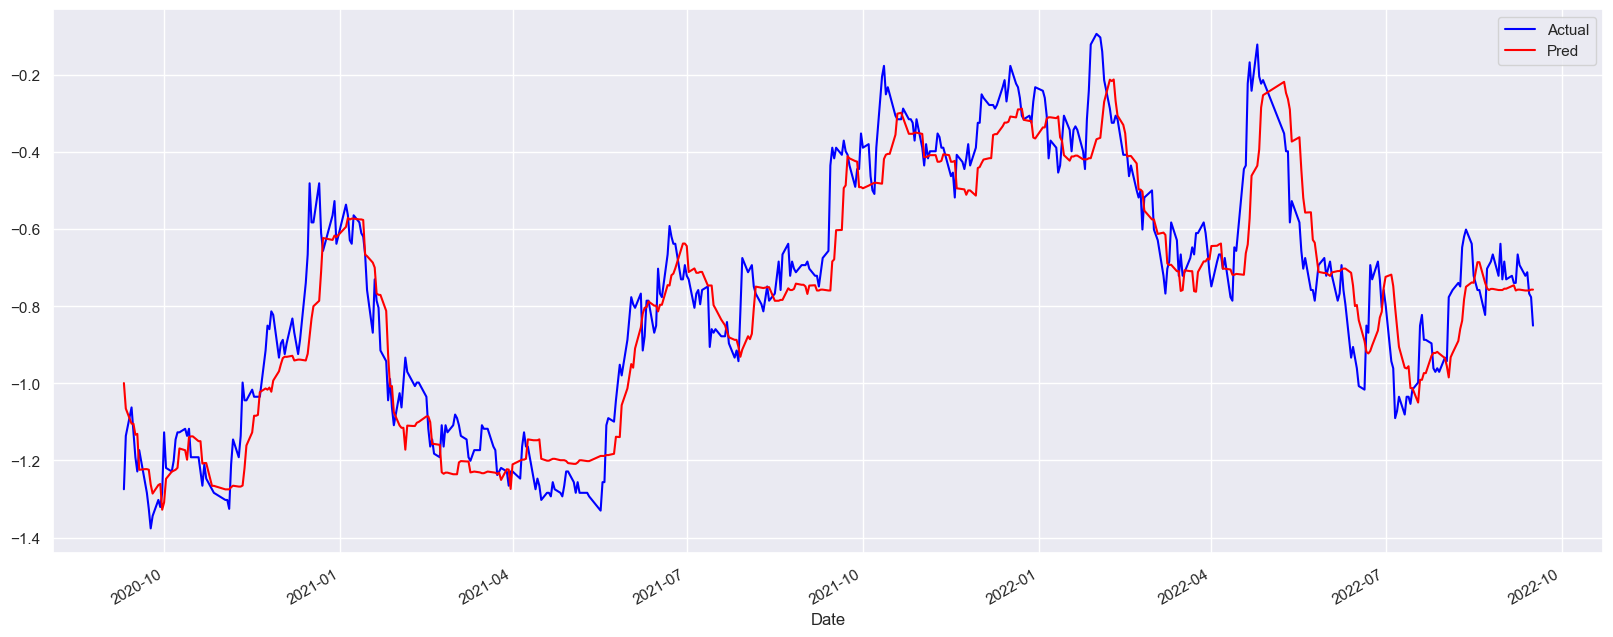

In [14]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [15]:
from joblib import load

In [16]:
close_scaler = load('../feature_engineering/excl_close_scaler.bin')

In [17]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [18]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2338.469971,2040.0
2020-09-11,2266.757324,2190.0


**Plot error distribution**

In [19]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

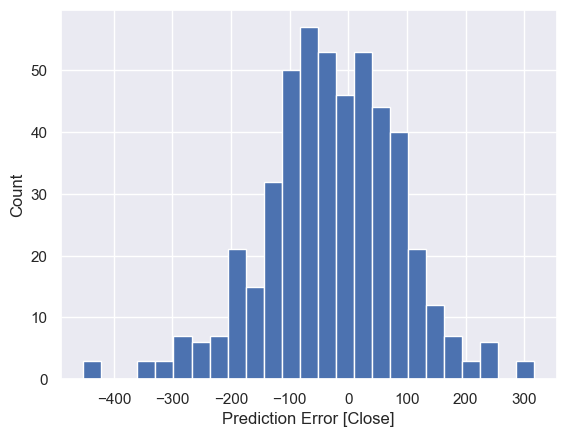

In [20]:
plotErrorHist(inversed)

**RMSE**

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
rmse(inversed['Pred'], inversed['Actual'])

119.00787578766163

**MAPE**

In [23]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
mape(inversed['Actual'], inversed['Pred'])

3.5466277871317384

**R-squared**

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(inversed['Actual'], inversed['Pred'])

0.8825297138657466

### Save Model

In [27]:
# Save model
model.save_model('./models/excl.json')